## 0. Notebook Settings and Libraries Importation

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import collections

In [29]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../resources/fundamental_data/"

## 1.1 Dataset Analysis

In [3]:
data = pd.read_csv(PATH+'backup/complete_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

Attributes AccountsPayable                                                \
Symbol                 AAL    AAP   AAPL    ABC     ABMD    ABT ADBE ADI   
2020-12              1.196    NaN  63.85  33.45  0.02359    NaN  NaN NaN   
2020-09              1.077  3.527  42.30  31.71  0.02173  3.189  NaN NaN   
2020-06              1.175  3.310  35.32  29.15  0.02775  3.335  NaN NaN   
2020-03              1.648  3.304  32.42  30.72  0.03277  3.181  NaN NaN   
2019-12              2.062  3.422  45.11  29.18  0.03157  3.252  NaN NaN   
...                    ...    ...    ...    ...      ...    ...  ...  ..   
1984-10                NaN    NaN    NaN    NaN      NaN    NaN  NaN NaN   
1984-07                NaN    NaN    NaN    NaN      NaN    NaN  NaN NaN   
1984-04                NaN    NaN    NaN    NaN      NaN    NaN  NaN NaN   
1984-01                NaN    NaN    NaN    NaN      NaN    NaN  NaN NaN   
2021-01                NaN    NaN    NaN    NaN      NaN    NaN  NaN NaN   

Attributes                                                                  \
Symbol        ADM     ADP ADSK    AEE    AEP    AES AFL AIG     AIZ    AJG   
2020-12       NaN  0.1139  NaN    NaN    NaN    NaN NaN NaN  16.950  7.785   
2020-09     3.347  0.1112  NaN  0.640  1.660  1.103 NaN NaN   6.243  7.953   
2020-06     2.897  0.1020  NaN  0.616  1.628  1.207 NaN NaN   5.925  7.950   
2020-03     3.440  0.1155  NaN  0.544  1.593  1.069 NaN NaN   5.863  7.779   
2019-12     3.746  0.1329  NaN  0.874  2.086  1.311 NaN NaN   6.345  6.348   
...           ...     ...  ...    ...    ...    ...  ..  ..     ...    ...   
1984-10       NaN     NaN  NaN    NaN    NaN    NaN NaN NaN     NaN    NaN   
1984-07       NaN     NaN  NaN    NaN    NaN    NaN NaN NaN     NaN    NaN   
1984-04       NaN     NaN  NaN    NaN    NaN    NaN NaN NaN     NaN    NaN   
1984-01       NaN     NaN  NaN    NaN    NaN    NaN NaN NaN     NaN    NaN   
2021-01       NaN     NaN  NaN    NaN    NaN    NaN NaN NaN     NaN    NaN   

Attributes                                                                 \
Symbol        ALK ALL    ALLE AMAT    AMD      AME   AMGN     ANSS    AON   
2020-12       NaN NaN     NaN  NaN  0.468  0.94363  1.421      NaN    NaN   
2020-09     0.093 NaN  0.1911  NaN  0.752  0.32484  1.161  0.01058  1.608   
2020-06     0.102 NaN  0.1955  NaN  0.802  0.33746  1.150  0.01050  1.488   
2020-03     0.119 NaN  0.1987  NaN  0.653  0.37390  1.338  0.01257  1.549   
2019-12     0.146 NaN  0.2210  NaN  0.988  0.37722  1.371  0.01430  1.939   
...           ...  ..     ...  ...    ...      ...    ...      ...    ...   
1984-10       NaN NaN     NaN  NaN    NaN      NaN    NaN      NaN    NaN   
1984-07       NaN NaN     NaN  NaN    NaN      NaN    NaN      NaN    NaN   
1984-04       NaN NaN     NaN  NaN    NaN      NaN    NaN      NaN    NaN   
1984-01       NaN NaN     NaN  NaN    NaN      NaN    NaN      NaN    NaN   
2021-01       NaN NaN     NaN  NaN    NaN      NaN    NaN      NaN    NaN   

Attributes                                                               \
Symbol         AOS    APA     APD     APH      ATO      AVB AVGO    AWK   
2020-12     0.5952    NaN  1.9620  1.1210      NaN      NaN  NaN    NaN   
2020-09     0.5169  0.395  0.5462  1.0760  0.14108  0.08804  NaN  0.162   
2020-06     0.4357  0.459  1.6680  0.9280  0.20012  0.08059  NaN  0.169   
2020-03     0.4420  0.528  1.6490  0.8172  0.19009  0.09260  NaN  0.152   
2019-12     0.5096  0.695  1.6300  0.8668  0.30811  0.09214  NaN  0.203   
...            ...    ...     ...     ...      ...      ...  ...    ...   
1984-10        NaN    NaN     NaN     NaN      NaN      NaN  NaN    NaN   
1984-07        NaN    NaN     NaN     NaN      NaN      NaN  NaN    NaN   
1984-04        NaN    NaN     NaN     NaN      NaN      NaN  NaN    NaN   
1984-01        NaN    NaN     NaN     NaN      NaN      NaN  NaN    NaN   
2021-01        NaN    NaN     NaN     NaN      NaN      NaN  NaN    NaN   

Attributes        

In [4]:
included_dates = pd.date_range(start='1985-03-01', end='2021-01-01', freq='Q').strftime('%Y-%m')
data.drop(list( set(data.index) - set(included_dates) ), axis=0, inplace=True)
data

Attributes AccountsPayable                                                 \
Symbol                 AAL      AAP      AAPL      ABC      ABMD      ABT   
2020-12             1.1960      NaN  63.85000  33.4500  0.023590      NaN   
2020-09             1.0770  3.52700  42.30000  31.7100  0.021730  3.18900   
2020-06             1.1750  3.31000  35.32000  29.1500  0.027750  3.33500   
2020-03             1.6480  3.30400  32.42000  30.7200  0.032770  3.18100   
2019-12             2.0620  3.42200  45.11000  29.1800  0.031570  3.25200   
2019-09             1.9320  3.40300  46.24000  28.3900  0.031740  3.02900   
2019-06             2.1180  3.31800  29.12000  27.8100  0.029690  3.22200   
2019-03             2.1390      NaN  30.44000  28.1900  0.032180  3.04500   
2018-12             1.7730  3.17300  44.29000  28.3400  0.026180  2.97500   
2018-09             1.8860  3.02400  55.89000  26.8400  0.021880  2.73000   
2018-06             2.0530  2.91000  38.49000  26.4500  0.025670  2.50300   
2018-03             1.9530      NaN  34.31000  26.4000  0.023560  2.47600   
2017-12             1.6880  2.89500  62.98000  25.3500  0.021990  2.40200   
2017-09             1.6380  2.92200  44.24000  25.4000  0.016670  1.85800   
2017-06             1.9240  2.93700  31.92000  24.8000  0.012780  1.66700   
2017-03             1.8820      NaN  28.57000  24.2800  0.020620  1.48100   
2016-12             1.5920  3.08600  38.51000  24.1700  0.014560  1.17800   
2016-09             1.6730  3.19700  37.29000  23.9300  0.014070  1.05100   
2016-06             1.9440  3.22000  26.32000  22.6900  0.008372  1.15300   
2016-03             1.9130      NaN  25.10000  22.9900  0.009381  1.05300   
2015-12             1.5630  3.20400  33.31000  22.5400  0.008836  1.08100   
2015-09             1.5250  3.18000  35.49000  20.8900  0.008788  1.00700   
2015-06             1.6830  3.17400  26.47000  19.3500  0.008617  1.00000   
2015-03             1.5870      NaN  23.16000  18.4000  0.010390  1.01200   
2014-12             1.3770  3.09500  38.00000  19.0300  0.008249  1.06400   
2014-09             1.4980  3.09100  30.20000  15.5900  0.007616  0.96500   
2014-06             1.6530  3.05400  20.54000  14.8100  0.006759  1.06200   
2014-03             1.6460      NaN  18.91000  14.9100  0.007746  1.07400   
2013-12             1.3680  2.18100  29.59000  13.8600  0.006066  1.02600   
2013-09             1.3070  2.05800  22.37000  13.3400  0.006182  1.00900   
2013-06             1.5070  2.04800  15.52000  11.0100  0.006270  1.04200   
2013-03             1.4400      NaN  14.91000  10.3600  0.007696  1.08800   
2012-12             0.9750  2.03000  26.40000   9.8800  0.006306  1.79700   
2012-09             1.2830  1.82500  21.18000   9.4930  0.005211  1.60500   
2012-06             1.3620  1.73800  16.81000   9.1710  0.006294  1.51900   
2012-03             1.3360  1.73700  17.01000   9.2500  0.006910  1.72700   
2011-12             1.0070  1.65300  18.22000   9.5890  0.005206  1.72100   
2011-09             1.1500  1.58600  14.63000   9.1910  0.004457  1.60200   
2011-06             1.2910  1.57000  15.27000   8.8930  0.004964  1.44900   
2011-03             1.2670  1.57400  13.71000   8.9090  0.006283  1.57700   
2010-12             1.1560  1.32400  14.30000   8.4670  0.003556  1.53600   
2010-09             1.2200  1.30600  12.02000   8.8330  0.003706  1.53200   
2010-06             1.3050  1.31000   8.46900   8.4520  0.004274  1.61600   
2010-03             1.1400  1.20300   5.66600   8.4350  0.003764  1.66400   
2009-12             1.0640  0.99837   6.51100   8.2260  0.004826  1.28100   
2009-09             1.0810  1.01200   5.60100   8.5170  0.005239  1.39500   
2009-06             1.1430  0.95467   4.85400   7.7010  0.004916  1.18500   
2009-03             1.0050  1.00500   3.97600   7.6510  0.005550  1.18500   
2008-12             0.9520  0.92772   4.71500   7.6560  0.003947  1.35100   
2008-09             1.1640  0.85384   5.52000   7.3270  0.005539  1.22400

In [5]:
# Number of rows and columns
data.shape

(144, 54492)

In [6]:
# Attributes data types
display(data.xs('AAPL', level=1, axis=1).dtypes)
display(data.xs('AAPL', level=1, axis=1).dtypes.shape)

Attributes
AccountsPayable                                     float64
AccountsReceivable                                  float64
AccruedComprehensiveInc                             float64
AccruedExpenses                                     float64
AccumulatedD&A                                      float64
AverageBasicSharesOutstanding                       float64
AverageDilutedSharesOutstanding                     float64
BeginningCash                                       float64
Cash                                                float64
CashandEquivalents                                  float64
CashandShortTermInvestments                         float64
CashfromFinancing                                   float64
CashfromInvesting                                   float64
CashfromOperations                                  float64
CashfromOperations(TTM)                             float64
CashfromOtherFinancingActivities                    float64
ChangeinCash                 

(156,)

In [7]:
stocks = ['OXY', 'BRK.B', 'WY', 'NKE', 'SIVB', 'J', 'IDXX', 'ADSK', 'MAS', 'EMR', 'FISV', 'ESS', 'HD', 'LH', 'TSN', 'AME', 'SCHW', 'SLB', 'LOW', 'CME', 'CAG', 'BIO', 'EA', 'AZO', 'AIG', 'IRM', 'KLAC', 'WAT', 'PLD', 'PEAK', 'GE', 'BK', 'GL', 'DRE', 'NTRS', 'SHW', 'CMA', 'RTX', 'DISCA', 'PEG', 'EIX', 'NOV', 'NLOK', 'DAL', 'VZ', 'GIS', 'PH', 'APD', 'MRK', 'ZTS', 'TDY', 'AIZ', 'MS', 'BR', 'COF', 'ZION', 'AWK', 'ROP', 'UDR', 'APH', 'V', 'HUM', 'TER', 'MSCI', 'MMC', 'WMT', 'MO', 'LUV', 'QCOM', 'ORLY', 'TXT', 'ABMD', 'MTB', 'ALK', 'HFC', 'ECL', 'KEY', 'FAST', 'ALL', 'L', 'USB', 'AEP', 'WST', 'AEE', 'DHI', 'SBUX', 'HSIC', 'TFC', 'SJM', 'KO', 'AVB', 'CF', 'AON', 'VAR', 'MCO', 'PFG', 'CAT', 'SEE', 'CHRW', 'ADM', 'LEG', 'PCAR', 'DHR', 'EXPD', 'IT', 'CDW', 'KSU', 'XEL', 'VNO', 'LUMN', 'PNC', 'XLNX', 'PKI', 'DPZ', 'MSFT', 'DE', 'CE', 'D', 'BSX', 'DGX', 'ES', 'CPB', 'CCL', 'COST', 'NUE', 'EXR', 'CMCSA', 'ORCL', 'LDOS', 'CNP', 'SO', 'NWL', 'O', 'DVA', 'SPGI', 'ABT', 'HIG', 'IBM', 'MSI', 'AFL', 'AES', 'GLW', 'TFX', 'HLT', 'ROL', 'GS', 'MET', 'MTD', 'WHR', 'KR', 'BF.B', 'WM', 'CMI', 'MCK', 'MMM', 'ADI', 'GWW', 'HCA', 'LEN', 'IPG', 'BXP', 'NVR', 'CNC', 'MRO', 'DOV', 'MAR', 'PNW', 'NEM', 'CTAS', 'WMB', 'CERN', 'PAYX', 'AOS', 'ABC', 'CBOE', 'HES', 'ANSS', 'T', 'DIS', 'EFX', 'PBCT', 'FMC', 'GD', 'PG', 'ZBH', 'APA', 'NSC', 'UNP', 'CFG', 'AXP', 'EVRG', 'BWA', 'ED', 'VFC', 'LRCX', 'WEC', 'SWK', 'RL', 'PPG', 'FCX', 'MAA', 'MCD', 'IP', 'K', 'PEP', 'REG', 'TSCO', 'PVH', 'DFS', 'ETR', 'F', 'JBHT', 'GPS', 'DVN', 'HPQ', 'WFC', 'UHS', 'BDX', 'ETN', 'IFF', 'AAP', 'TXN', 'ALLE', 'PNR', 'CMS', 'WRB', 'CSCO', 'MXIM', 'ROK', 'VRSK', 'PPL', 'EQR', 'GPC', 'SYK', 'INTC', 'SYY', 'STX', 'PKG', 'DISCK', 'RJF', 'NLSN', 'SNA', 'FDX', 'AVGO', 'MU', 'NDAQ', 'TT', 'EMN', 'CHD', 'LB', 'BA', 'MKC', 'VMC', 'COO', 'VLO', 'MA', 'VTRS', 'RF', 'RHI', 'JKHY', 'LLY', 'AMGN', 'BAX', 'ITW', 'LNT', 'OKE', 'UNH', 'CSX', 'INFO', 'HAL', 'CL', 'AAL', 'IQV', 'KMB', 'PGR', 'HON', 'FRT', 'ROST', 'LNC', 'LIN', 'KIM', 'AMAT', 'ADBE', 'CINF', 'CPRT', 'HAS', 'ZBRA', 'PHM', 'CAH', 'PSA', 'UPS', 'NEE', 'HRL', 'DG', 'TROW', 'BBY', 'ODFL', 'DUK', 'HBAN', 'AMD', 'GM', 'TRV', 'DISH', 'STT', 'NI', 'IVZ', 'TGT', 'EL', 'FLIR', 'UAL', 'FRC', 'CBRE', 'CVX', 'HOLX', 'CB', 'BEN', 'AJG', 'WU', 'AMP', 'PRU', 'HSY', 'EW', 'FITB', 'AAPL', 'FIS', 'PFE', 'STZ', 'DRI', 'WDC', 'BIIB', 'ADP', 'BLL', 'CLX', 'TRMB', 'WELL', 'JNJ', 'JCI', 'ATO', 'MHK', 'CI', 'STE', 'TYL', 'IR', 'INTU', 'MDT']
# Number of features per stock
shapes = dict()
for stock in stocks:
    num = str(data.xs(stock, level=1, axis=1).dtypes.shape[0])
    if num in shapes.keys():
        shapes[num].append(stock)
    else:
        shapes[num] = [stock]
shapes = collections.OrderedDict(sorted(shapes.items())) 
display(shapes)

OrderedDict([('128', ['GL', 'CINF']),
             ('129', ['USB', 'PNC', 'AFL']),
             ('130', ['GS']),
             ('131', ['HUM', 'MTB', 'CFG']),
             ('132', ['BRK.B', 'AMP']),
             ('134', ['DFS', 'RF', 'PRU']),
             ('135', ['CMA', 'STT']),
             ('137', ['L', 'ALLE']),
             ('138', ['HIG']),
             ('139', ['BK', 'COF', 'AXP', 'IQV', 'CI']),
             ('140', ['NTRS', 'AIZ', 'MS', 'RJF', 'HBAN', 'FRC']),
             ('141', ['PGR', 'CB']),
             ('142', ['AZO', 'KEY', 'ALL', 'PFG', 'WFC', 'IR']),
             ('143', ['NLSN', 'ODFL']),
             ('144', ['SCHW', 'TFC', 'TROW']),
             ('145', ['MTD', 'UNH']),
             ('146', ['SIVB', 'ZION', 'ETN', 'WRB', 'GPC']),
             ('147', ['TSN', 'TDY', 'TSCO', 'RHI', 'ATO']),
             ('148',
              ['DRE',
               'APH',
               'WMT',
               'CHRW',
               'MET',
               'ANSS',
               'EFX',
   

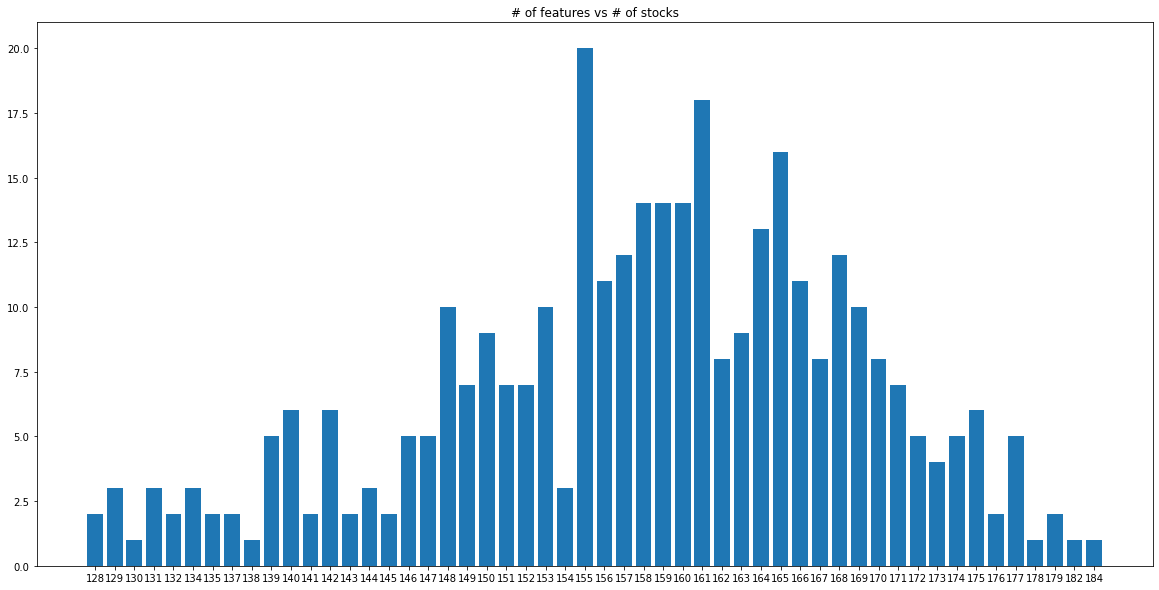

In [8]:
cant = list()
for item in shapes.items():
    cant.append(len(item[1]))
fig,ax1 = plt.subplots(figsize=(20,10))
plt.title('# of features vs # of stocks')
plt.bar(list(shapes.keys()), cant)
plt.show()

In [30]:
# Null values per Stock in the whole dataset
stocks = ['OXY', 'BRK.B', 'WY', 'NKE', 'SIVB', 'J', 'IDXX', 'ADSK', 'MAS', 'EMR', 'FISV', 'ESS', 'HD', 'LH', 'TSN', 'AME', 'SCHW', 'SLB', 'LOW', 'CME', 'CAG', 'BIO', 'EA', 'AZO', 'AIG', 'IRM', 'KLAC', 'WAT', 'PLD', 'PEAK', 'GE', 'BK', 'GL', 'DRE', 'NTRS', 'SHW', 'CMA', 'RTX', 'DISCA', 'PEG', 'EIX', 'NOV', 'NLOK', 'DAL', 'VZ', 'GIS', 'PH', 'APD', 'MRK', 'ZTS', 'TDY', 'AIZ', 'MS', 'BR', 'COF', 'ZION', 'AWK', 'ROP', 'UDR', 'APH', 'V', 'HUM', 'TER', 'MSCI', 'MMC', 'WMT', 'MO', 'LUV', 'QCOM', 'ORLY', 'TXT', 'ABMD', 'MTB', 'ALK', 'HFC', 'ECL', 'KEY', 'FAST', 'ALL', 'L', 'USB', 'AEP', 'WST', 'AEE', 'DHI', 'SBUX', 'HSIC', 'TFC', 'SJM', 'KO', 'AVB', 'CF', 'AON', 'VAR', 'MCO', 'PFG', 'CAT', 'SEE', 'CHRW', 'ADM', 'LEG', 'PCAR', 'DHR', 'EXPD', 'IT', 'CDW', 'KSU', 'XEL', 'VNO', 'LUMN', 'PNC', 'XLNX', 'PKI', 'DPZ', 'MSFT', 'DE', 'CE', 'D', 'BSX', 'DGX', 'ES', 'CPB', 'CCL', 'COST', 'NUE', 'EXR', 'CMCSA', 'ORCL', 'LDOS', 'CNP', 'SO', 'NWL', 'O', 'DVA', 'SPGI', 'ABT', 'HIG', 'IBM', 'MSI', 'AFL', 'AES', 'GLW', 'TFX', 'HLT', 'ROL', 'GS', 'MET', 'MTD', 'WHR', 'KR', 'BF.B', 'WM', 'CMI', 'MCK', 'MMM', 'ADI', 'GWW', 'HCA', 'LEN', 'IPG', 'BXP', 'NVR', 'CNC', 'MRO', 'DOV', 'MAR', 'PNW', 'NEM', 'CTAS', 'WMB', 'CERN', 'PAYX', 'AOS', 'ABC', 'CBOE', 'HES', 'ANSS', 'T', 'DIS', 'EFX', 'PBCT', 'FMC', 'GD', 'PG', 'ZBH', 'APA', 'NSC', 'UNP', 'CFG', 'AXP', 'EVRG', 'BWA', 'ED', 'VFC', 'LRCX', 'WEC', 'SWK', 'RL', 'PPG', 'FCX', 'MAA', 'MCD', 'IP', 'K', 'PEP', 'REG', 'TSCO', 'PVH', 'DFS', 'ETR', 'F', 'JBHT', 'GPS', 'DVN', 'HPQ', 'WFC', 'UHS', 'BDX', 'ETN', 'IFF', 'AAP', 'TXN', 'ALLE', 'PNR', 'CMS', 'WRB', 'CSCO', 'MXIM', 'ROK', 'VRSK', 'PPL', 'EQR', 'GPC', 'SYK', 'INTC', 'SYY', 'STX', 'PKG', 'DISCK', 'RJF', 'NLSN', 'SNA', 'FDX', 'AVGO', 'MU', 'NDAQ', 'TT', 'EMN', 'CHD', 'LB', 'BA', 'MKC', 'VMC', 'COO', 'VLO', 'MA', 'VTRS', 'RF', 'RHI', 'JKHY', 'LLY', 'AMGN', 'BAX', 'ITW', 'LNT', 'OKE', 'UNH', 'CSX', 'INFO', 'HAL', 'CL', 'AAL', 'IQV', 'KMB', 'PGR', 'HON', 'FRT', 'ROST', 'LNC', 'LIN', 'KIM', 'AMAT', 'ADBE', 'CINF', 'CPRT', 'HAS', 'ZBRA', 'PHM', 'CAH', 'PSA', 'UPS', 'NEE', 'HRL', 'DG', 'TROW', 'BBY', 'ODFL', 'DUK', 'HBAN', 'AMD', 'GM', 'TRV', 'DISH', 'STT', 'NI', 'IVZ', 'TGT', 'EL', 'FLIR', 'UAL', 'FRC', 'CBRE', 'CVX', 'HOLX', 'CB', 'BEN', 'AJG', 'WU', 'AMP', 'PRU', 'HSY', 'EW', 'FITB', 'AAPL', 'FIS', 'PFE', 'STZ', 'DRI', 'WDC', 'BIIB', 'ADP', 'BLL', 'CLX', 'TRMB', 'WELL', 'JNJ', 'JCI', 'ATO', 'MHK', 'CI', 'STE', 'TYL', 'IR', 'INTU', 'MDT']
glob_miss = pd.DataFrame(columns=['Stock', 'NaNs', 'Group'])
for stock in stocks:
    for item in shapes.items():
        if stock in item[1]:
            df2 = pd.DataFrame([[stock, data.xs(stock, level=1, axis=1).isnull().sum().sum(), item[0]]], columns=['Stock', 'NaNs', 'Group'])
            glob_miss = glob_miss.append(df2, ignore_index=True)
            break
glob_miss.sort_values(by='NaNs', ascending=False)

Stock   NaNs Group
281   AMAT  24912   174
244     MU  24480   171
45     GIS  24480   171
150   BF.B  24192   169
343   INTU  24097   172
20     CAG  24048   168
207    PVH  24048   168
121    CPB  24048   168
214    HPQ  23760   166
326    STZ  23644   165
155    ADI  23616   165
344    MDT  23472   164
249     LB  23472   164
168   CTAS  23328   163
88     SJM  23079   161
226   CSCO  23060   161
292    HRL  23040   161
282   ADBE  22902   160
123   COST  22902   160
212    GPS  22896   160
127   ORCL  22756   159
253    COO  22752   159
3      NKE  22752   159
122    CCL  22618   158
158    LEN  22608   158
115     DE  22464   157
243   AVGO  22418   156
306    TGT  22320   156
327    DRI  22217   155
7     ADSK  22177   155
293     DG  22133   156
18     LOW  22032   154
284   CPRT  21924   153
251    MKC  21888   153
268   INFO  21717   151
295    BBY  21637   155
12      HD  21600   151
277   ROST  21458   150
171   PAYX  21456   150
242    FDX  21456   150
65     WMT  21168   148
128   LDOS  20511   161
23     AZO  20329   142
149     KR  19741   165
270     CL  18507   153
342     IR  18185   142
143    HLT  17689   150
63    MSCI  17535   157
60       V  17416   170
174   CBOE  17286   160
300     GM  16801   155
49     ZTS  16789   149
91      CF  16696   171
222   ALLE  16302   137
229   VRSK  16300   157
208    DFS  16213   134
125    EXR  16010   160
255     MA  15903   166
116     CE  15887   174
272    IQV  15850   139
53      BR  15775   159
317     WU  15597   155
188    CFG  15554   131
56     AWK  15365   151
28     PLD  15270   174
240   NLSN  15012   143
238  DISCK  14855   155
38   DISCA  14790   155
311   CBRE  14752   166
245   NDAQ  14611   172
74     HFC  14593   160
220    AAP  14587   151
324    FIS  14499   166
113    DPZ  14286   153
19     CME  14254   159
184    ZBH  14106   162
236    STX  14102   158
197     RL  14004   177
93     VAR  13997   169
25     IRM  13944   175
57     ROP  13919   153
305    IVZ  13835   164
321     EW  13812   162
237    PKG  13787   166
94     MCO  13630   166
51     AIZ  13544   140
145     GS  13509   130
162    CNC  13423   153
97     SEE  13346   175
146    MET  13225   148
191    BWA  13212   184
265    OKE  12809   156
83     AEE  12770   161
11     ESS  12748   162
302   DISH  12731   170
105    CDW  12711   156
119    DGX  12671   161
205    REG  12644   164
132      O  12643   157
231    EQR  12590   168
307     EL  12577   172
286   ZBRA  12529   176
290    UPS  12523   161
160    BXP  12502   157
95     PFG  12438   142
52      MS  12434   140
309    UAL  12402   166
318    AMP  12378   132
200    MAA  12203   158
319    PRU  12177   134
230    PPL  11996   175
90     AVB  11991   158
165    MAR  11976   152
41     NOV  11969   161
50     TDY  11949   147
29    PEAK  11938   170
287    PHM  11737   167
40     EIX  11737   174
118    BSX  11643   164
39     PEG  11637   170
133    DVA  11578   160
304     NI  11546   175
98    CHRW  11508   148
84     DHI  11504   161
169    WMB  11472   169
92     AON  11421   175
279    LIN  11374   169
27     WAT  11368   161
210      F  11341   173
313   HOLX  11320   171
104     IT  11293   155
129    CNP  11282   169
173    ABC  11266   160
117      D  11129   165
199    FCX  11075   173
176   ANSS  11070   148
213    DVN  11033   173
254    VLO  11019   174
86    HSIC  10993   155
107    XEL  10920   168
106    KSU  10829   169
280    KIM  10816   150
167    NEM  10808   182
6     IDXX  10807   167
163    MRO  10789   168
69    ORLY  10746   152
190   EVRG  10726   164
130     SO  10711   172
85    SBUX  10706   169
340    STE  10644   165
161    NVR  10640   150
2       WY  10628   179
338    MHK  10620   161
262    BAX  10613   176
140    AES  10578   162
180   PBCT  10541   149
81     AEP  10502   168
13      LH  10491   170
157    HCA  10491   157
152    CMI  10490   179
264    LNT  10485   161
136    HIG  10467   138
315    BEN  10456   171
334   WELL  10442   160
134   SPGI  10423   173
289    PSA  10407   1

In [45]:
# Null values per Stock in the whole dataset
stk_miss = pd.Series(dtype='int64')
for stock in shapes['149']:
    stk_miss[stock] = data.xs(stock, level=1, axis=1).isnull().sum().sum()
stk_miss.sort_values(ascending=False)

#TRV      9217
#IBM      10139
#VNO      8910
#CAH      7719
#NSC      6707

ZTS     16789
PBCT    10541
TRV      9217
VNO      8910
NUE      7849
CAH      7719
NSC      6707
dtype: int64

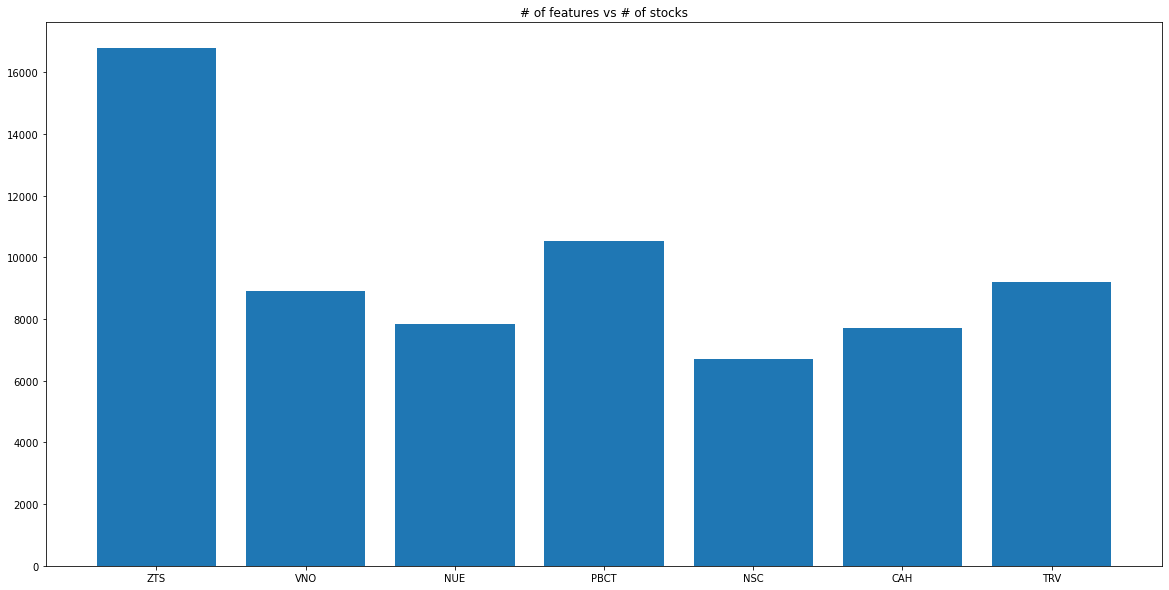

In [46]:
cant = list()
for item in shapes.items():
    cant.append(len(item[1]))
fig,ax1 = plt.subplots(figsize=(20,10))
plt.title('# of features vs # of stocks')
plt.bar(shapes['149'], stk_miss)
plt.show()

In [47]:
feats = dict()
for stock in shapes['149']:
    df = data.xs(stock, level=1, axis=1)
    for feature in df.columns:
        nas = df[feature].isnull().sum()
        if feature not in feats.keys():
            feats[feature] = {'counts':1, 'na_counts':nas}
        else:
            feats[feature]['counts'] += 1
            feats[feature]['na_counts'] += nas
feats

{'AccountsPayable': {'counts': 7, 'na_counts': 449},
 'AccountsReceivable': {'counts': 7, 'na_counts': 477},
 'AccruedComprehensiveInc': {'counts': 7, 'na_counts': 428},
 'AccruedExpenses': {'counts': 6, 'na_counts': 649},
 'AccumulatedD&A': {'counts': 5, 'na_counts': 319},
 'AdditionalPaidInCapital': {'counts': 7, 'na_counts': 534},
 'AmortizationExpense': {'counts': 3, 'na_counts': 316},
 'AssetImpairmentCharge': {'counts': 6, 'na_counts': 714},
 'AverageBasicSharesOutstanding': {'counts': 7, 'na_counts': 138},
 'AverageDilutedSharesOutstanding': {'counts': 7, 'na_counts': 138},
 'BeginningCash': {'counts': 7, 'na_counts': 276},
 'BuildingsandImprovements': {'counts': 3, 'na_counts': 391},
 'CashForeignExchangeAdjustment': {'counts': 4, 'na_counts': 350},
 'CashandEquivalents': {'counts': 7, 'na_counts': 252},
 'CashandShortTermInvestments': {'counts': 7, 'na_counts': 252},
 'CashfromFinancing': {'counts': 7, 'na_counts': 241},
 'CashfromInvesting': {'counts': 7, 'na_counts': 241},
 

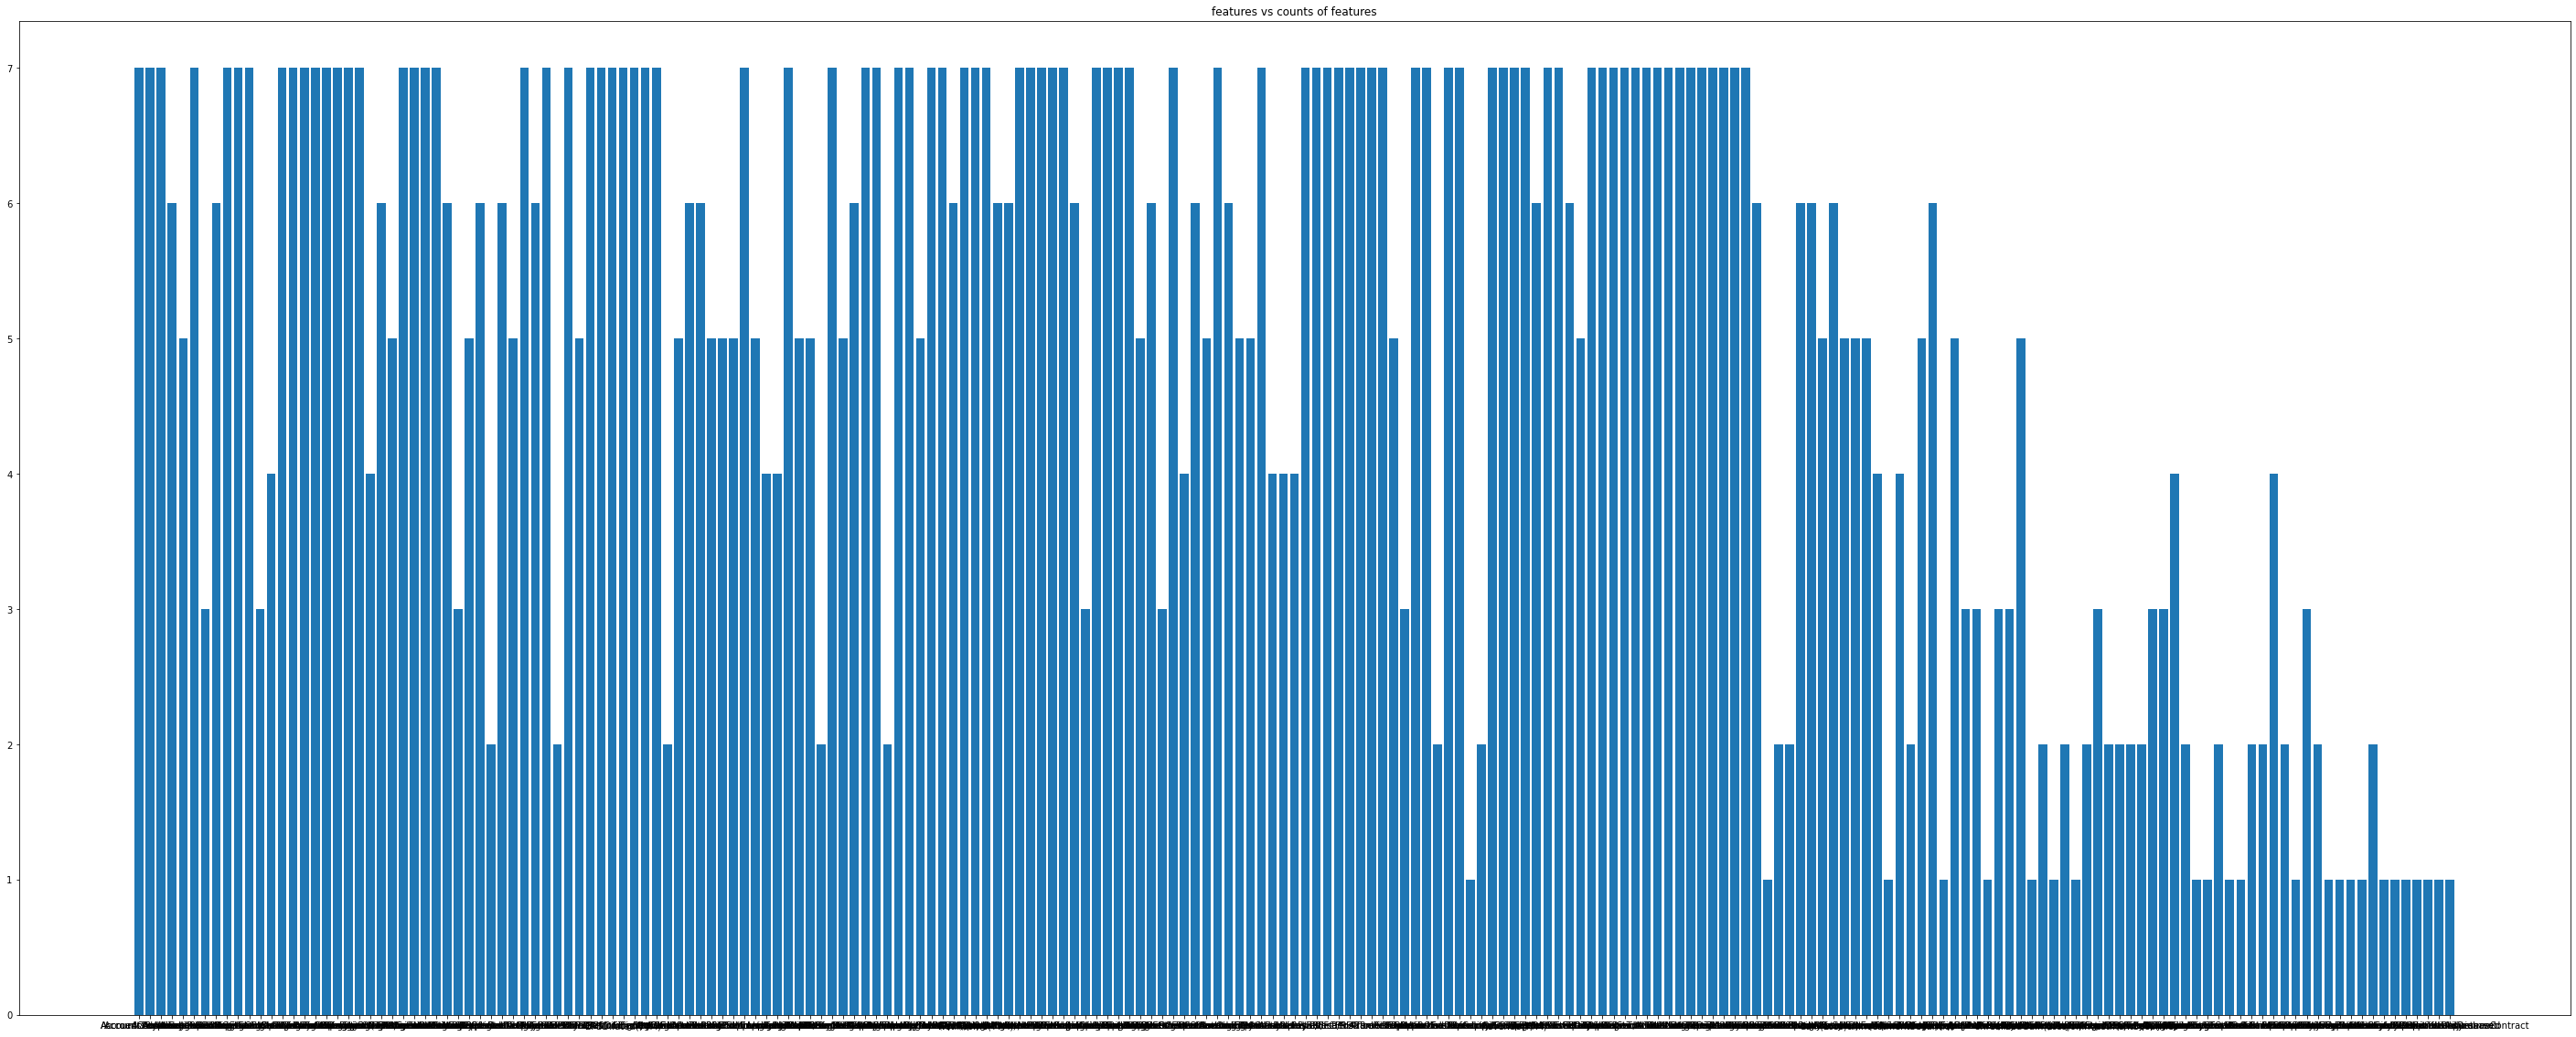

In [48]:
cant = list()
for feat in feats.items():
    cant.append(feat[1]['counts'])
fig,ax1 = plt.subplots(figsize=(50,20))
plt.title('features vs counts of features')
plt.bar(list(feats.keys()), cant)
plt.show()

In [52]:
sel_feats = list()
for feat in feats.items():
    if feat[1]['counts'] == 7:
        sel_feats.append(feat[0])
display(sel_feats)
display(len(sel_feats))

['AccountsPayable',
 'AccountsReceivable',
 'AccruedComprehensiveInc',
 'AdditionalPaidInCapital',
 'AverageBasicSharesOutstanding',
 'AverageDilutedSharesOutstanding',
 'BeginningCash',
 'CashandEquivalents',
 'CashandShortTermInvestments',
 'CashfromFinancing',
 'CashfromInvesting',
 'CashfromOperations',
 'CashfromOperations(TTM)',
 'CashfromOtherFinancingActivities',
 'ChangeinCash',
 'ChangeinOtherWorkingCap',
 'ChangeinPayablesandAccruedExpense',
 'ChangeinReceivables',
 'ChangesinWorkingCapital',
 'DebtRepayment',
 'DividendPerShare',
 'EBIT',
 'EPSBasic',
 'EPSBasicfromContinuingOperations',
 'EPSDiluted',
 'EPSDiluted(TTM)',
 'EPSDilutedfromContinuingOperations',
 'EndingCash',
 'FCF',
 'IncomefromContinuingOperations',
 'IssuanceofDebt',
 'LongTermDeferredTaxLiabilities',
 'NetChangeinCapitalExpenditures',
 'NetChangeinCapitalExpenditures(TTM)',
 'NetChangeinLongTermDebt',
 'NetChangeinPP&E',
 'NetCommonEquityIssued(Purchased)',
 'NetDebtIssuance',
 'NetIncome',
 'NetIncome(T

86

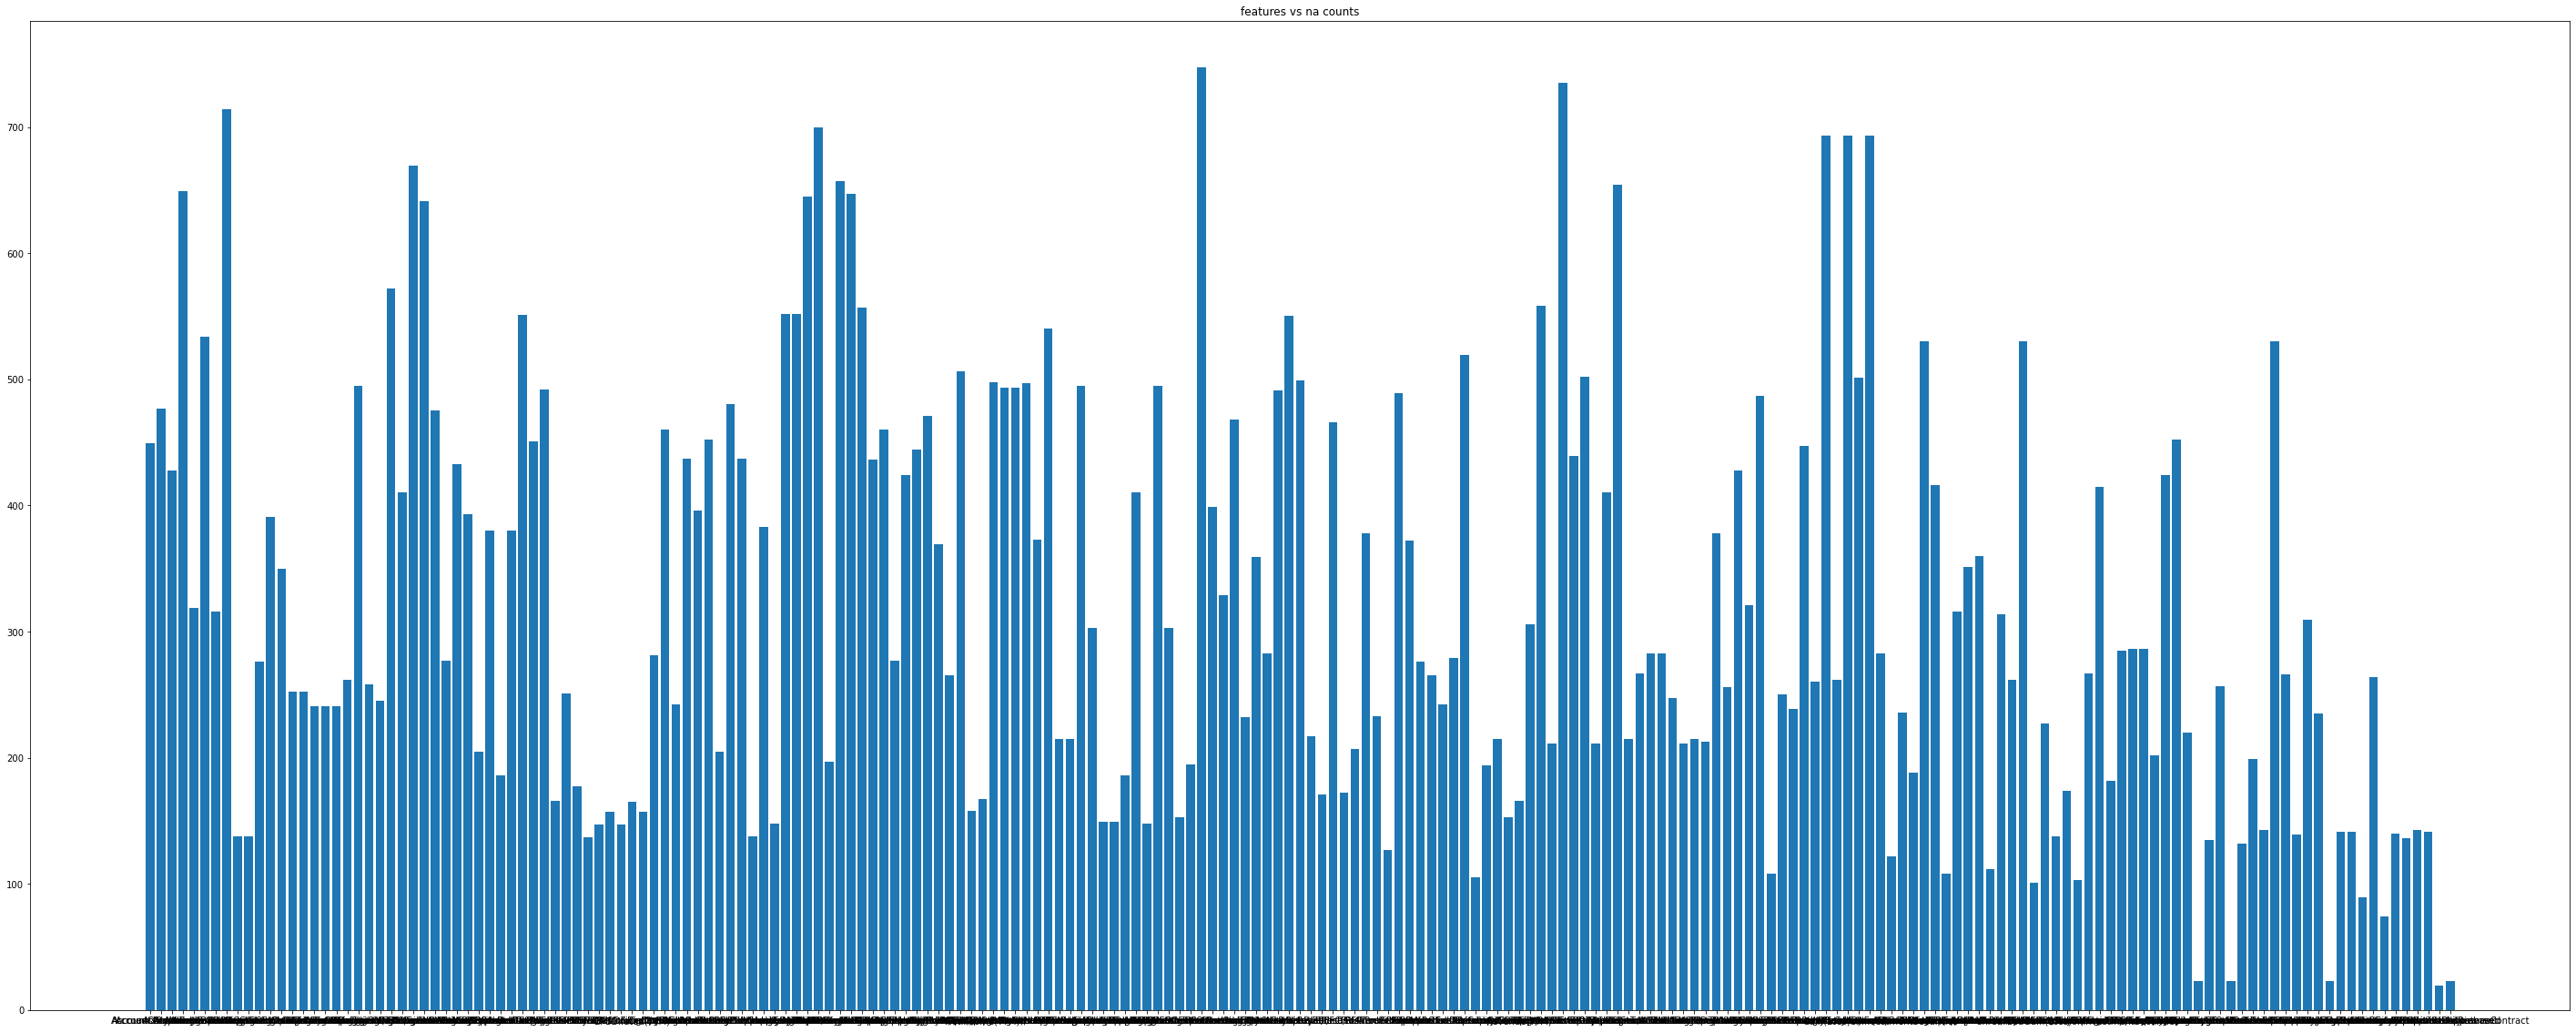

In [49]:
cant = list()
for feat in feats.items():
    cant.append(feat[1]['na_counts'])
fig,ax1 = plt.subplots(figsize=(50,20))
plt.title('features vs na counts')
plt.bar(list(feats.keys()), cant)
plt.show()

In [15]:
# Central stats per attribute
atts = list(data.xs('AAPL', level=1, axis=1).columns)
for att in atts:
    display(att)
    display(data.xs(att, level=0, axis=1).describe())

'AverageBasicSharesOutstanding'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    21.835778   0.284883   0.032251   1.578211   0.524576   0.207267   
std      3.168526   0.087831   0.010602   0.084350   0.068539   0.041707   
min     14.900000   0.188570   0.008573   1.475000   0.428600   0.136820   
25%     19.560000   0.212112   0.021205   1.540500   0.471875   0.165690   
50%     22.075000   0.237600   0.036735   1.551000   0.501700   0.215900   
75%     24.712500   0.364925   0.041085   1.563000   0.591562   0.242600   
max     26.310000   0.447820   0.045320   1.774000   0.637340   0.247100   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.413887   0.638570   0.936598   0.612925   0.120136   0.094756   
std      0.094175   0.111082   0.102905   0.599530   0.040008   0.009997   
min      0.190320   0.338100   0.711700   0.098410   0.070710   0.078140   
25%      0.389970   0.606912   0.879115   0.130300   0.090477   0.089098   
50%      0.474585   0.662500   0.936835   0.135735   0.101000   0.092020   
75%      0.489522   0.692667   1.021500   1.059000   0.164900   0.105990   
max      0.496180   0.850000   1.084000   1.900000   0.191900   0.112490   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.126246   0.545001   0.232230   0.946058   0.338107   0.426100   
std      0.017884   0.162140   0.008508   0.213662   0.111959   0.052246   
min      0.087910   0.002325   0.216030   0.585000   0.056030   0.265000   
25%      0.106967   0.409200   0.225930   0.754500   0.219945   0.401995   
50%      0.123445   0.539900   0.232510   1.004500   0.396400   0.431500   
75%      0.141975   0.701950   0.239553   1.084000   0.423347   0.465000   
max      0.161930   0.834910   0.245440   1.298000   0.443770   0.501000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.077972   0.285730   0.168325   0.341782   0.216113   0.326834   
std      0.012918   0.031468   0.023002   0.045896   0.004552   0.023164   
min      0.057370   0.232600   0.056900   0.191110   0.208400   0.277330   
25%      0.063530   0.261125   0.162130   0.325682   0.212325   0.307750   
50%      0.084040   0.281300   0.175425   0.336580   0.215400   0.332750   
75%      0.089620   0.317210   0.182382   0.379750   0.219375   0.347615   
max      0.092910   0.340800   0.212380   0.399000   0.228100   0.358180   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.049403   0.080062   0.835526   0.095428   0.096772   1.135300   
std      0.033363   0.028733   0.380382   0.030517   0.006336   0.169073   
min      0.011820   0.028330   0.270850   0.026470   0.083300   0.804000   
25%      0.019127   0.051557   0.566222   0.070300   0.091275   1.021000   
50%      0.039010   0.090090   0.746000   0.079895   0.098500   1.176500   
75%      0.071358   0.101707   1.119500   0.131873   0.100075   1.276500   
max      0.124900   0.124100   2.137000   0.140450   0.106400   1.370000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  88.000000   
mean     0.741179   6.941211   0.574496   0.238860   0.671909   0.287579   
std      0.099665   3.242359   0.043930   0.024494   0.089965   0.165198   
min      0.564600   1.896000   0.399370   0.192320   0.490400   0.148190   
25%      0.702125   3.501000   0.543000   0.217253   0.618225   0.211400   
50%      0.749800   7.938000   0.577855   0.246010   0.687790   0.238235   
75%      0.799675  10.200000   0.604750   0

'BeginningCash'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    11.999811   1.214616   0.035835   3.221515   2.882073   0.193390   
std     12.232225   0.977997   0.042041   3.026872   3.630339   0.187799   
min      1.159000   0.000000   0.001627   0.223500   0.000000   0.002000   
25%      3.000250   0.429005   0.005159   0.887145   1.153250   0.054750   
50%      9.116000   0.939735   0.016370   2.827500   1.398500   0.120000   
75%     15.815000   1.900250   0.052825   4.087500   2.128000   0.250250   
max     52.150000   3.692000   0.214830  18.620000  15.460000   0.687000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.453673   1.557733   2.151034   2.072667   0.587012   0.324028   
std      0.349344   0.646987   1.401571   2.209691   0.812809   0.418372   
min      0.117000   0.317000   0.146000   0.132000   0.000000  -0.013050   
25%      0.218750   1.167000   1.037000   1.148750   0.168375   0.047800   
50%      0.335500   1.527000   1.769500   1.792500   0.242250   0.203810   
75%      0.501225   1.939750   3.184500   2.377750   0.346850   0.468383   
max      1.794000   3.601000   5.528000  18.570000   3.003000   2.490000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.180540   0.495478   0.212576   3.045697   0.451433   6.270625   
std      0.252751   0.221121   0.247599   2.669385   0.570512   8.903737   
min      0.022000   0.144000   0.001300   0.000000   0.006799   0.002600   
25%      0.077025   0.329000   0.019020   1.165000   0.114932   0.670565   
50%      0.128050   0.448000   0.148310   2.629500   0.294595   1.772500   
75%      0.195975   0.639250   0.327670   3.798750   0.465558   9.844500   
max      1.818000   1.170000   1.253000  11.960000   4.040000  37.840000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.377993   0.544533   0.153281   0.569602   0.609527   0.486009   
std      0.328339   0.219252   0.147570   0.661406   0.953284   0.527482   
min      0.000000   0.217000   0.005132   0.000000   0.029900   0.000000   
25%      0.067938   0.396500   0.026253   0.083615   0.085350   0.025265   
50%      0.240485   0.480500   0.072750   0.237000   0.210850   0.225750   
75%      0.726322   0.675500   0.286575   1.007000   0.421575   0.888728   
max      0.919570   1.171000   0.463400   2.950000   3.921000   2.372000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  89.000000  90.000000  90.000000   
mean     0.080842   0.086177   2.090789   0.209509   0.123977  17.016833   
std      0.105973   0.091088   1.912653   0.330460   0.111335   9.639935   
min      0.000733   0.003113   0.011590   0.000346   0.000000   3.501000   
25%      0.003652   0.025170   0.261272   0.012930   0.031075   7.715500   
50%      0.059310   0.050435   2.242500   0.112910   0.095200  18.940000   
75%      0.106832   0.124408   3.843500   0.306430   0.202725  24.230000   
max      0.488370   0.482080   6.340000   2.734000   0.742000  42.100000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   90.000000   90.000000  90.000000  90.000000  90.000000  87.000000   
mean     6.074611   91.284444   1.972800   1.288444   4.186837   0.841732   
std      3.340506   66.715249   1.200416   2.192236   2.691483   0.843874   
min      0.633000   21.310000   0.278000   0.000000   0.545480   0.025400   
25%      3.336000   27.702500   0.826250   0.446925   1.414000   0.300460   
50%      6.106500   90.200000   2.072500   0.799285   3.645000   0.602560   
75%      8.596000  152.217500   2.68

'Cash'

Symbol       AAPL        ALK       ANSS        AON      ATVI       AVB  \
count   49.000000  17.000000  26.000000  31.000000  9.000000  4.000000   
mean     7.609184   0.010882   0.454739   0.568742  0.315667  0.176855   
std      5.398639   0.015532   0.099214   0.195340  0.084897  0.051716   
min      0.127000   0.000000   0.151540   0.281000  0.176000  0.106980   
25%      3.000000   0.003000   0.421548   0.432500  0.269000  0.153990   
50%      8.529000   0.005000   0.487960   0.498000  0.286000  0.188660   
75%     10.450000   0.009000   0.520455   0.742000  0.377000  0.211525   
max     24.400000   0.062000   0.599140   0.980000  0.437000  0.223120   

Symbol        AXP        BAC    BAX     BEN        BWA          C       CDNS  \
count   33.000000  28.000000  1.000  1.0000  43.000000  33.000000  27.000000   
mean     2.983303  29.929286  1.802  0.3418   0.549372  25.969394   0.208555   
std      0.782551   2.344298    NaN     NaN   0.264946   4.841094   0.047199   
min      2.020000  26.250000  1.802  0.3418   0.090800  20.900000   0.117500   
25%      2.442000  28.267500  1.802  0.3418   0.367150  22.270000   0.184015   
50%      2.761000  29.725000  1.802  0.3418   0.481900  23.780000   0.203660   
75%      3.423000  30.890000  1.802  0.3418   0.777100  29.880000   0.227385   
max      5.148000  36.850000  1.802  0.3418   1.108000  36.450000   0.330250   

Symbol     CERN       CMA        COF        COP    ECL        EL        ES  \
count   1.00000  33.00000  33.000000  32.000000  1.000  5.000000  7.000000   
mean    0.21038   1.15103   3.611939   0.886906  1.369  1.680200  0.044889   
std         NaN   0.16486   0.852735   0.374277    NaN  1.473436  0.032774   
min     0.21038   0.84800   1.947000   0.511000  1.369  0.702000  0.015430   
25%     0.21038   1.02600   2.879000   0.680000  1.369  0.709000  0.021635   
50%     0.21038   1.15700   3.440000   0.820500  1.369  1.322000  0.035140   
75%     0.21038   1.24900   4.452000   0.930250  1.369  1.421000  0.056155   
max     0.21038   1.43800   5.184000   2.242000  1.369  4.247000  0.108070   

Symbol        ETN        ETR       EXPD          F        FRT  IBM        J  \
count   48.000000  48.000000  33.000000  18.000000  12.000000  0.0  1.00000   
mean     0.408562   0.088640   0.490202  14.964444   0.016524  NaN  0.63487   
std      0.196016   0.038642   0.066767   1.384180   0.003750  NaN      NaN   
min      0.142000   0.034240   0.383020  11.800000   0.011140  NaN  0.63487   
25%      0.275500   0.063405   0.444650  14.350000   0.013725  NaN  0.63487   
50%      0.336500   0.081545   0.487240  14.875000   0.017275  NaN  0.63487   
75%      0.552000   0.103032   0.548500  15.942500   0.018630  NaN  0.63487   
max      0.915000   0.283490   0.616090  17.700000   0.024650  NaN  0.63487   

Symbol        JPM      LRCX        MAR      MNST      MSFT        MTB  \
count   33.000000  4.000000  10.000000  2.000000  3.000000  33.000000   
mean    26.513939  0.918118   0.164700  0.456060  2.708333   1.425606   
std      9.534301  0.430959   0.068307  0.087851  0.785872   0.207236   
min     18.210000  0.462310   0.100000  0.393940  1.811000   1.178000   
25%     21.390000  0.680462   0.108000  0.425000  2.425500   1.290000   
50%     23.220000  0.863580   0.131000  0.456060  3.040000   1.350000   
75%     26.320000  1.101235   0.222250  0.487120  3.157000   1.450000   
max     59.600000  1.483000   0.290000  0.518180  3.274000   1.984000   

Symbol       NLOK       NTRS        PNC        RJF     SHW        SLB  \
count   12.000000  33.000000  33.000000  18.000000  1.0000  47.000000   
mean     0.557583   4.736121   4.877909   2.417556  0.1881   1.803423   
std      0.276754   1.072629   0.831422   0.349688     NaN   0.991492   
min      0.270000   2.691000   3.835000   1.477000  0.1881   0.188930   
25%      0.390250   4.075000   4.164000   2.186250  0.1881   1.288000   
50%      0.477500   4.649000   4.879000   2.581000  0.1881   1.705000   
75%      0.607500   5.312000

'CashandEquivalents'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    12.282867   1.282079   0.038053   3.268712   1.553096   0.171379   
std     12.173608   1.028281   0.045401   3.012818   0.599172   0.193077   
min      1.159000   0.036160   0.001627   0.223470   0.545780   0.002000   
25%      3.100500   0.465595   0.005397   0.921910   1.168750   0.029000   
50%      9.257000   1.001365   0.018480   2.863500   1.402500   0.092000   
75%     16.107500   1.978000   0.053282   4.106750   1.766250   0.251000   
max     50.530000   4.598000   0.214830  18.620000   3.191000   0.687000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  85.000000  80.000000  90.000000  90.000000   
mean     0.472324   1.523244   2.276941   2.255100   0.299092   0.331557   
std      0.387898   0.630009   1.413511   2.222983   0.196410   0.418987   
min      0.117000   0.367000   0.374000   0.211000   0.043900   0.007887   
25%      0.210500   1.164500   1.155000   1.492750   0.179650   0.047800   
50%      0.301500   1.421500   1.862000   1.919000   0.246350   0.207225   
75%      0.580250   1.794000   3.449000   2.489250   0.350975   0.475285   
max      1.764000   3.624000   5.563000  18.570000   0.973500   2.490000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  83.000000  89.000000  89.000000  90.000000  90.000000   
mean     0.202159   0.514482   0.228095   3.153094   0.448294   6.490843   
std      0.307057   0.218473   0.273393   2.734710   0.557917   9.064511   
min      0.022000   0.144000   0.003394   0.104100   0.025210   0.002523   
25%      0.077100   0.349000   0.021270   1.183000   0.121923   0.670565   
50%      0.135000   0.462000   0.157980   2.630000   0.299250   1.890000   
75%      0.206025   0.649500   0.353980   3.805000   0.479270  10.262500   
max      1.855000   1.170000   1.305000  11.960000   4.040000  37.470000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  88.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.388013   0.470466   0.156013   0.571323   0.666386   0.501845   
std      0.328782   0.220095   0.149580   0.657092   1.069565   0.533924   
min      0.004800   0.000000   0.005132   0.013170   0.031700   0.002300   
25%      0.071942   0.363000   0.025898   0.096880   0.086500   0.025660   
50%      0.272520   0.463000   0.072750   0.237000   0.223100   0.269155   
75%      0.731805   0.582500   0.291900   1.007000   0.427925   0.890743   
max      0.919570   0.980000   0.463400   2.950000   5.253000   2.372000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   89.000000  90.000000  89.000000  82.000000  90.000000  90.000000   
mean     0.078378   0.090835   2.178185   0.222681   0.127978  16.476689   
std      0.101426   0.091776   1.966116   0.340614   0.112247   9.765758   
min      0.000733   0.003113   0.011590   0.008284   0.003700   3.501000   
25%      0.003666   0.025170   0.290830   0.045087   0.031375   7.479000   
50%      0.060920   0.062810   2.334000   0.108420   0.102000  16.480000   
75%      0.110810   0.124408   3.959000   0.315023   0.207575  24.185000   
max      0.446260   0.482080   7.415000   2.734000   0.742000  41.500000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  90.000000  90.000000  89.000000  90.000000   
mean     6.179652  105.059889   2.016256   1.309615   4.169880   0.831580   
std      3.365085   71.656216   1.214789   2.193086   2.718337   0.856555   
min      0.633000   14.250000   0.278000   0.049200   0.000000   0.025440   
25%      3.354000   35.057500   0.832750   0.469285   2.238000   0.226197   
50%      6.162000  112.730000   2.104500   0.823770   3.750000   0.594175   
75%      8.655000  166.845000   2.72

'CashfromFinancing'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -4.127856  -0.123278   0.000664  -0.420438  -0.201979  -0.002188   
std      8.388929   0.396986   0.016386   2.142853   4.683582   0.223871   
min    -31.520000  -1.363000  -0.061800  -6.455000  -9.514000  -0.682000   
25%     -4.395000  -0.301042   0.000055  -0.855758  -1.690000  -0.128800   
50%      0.012000  -0.130870   0.000426  -0.509830  -0.207760  -0.002000   
75%      0.149500  -0.012195   0.001531  -0.097983   0.542925   0.131750   
max      6.884000   1.909000   0.096070  13.500000  13.120000   0.709000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.052381   0.078278  -0.106300   1.085256   0.017928  -0.021370   
std      0.594928   0.763626   0.381366  10.578777   0.191669   0.299299   
min     -1.687000  -1.109000  -1.409000 -64.070000  -0.400400  -1.068000   
25%     -0.240100  -0.368250  -0.290000  -2.404000  -0.038950  -0.077558   
50%      0.051500  -0.087500  -0.091500   0.754000  -0.014705  -0.025760   
75%      0.312125   0.282250   0.012750   6.566750   0.018300  -0.005197   
max      2.388000   4.764000   1.056000  20.960000   1.494000   1.859000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.022367  -0.613356   0.002985  -0.784688   0.143711  -0.089414   
std      0.248862   1.171727   0.118432   1.957787   0.747293   2.102353   
min     -0.319000  -4.149000  -0.430250 -11.690000  -1.013000  -4.105000   
25%     -0.095675  -1.313500  -0.042465  -1.442750  -0.128625  -0.393000   
50%     -0.007900  -0.649000  -0.012950  -0.312500  -0.018660  -0.001696   
75%      0.062675   0.321500   0.062005   0.005750   0.141292   0.037183   
max      1.481000   1.635000   0.486650   3.807000   4.760000  14.660000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.014110  -0.227967  -0.022307   0.065358  -0.084056  -0.032190   
std      0.081307   0.371365   0.068154   0.779454   0.551116   0.222235   
min     -0.288740  -1.512000  -0.204100  -2.712000  -0.905000  -1.379000   
25%     -0.032895  -0.410750  -0.050200  -0.146053  -0.248625  -0.046918   
50%     -0.004428  -0.202500  -0.021625  -0.042650  -0.116500  -0.021215   
75%      0.001354  -0.016000   0.009954   0.181675   0.023025   0.001758   
max      0.499440   1.692000   0.305300   4.929000   4.543000   1.187000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.164916   0.051554  -0.071583  -0.012092  -0.046204   0.255833   
std      0.244476   0.255956   0.415550   0.346748   0.196821   3.748667   
min     -0.168670  -0.443160  -1.770000  -1.718000  -0.617600  -8.418000   
25%      0.034145  -0.061093  -0.168400  -0.098138  -0.120325  -2.484500   
50%      0.071700   0.055655   0.005500  -0.016130  -0.074200   0.172000   
75%      0.187955   0.130502   0.016383   0.070525   0.004700   2.449250   
max      1.396000   1.736000   1.779000   2.044000   1.235000   9.662000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   90.000000   90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.505478    6.269689  -0.145178   0.054864  -0.212246  -0.293394   
std      3.037445   37.356514   0.848386   1.623835   0.388635   0.709927   
min     -4.332000  -90.730000  -4.709000  -1.208000  -2.552000  -2.792000   
25%     -1.498000  -13.857500  -0.408000  -0.325912  -0.365750  -0.417145   
50%     -0.777500    3.851500  -0.172000  -0.137930  -0.149180  -0.039610   
75%     -0.274500   20.990000   0.06

'CashfromInvesting'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -3.146900  -0.132022  -0.009442  -0.810422  -0.173213  -0.373887   
std      8.595124   0.429646   0.023153   1.678431   4.088269   0.171944   
min    -22.330000  -2.772000  -0.097400  -7.659000 -13.650000  -0.690000   
25%     -6.237750  -0.109098  -0.012613  -0.815760  -0.458850  -0.525000   
50%     -0.943500  -0.056605  -0.000453  -0.390990  -0.165005  -0.337500   
75%      0.076250  -0.026597   0.002371  -0.176018   0.266375  -0.239250   
max     28.710000   0.846110   0.034770   1.765000  15.390000  -0.066450   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.835241  -0.574078  -1.290711  -3.696867  -0.096024  -0.057187   
std      0.584320   0.661745   1.056392  11.788454   0.178791   0.404166   
min     -2.012000  -4.651000  -4.453000 -26.810000  -1.417000  -2.093000   
25%     -1.170000  -0.716250  -1.586500 -10.615500  -0.104925  -0.064470   
50%     -0.813500  -0.501000  -1.033500  -2.073500  -0.035260  -0.034095   
75%     -0.454250  -0.292000  -0.628500   0.574000  -0.015075  -0.019238   
max      0.842000   0.416000   1.532000  55.120000   0.011000   2.832000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.171131  -0.393467  -0.100881  -0.610573  -0.448852  -1.629642   
std      0.243384   1.269090   0.152824   2.512499   0.777007   3.467724   
min     -1.981000  -3.474000  -0.977570 -10.120000  -5.249000 -18.480000   
25%     -0.220725  -1.208000  -0.133270  -1.788000  -0.467142  -1.408500   
50%     -0.150300  -0.282500  -0.047850  -0.486550  -0.249105  -0.333000   
75%     -0.060125   0.257500  -0.010785  -0.061200  -0.062010  -0.031938   
max      0.429800   2.516000   0.115560  14.910000   0.156880   0.450000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.030234  -0.080778  -0.026111  -1.125254  -0.284327  -0.097720   
std      0.083350   0.399270   0.066935   1.275615   0.492055   0.164948   
min     -0.500100  -1.512000  -0.331200  -7.238000  -3.624000  -1.227000   
25%     -0.014165  -0.248500  -0.030350  -1.521000  -0.376400  -0.106730   
50%     -0.006039  -0.093500  -0.015950  -0.892000  -0.261600  -0.041430   
75%     -0.002335   0.047250  -0.009052  -0.444970  -0.195525  -0.020833   
max      0.068490   1.476000   0.299000   4.391000   2.056000   0.087800   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean    -0.224454  -0.187264  -0.112926  -0.139500  -0.072581  -1.994044   
std      0.270357   0.233883   0.541703   0.129265   0.156431   4.657016   
min     -1.468000  -1.981000  -3.579000  -0.649580  -1.336000  -9.895000   
25%     -0.238067  -0.248217  -0.063287  -0.205995  -0.067600  -5.425000   
50%     -0.125855  -0.123345  -0.020325  -0.123640  -0.045500  -2.381000   
75%     -0.059707  -0.046490  -0.000188  -0.045330  -0.033225   0.222000   
max      0.003198  -0.012990   0.385840   0.085130   0.450300  21.930000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   90.000000   90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.766122   -9.555744  -0.308067  -0.432916  -0.052317  -0.231351   
std      1.780945   33.253911   0.439979   1.796031   0.439758   0.498629   
min    -12.310000  -90.410000  -4.079000 -15.200000  -3.512000  -1.808000   
25%     -1.110250  -22.962500  -0.337000  -0.308000  -0.117575  -0.521447   
50%     -0.494000  -11.010000  -0.224000  -0.157275  -0.010720  -0.105135   
75%     -0.127750    1.431250  -0.16

'CashfromOperations'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     7.702733   0.305851   0.011087   1.286334   0.436664   0.376412   
std      8.816920   0.463035   0.024679   0.682830   0.221791   0.192977   
min     -0.125000  -1.004000  -0.012790  -0.093000  -0.065100   0.015000   
25%      0.270500  -0.020622  -0.002814   0.836423   0.278225   0.236750   
50%      3.524000   0.230575  -0.001149   1.189500   0.425315   0.377500   
75%     13.295000   0.610237   0.014068   1.612000   0.541010   0.491250   
max     33.720000   1.380000   0.089440   3.520000   1.135000   0.866000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.787744   0.524822   1.457178   2.630333   0.101658   0.087429   
std      0.434626   0.279685   0.794030   4.412192   0.144401   0.071343   
min     -0.014000  -0.325000   0.138000 -15.240000  -0.217600  -0.137040   
25%      0.537000   0.342500   0.984250   0.490750   0.018475   0.041987   
50%      0.804500   0.517500   1.272000   1.685500   0.072585   0.064925   
75%      1.051500   0.713250   1.662500   5.011000   0.113975   0.133875   
max      1.926000   1.267000   4.206000  15.970000   0.693600   0.373740   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.168940   1.008011   0.112812   1.495109   0.325441   2.055883   
std      0.151111   0.460680   0.088279   0.907984   0.317087   4.433485   
min     -0.205000  -0.001000  -0.026030   0.191300  -0.030280  -2.502000   
25%      0.061700   0.667250   0.041555   0.829975   0.053733  -0.026500   
50%      0.117800   0.961000   0.090190   1.394000   0.218985   0.348060   
75%      0.255225   1.357750   0.168252   2.056750   0.522380   2.456750   
max      0.614000   2.101000   0.342210   3.454000   1.263000  20.600000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.054015   0.311011   0.050877   1.060359   0.428118   0.146431   
std      0.045077   0.308891   0.052966   0.750597   0.211567   0.117406   
min     -0.025260  -0.456000  -0.052200   0.045600  -0.174300   0.005200   
25%      0.010488   0.099500   0.012855   0.511010   0.274500   0.042725   
50%      0.048085   0.276500   0.035635   0.845555   0.392700   0.118510   
75%      0.086602   0.544500   0.081900   1.516000   0.546675   0.206000   
max      0.151580   0.929000   0.183000   2.792000   1.252000   0.427800   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.064721   0.135813   0.215207   0.152488   0.122008   2.049333   
std      0.056653   0.158434   0.334995   0.102738   0.089626   1.854278   
min      0.000427  -0.195370  -0.222070   0.019580  -0.117500  -3.532000   
25%      0.018090   0.028030   0.005888   0.073392   0.054875   1.094000   
50%      0.050480   0.098880   0.095210   0.102075   0.126650   2.184000   
75%      0.093790   0.195420   0.313000   0.252095   0.191225   3.178000   
max      0.315280   0.578130   1.234000   0.377190   0.302700   8.547000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.344678   6.347722   0.506156   0.412386   0.304735   0.545298   
std      1.898469  17.504509   0.312551   0.282783   0.222553   0.558443   
min     -5.280000 -32.640000  -0.333000   0.038200  -0.274900  -0.025290   
25%      0.505250  -5.179750   0.273750   0.217295   0.150125   0.159433   
50%      1.373500   4.821000   0.530500   0.325320   0.233800   0.275380   
75%      2.765500  15.432500   0.745750   0

'CashfromOperations(TTM)'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean    30.620563   1.210240   0.041620   5.165766   1.748411   1.508725   
std     31.053639   1.001652   0.093092   1.995809   0.491871   0.485754   
min      0.089000  -0.384550  -0.028885   2.497320   0.809800   0.661450   
25%      0.976000   0.534820  -0.011314   3.503420   1.491820   1.034000   
50%     12.002000   1.058060  -0.005738   5.100000   1.656500   1.582000   
75%     64.612000   1.666490   0.047142   6.250000   1.903750   1.959000   
max     81.270000   3.922680   0.314920   9.885000   3.075600   2.299000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     3.169613   2.103782   5.876000  10.735701   0.382493   0.347885   
std      1.159613   0.735011   2.917568  12.227550   0.333663   0.179765   
min      0.949000   0.163000   2.442000  -8.214000   0.060925   0.124610   
25%      2.307000   1.678500   4.131000   2.636500   0.174562   0.158000   
50%      2.835000   2.251000   5.455000   6.435000   0.234200   0.341050   
75%      4.270000   2.515500   6.524000  18.108500   0.485350   0.485370   
max      5.230300   3.465000  15.228000  37.450000   1.737700   0.835450   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   87.000000  87.000000  86.000000  87.000000  87.000000  87.000000   
mean     0.692436   4.029046   0.444066   5.964110   1.281407   7.585439   
std      0.485909   1.234032   0.329127   3.186743   1.214308  12.191810   
min      0.124500   1.491000   0.025867   0.949400  -0.048916  -0.434820   
25%      0.300150   3.145000   0.148998   3.632000   0.213945   0.449870   
50%      0.479600   3.983000   0.323685   5.602000   0.842130   2.562000   
75%      1.040500   5.142500   0.694420   9.221000   2.121590   8.412500   
max      1.722000   5.943000   1.257220  11.519000   4.022300  55.284000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     0.215284   1.216839   0.200313   4.360702   1.687025   0.578555   
std      0.168026   0.582686   0.142236   2.791201   0.603817   0.431996   
min      0.015800   0.319000  -0.013500   0.404430   0.967900   0.050900   
25%      0.046635   0.789500   0.083776   2.186865   1.178350   0.183795   
50%      0.192020   1.101000   0.172500   3.716730   1.562200   0.481530   
75%      0.368485   1.643000   0.272000   6.329500   2.036200   0.900650   
max      0.538820   2.695000   0.506600  10.028000   3.265200   1.588700   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   87.000000  87.000000  87.000000  86.000000  87.000000  87.000000   
mean     0.249784   0.545853   0.845243   0.609493   0.484236   8.280402   
std      0.193441   0.324187   0.778335   0.394010   0.101051   3.153245   
min      0.027577   0.049450   0.008233   0.219380   0.248400   2.066000   
25%      0.078165   0.233267   0.087724   0.304293   0.424400   5.777000   
50%      0.220190   0.586910   0.952000   0.392740   0.475200   8.255000   
75%      0.338150   0.791525   1.417000   0.952297   0.532050  10.135000   
max      0.887230   1.156830   2.359000   1.346980   0.746500  15.414000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   87.000000   87.000000  87.000000  87.000000  87.000000  87.000000   
mean     5.884069   26.896299   2.046782   1.621685   1.221381   2.151335   
std      5.349634   34.048703   0.728196   0.801878   0.590972   2.073378   
min    -16.621000  -40.221000   0.946000   0.384200  -0.101600   0.155340   
25%      3.395500    4.410000   1.409500   1.079885   0.682275   0.479900   
50%      6.029000   15.141000   1.985000   1.581870   1.242700   1.472960   
75%      9.090000   47.373500   2.78

'ChangeinCash'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.427800   0.050549   0.002309   0.059341   0.061477   0.000337   
std      4.347378   0.470268   0.019287   2.613049   2.793910   0.169476   
min    -13.090000  -1.189000  -0.054020  -9.979000  -9.581000  -0.578000   
25%     -0.518750  -0.162238  -0.002791  -0.506755  -0.286307  -0.044000   
50%      0.092000   0.039880  -0.000045   0.077105   0.016050  -0.000500   
75%      1.513000   0.296935   0.003223   0.752763   0.269325   0.027750   
max     18.860000   1.547000   0.096840  16.220000  11.020000   0.526000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.004910   0.029333   0.060156   0.024944   0.023559   0.008888   
std      0.330074   0.425608   0.698140   2.139424   0.128468   0.401397   
min     -1.166000  -1.541000  -2.796000  -9.961000  -0.678200  -2.230000   
25%     -0.081000  -0.161500  -0.281750  -0.214250  -0.019853  -0.028410   
50%      0.007400   0.000000   0.064500   0.038000   0.010845   0.000770   
75%      0.116750   0.255750   0.451250   0.246000   0.046025   0.043408   
max      1.238000   1.605000   2.390000  16.380000   0.441100   2.046000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.020176   0.001189   0.014916   0.099804   0.020311   0.336828   
std      0.273654   0.162406   0.119740   1.720631   0.586167   3.355703   
min     -1.490000  -0.410000  -0.354530  -5.378000  -3.729000  -8.654000   
25%     -0.039525  -0.074500  -0.004707  -0.565250  -0.068115  -0.268735   
50%     -0.004700   0.014500   0.003024  -0.001800   0.019255   0.036420   
75%      0.038825   0.061500   0.026640   0.628500   0.088667   0.507750   
max      1.737000   0.495000   0.872960   5.941000   3.593000  12.550000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.009670   0.002267   0.002459   0.000474   0.059733   0.016520   
std      0.055408   0.142062   0.050525   0.469134   0.326155   0.257657   
min     -0.213370  -0.449000  -0.107600  -1.295000  -0.647800  -1.092000   
25%     -0.004210  -0.049000  -0.014475  -0.098055  -0.035175  -0.001318   
50%      0.010805   0.007500   0.004046   0.003945   0.006050   0.009234   
75%      0.034463   0.068750   0.013275   0.118250   0.056625   0.056005   
max      0.138800   0.359000   0.332400   2.811000   1.694000   1.501000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.005177   0.000107   0.030698   0.000893   0.003222   0.311089   
std      0.072310   0.113876   0.692742   0.369813   0.079566   3.323168   
min     -0.251080  -0.409220  -4.303000  -2.286000  -0.480400  -7.241000   
25%     -0.002024  -0.032923  -0.078955  -0.058667  -0.006075  -1.612000   
50%      0.000338  -0.001760   0.007535   0.000423   0.003400   0.005000   
75%      0.007959   0.025615   0.138832   0.069483   0.014875   2.057500   
max      0.247350   0.416860   1.756000   2.069000   0.492500  14.290000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   90.000000   90.000000  90.000000  90.000000  90.000000  87.000000   
mean     0.073133    3.062911   0.052911   0.032060   0.040159   0.021719   
std      2.104806   22.450041   0.938041   2.225982   0.542326   0.695717   
min     -9.424000  -36.160000  -4.669000 -12.940000  -3.040000  -2.841000   
25%     -0.783000   -4.310000  -0.136500  -0.077365  -0.141830  -0.083750   
50%      0.149500    0.093000   0.071500   0.008770   0.093505   0.026950   
75%      0.898000    6.567000   0.26

'CurrentDebt&CapitalLeaseObligation'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   31.000000  66.000000  19.000000  90.000000  29.000000  89.000000   
mean    12.167000   0.150320   0.000297   2.839634   0.648693   0.781976   
std      7.744273   0.197854   0.000319   1.779251   1.037906   0.507960   
min      0.000000   0.000175   0.000000   0.207000   0.000000   0.159700   
25%      5.103500   0.001470   0.000063   1.470500   0.004411   0.342000   
50%     13.990000   0.060930   0.000236   2.536000   0.089400   0.629000   
75%     18.480000   0.242417   0.000491   4.213500   1.002000   1.177000   
max     23.480000   0.615850   0.000851   6.449000   4.538000   2.440000   

Symbol        AEP        AES       AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  9.000000  46.000000  66.000000  90.000000   
mean     3.002013   2.069022  0.266333   8.351000   0.235282   0.135975   
std      1.399724   0.864818  0.235347   4.260614   0.228683   0.192553   
min      0.730200   0.676000  0.000000   0.000000   0.003500   0.000044   
25%      1.873250   1.413750  0.000000   4.960500   0.041400   0.008443   
50%      2.918500   2.033000  0.300000   9.160000   0.131500   0.025405   
75%      4.056750   2.344250  0.300000  11.930000   0.388525   0.242418   
max      6.808000   5.019000  0.649000  15.060000   0.799400   0.711100   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  41.000000  89.000000  84.000000  90.000000  34.000000   
mean     0.249744   0.178537   0.195717   1.458860   0.526216   0.050298   
std      0.275565   0.173313   0.149892   1.402217   0.956972   0.168378   
min      0.027000   0.000000   0.002652   0.000000   0.001125   0.000684   
25%      0.072800   0.012000   0.093180   0.099900   0.006971   0.004677   
50%      0.157100   0.202000   0.156130   1.211500   0.077265   0.013225   
75%      0.314750   0.254000   0.265070   2.414500   0.306865   0.016895   
max      1.433000   0.665000   0.665690   5.294000   3.860000   0.906000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   32.000000  86.000000  88.000000  71.000000  90.000000  90.000000   
mean     0.032072   0.443235   0.021938   0.337870   0.667616   0.121359   
std      0.024976   0.413117   0.039971   0.484655   0.439590   0.224434   
min      0.000020   0.001000   0.002700   0.000274   0.067400   0.000298   
25%      0.013770   0.104250   0.007275   0.024650   0.391025   0.001117   
50%      0.026665   0.304000   0.011130   0.150000   0.557650   0.011420   
75%      0.038572   0.695750   0.017500   0.430000   0.834575   0.083570   
max      0.090360   2.084000   0.242700   2.598000   2.245000   0.800670   

Symbol       ARE        ATO       ATVI        AVB        AVY        AXP  \
count   9.000000  90.000000  24.000000  18.000000  90.000000  90.000000   
mean    0.333833   0.315530   0.076691   1.333544   0.391157  11.738667   
std     0.441029   0.286545   0.299670   1.270361   0.308703   9.363867   
min     0.002614   0.000050   0.000145   0.146000   0.023400   1.567000   
25%     0.148000   0.128055   0.000987   0.264375   0.195225   3.363000   
50%     0.172000   0.225895   0.010810   0.912000   0.330050   8.744000   
75%     0.379000   0.457867   0.025085   2.115500   0.552775  17.317500   
max     1.446000   1.191000   1.481000   3.801000   1.894000  36.030000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  90.000000  90.000000  56.000000  75.000000   
mean     1.445764   61.504778   0.523211   0.679246   0.127223   0.180502   
std      1.127024   49.238801   0.595386   0.797385   0.138589   0.400235   
min      0.112000   12.600000   0.002000   0.006063   0.000000   0.000000   
25%      0.780000   31.785000   0.143500   0.205795   0.022945   0.004800   
50%      1.189000   41.210000   0.341500   0.406590   0.073290   0.004900   
75%      1.603000   69.515000   0.688750   0.658985   

'CurrentDeferredLiabilities'

Symbol       AAPL        ABC       ABMD        ADP        AEE        AEP  \
count   78.000000  59.000000  79.000000  51.000000  29.000000  41.000000   
mean     4.682731   0.591942   0.004957   0.273314   0.105310   0.331322   
std      3.466232   0.300250   0.005787   0.052790   0.008076   0.067607   
min      0.105000   0.117090   0.000127   0.205000   0.093000   0.000000   
25%      0.979500   0.369965   0.000953   0.227350   0.100000   0.299000   
50%      5.478000   0.529400   0.001982   0.243900   0.106000   0.339700   
75%      7.751750   0.842515   0.007452   0.324900   0.109000   0.361000   
max     10.460000   1.128000   0.021310   0.378600   0.126000   0.448000   

Symbol    AES       AIG        AJG       ALB        ALK        AME        AMT  \
count   1.000  5.000000  64.000000  3.000000  41.000000  12.000000  65.000000   
mean    0.611  1.413600   0.124110  0.017843   1.012366   0.138004   0.173138   
std       NaN  1.585247   0.141135  0.003499   0.514553   0.046771   0.095604   
min     0.611  0.000000   0.017880  0.013960   0.122800   0.000000   0.028420   
25%     0.611  0.000000   0.045400  0.016390   0.631000   0.136795   0.095990   
50%     0.611  1.337000   0.066250  0.018820   0.807000   0.138935   0.138420   
75%     0.611  1.908000   0.084725  0.019785   1.493000   0.161337   0.245400   
max     0.611  3.823000   0.465800  0.020750   2.047000   0.180610   0.408500   

Symbol       AMZN       ANSS        AON    APA        APD        ATO  \
count   45.000000  80.000000  30.000000  1.000  10.000000  10.000000   
mean     3.116096   0.203193   0.352867  0.491   0.234900   0.116065   
std      3.068064   0.131925   0.109063    NaN   0.105196   0.039969   
min      0.037050   0.014680   0.013000  0.491   0.136000   0.068730   
25%      0.052000   0.050870   0.296750  0.491   0.158125   0.082702   
50%      2.420000   0.195230   0.337500  0.491   0.183700   0.111180   
75%      5.454000   0.322070   0.423500  0.491   0.297200   0.141513   
max      9.251000   0.440490   0.566000  0.491   0.438900   0.184250   

Symbol       ATVI        AVY         BA       BAX      BDX       BIIB  \
count   48.000000  33.000000  33.000000  7.000000  1.00000  26.000000   
mean     1.059417   0.051197  34.996364  0.448714  0.05013   0.078233   
std      0.397311   0.016272  13.086333  0.323320      NaN   0.071648   
min      0.206000   0.018800  18.280000  0.021000  0.05013   0.000732   
25%      0.771250   0.041900  23.930000  0.193500  0.05013   0.016942   
50%      1.053500   0.049300  27.810000  0.482000  0.05013   0.052900   
75%      1.333250   0.060400  50.970000  0.686500  0.05013   0.139975   
max      1.929000   0.090800  53.370000  0.878000  0.05013   0.240700   

Symbol        BIO       BLL        BMY       BSX       BWA   CAH        CAT  \
count   13.000000  3.000000  63.000000  5.000000  6.000000  1.00  69.000000   
mean     0.021524  0.065533   0.539333  0.138000  0.020217  1.55   1.293812   
std      0.010954  0.015519   0.439491  0.013038  0.033215   NaN   0.868010   
min      0.002134  0.054100   0.011000  0.115000  0.001400  1.55   0.006000   
25%      0.013760  0.056700   0.149500  0.141000  0.003675  1.55   0.493000   
50%      0.026390  0.059300   0.402000  0.143000  0.005650  1.55   1.309000   
75%      0.028230  0.071250   0.834500  0.144000  0.015425  1.55   1.728000   
max      0.033740  0.083200   2.026000  0.147000  0.086900  1.55   3.132000   

Symbol       CDNS       CERN       CHD      CMCSA        CMI        CMS  \
count   88.000000  79.000000  2.000000  61.000000  44.000000  23.000000   
mean     0.278145   0.170717  0.006896   1.027136   0.359409   0.078565   
std      0.068927   0.104008  0.002685   0.786728   0.143086   0.064032   
min      0.102680   0.032740  0.004998   0.002000   0.110000   0.000000   
25%      0.242265   0.087975  0.005947   0.388000   0.210250   0.024500   
50%      0.284415   0.128150  0.006896   0.903000   0.401500   0.066000   
75%      0.322323   0.278555  0.007846   

'CurrentDeferredRevenue'

Symbol       AAPL       ABMD        ADP        AEE        AEP    AES  \
count   78.000000  79.000000  51.000000  28.000000  40.000000  1.000   
mean     4.275449   0.004957   0.273314   0.105750   0.328430  0.611   
std      3.270181   0.005787   0.052790   0.007863   0.065850    NaN   
min      0.105000   0.000127   0.205000   0.096000   0.000000  0.611   
25%      0.652750   0.000953   0.227350   0.100000   0.299000  0.611   
50%      4.488500   0.001982   0.243900   0.106000   0.337750  0.611   
75%      7.427000   0.007452   0.324900   0.109250   0.358825  0.611   
max      9.461000   0.021310   0.378600   0.126000   0.448000  0.611   

Symbol        AJG       ALB        ALK        AME        AMT       AMZN  \
count   64.000000  3.000000  40.000000  12.000000  65.000000  45.000000   
mean     0.124015  0.016893   1.025580   0.138004   0.173138   3.116096   
std      0.141206  0.002582   0.485048   0.046771   0.095604   3.068064   
min      0.017500  0.013960   0.422400   0.000000   0.028420   0.037050   
25%      0.045400  0.015930   0.648250   0.136795   0.095990   0.052000   
50%      0.066250  0.017900   0.810500   0.138935   0.138420   2.420000   
75%      0.084725  0.018360   1.516750   0.161337   0.245400   5.454000   
max      0.465800  0.018820   1.941000   0.180610   0.408500   9.251000   

Symbol       ANSS        AON        APD        ATO       ATVI         BA  \
count   80.000000  29.000000  10.000000  10.000000  48.000000  33.000000   
mean     0.203048   0.359379   0.234900   0.076589   1.059417  32.704848   
std      0.131891   0.080898   0.105196   0.021225   0.397311  14.709258   
min      0.014680   0.199000   0.136000   0.052650   0.206000  15.500000   
25%      0.050870   0.305000   0.158125   0.055092   0.771250  21.240000   
50%      0.195105   0.338000   0.183700   0.078765   1.053500  23.930000   
75%      0.322070   0.425000   0.297200   0.095692   1.333250  50.970000   
max      0.440490   0.513000   0.438900   0.106740   1.929000  53.370000   

Symbol    BAX       BIIB       BIO        BMY       BSX        CAT       CDNS  \
count   1.000  26.000000  9.000000  63.000000  5.000000  50.000000  87.000000   
mean    0.635   0.078233  0.028146   0.539333  0.138000   1.677900   0.278272   
std       NaN   0.071648  0.002882   0.439491  0.013038   0.689548   0.069408   
min     0.635   0.000732  0.024320   0.011000  0.115000   0.253000   0.102680   
25%     0.635   0.016942  0.026390   0.149500  0.141000   1.260000   0.241950   
50%     0.635   0.052900  0.026940   0.402000  0.143000   1.480500   0.285550   
75%     0.635   0.139975  0.029680   0.834500  0.144000   2.098250   0.322385   
max     0.635   0.240700  0.033740   2.026000  0.147000   3.132000   0.494940   

Symbol       CERN      CMCSA        CMI       CNP        COG       CTXS  \
count   79.000000  35.000000  44.000000  8.000000  18.000000  78.000000   
mean     0.169302   1.508457   0.359409  0.121125   0.017813   0.703157   
std      0.105367   0.680089   0.143086  0.015707   0.024055   0.454901   
min      0.032740   0.776000   0.110000  0.086000   0.000000   0.077890   
25%      0.087975   0.958000   0.210250  0.121500   0.000087   0.268213   
50%      0.128150   1.302000   0.401500  0.124000   0.005000   0.671260   
75%      0.278555   1.716500   0.498500  0.125250   0.035077   1.175750   
max      0.399190   2.944000   0.545000  0.142000   0.081500   1.378000   

Symbol       DHR        DIS       DISH        DOV       DVN        DXC  \
count   9.000000  49.000000  88.000000  10.000000  4.000000  80.000000   
mean    0.623556   3.564776   0.684779   0.032403  0.225250   0.774705   
std     0.085873   0.803588   0.227059   0.012459  0.366678   0.424583   
min     0.457000   1.912000   0.109430   0.007991  0.028000   0.137060   
25%     0.573100   2.916000   0.635550   0.024147  0.038500   0.552750   
50%     0.645000   3.569000   0.787905   0.035120  0.049000   0.656000   
75%     0.686500   4.116000   0.841875   0.041485  0.235750   1.02

'DebtRepayment'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   25.000000  48.000000  10.000000  47.000000  51.000000  46.000000   
mean    -1.370160  -1.501306  -0.000096  -0.978384  -0.078373  -0.157370   
std      2.184851   3.982652   0.000089   2.076880   0.317389   0.216916   
min     -7.379000 -21.880000  -0.000193 -11.020000  -1.938000  -0.820000   
25%     -2.500000  -0.736833  -0.000182  -1.121000  -0.000750  -0.255000   
50%      0.000000  -0.286970  -0.000111  -0.021000  -0.000500  -0.061000   
75%      0.000000  -0.095400   0.000000  -0.001000  -0.000500   0.000000   
max      0.003000   0.632040   0.000000   0.200000   0.000200   0.034000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   51.000000  51.000000  83.000000   90.000000  49.000000  46.000000   
mean    -0.639998  -1.192098  -0.087024   -8.771522  -0.413339  -0.137148   
std      0.431199   0.895337   0.178798   18.984791   0.478696   0.308370   
min     -2.071000  -3.580000  -0.850000 -166.650000  -1.970000  -1.326000   
25%     -0.942450  -1.629500  -0.017500   -9.036500  -0.670000  -0.086130   
50%     -0.554400  -0.851000  -0.002000   -4.558000  -0.199500  -0.016535   
75%     -0.298550  -0.440500  -0.001000   -1.676000  -0.049000  -0.004589   
max     -0.008000  -0.098000   0.100000    3.601000   0.000000   0.151870   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  73.000000  37.000000  43.000000  51.000000  49.000000   
mean    -0.061069  -0.117233  -0.037236  -0.779674  -1.173146  -1.108755   
std      0.123286   0.349667   0.073096   1.084826   1.299183   1.348411   
min     -0.929000  -2.540000  -0.270000  -3.800000  -4.628000  -5.416000   
25%     -0.088900  -0.012000  -0.035120  -1.000000  -1.652000  -1.488000   
50%     -0.035150  -0.001000  -0.000450  -0.125000  -0.766760  -0.475000   
75%     -0.011525   0.000000   0.000000   0.000000  -0.111915  -0.140000   
max      0.403000   0.012000   0.012000   0.000000  -0.000524   0.000000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   32.000000  89.000000  26.000000  40.000000  48.000000  41.000000   
mean    -0.011084  -0.472371  -0.015442  -0.256659  -0.110071  -0.270863   
std      0.016045   0.590517   0.053184   0.436106   0.174669   0.318264   
min     -0.075000  -2.238000  -0.143100  -1.570000  -0.469000  -1.504000   
25%     -0.013007  -0.809000  -0.035525  -0.298000  -0.171825  -0.387500   
50%     -0.005380  -0.165000  -0.013400   0.000000  -0.030350  -0.135500   
75%      0.000000  -0.015000   0.002175   0.000000  -0.004800  -0.059150   
max      0.000086   0.255000   0.162300   0.170270   0.339800   0.000000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  44.000000  25.000000  90.000000  50.000000  90.000000   
mean    -0.666961  -0.068718  -0.551040  -0.117573  -0.055810  -3.658844   
std      1.596825   0.283076   0.917391   0.270337   0.152678   2.153878   
min    -12.610000  -1.026000  -3.051000  -1.607000  -0.766500  -8.548000   
25%     -0.570390  -0.211935  -0.816000  -0.156548  -0.058325  -5.061500   
50%     -0.194080  -0.000056   0.000000  -0.040840  -0.001150  -3.448500   
75%     -0.006637   0.075192   0.000000  -0.001846  -0.000425  -2.606500   
max      0.121010   0.571240   0.000000   0.546470   0.285400   2.973000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   53.000000   90.000000  41.000000  41.000000  90.000000  55.000000   
mean    -0.769208  -11.379822  -0.215927  -0.448370  -0.115517  -0.088071   
std      1.187881   19.434734   0.494872   0.847776   0.193048   0.309741   
min     -5.854000 -115.100000  -2.893000  -3.406000  -1.400000  -1.512000   
25%     -0.813000  -15.195000  -0.225000  -0.453000  -0.157257  -0.002687   
50%     -0.295000   -7.585500  -0.014000  -0.001000  -0.064260  -0.000805   
75%     -0.038000   -3.1980

'DeferredTaxes'

Symbol       AAPL        ABC       ABMD        ADP        AEE        AEP  \
count   90.000000  90.000000  58.000000  67.000000  90.000000  90.000000   
mean    -0.077433  -0.014177   0.000846   0.002409   0.052279   0.092984   
std      3.647878   0.201875   0.014814   0.039787   0.070951   0.182322   
min    -33.740000  -1.538000  -0.087770  -0.218200  -0.046000  -0.449200   
25%     -0.009500  -0.000581   0.000150  -0.011100   0.001000   0.003500   
50%      0.048000   0.013775   0.000227   0.007300   0.028330   0.063500   
75%      0.618750   0.023930   0.004380   0.024550   0.083250   0.220750   
max      2.197000   0.318220   0.031670   0.072130   0.296000   0.582000   

Symbol        AES        AFL      AIG        AJG        ALB        ALK  \
count   60.000000  19.000000  2.00000  38.000000  63.000000  37.000000   
mean    -0.012450  -0.003947  0.00000  -0.008702  -0.002371   0.005516   
std      0.154523   0.037171  0.58407   0.020728   0.074507   0.024768   
min     -0.474000  -0.086000 -0.41300  -0.077170  -0.383610  -0.040300   
25%     -0.037500  -0.030500 -0.20650  -0.013275  -0.008330  -0.010000   
50%      0.003500   0.000000  0.00000  -0.004086   0.000083   0.009700   
75%      0.038250   0.026500  0.20650   0.000218   0.007044   0.020700   
max      0.675000   0.039000  0.41300   0.057500   0.413920   0.064300   

Symbol       ALL        AME       AMGN       AMT       AMZN       ANSS  \
count   3.000000  86.000000  28.000000  8.000000  66.000000  90.000000   
mean    0.008667  -0.000185  -0.108643  0.033816   0.020303  -0.002832   
std     0.074191   0.015451   0.219811  0.097756   0.147278   0.004378   
min    -0.077000  -0.111700  -0.951000 -0.104940  -0.308000  -0.016230   
25%    -0.013000  -0.001193  -0.168000 -0.000814  -0.041750  -0.006298   
50%     0.051000   0.000890  -0.079500  0.000164  -0.000500  -0.001221   
75%     0.051500   0.003609  -0.044250  0.055670   0.049500   0.000082   
max     0.052000   0.025230   0.313000  0.197480   0.465000   0.009291   

Symbol        AON  AOS        APA        APD        APH        ATO       ATVI  \
count   57.000000  0.0  73.000000  90.000000  15.000000  90.000000  88.000000   
mean    -0.005333  NaN   0.009356   0.014052   0.012247   0.024314  -0.011931   
std      0.073236  NaN   0.659146   0.043481   0.052678   0.033149   0.082108   
min     -0.225000  NaN  -2.935000  -0.104200  -0.036700  -0.108740  -0.452000   
25%     -0.022000  NaN  -0.000348  -0.005475  -0.009600   0.004673  -0.027750   
50%      0.006000  NaN   0.093240   0.012800  -0.000700   0.023405  -0.003240   
75%      0.019000  NaN   0.185240   0.028200   0.008950   0.044395   0.007733   
max      0.190000  NaN   1.617000   0.233600   0.186900   0.142230   0.191000   

Symbol        AVY        AXP   BA        BAC        BAX        BDX        BEN  \
count   58.000000  67.000000  0.0  90.000000  90.000000  62.000000  48.000000   
mean    -0.000288   0.016985  NaN   0.215889   0.000900  -0.029957  -0.000612   
std      0.036042   0.356767  NaN   1.258311   0.092626   0.088606   0.033036   
min     -0.172800  -1.070000  NaN  -4.372000  -0.270000  -0.324000  -0.141240   
25%     -0.005775  -0.190500  NaN  -0.220500  -0.033750  -0.064750  -0.009100   
50%      0.001000  -0.004000  NaN   0.247000   0.013500  -0.011000  -0.001893   
75%      0.005750   0.194500  NaN   0.734750   0.057000   0.002355   0.008500   
max      0.159200   0.829000  NaN   3.380000   0.241000   0.232000   0.141240   

Symbol       BIIB        BLL        BMY        BWA       CAT         CB  \
count   90.000000  84.000000  71.000000  69.000000  7.000000  88.000000   
mean    -0.009359  -0.002044  -0.004620   0.003310 -0.001429  -0.003019   
std      0.059833   0.035046   0.337121   0.043163  0.031352   0.079498   
min     -0.156400  -0.186000  -0.817000  -0.053100 -0.052000  -0.376000   
25%     -0.040882  -0.009175  -0.182500  -0.012100 -0.017000  -0.042000   
50%     -0.008182   0.003200  -0.016000  -0.002600 -0.006000   0.006900

'DividendPerShare'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   90.000000  76.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.053549   0.163328   0.285000   0.347753   0.523889   0.508889   
std      0.073819   0.153555   0.096048   0.233395   0.110001   0.107227   
min      0.000000   0.006200   0.140000   0.066300   0.385000   0.350000   
25%      0.000000   0.012500   0.220000   0.140000   0.402500   0.410000   
50%      0.000000   0.107500   0.265000   0.330000   0.495000   0.500000   
75%      0.117500   0.340000   0.325000   0.490000   0.635000   0.600000   
max      0.205000   0.420000   0.510000   0.910000   0.635000   0.700000   

Symbol        AES        AFL        AIG        AJG        ALB        ALK  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.035732   0.127276   0.911778   0.290583   0.171611   0.076167   
std      0.053298   0.085031   1.190376   0.105994   0.111646   0.126451   
min      0.000000   0.016200   0.000000   0.087500   0.045000   0.000000   
25%      0.000000   0.041875   0.125000   0.197500   0.072500   0.000000   
50%      0.000000   0.140000   0.320000   0.320000   0.125000   0.000000   
75%      0.087500   0.195000   0.940000   0.367500   0.286250   0.125000   
max      0.143300   0.280000   4.400000   0.450000   0.385000   0.375000   

Symbol        ALL        AME       AMGN        AMT        AON        AOS  \
count   90.000000  90.000000  37.000000  34.000000  90.000000  90.000000   
mean     0.289611   0.050641   0.917838   0.595588   0.222706   0.066437   
std      0.107325   0.047382   0.432160   0.274747   0.094234   0.065420   
min      0.135000   0.008900   0.280000   0.230000   0.150000   0.018900   
25%      0.202500   0.011125   0.470000   0.365000   0.150000   0.025000   
50%      0.280000   0.026700   1.000000   0.540000   0.175000   0.032100   
75%      0.365000   0.090000   1.320000   0.785000   0.250000   0.090000   
max      0.540000   0.180000   1.600000   1.140000   0.440000   0.240000   

Symbol        APA        APD        APH        ARE        ATO       ATVI  \
count   90.000000  90.000000  63.000000  90.000000  90.000000  43.000000   
mean     0.138603   0.551222   0.088492   0.648556   0.358556   0.065000   
std      0.085597   0.335405   0.088661   0.197902   0.080571   0.120282   
min      0.000000   0.170000   0.007500   0.350000   0.265000   0.000000   
25%      0.052500   0.230000   0.007500   0.460000   0.305000   0.000000   
50%      0.150000   0.450000   0.052500   0.670000   0.330000   0.000000   
75%      0.250000   0.800000   0.150000   0.795000   0.390000   0.075000   
max      0.250000   1.340000   0.250000   1.060000   0.575000   0.410000   

Symbol        AVB        AVY        AXP         BA        BAC        BAX  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.956000   0.356000   0.191500   0.577833   0.218000   0.227278   
std      0.322307   0.099389   0.116541   0.553911   0.196527   0.185399   
min      0.510000   0.200000   0.000000   0.000000   0.010000   0.000000   
25%      0.700000   0.270000   0.085000   0.170000   0.050000   0.115000   
50%      0.892500   0.365000   0.180000   0.410000   0.180000   0.190000   
75%      1.227500   0.410000   0.282500   0.730000   0.320000   0.310000   
max      1.590000   0.580000   0.520000   2.055000   0.640000   0.582000   

Symbol        BDX        BEN        BLL        BMY        BWA       BXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.00000   
mean     0.376917   0.095959   0.045316   0.321444   0.062133   0.64900   
std      0.247155   0.080256   0.039184   0.060574   0.061736   0.13978   
min      0.072500   0.016700   0.009400   0.195000   0.000000   0.40500   
25%      0.150000   0.028300   0.018800   0.280000   0.018800   0.55000   
50%      0.330000   0.070000   0.025000   0.310000   0.035000   0.65000   
75%      0.600000   0.150000   0.065000   0.370000

'EBIT'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     7.342378   0.141843   0.007494   0.915761   0.469210   0.298208   
std      8.003386   0.687311   0.021304   0.593195   0.216554   0.311637   
min     -0.290000  -6.108000  -0.017280  -2.054000  -0.344230  -1.968000   
25%      0.197500   0.135125  -0.005402   0.713782   0.345793   0.188325   
50%      3.589000   0.203445  -0.001656   0.876510   0.455050   0.268000   
75%     13.897500   0.281965   0.012705   1.135250   0.576825   0.431400   
max     27.760000   0.951980   0.070260   2.337000   1.097000   1.194000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.649958   0.586822   0.724087   1.041322   0.080538   0.083141   
std      0.319103   0.428116   0.397608   6.890208   0.074121   0.063570   
min     -1.099000  -1.200000   0.002800 -46.220000  -0.107400  -0.033640   
25%      0.457500   0.437250   0.378250   0.120500   0.038855   0.031600   
50%      0.671500   0.613000   0.669000   2.254000   0.068845   0.077080   
75%      0.821500   0.803250   1.103500   3.444250   0.101175   0.121945   
max      1.229000   1.926000   1.547000  16.670000   0.406500   0.385130   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.014970   0.884348   0.131770   1.445006   0.208931   0.706695   
std      0.442349   0.969498   0.089885   0.805757   0.223687   1.450939   
min     -1.857000  -2.477000   0.005307   0.209100  -0.085440  -0.585000   
25%     -0.033825   0.429000   0.042270   0.770525   0.007230   0.030137   
50%      0.074500   0.934000   0.110075   1.407500   0.159565   0.164500   
75%      0.209500   1.330000   0.208735   2.179750   0.351870   0.488000   
max      1.842000   4.775000   0.373820   2.994000   0.743300   7.237000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.049795   0.563689   0.054532   0.199070   0.334736   0.181021   
std      0.045555   2.188684   0.043233   1.845990   0.160901   0.125779   
min     -0.063440  -8.975000  -0.005000  -8.447000   0.016400   0.035560   
25%      0.008918   0.258750   0.022460   0.111250   0.209575   0.065555   
50%      0.045980   0.348000   0.035850   0.504515   0.320400   0.147655   
75%      0.085358   0.470000   0.078825   1.080750   0.427375   0.264750   
max      0.190510  14.180000   0.156600   2.387000   0.863000   0.476800   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   39.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.077010   0.106486   0.184391   0.116665   0.100664   1.893067   
std      0.072071   0.089160   0.246320   0.152147   0.118795   0.682393   
min     -0.083090  -0.028740  -0.439000  -0.553660  -0.888400   0.565000   
25%      0.047855   0.030515   0.003936   0.060632   0.096025   1.229000   
50%      0.056680   0.087435   0.082015   0.074090   0.112150   2.015000   
75%      0.079515   0.171925   0.379500   0.218315   0.134800   2.440250   
max      0.288580   0.328450   0.750000   0.440570   0.213400   3.452000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.101900   9.276156   0.462078   0.311323   0.539702   0.558826   
std      1.164442   4.671910   0.433983   0.170216   0.317027   0.619088   
min     -3.273000  -7.073000  -1.598000  -0.220000  -1.505000  -1.066000   
25%      0.675000   6.231250   0.312250   0.174115   0.349813   0.084942   
50%      1.220500   8.542500   0.409500   0.313255   0.556510   0.325970   
75%      1.688500  12.212500   0.597750   0

'EPSBasic'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.256796   0.262318   0.122732   0.505622   0.671444   0.606000   
std      0.300578   2.700319   0.566162   0.304533   0.384534   0.818551   
min     -0.010400 -23.740000  -0.770000  -0.474900  -0.030000  -4.760000   
25%      0.010425   0.155000  -0.180000   0.374375   0.422500   0.342500   
50%      0.094300   0.307500  -0.060000   0.460000   0.590000   0.610000   
75%      0.474375   0.670000   0.202500   0.617500   0.807500   0.980000   
max      1.260000   4.680000   2.400000   1.520000   1.910000   1.940000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000   90.000000  90.000000  90.000000   
mean     0.689381  -0.015252   0.578861   -3.068311   0.456252   0.625333   
std      0.648478   0.817157   0.512205   55.996492   0.345859   0.843501   
min     -2.540000  -6.120000   0.045000 -468.860000  -0.850000  -2.800000   
25%      0.537500  -0.067500   0.230000    0.447500   0.270000   0.246250   
50%      0.760000   0.170000   0.437500    1.765000   0.413500   0.510000   
75%      1.020000   0.267500   0.783750   13.350000   0.565000   0.945000   
max      1.920000   1.340000   3.450000   34.600000   1.830000   5.350000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.427306   1.173111   0.369711   1.205722   0.206190   0.976889   
std      0.966314   1.166653   0.292214   1.315904   0.617257   2.381468   
min     -3.490000  -2.360000   0.023700  -5.890000  -1.810000  -1.540000   
25%     -0.059375   0.622500   0.100750   0.405000  -0.127500  -0.052500   
50%      0.297500   1.025000   0.266700   1.010000   0.165000   0.220000   
75%      0.802500   1.715000   0.577500   2.007500   0.507500   0.527500   
max      2.610000   5.320000   1.230000   3.590000   3.830000  12.630000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.442056   0.825778   0.226187  -0.111769   1.081100   0.368381   
std      0.398367   0.683101   0.206468   3.854070   1.248613   0.321671   
min     -0.265000  -0.080000  -0.081700 -19.070000  -2.318000  -0.340000   
25%      0.108125   0.480000   0.080425   0.018600   0.592500   0.095625   
50%      0.360000   0.660000   0.142100   0.736450   1.055000   0.282500   
75%      0.677500   1.012500   0.318750   1.747500   1.477500   0.575000   
max      1.950000   3.820000   0.985000   4.320000   9.780000   1.160000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.495231   0.605412   0.166691   1.030528   0.627759   0.890519   
std      0.471834   0.639091   0.253338   0.655403   1.126292   0.563759   
min     -1.720000  -0.700000  -0.770000  -0.080000  -8.990000  -1.410000   
25%      0.380000   0.037500   0.000600   0.572500   0.580000   0.522500   
50%      0.460000   0.585000   0.096900   0.905000   0.690000   0.790000   
75%      0.607700   1.055000   0.297500   1.397500   0.875000   1.235000   
max      2.010000   2.890000   0.850000   3.550000   1.949000   2.330000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  88.000000   
mean     1.098778   0.479688   0.649834   0.882889   0.480216   1.851164   
std      1.585532   0.430779   0.707472   0.668270   0.321961   2.537934   
min     -5.210000  -0.900000  -0.280000  -0.760000  -1.060000  -5.650000   
25%      0.562500   0.260000   0.370000   0.442500   0.190825   0.270000   
50%      1.140000   0.500000   0.605000   0.850000   0.525000   0.825000   
75%      1.602500   0.741250   0.8

'EPSDiluted'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.254428   0.247587   0.115278   0.500333   0.664444   0.604667   
std      0.298370   2.693197   0.550043   0.302735   0.383878   0.817610   
min     -0.010400 -23.740000  -0.770000  -0.480000  -0.030000  -4.760000   
25%      0.009275   0.151875  -0.180000   0.370000   0.412500   0.340000   
50%      0.092500   0.302500  -0.060000   0.460000   0.580000   0.610000   
75%      0.471875   0.667500   0.192500   0.607500   0.800000   0.977500   
max      1.248000   4.640000   2.240000   1.510000   1.900000   1.940000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000   90.000000  90.000000  90.000000   
mean     0.688714  -0.018474   0.574222   -3.133511   0.445423   0.619389   
std      0.648076   0.815091   0.510560   55.973812   0.341439   0.838787   
min     -2.540000  -6.120000   0.045000 -468.860000  -0.850000  -2.800000   
25%      0.537500  -0.067500   0.225000    0.437500   0.262025   0.241250   
50%      0.760000   0.170000   0.435000    1.745000   0.410000   0.505000   
75%      1.020000   0.260000   0.783750   13.150000   0.562500   0.937500   
max      1.920000   1.310000   3.440000   34.200000   1.790000   5.300000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.418494   1.160000   0.366217   1.192722   0.153039   0.953338   
std      0.961750   1.153807   0.290128   1.310929   0.484556   2.334252   
min     -3.490000  -2.360000   0.023700  -5.890000  -1.810000  -1.540000   
25%     -0.059375   0.620000   0.098900   0.387500  -0.155000  -0.052500   
50%      0.293750   1.015000   0.262200   0.995000   0.155000   0.220000   
75%      0.747500   1.707500   0.570000   1.977500   0.495000   0.520000   
max      2.600000   5.230000   1.220000   3.570000   1.260000  12.370000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.430972   0.811444   0.224186  -0.124217   1.064433   0.359033   
std      0.391637   0.676070   0.205257   3.847004   1.240850   0.311565   
min     -0.265000  -0.080000  -0.081700 -19.070000  -2.318000  -0.340000   
25%      0.103125   0.472500   0.080000   0.018600   0.582500   0.093125   
50%      0.350000   0.635000   0.140850   0.721000   1.025000   0.277500   
75%      0.667500   0.997500   0.318750   1.740000   1.452500   0.555000   
max      1.910000   3.710000   0.977500   4.280000   9.700000   1.120000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.491254   0.603523   0.163320   1.023417   0.619142   0.882556   
std      0.469620   0.638412   0.251553   0.654204   1.123897   0.562964   
min     -1.720000  -0.700000  -0.770000  -0.080000  -8.990000  -1.410000   
25%      0.380000   0.030000   0.000150   0.562500   0.570000   0.522500   
50%      0.460000   0.585000   0.086250   0.900000   0.680000   0.775000   
75%      0.590600   1.055000   0.297500   1.387500   0.867500   1.232500   
max      1.990000   2.890000   0.840000   3.540000   1.920000   2.320000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  88.000000   
mean     1.083444   0.469577   0.641723   0.860889   0.477329   1.841525   
std      1.573665   0.425582   0.702580   0.657432   0.321759   2.537008   
min     -5.210000  -0.900000  -0.280000  -0.760000  -1.060000  -5.650000   
25%      0.552500   0.250000   0.361250   0.430000   0.190825   0.252525   
50%      1.125000   0.485000   0.595000   0.825000   0.521700   0.820000   
75%      1.582500   0.723750   0.8

'EPSDiluted(TTM)'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     1.005037   1.754302   0.405632   2.010575   2.640920   2.359080   
std      1.104549   2.872893   1.847492   0.874105   1.223278   1.499137   
min     -0.001900 -16.790000  -1.540000   0.250000   1.060000  -4.010000   
25%      0.034500   0.742500  -0.870000   1.515000   1.460000   2.425000   
50%      0.331800   1.245000  -0.350000   1.780000   2.630000   2.750000   
75%      2.045000   2.565000   0.885000   2.815000   3.105000   3.130000   
max      3.288000   7.600000   5.610000   4.100000   5.830000   3.500000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   87.000000  87.000000  87.000000   87.000000  87.000000  87.000000   
mean     2.713416  -0.073975   2.215977  -13.449609   1.759913   2.487701   
std      1.177062   1.758619   1.444156  157.572746   0.858674   1.767307   
min     -0.540000  -7.507700   0.480000 -752.810000   0.230000   0.450000   
25%      2.235000  -0.520000   0.870000   -0.475000   1.160000   0.970000   
50%      2.860000   0.420000   1.725000    5.980000   1.460000   1.820000   
75%      3.625000   0.895000   3.180000   47.805000   2.075000   3.700000   
max      4.300000   1.890000   6.400000  123.000000   3.990000   7.800000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   87.000000  87.000000  86.000000  87.000000  87.000000  87.000000   
mean     1.887937   4.502874   1.453284   4.697184   0.580061   3.231857   
std      2.700961   3.383492   1.121318   3.792480   1.787429   7.508499   
min     -5.660000  -4.220000   0.185200  -1.250000  -3.469300  -4.030000   
25%     -0.203750   2.475000   0.421825   1.820000  -0.676850  -0.226600   
50%      1.220000   4.080000   1.013350   3.760000   0.710000   0.830000   
75%      3.945000   6.230000   2.287500   6.440000   1.720000   2.365000   
max      7.750000  14.260000   4.080000  13.030000   4.310000  34.150000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     1.718879   3.204483   0.887299  -0.346903   4.216046   1.416180   
std      1.457452   1.772599   0.723756  11.843892   3.060845   1.112927   
min      0.182500   0.530000   0.056600 -44.640000  -0.028000   0.121200   
25%      0.318750   1.895000   0.305950  -0.635600   2.140000   0.403750   
50%      1.310000   2.690000   0.518400   2.939400   3.990000   1.135000   
75%      2.740000   4.665000   1.599400   6.720000   5.500000   2.195000   
max      5.240000   7.750000   2.575700  14.030000  14.460000   3.900000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   87.000000  87.000000  85.000000  86.000000  87.000000  87.000000   
mean     1.940478   2.430211   0.645961   4.162587   2.422313   3.567548   
std      1.095921   1.205340   0.700049   1.727439   2.353457   1.757039   
min     -2.000000   0.530000  -0.179700   1.500000  -7.590000   0.970000   
25%      1.425000   1.548550   0.081600   2.692500   2.305000   2.120000   
50%      1.870000   2.070000   0.440000   3.865000   2.650000   3.170000   
75%      2.695000   3.025000   1.060000   5.630000   3.065000   4.845000   
max      4.330000   5.500000   2.860000   7.520000   6.920000   8.270000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  80.000000   
mean     4.597011   1.884110   2.610062   3.511724   1.944426   7.567583   
std      4.470108   1.471664   1.689945   1.813869   1.040297   9.211209   
min     -7.890000  -1.660000   0.525000  -0.460000   0.536600  -5.667600   
25%      2.255000   0.705000   1.392500   2.000000   0.891550   1.165075   
50%      3.790000   1.910000   2.310000   3.270000   1.983400   4.000000   
75%      5.890000   2.777500   3.5

'EndingCash'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    12.427644   1.265704   0.038052   3.268786   2.995895   0.194826   
std     12.523167   1.032417   0.045401   3.012746   3.701886   0.187184   
min      1.159000   0.000000   0.001627   0.223500   0.545780   0.002000   
25%      3.100500   0.465595   0.005397   0.921910   1.168750   0.057750   
50%      9.257000   0.968550   0.018480   2.863500   1.405500   0.123985   
75%     16.107500   1.978000   0.053282   4.106750   2.242750   0.254000   
max     52.150000   4.598000   0.214830  18.620000  15.460000   0.687000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.465160   1.578878   2.212591   2.111133   0.641512   0.331353   
std      0.348620   0.639105   1.431143   2.205887   0.875383   0.419164   
min      0.117000   0.367000   0.290000   0.132000   0.000000  -0.013050   
25%      0.247350   1.171500   1.067000   1.154500   0.179650   0.048045   
50%      0.360550   1.533000   1.833000   1.812000   0.246350   0.207225   
75%      0.535675   1.958250   3.434000   2.461750   0.365125   0.475285   
max      1.794000   3.601000   5.563000  18.570000   3.475000   2.490000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.200728   0.496667   0.227062   3.144429   0.472160   6.605590   
std      0.308591   0.220143   0.272030   2.726705   0.583957   9.228356   
min      0.022000   0.144000   0.003394   0.000000   0.025210   0.002600   
25%      0.077100   0.335750   0.021838   1.203750   0.121923   0.685500   
50%      0.130850   0.448000   0.156495   2.703500   0.299250   1.890000   
75%      0.197750   0.639250   0.347493   3.803750   0.479270  10.262500   
max      1.867000   1.170000   1.305000  11.960000   4.040000  37.840000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.387379   0.542433   0.156189   0.570402   0.668904   0.501752   
std      0.329484   0.215619   0.149434   0.659823   1.071151   0.534011   
min      0.000000   0.217000   0.005132   0.000000   0.029900   0.000000   
25%      0.071942   0.396500   0.026253   0.096880   0.086500   0.025660   
50%      0.272520   0.480500   0.072750   0.237000   0.223100   0.269155   
75%      0.731805   0.675500   0.291900   1.007000   0.428200   0.890743   
max      0.919570   1.171000   0.463400   2.950000   5.253000   2.372000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.086214   0.086297   2.154164   0.210318   0.127140  17.382011   
std      0.113869   0.090994   1.983467   0.329505   0.111804   9.740553   
min      0.000733   0.003113   0.011590   0.000346   0.000000   3.501000   
25%      0.003668   0.025170   0.266975   0.013563   0.031375   8.010750   
50%      0.061310   0.050435   2.242500   0.118105   0.102250  19.470000   
75%      0.121527   0.124408   3.976500   0.301595   0.206675  24.780000   
max      0.488370   0.482080   7.417000   2.734000   0.742000  42.100000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   90.000000   90.000000  90.000000  90.000000  90.000000  88.000000   
mean     6.142811   94.310778   2.016622   1.320855   4.224459   0.857452   
std      3.364329   69.941265   1.215314   2.194535   2.663905   0.851869   
min      0.633000   21.310000   0.278000   0.000000   0.556040   0.025440   
25%      3.336000   27.702500   0.832750   0.469285   1.655500   0.301620   
50%      6.140000   98.185000   2.104500   0.823770   3.707000   0.612490   
75%      8.642500  152.777500   2.72

'FCF'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean    25.637517   1.023169   0.030033   3.892157   1.428417   0.085883   
std     26.065832   0.919799   0.076996   1.912171   0.412889   0.377802   
min     -0.085000  -0.458970  -0.032704   0.987860   0.384900  -0.769000   
25%      0.895000   0.358985  -0.013943   2.374965   1.184265  -0.175000   
50%     10.761000   0.900370  -0.006942   3.526790   1.401500   0.021000   
75%     52.481500   1.425035   0.041212   4.859500   1.604900   0.330950   
max     73.371000   3.691090   0.270907   8.376900   2.484300   0.952000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   87.000000  87.000000  16.000000  44.000000  87.000000  87.000000   
mean    -0.223951   0.092954   2.929063  12.700477   0.319137   0.152597   
std      1.022856   0.759076   0.293139  11.418856   0.295700   0.154917   
min     -2.633100  -1.720000   2.409000  -5.859000   0.044531  -0.321910   
25%     -0.993500  -0.276000   2.779250   3.588500   0.148487   0.088855   
50%     -0.127000   0.254000   2.933500   9.472000   0.203700   0.143800   
75%      0.540500   0.589000   3.105250  21.945000   0.391400   0.250710   
max      1.613000   1.498000   3.576000  31.144000   1.627100   0.538870   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   87.000000  87.000000  86.000000  87.000000  87.000000  87.000000   
mean     0.140279   3.782874   0.380689   5.212251   0.812495   3.725923   
std      0.358722   1.226804   0.325734   3.178540   0.972114   6.379181   
min     -0.392800   1.283000  -0.067787   0.592700  -0.675183  -0.688680   
25%     -0.142100   2.886500   0.112435   2.265000   0.169068   0.345040   
50%      0.118700   3.774000   0.288678   5.018000   0.581090   1.059000   
75%      0.377000   4.885500   0.625650   8.437500   1.263805   3.767000   
max      1.026000   5.649000   1.171130  10.868000   2.994900  26.953000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  82.000000   
mean     0.201265   1.024391   0.139273  -0.108259   0.541917   0.462251   
std      0.158066   0.576272   0.130252   1.672166   0.405722   0.360474   
min      0.014300   0.111000  -0.074800  -5.643000  -0.065400  -0.007500   
25%      0.042883   0.595000   0.041389  -0.327200   0.315500   0.130263   
50%      0.177985   0.958000   0.105400   0.246000   0.443900   0.397685   
75%      0.342445   1.408500   0.213800   0.701125   0.696100   0.753600   
max      0.493858   2.518000   0.455800   2.875000   1.753000   1.315300   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   52.000000  87.000000  87.000000  86.000000  87.000000  87.000000   
mean    -0.242928  -0.101455   0.784150   0.224789   0.300318   7.283195   
std      0.302504   0.264990   0.732172   0.685043   0.100019   3.096050   
min     -0.880680  -0.897690  -0.015963  -0.857860   0.078100   0.572000   
25%     -0.351002  -0.212305   0.076477  -0.367997   0.230400   4.858000   
50%     -0.162515  -0.060700   0.871000  -0.056440   0.292300   7.531000   
75%     -0.079105   0.080390   1.315500   0.950568   0.367300   9.149000   
max      0.294020   0.409740   2.244000   1.256460   0.518900  14.020000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   87.000000   48.000000  87.000000  87.000000  87.000000  87.000000   
mean     4.256310   25.141333   1.278287   1.049473   1.133976   1.589870   
std      5.204973   39.681002   0.654307   0.660702   0.604925   1.940945   
min    -18.213000  -40.629000   0.252000  -0.465100  -0.336600  -1.623550   
25%      2.288500   -0.403000   0.665500   0.668010   0.587460   0.236350   
50%      4.673000    9.965000   1.322000   0.935730   1.169723   0.944230   
75%      6.839500   49.763000   1.79

'GrossProfit'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  87.000000   
mean    10.043533   0.658735   0.042040   3.159700   1.080516   0.759742   
std     10.348292   0.344877   0.053213   1.419898   0.304132   0.377337   
min     -0.021000   0.099800   0.002185  -5.381000  -0.529230  -1.329000   
25%      0.551500   0.511070   0.005783   2.407500   0.963190   0.587410   
50%      4.948000   0.576150   0.015025   2.948500   1.068000   0.782000   
75%     19.860000   0.886730   0.055605   4.181750   1.224500   0.957500   
max     35.220000   1.425000   0.181590   5.923000   1.809000   1.446000   

Symbol        AEP        AES        AJG        ALB        ALK        AME  \
count   90.000000  58.000000  90.000000  90.000000  80.000000  90.000000   
mean     1.769389   0.722862   0.287711   0.166480   0.350446   0.214704   
std      0.790711   0.204158   0.159140   0.084047   0.264347   0.127515   
min     -2.059000   0.228000  -0.391900   0.048740  -0.757000   0.041980   
25%      1.501750   0.589250   0.182175   0.081050   0.211575   0.081065   
50%      1.829000   0.690500   0.277500   0.161115   0.374000   0.192720   
75%      2.139250   0.914500   0.373775   0.240267   0.539000   0.329645   
max      5.140000   1.072000   0.747400   0.338510   0.763500   0.453370   

Symbol       AMGN        AMT       AMZN       ANSS        AON        AOS  \
count   90.000000  90.000000  90.000000  90.000000  54.000000  90.000000   
mean     3.009917   0.498866   4.043306   0.124022   1.274056   0.153351   
std      1.396185   0.452010   6.056872   0.101632   0.968665   0.091503   
min      0.593800   0.008744  -0.976000   0.012500  -3.573000   0.032500   
25%      1.960250   0.104468   0.298155   0.026530   1.099750   0.078192   
50%      3.195500   0.328145   1.159000   0.107105   1.193000   0.122900   
75%      4.135750   0.803237   5.002500   0.197260   1.816000   0.231225   
max      5.134000   1.591000  24.330000   0.436630   2.811000   0.341000   

Symbol        APA        APD        APH        ARE        ATO       ATVI  \
count   90.000000  90.000000  90.000000  35.000000  90.000000  90.000000   
mean     1.060325   0.578854   0.302157   0.182397   0.302156   0.524382   
std      1.331529   0.128949   0.193008   0.077531   0.160146   0.451153   
min     -7.201000   0.023700   0.079100   0.092680   0.042860   0.017710   
25%      0.413203   0.495275   0.122518   0.122485   0.152172   0.071472   
50%      0.858270   0.598250   0.252860   0.148500   0.320475   0.498500   
75%      1.754500   0.671050   0.432275   0.237595   0.427965   0.864750   
max      4.265000   0.792400   0.734900   0.404600   0.659780   1.549000   

Symbol        AVB        AVY         BA        BAX        BDX        BEN  \
count   53.000000  90.000000  90.000000  90.000000  90.000000  54.000000   
mean     0.247661   0.396276   2.673011   1.187033   0.995351   0.799261   
std      0.110064   0.058202   1.266787   0.440489   0.477502   0.213200   
min      0.044400   0.129600  -2.059000  -1.314000   0.410500  -0.063510   
25%      0.137900   0.364650   1.887250   0.963500   0.581033   0.711525   
50%      0.257050   0.392650   2.896000   1.124000   0.926450   0.808870   
75%      0.350260   0.433075   3.373750   1.487250   1.108750   0.943275   
max      0.403180   0.501400   6.251000   1.969000   2.266000   1.134000   

Symbol       BIIB        BIO        BLL        BMY        BSX        BWA  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.231254   0.221124   0.332012   3.519067   1.176000   0.292701   
std      1.058163   0.083438   0.148497   0.915477   0.445706   0.152571   
min     -0.472660   0.058700   0.076200   1.483000   0.339000   0.051300   
25%      0.244353   0.143482   0.217575   3.129750   0.709000   0.154475   
50%      0.994235   0.252775   0.334150   3.388000   1.280500   0.243050   
75%      2.290000   0.291887   0.414975   3

'IncomefromContinuingOperations'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     5.565989   0.082168   0.007339   0.646622   0.321821   0.139490   
std      6.099385   0.555591   0.023616   0.527464   0.151509   0.106698   
min     -0.207000  -4.845000  -0.018510  -1.984000  -0.011900  -0.164000   
25%      0.187250   0.050402  -0.004587   0.529013   0.224267   0.063583   
50%      2.476500   0.120420  -0.001506   0.666370   0.290240   0.114290   
75%     10.640000   0.180778   0.008578   0.873742   0.394400   0.226000   
max     22.240000   0.971110   0.098870   1.943000   0.820900   0.371000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.312417   0.136567   0.505967   0.143444   0.065799   0.063894   
std      0.222938   0.336589   0.393154   7.809178   0.068431   0.062300   
min     -0.764200  -1.435000   0.045000 -59.800000  -0.073600  -0.207070   
25%      0.191250   0.062750   0.237750   0.322500   0.028150   0.022818   
50%      0.353500   0.138000   0.420500   1.447000   0.042850   0.055020   
75%      0.443000   0.288250   0.705250   2.189250   0.077725   0.097237   
max      0.748200   1.159000   2.583000  21.460000   0.355400   0.310690   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.056856   0.592922   0.086829   0.968062   0.099463   0.486285   
std      0.119629   0.540839   0.067758   0.919332   0.163904   1.172644   
min     -0.431000  -1.548000   0.006077  -4.264000  -0.147850  -0.545140   
25%     -0.003800   0.358000   0.024435   0.454575  -0.028927  -0.018430   
50%      0.040850   0.647500   0.063850   1.021500   0.060375   0.097500   
75%      0.096250   0.876500   0.137852   1.518750   0.196195   0.249000   
max      0.322000   1.773000   0.280620   2.311000   0.569400   6.331000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.037780   0.204411   0.036465  -0.045445   0.230837   0.118075   
std      0.034904   0.139190   0.032843   1.409516   0.134163   0.096670   
min     -0.019390  -0.052000  -0.006400  -6.534000  -0.192500  -0.100400   
25%      0.006487   0.130250   0.012210   0.004700   0.131925   0.032697   
50%      0.031220   0.183500   0.022300   0.264305   0.219750   0.100065   
75%      0.062408   0.270250   0.052825   0.628493   0.298325   0.179550   
max      0.165850   0.792000   0.126300   1.445000   0.529600   0.349500   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.030455   0.055685   0.138491   0.085808   0.057768   0.959056   
std      0.047202   0.064117   0.207594   0.088534   0.109228   0.476588   
min     -0.108120  -0.021200  -0.585000  -0.036380  -0.898900  -1.206000   
25%      0.010059   0.001612   0.000931   0.027060   0.054975   0.662250   
50%      0.020715   0.040065   0.063440   0.044485   0.066400   0.892000   
75%      0.034705   0.088725   0.258250   0.153442   0.083175   1.291250   
max      0.243560   0.314130   0.686000   0.385640   0.162500   2.015000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.802522   2.927589   0.333956   0.202373   0.312249   0.393215   
std      0.940193   2.643489   0.424488   0.134218   0.190791   0.479752   
min     -2.942000  -8.826000  -1.288000  -0.136000  -0.571900  -0.990560   
25%      0.478000   1.914250   0.192500   0.118563   0.140483   0.059660   
50%      0.845500   3.009500   0.301500   0.213535   0.356160   0.208250   
75%      1.166750   4.647500   0.475000   0

'Inventories'

Symbol       AAPL        ABC       ABMD        ABT  ADP        AEE        AEP  \
count   90.000000  90.000000  90.000000  90.000000  0.0  89.000000  85.000000   
mean     1.312122   6.392781   0.019760   2.878356  NaN   0.505907   1.081311   
std      1.633292   3.392126   0.024127   0.813047  NaN   0.172821   0.288703   
min      0.005000   0.876100   0.002695   1.376000  NaN   0.204360   0.474300   
25%      0.080750   4.529500   0.004193   2.435750  NaN   0.420000   0.915600   
50%      0.527000   5.439500   0.010970   2.737000  NaN   0.512000   1.049000   
75%      2.119250   9.609250   0.019322   3.408500  NaN   0.612000   1.292000   
max      7.662000  12.870000   0.091190   5.202000  NaN   0.956000   1.661000   

Symbol        AES        ALB        ALK        AME       AMGN        AMT  \
count   89.000000  90.000000  89.000000  89.000000  89.000000  16.000000   
mean     0.532787   0.401934   0.054424   0.337980   1.851933   0.029723   
std      0.159995   0.203161   0.009340   0.180794   1.104984   0.019669   
min      0.116000   0.104370   0.041600   0.089800   0.109100   0.003634   
25%      0.466000   0.187805   0.046500   0.151780   0.713000   0.010762   
50%      0.551000   0.410465   0.052400   0.326770   2.112000   0.026235   
75%      0.645000   0.514033   0.060000   0.514450   2.745000   0.048932   
max      0.826000   0.853500   0.083500   0.654300   3.942000   0.061400   

Symbol       AMZN        AOS        APA        APD        APH        ATO  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     4.965155   0.225095   0.390133   0.519240   0.586996   0.221888   
std      6.191992   0.060691   0.253163   0.131188   0.366853   0.152534   
min      0.017040   0.078160   0.035600   0.255000   0.172800   0.019800   
25%      0.282210   0.176775   0.125947   0.408850   0.222237   0.091493   
50%      1.508000   0.228550   0.428375   0.506250   0.499270   0.194965   
75%      7.455250   0.281575   0.545110   0.653550   0.862150   0.311428   
max     23.740000   0.323100   0.973000   0.786600   1.391000   0.583570   

Symbol       ATVI        AVY         BA        BAX        BDX       BIIB  \
count   86.000000  90.000000  89.000000  90.000000  90.000000  73.000000   
mean     0.104482   0.491807  27.093202   2.077244   1.315503   0.499362   
std      0.082755   0.133872  23.055834   0.669522   0.666900   0.318817   
min      0.017060   0.230600   4.255000   1.116000   0.515200   0.033660   
25%      0.041745   0.410600   7.627000   1.578000   0.771225   0.243540   
50%      0.077945   0.511950  15.980000   1.997000   1.160500   0.326840   
75%      0.149967   0.582675  43.250000   2.499000   1.657250   0.825350   
max      0.377000   0.726600  86.960000   3.842000   2.966000   1.028000   

Symbol        BIO        BLL        BMY        BSX        BWA        CAH  \
count   90.000000  90.000000  89.000000  89.000000  89.000000  90.000000   
mean     0.356006   0.920702   1.728056   0.760918   0.429463   8.272256   
std      0.173746   0.312847   0.443887   0.355199   0.223012   2.630366   
min      0.091700   0.390600   1.130000   0.239000   0.115700   2.062000   
25%      0.189400   0.628000   1.413000   0.407000   0.201300   7.261500   
50%      0.379150   0.964350   1.697000   0.853000   0.439200   7.995500   
75%      0.515500   1.118000   1.955000   0.968000   0.525700   9.199000   
max      0.640230   1.554000   4.293000   1.628000   0.847000  13.800000   

Symbol        CAT       CDNS       CERN        CHD       CHRW         CL  \
count   90.000000  87.000000  90.000000  90.000000  11.000000  88.000000   
mean     8.078256   0.032857   0.013979   0.210038   0.003382   1.099618   
std      4.192811   0.015543   0.008080   0.104985   0.001104   0.271625   
min      2.555000   0.007214   0.000830   0.055160   0.001785   0.671700   
25%      3.330000   0.021285   0.008678   0.103163   0.002914   0.787450   
50%      8.037000   0.029770   0.012595   0.215060   0.003300   1.198000  

'IssuanceofDebt'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   33.000000  48.000000  29.000000  28.000000  38.000000  51.000000   
mean     4.230667   1.557863   0.805432   0.185536   0.316789   0.906094   
std      5.111418   3.964115   1.827270   3.749688   0.324420   0.679409   
min     -0.002000  -0.649280  -2.281000  -9.800000   0.000000  -1.160000   
25%      0.000000   0.059527   0.000000  -0.301575   0.000000   0.503250   
50%      2.210000   0.258760   0.000000   0.000000   0.263500   0.951700   
75%      6.970000   0.728312   1.000000   2.032750   0.498250   1.278000   
max     16.900000  21.850000   6.742000   8.809000   1.190000   3.045000   

Symbol        AES        AFL         AIG        AJG        ALB        ALK  \
count   51.000000  73.000000   89.000000  51.000000  43.000000  65.000000   
mean     1.331804   0.196822    8.775045   0.477227   0.181827   0.132895   
std      0.960517   0.311409   15.268395   0.555172   0.426675   0.273419   
min     -0.881000  -0.103000   -5.476000  -0.055700  -0.199930  -0.049000   
25%      0.544500   0.000000    1.449000   0.049500   0.000000   0.000000   
50%      1.246000   0.000000    4.719000   0.217500   0.041160   0.049000   
75%      2.102500   0.347000   10.080000   0.779150   0.154065   0.118700   
max      3.357000   1.020000  114.940000   2.278000   1.888000   1.546000   

Symbol        ALL        AME       AMGN        AMT       AMZN       AON  \
count   65.000000  29.000000  38.000000  51.000000  49.000000  84.00000   
mean     0.179846   0.068524   1.506211   1.505969   0.923082   0.56894   
std      0.314468   0.210513   2.001405   1.491021   2.952426   0.66858   
min     -0.008000  -0.500000  -0.088000   0.000000  -0.010000  -0.25200   
25%      0.000000   0.000000   0.000000   0.275000   0.034000   0.01425   
50%      0.001000   0.000000   0.150500   1.071000   0.082000   0.32050   
75%      0.350000   0.050000   2.977500   2.198000   0.262000   1.01825   
max      1.000000   0.560050   7.876000   4.888000  16.050000   2.68800   

Symbol        AOS        APA        APD        APH        ARE        ATO  \
count   33.000000  32.000000  43.000000  46.000000  90.000000  47.000000   
mean     0.010773   0.419156   0.213109   0.285160   0.746537   0.125262   
std      0.051851   0.720044   0.751093   0.397318   1.637872   0.258602   
min     -0.137300  -1.028000  -0.176600  -0.267400  -0.157000  -0.328740   
25%     -0.012400   0.000000   0.000100   0.001900   0.043813   0.000000   
50%      0.005800   0.198000   0.009500   0.172885   0.277575   0.005312   
75%      0.045700   0.834250   0.185000   0.509007   0.760485   0.236400   
max      0.081900   2.765000   4.896000   1.967000  12.870000   0.844110   

Symbol       ATVI        AVB        AVY        AXP         BA         BAC  \
count   14.000000  81.000000  49.000000  88.000000  45.000000   90.000000   
mean     0.900929   0.165858   0.064106   3.843693   1.978933    9.463856   
std      1.410916   0.286315   0.212862   2.562215   4.655297   19.931995   
min      0.000000  -0.595900  -0.400100  -2.035000   0.000000 -113.500000   
25%      0.000000   0.000000  -0.048100   2.191250   0.010000    3.848250   
50%      0.000000   0.058000   0.000200   3.537000   0.051000    8.316500   
75%      1.793000   0.287200   0.112900   5.393500   1.208000   14.285000   
max      4.358000   1.500000   0.994400  12.890000  24.870000  138.610000   

Symbol        BAX        BDX        BEN       BIIB        BIO        BLL  \
count   50.000000  43.000000  89.000000  27.000000  10.000000  51.000000   
mean     0.394360   0.733603   0.108944   0.422779   0.072098   0.494357   
std      0.987334   1.869446   0.167792   1.278069   0.154027   0.631420   
min     -0.039000  -0.050000  -0.113320  -0.200000   0.000000  -0.056300   
25%      0.000000   0.000000   0.011200   0.000000   0.000000   0.047550   
50%      0.008500   0.000000   0.037010   0.000000   0.000000   0.264000   
75%      0.465250   0.743605   0.1

'LandandImprovements'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AJG  \
count   90.000000  76.000000  19.000000  20.000000  15.000000  12.000000   
mean     4.216422   0.035980   0.005644   0.462545   0.545673   0.087331   
std      5.737259   0.007279   0.002499   0.108705   0.110037   0.057014   
min      0.320000   0.003832   0.000000   0.245850   0.456510   0.000000   
25%      0.350000   0.035660   0.004186   0.367402   0.459120   0.051312   
50%      0.933000   0.036710   0.007261   0.491180   0.477680   0.091940   
75%      5.508250   0.040273   0.007378   0.520750   0.662700   0.142175   
max     18.070000   0.044260   0.007680   0.648990   0.721100   0.144900   

Symbol        ALB        AME       AMGN        AMT       AMZN       ANSS  \
count   19.000000  21.000000  19.000000  25.000000   9.000000  14.000000   
mean     0.115148   0.076834   0.333142   1.010280  14.974111   0.001796   
std      0.048033   0.151865   0.084667   0.930098  13.570559   0.000383   
min      0.049440   0.008902   0.200000   0.038240   1.437000   0.001367   
25%      0.094525   0.023810   0.274000   0.182260   4.584000   0.001527   
50%      0.104440   0.032630   0.319000   0.473480   9.770000   0.001759   
75%      0.147070   0.041750   0.403000   1.910000  23.900000   0.002045   
max      0.199980   0.537010   0.456000   2.486000  39.220000   0.002696   

Symbol       AON        AOS        APA        APD        APH        ARE  \
count   6.000000  22.000000  28.000000  18.000000  34.000000  12.000000   
mean    0.089667   0.010220  23.629286   0.205089   0.381248   0.629332   
std     0.014774   0.001876   9.046510   0.046977   0.458964   0.312369   
min     0.076000   0.005528  11.680000   0.130000   0.011050   0.309510   
25%     0.078500   0.009327  16.565000   0.170000   0.019220   0.497145   
50%     0.084000   0.010950  21.895000   0.191750   0.028700   0.525880   
75%     0.103000   0.011525  30.937500   0.235200   0.898455   0.622922   
max     0.108000   0.012500  40.370000   0.296800   1.109000   1.510000   

Symbol       ATVI       AVB        AVY         BA        BAX        BDX  \
count   20.000000  18.00000  19.000000  30.000000  17.000000  20.000000   
mean     0.000973   1.46100   0.049358   0.499133   0.152294   0.104542   
std      0.000743   0.18498   0.015388   0.040529   0.029931   0.038755   
min      0.000214   1.02100   0.025100   0.430000   0.115000   0.060750   
25%      0.000607   1.37200   0.031600   0.460250   0.129000   0.068992   
50%      0.001000   1.48450   0.054900   0.494000   0.148000   0.096410   
75%      0.001000   1.56575   0.059400   0.535750   0.173000   0.146000   
max      0.003927   1.74300   0.069700   0.562000   0.220000   0.173000   

Symbol        BEN       BIIB        BIO        BLL        BMY        BSX  \
count   14.000000  20.000000  43.000000  79.000000  70.000000  48.000000   
mean     0.074944   0.089766   0.013517   0.094265   0.163214   0.095271   
std      0.002997   0.034838   0.004692   0.034637   0.065578   0.017310   
min      0.072220   0.023530   0.008312   0.048500   0.100000   0.059000   
25%      0.073627   0.058385   0.009705   0.072200   0.108250   0.081000   
50%      0.074200   0.089350   0.009959   0.088100   0.137500   0.092500   
75%      0.074850   0.112925   0.017860   0.098050   0.214000   0.111250   
max      0.083000   0.144500   0.025220   0.174000   0.290000   0.120000   

Symbol        BWA        BXP        CAH        CAT       CDNS       CERN  \
count   65.000000  20.000000  21.000000  19.000000  20.000000  18.000000   
mean     0.551445   0.801275   1.613429   0.482158   0.063295   0.439925   
std      0.295452   0.905233   0.642299   0.254622   0.007925   0.433626   
min      0.040600   0.212800   0.978000   0.149000   0.055780   0.059440   
25%      0.487300   0.253745   1.122000   0.169000   0.055922   0.138705   
50%      0.636400   0.272045   1.419000   0.644000   0.061210   0.205575   
75%      0.786100   0.755537   1.735000   0.669000   0.072417

'NetChangeinCapitalExpenditures(TTM)'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean    -4.983046  -0.187070  -0.011587  -1.273609  -0.319995  -1.422843   
std      5.187075   0.127891   0.018859   0.230689   0.118069   0.607170   
min    -14.137000  -0.547310  -0.070545  -1.932000  -0.616400  -2.600000   
25%    -10.450000  -0.260515  -0.005929  -1.422950  -0.395050  -1.971500   
50%     -1.320000  -0.158190  -0.002449  -1.204100  -0.281300  -1.217000   
75%     -0.227500  -0.113245  -0.001583  -1.102360  -0.243500  -0.941500   
max     -0.038000  -0.013100  -0.000394  -0.896420  -0.133760  -0.355380   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   87.000000  87.000000  16.000000  44.000000  87.000000  87.000000   
mean    -3.393563  -2.010828  -0.029312  -5.077318  -0.063356  -0.195288   
std      1.601463   0.646053   0.028220   2.492334   0.049962   0.224161   
min     -6.663000  -3.241000  -0.090000  -8.211000  -0.217800  -0.864710   
25%     -4.479000  -2.415000  -0.038000  -6.700000  -0.096300  -0.208915   
50%     -3.222000  -2.179000  -0.027500  -5.611000  -0.039700  -0.099840   
75%     -1.851000  -1.621000  -0.012750  -4.052500  -0.027750  -0.069510   
max     -0.851000  -0.424000   0.020000   2.706000  -0.016319  -0.038381   

Symbol        ALK        ALL        AME      AMGN        AMT       AMZN  \
count   87.000000  87.000000  86.000000  87.00000  87.000000  87.000000   
mean    -0.552156  -0.246172  -0.063378  -0.75186  -0.468912  -3.859515   
std      0.227580   0.072271   0.045308   0.30121   0.313211   6.049981   
min     -1.045000  -0.433000  -0.186227  -1.55500  -1.027400 -30.626000   
25%     -0.698000  -0.291500  -0.072920  -0.88450  -0.731690  -4.655500   
50%     -0.559900  -0.249000  -0.053343  -0.67200  -0.466540  -0.418700   
75%     -0.368050  -0.199500  -0.032838  -0.56550  -0.174025  -0.162000   
max     -0.158700   0.061000   0.008974  -0.29910  -0.042180   0.020270   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  82.000000   
mean    -0.014019  -0.192448  -0.061040  -4.468961  -1.145108  -0.123252   
std      0.011500   0.077918   0.020623   3.445681   0.413012   0.088661   
min     -0.045032  -0.375000  -0.110300 -14.230000  -2.527700  -0.330200   
25%     -0.019695  -0.242500  -0.076350  -5.606500  -1.353700  -0.187027   
50%     -0.012455  -0.194000  -0.059600  -3.599000  -1.063800  -0.102675   
75%     -0.003417  -0.152000  -0.043730  -1.800020  -0.887850  -0.050756   
max     -0.001500   0.193000  -0.020226  -0.073750  -0.598300  -0.018816   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   52.000000  87.000000  87.000000  86.000000  87.000000  87.000000   
mean    -0.367084  -0.647307  -0.061093  -0.384704  -0.183917  -0.997207   
std      0.320718   0.499237   0.048979   0.372961   0.050673   0.283759   
min     -1.051380  -1.935680  -0.166000  -1.150650  -0.355700  -1.653000   
25%     -0.538733  -0.923195  -0.103500  -0.684710  -0.220300  -1.187500   
50%     -0.232770  -0.517570  -0.068000  -0.366900  -0.185700  -0.957000   
75%     -0.118230  -0.183425  -0.015129  -0.069165  -0.151650  -0.832500   
max      0.049500  -0.075560   0.014953   0.461317  -0.030700  -0.323000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   87.000000  48.000000  87.000000  87.000000  87.000000  87.000000   
mean    -1.627759  -1.118396  -0.768494  -0.572213  -0.087405  -0.561464   
std      0.509566   0.767023   0.216717   0.198671   0.043039   0.762155   
min     -2.637000  -2.403000  -1.436000  -0.990000  -0.237600  -3.530150   
25%     -1.910000  -1.699750  -0.909000  -0.681400  -0.103850  -0.681950   
50%     -1.691000  -1.059000  -0.711000  -0.591800  -0.081170  -0.277150   
75%     -1.184000  -0.652500  -0.633000  -0.388870  

'NetChangeinLongTermDebt'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   39.000000  48.000000  10.000000  47.000000  51.000000  46.000000   
mean     2.701487   0.056655  -0.000096   0.177301   0.037845   0.120478   
std      5.199979   0.399011   0.000089   2.681878   0.278289   0.257551   
min     -6.000000  -0.662370  -0.000193  -5.979000  -0.012900  -0.260000   
25%      0.000000  -0.045095  -0.000182  -0.500000  -0.000600  -0.003750   
50%      0.000000  -0.002242  -0.000111  -0.002000  -0.000500   0.000000   
75%      6.369500   0.007885   0.000000   0.000000  -0.000500   0.240750   
max     16.900000   2.011000   0.000000  14.930000   1.986000   0.942000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   51.000000  51.000000  90.000000   90.000000  38.000000  50.000000   
mean     0.270757   0.139706   0.073278   -0.100056   0.101279   0.030176   
std      0.497874   0.529396   0.283970   14.758733   0.207652   0.378071   
min     -1.176000  -1.034000  -0.841000 -109.010000  -0.100000  -1.024000   
25%     -0.066000  -0.210000  -0.003000   -1.398000   0.000000  -0.048765   
50%      0.261800   0.068000  -0.001000    0.195000   0.000000  -0.007324   
75%      0.574550   0.339500   0.037250    1.854500   0.118250   0.069360   
max      1.272000   1.782000   1.000000   66.390000   0.700000   1.903000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  81.000000  43.000000  47.000000  51.000000  49.000000   
mean     0.037791   0.053926   0.013925   0.483191   0.332842  -0.195408   
std      0.260300   0.380236   0.174546   1.821400   0.703808   2.815715   
min     -0.835000  -1.551000  -0.602950  -2.650000  -0.568860  -4.067000   
25%     -0.046250  -0.005000  -0.000523  -0.355000  -0.021300  -1.275000   
50%     -0.008750   0.000000   0.000000   0.000000   0.129350  -0.293000   
75%      0.050925   0.003000   0.001148   1.460500   0.500970  -0.032000   
max      1.510000   1.235000   0.500000   7.414000   3.742000  14.660000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   33.000000  90.000000  50.000000  47.000000  48.000000  46.000000   
mean     0.004403   0.058300  -0.005398   0.061446   0.083396   0.043749   
std      0.090359   0.332993   0.053276   0.774845   0.746026   0.345503   
min     -0.075000  -0.453000  -0.167200  -2.598000  -0.459500  -0.960700   
25%     -0.010650  -0.100000  -0.035225  -0.035500  -0.069725  -0.031930   
50%     -0.005369  -0.001500  -0.005650   0.000000  -0.004050   0.016840   
75%      0.000000   0.103250   0.026650   0.160000   0.013400   0.110630   
max      0.500000   1.726000   0.081900   2.365000   4.896000   1.501000   

Symbol        ARE        ATO      ATVI        AVB        AVY        AXP  \
count   90.000000  49.000000  25.00000  90.000000  50.000000  90.000000   
mean     0.051931   0.049030   0.14348   0.034482   0.027300   0.099422   
std      0.234328   0.198136   1.19293   0.261428   0.231851   2.790840   
min     -0.924670  -0.407230  -1.74000  -1.607000  -0.767200  -5.849000   
25%     -0.005769  -0.000066  -0.01000  -0.039385  -0.001600  -1.440250   
50%      0.045660   0.000000   0.00000   0.004556  -0.000650  -0.125000   
75%      0.174660   0.000000   0.00000   0.133993  -0.000300   2.151000   
max      0.660850   0.799450   4.74400   0.790110   0.993300   7.223000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   53.000000  90.000000  49.000000  43.000000  90.000000  52.000000   
mean     0.926962  -1.916278   0.226347   0.306024  -0.007401   0.120893   
std      3.594709  10.022154   1.078914   1.771180   0.217158   0.863269   
min     -1.247000 -50.460000  -2.772000  -2.612000  -0.910790  -0.746420   
25%     -0.376000  -4.500000  -0.014000  -0.188500  -0.065092  -0.002501   
50%     -0.027000   0.014000   0.000000  -0.000099  -0.002600  -0.000013   
75%      0.764000   3.905500   0.222000   0

'NetChangeinPP&E'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  42.000000  90.000000  90.000000  82.000000  90.000000   
mean    -1.162867  -0.017969  -0.002973  -0.318305  -0.024980  -0.104865   
std      1.305510   0.024600   0.005261   0.125268   0.179454   0.113818   
min     -4.195000  -0.079180  -0.026490  -0.946400  -1.186000  -0.394000   
25%     -2.094250  -0.031100  -0.001757  -0.368280  -0.044363  -0.211095   
50%     -0.357500  -0.019375  -0.000685  -0.298855   0.000000  -0.036000   
75%     -0.058000  -0.004287  -0.000311  -0.258997   0.000075  -0.012000   
max      0.017000   0.082220   0.000857   0.238400   1.004000   0.038000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  39.000000  19.000000  47.000000  74.000000  51.000000   
mean    -0.716344  -0.193769  -0.007579  -1.078681  -0.008377  -0.012721   
std      0.589784   0.502447   0.014346   1.097922   0.018882   0.014684   
min     -1.948000  -1.001000  -0.048000  -4.712000  -0.061900  -0.034700   
25%     -1.159000  -0.465000  -0.012500  -1.741000  -0.012610  -0.021150   
50%     -0.732000  -0.268000  -0.007000  -1.130000  -0.008100  -0.014090   
75%     -0.290250  -0.170500  -0.003500  -0.573500  -0.005335  -0.008518   
max      0.763000   1.719000   0.033000   2.546000   0.103100   0.063470   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    -0.135679  -0.062333  -0.014486  -0.174634  -0.114853  -0.935282   
std      0.082302   0.046739   0.028474   0.092649   0.086364   1.584126   
min     -0.406000  -0.310000  -0.171730  -0.425000  -0.302800  -9.808000   
25%     -0.184500  -0.073750  -0.015145  -0.201500  -0.185000  -1.208750   
50%     -0.129050  -0.060000  -0.010720  -0.167500  -0.107155  -0.163150   
75%     -0.075175  -0.048250  -0.005856  -0.119775  -0.043135  -0.034750   
max      0.075900   0.216000   0.102960   0.132900   0.053330   0.389180   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   43.000000  39.000000  49.000000  90.000000  90.000000  86.000000   
mean    -0.000901  -0.048282  -0.007724  -0.970504  -0.277996  -0.013847   
std      0.002109   0.088882   0.014313   1.147695   0.152993   0.021973   
min     -0.004552  -0.257000  -0.044400  -9.000000  -1.115000  -0.056000   
25%     -0.001336  -0.063000  -0.012400  -1.227750  -0.348300  -0.024275   
50%     -0.000722  -0.047000  -0.009381  -0.780380  -0.253850  -0.012595   
75%     -0.000400  -0.029000  -0.007400  -0.336000  -0.198650  -0.003917   
max      0.010600   0.297000   0.044400   1.296000   0.158300   0.132800   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   55.000000  40.000000  43.000000  55.000000  90.000000  90.000000   
mean    -0.081184  -0.048966  -0.003625  -0.075926  -0.037654  -0.250322   
std      0.125644   0.040725   0.005923   0.153769   0.030842   0.092627   
min     -0.445830  -0.129410  -0.021100  -0.429690  -0.208600  -0.492000   
25%     -0.123305  -0.086105  -0.006214  -0.153720  -0.046300  -0.309750   
50%     -0.069130  -0.040110  -0.002562  -0.112380  -0.034450  -0.255500   
75%     -0.033315  -0.026000  -0.001662  -0.000810  -0.024000  -0.182000   
max      0.346820   0.094160   0.018480   0.447760   0.099600   0.015000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  66.000000  39.000000  42.000000  90.000000  90.000000   
mean    -0.370111  -0.227712  -0.140256  -0.098873  -0.021667  -0.076944   
std      0.402669   0.577338   0.107740   0.119052   0.016108   0.108686   
min     -2.401000  -2.740000  -0.287000  -0.504800  -0.130400  -0.587930   
25%     -0.450500  -0.346500  -0.196000  -0.122985  -0.026050  -0.108113   
50%     -0.391000  -0.200000  -0.142000  -0.092525  -0.018165  -0.064425   
75%     -0.224000   0.042500  -0.107500  -0

'NetChangeinShortTermDebt'

Symbol       AAPL      ABC        ABT        ADP        AEE        AEP  \
count   30.000000  2.00000  51.000000  27.000000  51.000000  51.000000   
mean     0.165833  0.00000   0.016306   0.032778  -0.021588  -0.004637   
std      2.495956  0.08259   0.957899   3.847130   0.250433   0.572828   
min     -6.159000 -0.05840  -2.121000 -10.530000  -0.739000  -1.414000   
25%     -0.404250 -0.02920  -0.332870  -1.571500  -0.145000  -0.298000   
50%      0.000000  0.00000   0.012000   0.000000  -0.025000   0.008000   
75%      1.025750  0.02920   0.723960   1.762000   0.163500   0.320850   
max      5.053000  0.05840   2.248000   8.797000   0.475000   1.626000   

Symbol       AFL        AIG        AJG        ALL        AME          AMGN  \
count   2.000000  49.000000  51.000000  46.000000  49.000000  9.000000e+00   
mean    0.000000  -0.086673   0.001741  -0.007261   0.011283 -2.467162e-17   
std     0.084853   2.689056   0.111911   0.172011   0.180972  6.743777e-01   
min    -0.060000  -9.470000  -0.266500  -0.500000  -0.552770 -1.499000e+00   
25%    -0.030000  -1.279000  -0.051650  -0.063500  -0.061430  0.000000e+00   
50%     0.000000   0.225000   0.010000  -0.002500   0.000000  0.000000e+00   
75%     0.030000   1.527000   0.064100   0.015000   0.086580  3.000000e-01   
max     0.060000   6.035000   0.395000   0.500000   0.484770  9.590000e-01   

Symbol        AMT      AMZN        AON       AOS        APA        APD  \
count   27.000000  5.000000  43.000000  6.000000  14.000000  48.000000   
mean     0.003335  0.095000   0.003558  0.000000   0.017714  -0.003198   
std      0.025529  0.238969   0.133553  0.022834   0.150619   0.215863   
min     -0.075360 -0.056000  -0.279000 -0.039400  -0.308000  -0.772200   
25%      0.000000 -0.038000  -0.054500  0.000000  -0.079030  -0.045200   
50%      0.000000 -0.018000   0.006000  0.000000   0.017910  -0.001850   
75%      0.004383  0.074000   0.068500  0.005925   0.078670   0.054400   
max      0.101130  0.513000   0.256000  0.031500   0.289000   0.709100   

Symbol        APH        ARE        ATO       AVB        AVY        AXP  \
count   23.000000  31.000000  51.000000  3.000000  49.000000  90.000000   
mean     0.043796   0.043097  -0.003297 -0.050133  -0.024212  -0.196478   
std      0.336995   0.193460   0.260479  0.087041   0.154619   2.128949   
min     -0.667500  -0.583000  -0.689800 -0.150400  -0.390100  -6.716000   
25%     -0.103150  -0.005131  -0.168910 -0.078200  -0.106000  -1.105750   
50%      0.046800   0.000000   0.042260 -0.006000  -0.037000   0.016000   
75%      0.202250   0.044500   0.192240  0.000000   0.090500   0.909000   
max      0.667500   0.583000   0.389970  0.006000   0.285100   5.543000   

Symbol        BAC        BAX        BDX        BEN       BIIB        BIO  \
count   90.000000  29.000000  40.000000  18.000000  13.000000  16.000000   
mean     0.689556  -0.007793  -0.009225  -0.000772   0.075461  -0.000247   
std     21.545443   0.408994   0.336065   0.094390   0.672372   0.001049   
min    -89.580000  -1.236000  -0.750000  -0.286120  -1.512000  -0.002084   
25%     -7.391250  -0.001000  -0.016165  -0.009657  -0.003703  -0.000564   
50%     -0.455500   0.000000  -0.000394  -0.000003   0.000000  -0.000151   
75%      7.507750   0.175000   0.002290   0.027575   0.015300   0.000108   
max     82.750000   0.795000   1.503000   0.192450   1.496000   0.002385   

Symbol        BLL        BMY      BRK.B        BSX        BWA        BXP  \
count   51.000000  50.000000  79.000000  23.000000  16.000000  32.000000   
mean    -0.003767  -0.030600  -0.026506  -0.003957   0.000006  -0.051594   
std      0.165896   0.346946   0.586281   0.496689   0.060839   0.304141   
min     -0.495000  -1.688000  -1.929000  -1.155000  -0.109300  -1.610000   
25%     -0.090500  -0.085000  -0.248000  -0.042000  -0.039600  -0.011667   
50%     -0.007000   0.017000   0.000000   0.000000  -0.000150   0.000000   
75%      0.065700   0.077000   0.198000   0.176000   0.045200   0.0116

'NetDebtIssuance'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   40.000000  90.000000  23.000000  90.000000  90.000000  90.000000   
mean     2.758300   0.023876  -0.000051   0.203949   0.028242   0.065341   
std      5.385223   0.317537   0.000148   2.115617   2.031632   0.230419   
min     -6.010000  -0.662370  -0.000435  -5.973000  -9.801000  -0.574000   
25%     -0.005750  -0.075955  -0.000128  -0.435840  -0.005775  -0.095000   
50%      0.000500  -0.005481  -0.000020   0.017000  -0.000500   0.063000   
75%      5.027000   0.023662   0.000000   0.658520  -0.000072   0.212043   
max     16.900000   2.011000   0.000361  13.850000   8.809000   0.822000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000   90.000000  90.000000  90.000000   
mean     0.192250   0.190400   0.073278   -0.283856   0.050007   0.022647   
std      0.661823   0.629491   0.284112   15.035706   0.129689   0.293200   
min     -1.584000  -0.706000  -0.841000 -114.000000  -0.266400  -1.024000   
25%     -0.109250  -0.198750  -0.003000   -1.607500  -0.004433  -0.034920   
50%      0.220450   0.025000  -0.001000   -0.105500   0.010050  -0.007531   
75%      0.567350   0.369250   0.046750    2.093000   0.087400   0.042627   
max      2.729000   4.045000   1.000000   56.920000   0.624600   1.903000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  85.000000  90.000000  80.000000  90.000000  90.000000   
mean     0.037791   0.047459   0.027147   0.339360   0.224394  -0.093148   
std      0.260300   0.344031   0.139841   1.523585   0.615678   2.097549   
min     -0.835000  -1.051000  -0.397020  -2.650000  -1.346000  -4.105000   
25%     -0.046250  -0.016000  -0.024410  -0.125000  -0.038680  -0.332500   
50%     -0.008750   0.000000   0.001352   0.000000   0.021050  -0.029500   
75%      0.050925   0.059000   0.066867   0.464250   0.292013  -0.000775   
max      1.510000   1.235000   0.752480   7.114000   3.749000  14.660000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   46.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.009183   0.060000  -0.000053   0.065091   0.049371   0.030471   
std      0.092286   0.338602   0.061738   0.599797   0.565674   0.243602   
min     -0.075000  -0.446000  -0.167200  -2.598000  -0.785400  -1.346000   
25%     -0.020845  -0.120000  -0.028900  -0.094225  -0.085100  -0.025087   
50%     -0.006682   0.011000  -0.005650   0.000000  -0.001850   0.000666   
75%      0.000000   0.132000   0.022150   0.163715   0.097150   0.086737   
max      0.500000   1.726000   0.307800   2.365000   4.881000   1.501000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  49.000000  90.000000  90.000000  90.000000   
mean     0.079575   0.044042   0.073014   0.031667   0.017477  -0.097056   
std      0.166419   0.234272   0.846691   0.260702   0.199796   3.401590   
min     -0.388740  -0.689800  -1.740000  -1.607000  -0.568700  -8.729000   
25%      0.006351  -0.084380  -0.002818  -0.039385  -0.064175  -2.353000   
50%      0.063270   0.042900   0.000000   0.004556  -0.000900  -0.057500   
75%      0.174660   0.127845   0.000138   0.131810   0.063750   2.403750   
max      0.535050   1.411000   4.744000   0.790110   1.273000   8.088000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  89.000000  90.000000  90.000000  57.000000   
mean     0.561333  -1.226811   0.113551   0.145624  -0.007555   0.127499   
std      2.807536  25.420362   0.735308   1.248385   0.208143   0.879709   
min     -1.338000 -96.710000  -2.347000  -2.612000  -0.910790  -1.512000   
25%     -0.347250 -13.547500  -0.182000  -0.094800  -0.065092  -0.002428   
50%     -0.028000  -2.258500   0.003000  -0.003000  -0.005437  -0.000001   
75%      0.415500  12.535000   0.2

'NetDivestitures(Acquisitions)'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   62.000000  66.000000  24.000000  69.000000  81.000000  10.000000   
mean    -0.140468  -0.117783  -0.002996  -0.613019  -0.035879  -0.121400   
std      0.397685   0.466467   0.010908   1.522809   0.163947   0.205371   
min     -2.867000  -2.727000  -0.051950  -6.416000  -0.551560  -0.488000   
25%     -0.175250  -0.041865  -0.000403  -0.485000  -0.047300  -0.219250   
50%     -0.050500  -0.005450   0.000000  -0.034000  -0.014600   0.000000   
75%      0.000000  -0.000003   0.000000   0.000000   0.000000   0.000000   
max      0.372000   0.331630   0.000313   2.286000   0.901200   0.010000   

Symbol        AEP        AES        AIG        AJG        ALB        ALL  \
count   39.000000  81.000000  50.000000  76.000000  72.000000  53.000000   
mean    -0.113364  -0.101790   0.437940  -0.091560  -0.005453  -0.145585   
std      0.303299   0.683167   3.098303   0.183303   0.448026   0.347854   
min     -1.485000  -4.274000  -5.052000  -1.378000  -2.095000  -1.613000   
25%     -0.113500  -0.090000   0.000000  -0.081175  -0.012353  -0.163000   
50%     -0.002000   0.001000   0.000000  -0.030850  -0.002128  -0.059000   
75%      0.000000   0.095000   0.197500  -0.013630   0.000000   0.000000   
max      0.512000   1.137000  19.860000   0.004000   2.888000   0.568000   

Symbol        AME       AMGN        AMT       AMZN       ANSS        AON  \
count   77.000000  46.000000  90.000000  65.000000  67.000000  83.000000   
mean    -0.101646  -0.741326  -0.274467  -0.389246  -0.035498   0.015578   
std      0.160502   2.433828   0.547313   1.648601   0.093914   0.627248   
min     -0.939800 -13.600000  -4.096000 -13.210000  -0.492210  -1.998000   
25%     -0.161490  -0.313750  -0.286190  -0.148000  -0.008778  -0.038500   
50%     -0.066510  -0.002500  -0.089795  -0.048000  -0.000400  -0.014000   
75%      0.000000   0.000000  -0.012305  -0.014000   0.000000   0.001000   
max      0.163180   0.212000   0.027410   0.000000   0.001686   4.092000   

Symbol        AOS        APA        APD        APH        ARE        ATO  \
count   47.000000  63.000000  78.000000  82.000000  38.000000  25.000000   
mean    -0.031973  -0.237661  -0.047424  -0.073037  -0.008612  -0.085106   
std      0.085895   0.689899   0.113578   0.161871   0.023793   0.381483   
min     -0.418100  -2.517000  -0.689600  -1.186000  -0.077920  -1.913000   
25%     -0.008294  -0.455235  -0.026475  -0.057735  -0.004749  -0.001950   
50%     -0.000400  -0.083000  -0.010900  -0.022670  -0.002093   0.000000   
75%      0.000000   0.000000  -0.000300  -0.003741  -0.000498   0.000000   
max      0.006769   2.637000   0.125000   0.034460   0.038490   0.000000   

Symbol       ATVI        AVB        AVY        AXP         BA        BAC  \
count   28.000000  49.000000  59.000000  81.000000  55.000000  36.000000   
mean    -0.169980   0.025325  -0.042305  -0.107000  -0.258200   0.349472   
std      0.866002   0.165019   0.189618   0.499279   0.851315   6.342083   
min     -4.588000  -0.412030  -1.284000  -4.342000  -5.411000 -16.120000   
25%     -0.004731  -0.009799  -0.010500  -0.099000  -0.110000  -0.266250   
50%      0.000000  -0.000724  -0.002300  -0.016000  -0.022000  -0.007500   
75%      0.000000   0.079680   0.000000   0.000000   0.000000   0.000000   
max      0.012090   0.443720   0.484000   0.443000   0.360000  31.800000   

Symbol        BAX        BDX        BEN       BIIB        BIO        BLL  \
count   88.000000  63.000000  67.000000  65.000000  75.000000  63.000000   
mean    -0.102648  -0.368934  -0.074215  -0.103752  -0.014686  -0.037398   
std      0.413185   2.132846   0.462603   0.213758   0.052654   0.649621   
min     -3.681000 -14.900000  -3.740000  -0.744400  -0.385180  -3.666000   
25%     -0.083500  -0.040695  -0.002757  -0.300000  -0.015825  -0.024250   
50%     -0.024000   0.000000   0.000000  -0.015000  -0.001635   0.000000   
75%     -0.003000   0.000000   0.000000   0

'NetIncome'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  85.000000  90.000000  90.000000   
mean     5.566133   0.078503   0.007339   0.777265   0.341282   0.139364   
std      6.099247   0.555837   0.023616   0.966727   0.146871   0.106913   
min     -0.195000  -4.846000  -0.018510  -2.727000   0.125400  -0.164000   
25%      0.187250   0.042443  -0.004587   0.544000   0.235575   0.061793   
50%      2.476500   0.119140  -0.001506   0.685200   0.300325   0.114290   
75%     10.640000   0.168568   0.008578   0.960000   0.403375   0.226000   
max     22.240000   0.960280   0.098870   5.746000   0.820900   0.371000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   89.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     0.301556   0.095122   0.506267   0.073033   0.065668   0.066512   
std      0.280167   0.469395   0.393076   7.991843   0.068365   0.095075   
min     -0.837000  -3.112000   0.045000 -61.660000  -0.073600  -0.302750   
25%      0.181000   0.053250   0.237750   0.356250   0.028150   0.022540   
50%      0.363000   0.126500   0.420500   1.424000   0.042850   0.053860   
75%      0.478000   0.282750   0.705250   2.258500   0.077625   0.106240   
max      0.748200   1.160000   2.583000  21.480000   0.355400   0.610280   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.054722   0.589578   0.086733   0.968062   0.096617   0.486466   
std      0.121987   0.539186   0.067869   0.919332   0.170699   1.172607   
min     -0.431000  -1.548000   0.005340  -4.264000  -0.353880  -0.545140   
25%     -0.009600   0.358000   0.024435   0.454575  -0.029190  -0.018430   
50%      0.041550   0.644500   0.063850   1.021500   0.062410   0.097500   
75%      0.100375   0.876500   0.137852   1.518750   0.206970   0.249000   
max      0.322000   1.773000   0.280620   2.311000   0.562700   6.331000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   85.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.037877   0.231044   0.039007  -0.059108   0.247833   0.116866   
std      0.038774   0.177967   0.036015   1.433113   0.250741   0.095947   
min     -0.032370  -0.019000  -0.011260  -7.771000  -0.473300  -0.103400   
25%      0.005098   0.131250   0.012427   0.010650   0.131425   0.032697   
50%      0.027140   0.199000   0.023700   0.240190   0.228950   0.098540   
75%      0.063310   0.279250   0.056275   0.607020   0.314225   0.177975   
max      0.165850   1.133000   0.182300   1.445000   2.130000   0.346600   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.031553   0.056201   0.138491   0.110685   0.059236   0.967156   
std      0.047159   0.064071   0.207594   0.086729   0.109526   0.475057   
min     -0.108120  -0.021200  -0.585000  -0.008354  -0.898900  -1.206000   
25%      0.010030   0.001765   0.000931   0.046363   0.057475   0.678500   
50%      0.023475   0.040065   0.063440   0.073325   0.067400   0.933500   
75%      0.035820   0.088725   0.258250   0.167925   0.083750   1.301000   
max      0.243560   0.314130   0.686000   0.385640   0.162500   2.015000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  89.000000  90.000000  90.000000  90.000000   
mean     0.783456   2.924522   0.329191   0.208862   0.311056   0.390814   
std      0.963318   2.641572   0.465663   0.145295   0.189673   0.478438   
min     -2.942000  -8.826000  -1.371000  -0.136000  -0.583300  -0.990560   
25%      0.471000   1.914250   0.200000   0.118188   0.140483   0.059660   
50%      0.846000   3.009500   0.292000   0.200860   0.356140   0.212115   
75%      1.166250   4.645750   0.478000   0

'NetInterestIncome'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   70.000000  48.000000  49.000000  51.000000  51.000000  51.000000   
mean     0.252200  -0.027536  -0.093042  -0.000825  -0.094353  -0.234429   
std      0.244547   0.009978   0.062932   0.138040   0.019392   0.026234   
min      0.008000  -0.048640  -0.211000  -0.639500  -0.134000  -0.294000   
25%      0.034000  -0.035875  -0.133510  -0.007050  -0.103500  -0.245000   
50%      0.169000  -0.023575  -0.095000   0.004800  -0.090000  -0.231000   
75%      0.419250  -0.018652  -0.025000   0.019600  -0.085500  -0.217650   
max      0.752000  -0.014180   0.048660   0.215600  -0.020000  -0.179000   

Symbol        AES        AFL        AIG        AJG        ALB        ALK  \
count   51.000000  90.000000  53.000000  51.000000  48.000000  55.000000   
mean    -0.252627  -0.032787  -1.103132  -0.021927  -0.013403  -0.007582   
std      0.054104   0.029071   1.931226   0.013822   0.009964   0.006973   
min     -0.355000  -0.083000 -12.100000  -0.050500  -0.068510  -0.023000   
25%     -0.295000  -0.060500  -1.232000  -0.031250  -0.015838  -0.012700   
50%     -0.252000  -0.019500  -0.463000  -0.021200  -0.010665  -0.007000   
75%     -0.210000  -0.005000  -0.326000  -0.009900  -0.008343  -0.002000   
max     -0.154000  -0.002800   0.611000  -0.006500  -0.005231   0.005000   

Symbol        ALL        AME       AMGN        AMT       AMZN       ANSS  \
count   90.000000  49.000000  47.000000  51.000000  49.000000  47.000000   
mean    -0.075689  -0.020195  -0.129702  -0.125682  -0.087082   0.000501   
std      0.022290   0.002719   0.070204   0.052966   0.095886   0.001467   
min     -0.106000  -0.024710  -0.335000  -0.198700  -0.310000  -0.002708   
25%     -0.088000  -0.022690  -0.169000  -0.178200  -0.168000  -0.000135   
50%     -0.082000  -0.019390  -0.131000  -0.138690  -0.040000   0.000502   
75%     -0.072000  -0.017660  -0.075000  -0.068415  -0.001000   0.001091   
max      0.057000  -0.015530   0.013000  -0.051800   0.005000   0.003686   

Symbol        AON        AOS        APA        APD        APH        ARE  \
count   54.000000  48.000000  51.000000  48.000000  51.000000  90.000000   
mean    -0.053759  -0.002079  -0.078722  -0.029681  -0.016089  -0.018482   
std      0.023002   0.000902   0.038491   0.004978   0.008597   0.011825   
min     -0.089000  -0.005300  -0.256000  -0.039200  -0.030200  -0.046200   
25%     -0.067750  -0.002500  -0.100000  -0.033350  -0.023950  -0.023828   
50%     -0.059000  -0.002000  -0.069000  -0.029900  -0.016050  -0.016875   
75%     -0.046000  -0.001600  -0.051000  -0.027475  -0.009941  -0.006634   
max      0.064000   0.001600  -0.027000  -0.017900   0.001200  -0.003200   

Symbol        ATO       ATVI        AVB        AVY        AXP         BA  \
count   51.000000  35.000000  54.000000  48.000000  90.000000  53.000000   
mean    -0.031247  -0.026629  -0.042728  -0.017317   1.024844  -0.117792   
std      0.005888   0.023744   0.008807   0.003089   0.594527   0.111417   
min     -0.041510  -0.065000  -0.056580  -0.029300  -0.400000  -0.643000   
25%     -0.035630  -0.050000  -0.048972  -0.018600   0.552000  -0.122000   
50%     -0.031790  -0.028000  -0.043565  -0.017200   0.971000  -0.096000   
75%     -0.027620  -0.004000  -0.037347  -0.015300   1.421250  -0.079000   
max     -0.012560   0.017000  -0.021910  -0.012200   2.335000   0.168000   

Symbol        BAC        BAX        BDX        BEN       BIIB        BIO  \
count   90.000000  51.000000  48.000000  55.000000  71.000000  51.000000   
mean     8.989122  -0.022235  -0.068654   0.001815  -0.006856  -0.005097   
std      2.811190   0.009367   0.060878   0.023568   0.023873   0.008847   
min      4.444000  -0.045000  -0.183000  -0.012800  -0.058400  -0.030510   
25%      5.639750  -0.027000  -0.115750  -0.007600  -0.017550  -0.010240   
50%     10.000500  -0.020000  -0.047500  -0.004600  -0.002800  -0.005034   
75%     11.135000  -0.014000  -0.017327   0

'NetNon-OperatingInterestIncomeExpense'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   70.000000  48.000000  49.000000  51.000000  51.000000  51.000000   
mean     0.252200  -0.027536  -0.093042  -0.000825  -0.094353  -0.234429   
std      0.244547   0.009978   0.062932   0.138040   0.019392   0.026234   
min      0.008000  -0.048640  -0.211000  -0.639500  -0.134000  -0.294000   
25%      0.034000  -0.035875  -0.133510  -0.007050  -0.103500  -0.245000   
50%      0.169000  -0.023575  -0.095000   0.004800  -0.090000  -0.231000   
75%      0.419250  -0.018652  -0.025000   0.019600  -0.085500  -0.217650   
max      0.752000  -0.014180   0.048660   0.215600  -0.020000  -0.179000   

Symbol        AES        AFL        AIG        AJG        ALB        ALK  \
count   51.000000  90.000000  53.000000  51.000000  48.000000  55.000000   
mean    -0.252627  -0.032787  -1.103132  -0.021927  -0.013403  -0.007582   
std      0.054104   0.029071   1.931226   0.013822   0.009964   0.006973   
min     -0.355000  -0.083000 -12.100000  -0.050500  -0.068510  -0.023000   
25%     -0.295000  -0.060500  -1.232000  -0.031250  -0.015838  -0.012700   
50%     -0.252000  -0.019500  -0.463000  -0.021200  -0.010665  -0.007000   
75%     -0.210000  -0.005000  -0.326000  -0.009900  -0.008343  -0.002000   
max     -0.154000  -0.002800   0.611000  -0.006500  -0.005231   0.005000   

Symbol        ALL        AME       AMGN        AMT       AMZN       ANSS  \
count   90.000000  49.000000  47.000000  51.000000  49.000000  47.000000   
mean    -0.075689  -0.020195  -0.129702  -0.125682  -0.087082   0.000501   
std      0.022290   0.002719   0.070204   0.052966   0.095886   0.001467   
min     -0.106000  -0.024710  -0.335000  -0.198700  -0.310000  -0.002708   
25%     -0.088000  -0.022690  -0.169000  -0.178200  -0.168000  -0.000135   
50%     -0.082000  -0.019390  -0.131000  -0.138690  -0.040000   0.000502   
75%     -0.072000  -0.017660  -0.075000  -0.068415  -0.001000   0.001091   
max      0.057000  -0.015530   0.013000  -0.051800   0.005000   0.003686   

Symbol        AON        AOS        APA        APD        APH        ARE  \
count   54.000000  48.000000  51.000000  48.000000  51.000000  35.000000   
mean    -0.053759  -0.002079  -0.078722  -0.029681  -0.016089  -0.028743   
std      0.023002   0.000902   0.038491   0.004978   0.008597   0.010870   
min     -0.089000  -0.005300  -0.256000  -0.039200  -0.030200  -0.046200   
25%     -0.067750  -0.002500  -0.100000  -0.033350  -0.023950  -0.038600   
50%     -0.059000  -0.002000  -0.069000  -0.029900  -0.016050  -0.026290   
75%     -0.046000  -0.001600  -0.051000  -0.027475  -0.009941  -0.017675   
max      0.064000   0.001600  -0.027000  -0.017900   0.001200  -0.014980   

Symbol        ATO       ATVI        AVB        AVY         BA        BAX  \
count   51.000000  35.000000  54.000000  48.000000  53.000000  51.000000   
mean    -0.031247  -0.026629  -0.042728  -0.017317  -0.117792  -0.022235   
std      0.005888   0.023744   0.008807   0.003089   0.111417   0.009367   
min     -0.041510  -0.065000  -0.056580  -0.029300  -0.643000  -0.045000   
25%     -0.035630  -0.050000  -0.048972  -0.018600  -0.122000  -0.027000   
50%     -0.031790  -0.028000  -0.043565  -0.017200  -0.096000  -0.020000   
75%     -0.027620  -0.004000  -0.037347  -0.015300  -0.079000  -0.014000   
max     -0.012560   0.017000  -0.021910  -0.012200   0.168000  -0.010000   

Symbol        BDX        BEN       BIIB        BIO        BLL        BMY  \
count   48.000000  55.000000  71.000000  51.000000  51.000000  48.000000   
mean    -0.068654   0.001815  -0.006856  -0.005097  -0.057841  -0.073563   
std      0.060878   0.023568   0.023873   0.008847   0.021458   0.086183   
min     -0.183000  -0.012800  -0.058400  -0.030510  -0.111000  -0.362000   
25%     -0.115750  -0.007600  -0.017550  -0.010240  -0.074700  -0.051250   
50%     -0.047500  -0.004600  -0.002800  -0.005034  -0.051500  -0.046000   
75%     -0.017327   0.001650   0.005208  -0

'NetOperatingInterestIncome'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   70.000000  48.000000  49.000000  51.000000  51.000000  51.000000   
mean     0.252200  -0.027536  -0.093042  -0.000825  -0.094353  -0.234429   
std      0.244547   0.009978   0.062932   0.138040   0.019392   0.026234   
min      0.008000  -0.048640  -0.211000  -0.639500  -0.134000  -0.294000   
25%      0.034000  -0.035875  -0.133510  -0.007050  -0.103500  -0.245000   
50%      0.169000  -0.023575  -0.095000   0.004800  -0.090000  -0.231000   
75%      0.419250  -0.018652  -0.025000   0.019600  -0.085500  -0.217650   
max      0.752000  -0.014180   0.048660   0.215600  -0.020000  -0.179000   

Symbol        AES        AFL        AIG        AJG        ALB        ALK  \
count   51.000000  90.000000  53.000000  51.000000  48.000000  55.000000   
mean    -0.252627  -0.032787  -1.103132  -0.021927  -0.013403  -0.007582   
std      0.054104   0.029071   1.931226   0.013822   0.009964   0.006973   
min     -0.355000  -0.083000 -12.100000  -0.050500  -0.068510  -0.023000   
25%     -0.295000  -0.060500  -1.232000  -0.031250  -0.015838  -0.012700   
50%     -0.252000  -0.019500  -0.463000  -0.021200  -0.010665  -0.007000   
75%     -0.210000  -0.005000  -0.326000  -0.009900  -0.008343  -0.002000   
max     -0.154000  -0.002800   0.611000  -0.006500  -0.005231   0.005000   

Symbol        ALL        AME       AMGN        AMT       AMZN       ANSS  \
count   90.000000  49.000000  47.000000  51.000000  49.000000  47.000000   
mean    -0.075689  -0.020195  -0.129702  -0.125682  -0.087082   0.000501   
std      0.022290   0.002719   0.070204   0.052966   0.095886   0.001467   
min     -0.106000  -0.024710  -0.335000  -0.198700  -0.310000  -0.002708   
25%     -0.088000  -0.022690  -0.169000  -0.178200  -0.168000  -0.000135   
50%     -0.082000  -0.019390  -0.131000  -0.138690  -0.040000   0.000502   
75%     -0.072000  -0.017660  -0.075000  -0.068415  -0.001000   0.001091   
max      0.057000  -0.015530   0.013000  -0.051800   0.005000   0.003686   

Symbol        AON        AOS        APA        APD        APH        ARE  \
count   54.000000  48.000000  51.000000  48.000000  51.000000  35.000000   
mean    -0.053759  -0.002079  -0.078722  -0.029681  -0.016089  -0.028743   
std      0.023002   0.000902   0.038491   0.004978   0.008597   0.010870   
min     -0.089000  -0.005300  -0.256000  -0.039200  -0.030200  -0.046200   
25%     -0.067750  -0.002500  -0.100000  -0.033350  -0.023950  -0.038600   
50%     -0.059000  -0.002000  -0.069000  -0.029900  -0.016050  -0.026290   
75%     -0.046000  -0.001600  -0.051000  -0.027475  -0.009941  -0.017675   
max      0.064000   0.001600  -0.027000  -0.017900   0.001200  -0.014980   

Symbol        ATO       ATVI        AVB        AVY         BA        BAX  \
count   51.000000  35.000000  54.000000  48.000000  53.000000  51.000000   
mean    -0.031247  -0.026629  -0.042728  -0.017317  -0.117792  -0.022235   
std      0.005888   0.023744   0.008807   0.003089   0.111417   0.009367   
min     -0.041510  -0.065000  -0.056580  -0.029300  -0.643000  -0.045000   
25%     -0.035630  -0.050000  -0.048972  -0.018600  -0.122000  -0.027000   
50%     -0.031790  -0.028000  -0.043565  -0.017200  -0.096000  -0.020000   
75%     -0.027620  -0.004000  -0.037347  -0.015300  -0.079000  -0.014000   
max     -0.012560   0.017000  -0.021910  -0.012200   0.168000  -0.010000   

Symbol        BDX        BEN       BIIB        BIO        BLL        BMY  \
count   48.000000  55.000000  71.000000  51.000000  51.000000  48.000000   
mean    -0.068654   0.001815  -0.006856  -0.005097  -0.057841  -0.073563   
std      0.060878   0.023568   0.023873   0.008847   0.021458   0.086183   
min     -0.183000  -0.012800  -0.058400  -0.030510  -0.111000  -0.362000   
25%     -0.115750  -0.007600  -0.017550  -0.010240  -0.074700  -0.051250   
50%     -0.047500  -0.004600  -0.002800  -0.005034  -0.051500  -0.046000   
75%     -0.017327   0.001650   0.005208  -0

'NetPP&E'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    11.200344   0.751644   0.029100   6.514700   0.711866  15.215584   
std     13.423172   0.544584   0.050706   1.136534   0.144267   5.171456   
min      0.313000   0.059700   0.002804   4.646000   0.559800   6.911000   
25%      0.684000   0.395075   0.004286   5.718000   0.614853  10.920000   
50%      2.803500   0.607140   0.006358   6.066500   0.702450  15.830000   
75%     20.562500   0.943420   0.008793   7.620500   0.734975  17.990000   
max     41.300000   1.940000   0.186600   8.620000   1.271000  25.540000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  48.000000  90.000000  90.000000   
mean    34.173889  20.652144   0.502092   9.093729   0.213592   1.435177   
std     13.189566   4.843942   0.062932   8.827403   0.210702   1.125604   
min     12.800000   5.504000   0.367300   2.946000   0.026900   0.474570   
25%     22.875000  18.847500   0.450000   4.782000   0.079625   0.531405   
50%     33.690000  21.775000   0.485500   5.711000   0.163150   1.029000   
75%     44.105000  23.757500   0.561250   7.599250   0.253550   2.080000   
max     63.670000  26.010000   0.626000  43.110000   0.860900   5.243000   

Symbol        ALK       ALL        AME      AMGN        AMT        AMZN  \
count   90.000000  88.00000  89.000000  89.00000  90.000000   90.000000   
mean     3.523587   0.99767   0.345356   4.42036   5.804114   16.045328   
std      2.024353   0.07245   0.148673   1.49513   4.870345   29.291567   
min      0.959000   0.76200   0.198500   1.35000   0.346740    0.014010   
25%      1.917500   0.97250   0.212640   3.79900   2.749250    0.295360   
50%      3.147500   1.01250   0.309260   4.94300   3.304500    1.033500   
75%      4.447500   1.04425   0.459190   5.39200   8.964750   17.547500   
max      8.613000   1.14500   0.728590   6.02700  19.440000  134.100000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  71.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.044059   0.752972   0.389487  21.876822   7.265522   0.414081   
std      0.048657   0.326477   0.094768  14.891511   1.855829   0.269437   
min      0.003529   0.430000   0.204460   3.728000   4.620000   0.117300   
25%      0.005840   0.531000   0.335072   9.909750   5.685500   0.174630   
50%      0.034925   0.751000   0.381250  18.380000   6.857500   0.340860   
75%      0.056960   0.800500   0.429725  25.710000   8.725250   0.590400   
max      0.206030   1.669000   0.602300  55.820000  12.340000   1.037000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   77.000000  90.000000  89.000000  64.000000  90.000000  90.000000   
mean     2.013940   4.974878   0.117581   4.720731   1.151272   3.216544   
std      2.043004   3.398590   0.093604   2.078457   0.196213   0.877220   
min      0.009557   0.888300   0.010300   0.000000   0.831200   1.517000   
25%      0.473630   1.633250   0.025540   4.111250   1.013000   2.649250   
50%      1.045000   4.389000   0.133000   4.826500   1.135500   2.996500   
75%      3.952000   6.997750   0.169000   6.475250   1.280750   3.939500   
max      6.300000  13.580000   0.294000   7.879000   1.618000   4.835000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   89.000000  90.000000  90.000000  90.000000  89.000000  90.000000   
mean     9.728393   9.651878   4.615167   2.986033   0.529562   1.624469   
std      1.696683   2.735954   1.385448   1.319890   0.139947   0.988259   
min      7.675000   4.010000   2.443000   1.269000   0.325960   0.177800   
25%      8.459000   7.259000   4.111000   1.847000   0.472950   1.108000   
50%      8.808000   9.440500   4.460500   2.835000   0.517200   1.588500   
75%     11.170000  10.885000   5.062000   3.735500  

'OperatingIncome'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     7.026900   0.266829   0.007494   0.890232   0.458860   0.295830   
std      7.645057   0.149409   0.021304   0.526830   0.206722   0.314049   
min     -0.420000   0.036700  -0.017280  -2.313000  -0.344230  -1.968000   
25%      0.137250   0.180200  -0.005402   0.683625   0.335375   0.185525   
50%      3.589000   0.238535  -0.001656   0.851315   0.433440   0.267500   
75%     13.030000   0.354083   0.012705   1.125750   0.560200   0.434900   
max     26.270000   0.672950   0.070260   2.068000   1.052000   1.194000   

Symbol        AEP        AES        AJG        ALB        ALK        AME  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.652043   0.605078   0.080535   0.085495   0.054362   0.131412   
std      0.240369   0.318664   0.069562   0.056604   0.448006   0.087946   
min     -0.063000  -1.200000  -0.107400  -0.002962  -1.857000   0.005307   
25%      0.470050   0.503250   0.039980   0.031600   0.001225   0.042270   
50%      0.674000   0.624000   0.068895   0.077645   0.112100   0.110155   
75%      0.802075   0.773750   0.098800   0.130945   0.267500   0.215722   
max      1.229000   0.985000   0.317300   0.260470   1.809000   0.301060   

Symbol       AMGN        AMT       AMZN       ANSS        AON        AOS  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.373961   0.215760   0.665084   0.049264   0.560500   0.053653   
std      0.747149   0.228516   1.337492   0.044822   2.189134   0.041356   
min      0.209100  -0.085440  -0.544000  -0.063440  -8.975000  -0.003800   
25%      0.770525   0.007230   0.030137   0.008918   0.257250   0.023380   
50%      1.327000   0.171450   0.168000   0.044815   0.341500   0.036100   
75%      2.030250   0.387877   0.453000   0.085358   0.453250   0.077500   
max      2.832000   0.785100   6.194000   0.185720  14.180000   0.150900   

Symbol        APA        APD        APH        ARE        ATO       ATVI  \
count   90.000000  90.000000  90.000000  35.000000  90.000000  90.000000   
mean     0.484815   0.326316   0.181567   0.074364   0.107025   0.193691   
std      1.289168   0.137910   0.126169   0.031342   0.088844   0.233090   
min     -7.401000   0.022900   0.035560   0.031580  -0.028740  -0.133000   
25%      0.147735   0.212400   0.065555   0.055530   0.030575   0.003936   
50%      0.495685   0.339400   0.151900   0.062250   0.088060   0.082015   
75%      1.141500   0.410675   0.268875   0.093570   0.171925   0.353250   
max      2.408000   0.718000   0.475800   0.190860   0.331440   0.787000   

Symbol        AVB        AVY         BA        BAX        BDX        BEN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.097779   0.125554   1.040511   0.409056   0.335593   0.515462   
std      0.131385   0.040526   1.195572   0.298117   0.179261   0.308873   
min     -0.553660  -0.023900  -3.557000  -1.623000  -0.143000  -1.505000   
25%      0.063210   0.103400   0.650000   0.301250   0.189500   0.346318   
50%      0.079890   0.116550   1.220500   0.387000   0.336880   0.526890   
75%      0.191132   0.143650   1.623250   0.583000   0.421797   0.657822   
max      0.289090   0.225900   4.177000   0.831000   0.977000   1.537000   

Symbol       BIIB        BIO        BLL        BMY        BSX        BWA  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.549508   0.041750   0.179122   1.100433   0.256722   0.151239   
std      0.657131   0.020785   0.152633   0.443112   0.196526   0.103798   
min     -1.540000  -0.001701  -0.226800  -0.131000  -0.559000  -0.015800   
25%      0.086703   0.027005   0.096725   0.802250   0.186750   0.067375   
50%      0.304325   0.038315   0.176300   1.132500   0.241000   0.110550   
75%      1.119250   0.056263   0.228450   1

'OtherIncomeandExpenses'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  82.000000  74.000000  90.000000  81.000000  80.000000   
mean    -0.040522  -0.140238   0.001247  -0.016785   0.004393  -0.000194   
std      0.162381   0.745137   0.009759   0.430830   0.078116   0.068227   
min     -0.513000  -6.637000  -0.042820  -2.697000  -0.475800  -0.575000   
25%     -0.099500  -0.055542  -0.000012  -0.005500  -0.000100  -0.001150   
50%     -0.003000  -0.005369   0.000117   0.043940   0.006000   0.004500   
75%      0.051500  -0.000306   0.000421   0.092925   0.022300   0.015000   
max      0.206000   0.488210   0.042410   1.182000   0.206700   0.076000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  85.000000  50.000000  90.000000  74.000000  90.000000   
mean     0.002116  -0.087529  -0.006300   1.567989   0.003310  -0.002713   
std      0.255183   0.325826   0.197294   5.231503   0.048459   0.031340   
min     -2.238000  -1.878000  -0.974000 -10.750000  -0.192400  -0.095390   
25%      0.013750  -0.151000   0.006500   0.410000  -0.005100  -0.007031   
50%      0.035000  -0.035000   0.012000   2.000000  -0.001300  -0.000342   
75%      0.053750   0.037000   0.018000   2.720000   0.005185   0.002010   
max      0.285000   0.863000   0.349000  32.350000   0.313400   0.213480   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   87.000000  21.000000  90.000000  36.000000  80.000000  89.000000   
mean    -0.012060   0.551952   0.000223  -0.166231  -0.021746  -0.000327   
std      0.053147   0.504021   0.015249   0.528448   0.036970   0.159821   
min     -0.439000   0.210000  -0.008639  -2.838000  -0.150880  -0.406000   
25%     -0.014200   0.228000  -0.002408  -0.143750  -0.031143  -0.050000   
50%     -0.000800   0.260000  -0.000895   0.011800  -0.012775  -0.006107   
75%      0.002000   1.189000  -0.000055   0.046650  -0.000793   0.017000   
max      0.081000   1.570000   0.141780   0.115700   0.052460   0.925000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  59.000000  88.000000  78.000000  90.000000  90.000000   
mean    -0.000274  -0.002983   0.000862  -0.339280   0.013889  -0.002377   
std      0.003084   0.044468   0.005731   1.266559   0.094347   0.006621   
min     -0.028360  -0.255000  -0.023500  -8.790000  -0.466600  -0.031710   
25%     -0.000382  -0.004000  -0.001316  -0.079212   0.018200  -0.002760   
50%     -0.000019   0.004000  -0.000200  -0.021785   0.031100  -0.001193   
75%      0.000525   0.012500   0.002700  -0.004055   0.042925   0.001213   
max      0.001884   0.060000   0.029100   0.342000   0.318900   0.005100   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   35.000000  90.000000  47.000000  73.000000  73.000000  23.000000   
mean     0.006067  -0.000129  -0.022550   0.025079  -0.034838   0.122000   
std      0.063148   0.003713   0.076150   0.050312   0.119108   0.188786   
min     -0.146610  -0.016350  -0.417000  -0.058620  -0.929300  -0.035000   
25%     -0.009673  -0.001564  -0.016000   0.000227  -0.021900   0.024500   
50%      0.000618  -0.000119  -0.000004   0.004901  -0.012500   0.037000   
75%      0.008378   0.001654   0.000315   0.036560  -0.005600   0.170000   
max      0.175330   0.007235   0.016000   0.228050   0.006300   0.744000   

Symbol        BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.00000  90.000000  89.000000  90.000000  87.000000  86.000000   
mean     0.06500   0.387700   0.016371  -0.033477  -0.059849  -0.007405   
std      0.18385   0.912937   0.376221   0.074215   0.140178   0.161464   
min     -0.88100  -3.240000  -0.585000  -0.406000  -0.386810  -0.772260   
25%      0.01225   0.000500  -0.026000  -0.066500  -0.153225  -0.025952   
50%      0.05700   0.254000  -0.004000  -0.002361  -0.023500  -0.004413   
75%      0.10150   0.586250   0.010000   0.000144 

'OtherNoncashItems'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   84.000000  70.000000  65.000000  82.000000  67.000000  64.000000   
mean     0.127274   0.015336   0.001047   0.063610   0.070784  -0.003437   
std      0.374457   0.081941   0.002614   1.001515   0.133254   0.070564   
min     -2.286000  -0.080160  -0.008440  -3.841000  -0.176000  -0.290400   
25%      0.000000  -0.003831   0.000145  -0.199783   0.004200  -0.009000   
50%      0.067000   0.000156   0.000588   0.073260   0.013400  -0.004000   
75%      0.220250   0.012627   0.002238   0.291825   0.111350   0.004000   
max      0.927000   0.540520   0.010680   3.962000   0.800200   0.290500   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   84.000000  64.000000  89.000000  90.000000  85.000000  89.000000   
mean    -0.040663   0.031844   0.005258   0.226211   0.003471   0.003856   
std      0.198877   0.218982   0.772532   5.683511   0.014002   0.056686   
min     -0.892000  -0.940000  -2.508000 -28.900000  -0.074800  -0.135520   
25%     -0.089975  -0.039250  -0.159000  -0.152250  -0.002000  -0.006172   
50%     -0.044950   0.032500   0.055000   0.021000   0.004500  -0.000692   
75%      0.002750   0.081250   0.239000   0.813750   0.010500   0.006322   
max      0.675000   0.940000   1.777000  29.100000   0.034200   0.434890   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  66.000000  89.000000  65.000000  78.000000  79.000000   
mean     0.005223   0.403227  -0.000805   0.064985   0.006869   0.015065   
std      0.100245   0.733726   0.011132   0.781236   0.178538   0.179871   
min     -0.531000  -2.289000  -0.050630  -3.584000  -0.551300  -0.983000   
25%      0.001925   0.001250  -0.002855  -0.047000  -0.076545  -0.008030   
50%      0.007750   0.441000  -0.000480   0.048000   0.036615   0.015000   
75%      0.034350   0.733500   0.003119   0.135000   0.081607   0.072500   
max      0.206500   2.570000   0.047550   2.816000   0.551300   0.632000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   58.000000  90.000000  61.000000  69.000000  62.000000  81.000000   
mean     0.000557   0.030811   0.001229   0.155368   0.008005   0.004507   
std      0.027509   0.286272   0.002310   0.383712   0.170773   0.029464   
min     -0.133190  -1.402000  -0.003400  -0.244000  -0.706300  -0.118910   
25%     -0.000027  -0.010750   0.000189   0.022760  -0.033275  -0.001300   
50%      0.000258   0.065500   0.000900   0.066000   0.003750   0.004678   
75%      0.002007   0.081750   0.001400   0.137000   0.056850   0.012700   
max      0.067880   0.853000   0.009000   2.373000   0.760600   0.121960   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  57.000000  62.000000  90.000000  72.000000  90.000000   
mean    -0.007519   0.001084   0.024546  -0.006375   0.008251   0.377856   
std      0.012213   0.011789   0.075931   0.030817   0.037620   0.447203   
min     -0.041110  -0.036200  -0.061000  -0.147560  -0.192600  -0.196000   
25%     -0.010620  -0.007744   0.002000  -0.009200   0.004225   0.066000   
50%     -0.003363   0.004692   0.009288  -0.000531   0.010900   0.082000   
75%      0.000801   0.007281   0.020760   0.003020   0.013025   0.671500   
max      0.008866   0.034270   0.487000   0.136840   0.150400   1.784000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   71.000000  86.000000  66.000000  84.000000  90.000000  90.000000   
mean     0.324465   1.191058  -0.027439   0.033423  -0.007825   0.041488   
std      0.828612   6.570975   0.458282   0.121706   0.102078   0.122746   
min     -2.532000 -16.600000  -3.142000  -0.231000  -0.502430  -0.323770   
25%      0.043500  -2.192250  -0.002000  -0.005392  -0.028458  -0.003978   
50%      0.075000   1.368500   0.014000   0.007999   0.005750   0.013700   
75%      0.189500   4.055000   0.041750   0

'P/B'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     4.889918   4.553601   6.458076   2.312594   4.954786   1.002383   
std      4.117184   5.352289   4.804401   1.004917   3.498288   0.517733   
min      1.062521 -23.449294   0.996660   1.189085   1.850117   0.419506   
25%      2.691510   1.798765   3.316838   1.612129   2.482277   0.630150   
50%      4.340502   3.023520   4.970088   2.050256   3.294715   0.814994   
75%      5.378636   6.392775   7.797827   2.726262   6.701891   1.224101   
max     30.185428  30.126520  25.500675   6.091265  13.399956   2.322003   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.049542   1.652429   1.710111   1.134934   2.391417   2.049919   
std      0.466404   0.942217   0.478176   1.022112   0.603881   0.607523   
min      0.270116   0.314544   0.791340   0.028891   1.404670   1.057478   
25%      0.729677   0.860880   1.308590   0.498795   1.986758   1.522067   
50%      0.907782   1.298819   1.670421   0.714207   2.187927   1.850381   
75%      1.309283   2.403275   1.986204   1.409887   2.524068   2.577662   
max      2.270838   4.492072   3.145480   4.902870   4.272883   3.534185   

Symbol        ALK        ALL        AME       AMGN        AMT         AMZN  \
count   90.000000  89.000000  89.000000  89.000000  90.000000    90.000000   
mean     1.615790   1.024527   3.230807   5.396904   5.410357    60.570191   
std      0.885514   0.245348   0.595307   3.996357   5.180300   342.494417   
min      0.487933   0.002093   1.981537   1.591499   0.145790  -212.499845   
25%      0.890828   0.875906   2.730631   2.833004   2.010383     8.776988   
50%      1.406651   1.056036   3.332533   3.450896   4.451373    14.837132   
75%      2.019590   1.183557   3.652273   8.613949   6.901131    21.816284   
max      3.932105   1.561743   4.501158  16.524593  27.945464  3118.149947   

Symbol       ANSS        AON        AOS        APA        APD         APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000   90.000000   
mean     3.975523   3.324325   2.262148   1.230586   2.279802    0.087639   
std      1.310040   3.083842   1.660949   1.605399   0.873394   43.479696   
min      1.920711   0.956579   0.299894  -7.938076   1.090151 -391.614163   
25%      3.082529   1.620920   1.071903   1.097681   1.626435    3.706085   
50%      3.586996   1.904193   1.471610   1.440908   1.981588    5.338386   
75%      4.775791   3.936418   3.636372   1.696547   2.948328    6.394650   
max      7.822885  14.081136   6.072482   4.653032   5.277322   51.405628   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   89.000000  90.000000  89.000000  89.000000  90.000000  90.000000   
mean     1.147262   1.146931   3.300167   1.476806   3.817074   3.391261   
std      0.371524   0.519088   2.736318   0.677625   2.248956   0.940662   
min      0.186665   0.547259   0.897486   0.167508   1.217425   0.823219   
25%      0.908131   0.762667   1.492704   0.778456   2.226778   2.702769   
50%      1.065424   0.856044   2.799199   1.584366   2.971884   3.187240   
75%      1.386288   1.549097   3.634882   2.092446   4.503018   4.109239   
max      1.866352   2.297192  15.493941   2.642818   9.279529   5.498508   

Symbol          BA        BAC        BAX        BDX        BEN       BIIB  \
count    89.000000  90.000000  90.000000  90.000000  90.000000  88.000000   
mean     28.130230   0.920830   2.669578   3.253134   1.890322   5.319354   
std     133.107553   0.387198   0.970465   0.609985   0.516931   4.184422   
min    -170.700146   0.158107   1.472103   2.178478   0.734401   1.283069   
25%       2.050013   0.566568   2.118386   2.818870   1.512964   2.944585   
50%       3.946675   0.938835   2.297990   3.155126   1.864754   4.218206   
75%      

'P/E'

Symbol        AAPL          ABC        ABMD         ABT        ADP  \
count    87.000000    87.000000   87.000000   87.000000  87.000000   
mean     14.299820    27.105768   22.018418   23.345874  18.433237   
std      76.053734   109.385672   85.794654   37.942287   6.276485   
min    -544.548370  -109.686202 -230.874991    4.935371   8.834551   
25%      12.172450    12.150682  -16.916713    6.660674  13.334731   
50%      16.156062    14.935499  -10.272727    8.158066  18.267952   
75%      28.276645    20.473236   64.234096   22.839904  23.628844   
max     245.273544  1019.614983  554.750013  229.023026  34.909085   

Symbol         AEE        AEP         AES        AFL          AIG        AJG  \
count    87.000000  87.000000   87.000000  87.000000    87.000000  87.000000   
mean     13.875077  11.435765   14.184856  11.216160   -15.485570  16.649620   
std      16.193337  20.317918   76.945264   3.304376   304.506686   8.201961   
min      -9.125856 -88.153267 -223.712540   5.048428 -2334.600830   6.940403   
25%       6.063319   6.890823   -6.057822   8.587992    -0.175554  12.235804   
50%       9.439417  10.077850    9.582874  10.845379     9.231059  15.009830   
75%      18.336059  16.335470   23.038650  13.198088    16.745931  20.303733   
max     125.431422  79.015098  467.480898  19.302438  1408.443260  77.306955   

Symbol         ALB         ALK         ALL        AME       AMGN         AMT  \
count    87.000000   87.000000   87.000000  86.000000  87.000000   87.000000   
mean     19.412490   12.067543   10.490788  18.462168  19.117362   45.350287   
std      29.033255   66.421440   11.759526   4.547483  19.590186  114.392866   
min       6.042823 -109.013018  -16.654542   7.641893 -64.106871 -126.462186   
25%      11.824448   -4.529507    7.173025  15.466157  12.756800   -6.033632   
50%      13.833835    8.386688    9.194825  19.174052  15.562192   45.150435   
75%      17.264803   11.317538   12.292208  21.482812  26.003149   52.984822   
max     270.050761  552.460766  104.717902  27.126181  62.077955  740.930001   

Symbol         AMZN        ANSS        AON        AOS          APA  \
count     87.000000   87.000000  87.000000  87.000000    87.000000   
mean      58.060216   34.199103  18.853380  16.994626   -19.471424   
std      585.528993   19.270704   8.544942   7.314018   238.722206   
min    -2508.699951    9.417808   6.929450   4.227639 -2199.522209   
25%       -5.543810   27.223730  13.827209  11.468915    -0.896508   
50%       59.416669   30.933110  17.206790  16.186864     8.772566   
75%      115.389115   37.072635  20.977330  22.542598    11.432560   
max     3633.142962  123.829269  49.768725  36.799575   249.277554   

Symbol          APD        APH         ARE        ATO        ATVI        AVB  \
count     87.000000  87.000000   87.000000  87.000000   85.000000  86.000000   
mean      -7.448745  21.296397   29.439747  12.836162   38.255906  19.932097   
std      315.072018   6.263431   42.480870   4.915721   52.525459  11.253932   
min    -2519.165919   9.401995 -111.059217   6.816901 -201.132226   5.426165   
25%       11.204585  17.654344   12.751050   9.285318   19.233446   8.858829   
50%       13.646362  20.218329   25.177433  11.145882   29.573328  20.673101   
75%       23.646972  23.849412   40.037496  16.109710   42.353308  27.015214   
max      705.501556  41.566121  266.188849  25.341027  338.300943  53.802889   

Symbol        AVY        AXP            BA         BAC        BAX         BDX  \
count   87.000000  87.000000  8.700000e+01   87.000000  87.000000   87.000000   
mean    16.085949  15.056139 -2.351835e+15   -1.976045  14.569843   27.724019   
std      8.530142   4.529388  2.193646e+16   69.008362  11.168754   82.742015   
min     -3.726410   6.313124 -2.046097e+17 -490.374327   4.715935 -454.829639   
25%     11.970314  12.331380  1.062041e+01    7.653144   8.086979   12.918033   
50%     14.607783  14.193007  1.549821e+01    9.048004   9.775094   17.372945   
75%     

'P/FCF'

Symbol         AAPL         ABC         ABMD        ABT        ADP  \
count     87.000000   87.000000    87.000000  87.000000  87.000000   
mean     -40.021878    4.988727   -89.095986  14.055995  17.095160   
std      500.530777   26.425458   731.828510  10.494359   7.284991   
min    -4439.205868 -162.424969 -6383.785486   3.553564   7.397457   
25%       10.070954    5.879072   -25.041164   6.115587  11.000965   
50%       13.590129    8.561470   -11.924110   8.615077  15.655084   
75%       19.300070   11.833110    50.419687  23.435778  23.128031   
max      605.381030   61.262824   456.134315  41.949657  33.514813   

Symbol          AEE         AEP         AES        AFL         AIG        AJG  \
count     87.000000   87.000000   87.000000  16.000000   44.000000  87.000000   
mean     -15.939313  -14.078729    7.030938   3.370434   11.989723  13.203638   
std      203.294376  102.962969  105.134594   0.525710   42.357408   5.542390   
min    -1325.060953 -630.842708 -394.261583   2.613678 -155.962158   5.183888   
25%      -29.324313  -21.786037  -13.577987   2.942778    3.543058   8.615868   
50%        4.929062   -6.580452    7.725235   3.475889    5.340900  12.708929   
75%       14.252095   11.248724   15.238351   3.769453   18.294937  16.248187   
max      661.624280  264.877957  806.989724   4.324617  153.385490  32.185141   

Symbol          ALB        ALK        ALL         AME       AMGN         AMT  \
count     87.000000  87.000000  87.000000   86.000000  87.000000   87.000000   
mean      21.449564   4.107807   5.883535    4.580894  19.611826   22.058743   
std      287.779988  13.932606   2.312327   66.404576  14.773854   26.565210   
min     -979.539702 -46.465922   0.017561 -578.110959   7.018094  -23.744709   
25%        8.313929  -4.015264   4.196410   13.095772  10.119276   18.751799   
50%       11.187534   5.972070   5.792920   16.520227  12.882886   25.921438   
75%       17.239423  12.534684   7.090544   19.644818  26.115797   29.568096   
max     2441.682384  53.920234  15.498978   34.541290  70.158034  220.101692   

Symbol         AMZN       ANSS         AON         AOS          APA  \
count     87.000000  87.000000   87.000000   87.000000    87.000000   
mean      56.815303  22.393693   21.039617   18.339340    36.646634   
std      171.832477   9.253536   19.883134   40.410219   308.315201   
min    -1102.071447   7.373437    3.274548 -107.202315  -161.620392   
25%       31.692234  16.636084   11.128560    7.085628   -16.592911   
50%       43.115307  21.735279   14.504216   18.374469    10.296398   
75%       64.006270  25.483795   23.421328   25.400496    24.271240   
max      685.044890  59.783310  140.115368  309.523749  2835.369453   

Symbol         APD        APH         ARE         ATO           ATVI  \
count    87.000000  82.000000   52.000000   87.000000      87.000000   
mean     39.890379  20.548579    4.315977  -13.082672   -4395.339321   
std      62.104496  13.295439   26.860636   45.270090   41422.410579   
min    -211.079625 -82.715666  -11.105514 -331.649448 -386315.586507   
25%      16.607671  17.533673   -3.924429  -26.874368      11.339553   
50%      26.052536  21.270557   -2.630892  -13.131634      18.336461   
75%      45.838084  24.893069   -2.193232    5.981423      30.117066   
max     397.270501  56.178424  139.023709  125.431795     637.669175   

Symbol         AVB        AVY         AXP          BA         BAC        BAX  \
count    86.000000  87.000000   87.000000   87.000000   48.000000  87.000000   
mean     10.589150  16.742632   10.375941   12.255651    1.510487  16.872647   
std      62.265504   9.508505   15.218885   29.773686   82.620679  11.441004   
min     -38.476676   4.902863    2.574770  -42.370604 -233.551380   5.886987   
25%      -7.843179  10.991555    5.710024    7.071951   -1.914879   8.645966   
50%      -1.875021  14.977265    7.059320    9.529501    1.844481  10.917748   
75%      19.714707  19.280940    8.794155   12.788418    5.611139  24

'P/S'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     2.634683   0.115330   9.578847   2.047685   2.544147   1.160333   
std      1.214446   0.032408   5.949965   1.269752   0.964761   0.750854   
min      0.650849   0.056726   2.417539   0.805099   1.278179   0.395873   
25%      1.924704   0.095281   5.327366   1.099714   1.760659   0.633498   
50%      2.651417   0.110507   7.724374   1.430214   2.266947   0.836161   
75%      3.349587   0.130093  13.139162   2.784088   3.229927   1.423339   
max      7.184860   0.245686  29.294835   5.971977   4.962604   3.357313   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     1.060773   0.890141   1.099978   1.124625   1.356326   1.596118   
std      0.889013   0.820750   0.249052   0.765369   0.427191   0.935717   
min     -0.329752   0.157557   0.393436   0.037940   0.664136   0.677460   
25%      0.491406   0.456728   0.968787   0.712325   1.069869   0.833431   
50%      0.815619   0.610162   1.094695   0.986617   1.283019   1.368775   
75%      1.423184   0.879384   1.196315   1.275255   1.578035   1.990603   
max      5.618582   3.835560   1.804063   3.968727   2.881567   4.903919   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   87.000000  87.000000  86.000000  87.000000  87.000000  87.000000   
mean     0.611315   0.600992   2.193539   5.973674   8.370086   3.500975   
std      0.440618   0.149946   1.080474   3.642914   3.800238   4.614436   
min      0.136554   0.001321   0.495939   2.467954   0.638002   0.737429   
25%      0.269659   0.512435   1.339517   3.346695   7.233891   1.797708   
50%      0.425106   0.646976   1.974857   4.856908   8.347212   2.304741   
75%      0.900335   0.686728   3.050919   6.355109   9.851551   3.167988   
max      1.729174   0.893727   4.904080  17.012908  21.271048  32.547328   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     7.473607   1.779853   1.231379   2.418571   1.963923   2.282777   
std      3.223932   1.063933   1.025430   0.764974   1.476738   0.782037   
min      1.898088   0.523692   0.089630   0.262230   0.650418   0.668889   
25%      5.271178   0.968765   0.396302   1.811551   1.002811   1.776598   
50%      7.703875   1.417621   0.720452   2.430988   1.331803   2.181547   
75%      8.709000   2.129455   2.106018   2.886553   2.418225   2.864250   
max     18.186157   4.398357   3.407175   4.775579   7.413040   3.877879   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   87.000000  87.000000  85.000000  86.000000  87.000000  87.000000   
mean     6.247078   1.177416   3.442356   7.010055   0.799029   2.109141   
std      2.366496   1.399244   1.939230   3.420244   0.292271   0.690617   
min      2.092552   0.191700   0.251111   1.659854   0.256622   0.480218   
25%      4.071429   0.284834   2.388232   3.360290   0.604759   1.635443   
50%      6.118323   0.454377   2.998826   7.593291   0.748885   2.070054   
75%      7.154633   1.084020   4.460390  10.258321   0.966475   2.465565   
max     11.886402   5.222127   8.735753  12.375499   1.574163   3.998064   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   87.000000  87.000000  87.000000  87.000000  87.000000  86.000000   
mean     0.817992   1.929186   1.655316   2.365697   2.719036   8.103651   
std      0.510306   0.663475   0.906050   0.775601   0.515132  13.576747   
min      0.255864   0.403507   0.538530   1.348444   1.417031 -82.998158   
25%      0.466331   1.500682   1.036589   1.814245   2.312156   4.614641   
50%      0.681724   1.896345   1.287771   2.158136   2.764320   6.078997   
75%      0.887139   2.387754   1.946811   2

'PEG'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   82.000000  82.000000  82.000000  82.000000  82.000000  82.000000   
mean     0.348393  -0.244570        inf  -0.354491   3.454537   0.022163   
std      2.019658   2.438643        NaN   2.291641  10.089146   5.294183   
min     -7.396100 -16.452766  -4.782328  -7.514609  -3.587341 -27.956646   
25%      0.068381  -0.549225  -0.544655  -0.569325   0.447193  -0.523720   
50%      0.231268   0.186086   0.026475   0.046523   1.064580   0.177169   
75%      0.533130   0.442965   0.519101   0.242920   2.160331   0.948953   
max     10.491386   6.505443        inf  11.147613  74.961019  23.273699   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   82.000000  82.000000  82.000000  82.000000  82.000000  82.000000   
mean    -0.060435  -0.103676        inf   0.290473        inf  -0.265073   
std      2.227076   0.868688        NaN   3.549586        NaN   4.814814   
min    -10.404269  -4.771197 -27.863443 -12.743058 -14.715825 -37.545640   
25%     -0.440594  -0.165168  -0.397105  -0.157300  -0.249095  -0.620287   
50%      0.027357   0.000314   0.273169   0.003269   0.524880   0.096144   
75%      0.354483   0.136996   0.954545   0.318229   1.091055   0.323037   
max      9.836390   2.329569        inf  23.267003        inf  18.795765   

Symbol        ALK        ALL        AME       AMGN        AMT        AMZN  \
count   82.000000  82.000000  80.000000  82.000000  82.000000   82.000000   
mean    -0.055402  -0.186578        inf        inf   0.838624   -2.159175   
std      0.911046   1.081398        NaN        NaN   4.659619   19.021931   
min     -5.388366  -8.393337 -45.010058 -11.678366  -6.760310 -122.608722   
25%     -0.221480  -0.410350   0.426597   0.086281  -0.043200   -0.413800   
50%      0.019555   0.029983   0.671668   0.472353   0.522254    0.337375   
75%      0.204299   0.136169   1.323439   1.378539   1.414347    1.657326   
max      2.064502   2.535920        inf        inf  35.999092   23.832650   

Symbol       ANSS        AON           AOS        APA        APD  \
count   82.000000  82.000000  8.200000e+01  82.000000  82.000000   
mean          inf   0.186268 -2.847021e+13  -0.061721   0.984251   
std           NaN   3.038551  2.578087e+14   3.521712   5.547258   
min    -92.835145 -21.475427 -2.334557e+15 -22.403932 -20.994426   
25%      0.360673  -0.304847 -4.895551e-01  -0.099788  -0.710939   
50%      0.934463   0.476618  1.657012e-01   0.008680   0.028878   
75%      2.379938   0.920953  5.360780e-01   0.124319   0.636325   
max           inf   6.655522  3.284188e+00  22.008448  25.014923   

Symbol           APH         ARE        ATO       ATVI        AVB        AVY  \
count   8.200000e+01   82.000000  82.000000  78.000000  80.000000  82.000000   
mean   -7.785476e+12   -0.271787        inf   0.074146  -0.062169   0.264594   
std     7.050048e+13   59.354729        NaN   4.507279   2.130175   3.525443   
min    -6.384090e+14 -308.660274  -4.768805 -14.115762  -7.048987  -8.882793   
25%     2.647887e-01   -1.559245  -0.170804  -0.927491  -0.828232  -0.993925   
50%     5.020300e-01   -0.064839   0.718557   0.071436   0.120046   0.162151   
75%     1.195758e+00    0.615582   1.269100   0.357075   0.610135   0.690811   
max     9.083458e+00  430.108022        inf  32.691254  10.066985  15.137202   

Symbol        AXP            BA        BAC        BAX        BDX        BEN  \
count   82.000000  8.200000e+01  82.000000  82.000000  82.000000  82.000000   
mean    -0.787833           inf   0.239560  -0.228231        inf   0.031398   
std      4.725684           NaN   1.111354   1.430928        NaN   2.250811   
min    -28.491277 -1.211898e+15  -4.024859  -7.848373 -32.257096 -11.504884   
25%     -0.649413 -4.217667e-01  -0.120712  -0.555667  -1.038544  -0.355784   
50%      0.143944  1.312559e-01   0.162919   0.115807   0.462988   0.224923   
75%      0.735946  4.856065e-01   0.672052   0.36

'PayablesandAccruedExpenses'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    19.224122  12.034294   0.016531   5.406240   1.641393   0.822011   
std     21.364338   9.369710   0.015635   3.255628   0.802644   0.161020   
min      0.967000   0.841700   0.000900   0.830750   0.066950   0.543000   
25%      1.375750   5.845000   0.006916   1.563000   1.185250   0.708000   
50%      6.868500   8.285500   0.011500   5.603500   1.655500   0.798000   
75%     32.240000  19.542500   0.016677   8.174500   2.148750   0.903000   
max     89.270000  33.350000   0.073790  12.110000   3.096000   1.343000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  85.000000   43.000000  90.000000  90.000000   
mean     4.028200   3.589600   4.359247   36.667395   2.290708   0.411115   
std      3.650086   1.245847   2.477451   31.724181   1.956857   0.281617   
min      1.550000   0.552000   0.368000    1.612000   0.048000   0.045100   
25%      2.166250   2.786500   2.563000    8.436500   1.379500   0.179595   
50%      2.920000   3.678000   3.146000   27.420000   1.978000   0.342895   
75%      3.831000   4.549500   5.936000   62.695000   2.719000   0.501170   
max     20.450000   5.795000  11.490000  109.480000   7.953000   1.133000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  17.000000  89.000000  89.000000  90.000000  90.000000   
mean     0.699787   5.517882   0.401915   4.107017   0.548875  15.795423   
std      0.288053   2.364508   0.219720   2.629683   0.510333  22.021193   
min      0.082300   0.750000   0.058600   0.083400   0.027370   0.057530   
25%      0.488825   5.726000   0.186060   1.888000   0.178212   0.859492   
50%      0.709850   6.121000   0.401700   4.166000   0.240800   4.641500   
75%      0.919500   6.663000   0.603050   5.745000   0.802808  21.702500   
max      1.382000   8.779000   0.766710  10.430000   1.771000  92.660000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  84.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.071785   4.724524   0.417312   1.555256   1.435702   0.663863   
std      0.061730   3.970914   0.212615   1.074919   0.384080   0.526132   
min      0.000089   1.180000   0.072000   0.094400   0.398000   0.063500   
25%      0.014435   1.514750   0.224100   0.751535   1.244000   0.203997   
50%      0.063890   1.849000   0.404000   1.433500   1.509000   0.551090   
75%      0.105897   9.080750   0.575900   1.836000   1.719500   0.976872   
max      0.268790  11.880000   0.799100   3.896000   2.035000   1.986000   

Symbol        ARE        ATO      ATVI        AVB        AVY        AXP  \
count   88.000000  90.000000  89.00000  87.000000  90.000000  90.000000   
mean     0.263883   0.428602   0.60799   0.353762   0.836037   9.989578   
std      0.192945   0.305445   0.44361   0.221137   0.374482   2.701791   
min      0.014400   0.099800   0.03828   0.011900   0.252400   5.373000   
25%      0.059980   0.227915   0.16121   0.113860   0.570175   7.843250   
50%      0.283225   0.327475   0.64500   0.380640   0.782150   9.215000   
75%      0.412395   0.479648   0.90900   0.550100   1.190750  11.760000   
max      0.735400   1.572000   1.73400   0.682090   1.706000  16.520000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   48.000000  90.000000  88.000000  85.000000  90.000000   
mean    18.979697  144.657083   2.813244   1.740498   0.671751   1.106105   
std      8.252233   21.924789   0.800996   1.236888   0.452181   1.024253   
min      6.787000   42.520000   1.297000   0.183970   0.227350   0.017400   
25%     13.790000  135.375000   2.344500   0.826720   0.373500   0.295808   
50%     19.140000  144.255000   2.701000   1.302500   0.550460   0.708945   
75%     24.760000  152.037500   3.26

'PreferredStock'

Symbol       AAPL        AEE       AEP        AIG        ALL        AMT  AON  \
count   11.000000  26.000000  6.000000  16.000000  30.000000  14.000000  0.0   
mean     0.129909   0.223454  0.172983  29.298125   1.777067   0.000064  NaN   
std      0.047587   0.020407  0.001990  34.677387   0.507156   0.000023  NaN   
min      0.003000   0.182000  0.169000   0.004000   0.278000   0.000014  NaN   
25%      0.150000   0.218500  0.173225   0.485000   1.746000   0.000060  NaN   
50%      0.150000   0.235200  0.173950   0.485000   1.746000   0.000074  NaN   
75%      0.150000   0.235200  0.174000  70.330000   1.960000   0.000074  NaN   
max      0.150000   0.235200  0.174000  71.980000   3.052000   0.000100  NaN   

Symbol        APA        ARE  ATVI        AVB       AXP        BAC  BAX  \
count   55.000000  81.000000   0.0  35.000000  2.000000  90.000000  0.0   
mean     0.390185   0.216500   NaN   0.000079  1.834000  13.727011  NaN   
std      0.453897   0.141646   NaN   0.000059  1.886561  14.349950  NaN   
min      0.098390   0.038590   NaN   0.000040  0.500000   0.053000  NaN   
25%      0.098390   0.074390   NaN   0.000040  1.167000   0.084250  NaN   
50%      0.098390   0.187140   NaN   0.000040  1.834000  16.560000  NaN   
75%      0.308890   0.379640   NaN   0.000117  2.501000  22.330000  NaN   
max      1.227000   0.380000   NaN   0.000183  3.168000  73.280000  NaN   

Symbol        BDX        BLL   BXP          C         CB  CDNS         CL  \
count   40.000000  13.000000  31.0  89.000000  19.000000   0.0  48.000000   
mean     0.027284   0.034546   0.2   9.233787   0.002095   NaN   0.280708   
std      0.019348   0.006606   0.0  14.437435   0.000143   NaN   0.072085   
min      0.002000   0.025800   0.2   0.200000   0.002000   NaN   0.165000   
25%      0.002000   0.028800   0.2   1.125000   0.002000   NaN   0.209375   
50%      0.035725   0.034800   0.2   1.775000   0.002000   NaN   0.283000   
75%      0.043037   0.039200   0.2  17.980000   0.002300   NaN   0.347500   
max      0.049500   0.045600   0.2  74.300000   0.002300   NaN   0.379500   

Symbol        CMA      CMCSA  CMI        CMS        CNP       COF       COG  \
count   20.000000  11.000000  0.0  21.000000  23.000000  3.000000  8.000000   
mean     0.736900   0.528091  NaN   0.249381   0.707092  2.355000  0.000102   
std      0.832161   0.155771  NaN   0.049211   0.936189  1.300809  0.000005   
min      0.250000   0.059500  NaN   0.044000   0.009700  0.853000  0.000100   
25%      0.250000   0.563950  NaN   0.250000   0.009720  1.974500  0.000100   
50%      0.250000   0.572600  NaN   0.261000   0.009740  3.096000  0.000100   
75%      0.828500   0.582200  NaN   0.261000   1.740000  3.106000  0.000100   
max      2.151000   0.592300  NaN   0.294000   2.456000  3.116000  0.000113   

Symbol        CVS  CVX          D         DD     DGX       DHR       DISH  \
count   43.000000  2.0  37.000000  40.000000  11.000  7.000000  15.000000   
mean     0.241637  0.3   0.686297   3.058000   0.001  2.076571   0.264254   
std      0.027793  0.0   0.676647   1.656459   0.000  0.813901   0.504378   
min      0.191000  0.3   0.134000   0.035000   0.001  1.600000   0.005578   
25%      0.219300  0.3   0.257000   3.137500   0.001  1.600000   0.012495   
50%      0.243900  0.3   0.509000   4.000000   0.001  1.600000   0.051430   
75%      0.266400  0.3   0.689000   4.000000   0.001  2.434000   0.126265   
max      0.281700  0.3   2.387000   4.000000   0.001  3.268000   1.520000   

Symbol        DRE    DTE        DUK  DVA        DVN  ECL         ED  \
count   58.000000  2.000  38.000000  0.0  35.000000  0.0  43.000000   
mean     0.705584  0.048   0.482916  NaN   0.001157  NaN   0.228069   
std      0.209410  0.000   0.611868  NaN   0.000291  NaN   0.025989   
min      0.332790  0.048   0.093000  NaN   0.001000  NaN   0.212560   
25%      0.595333  0.048   0.139750  NaN   0.001000  NaN   0.213000   
50%      0.657250  0.048   0.247000  NaN   0.001000  NaN   0.213000   
75%   

'PricePerShare'

Symbol        AAPL         ABC        ABMD         ABT         ADP        AEE  \
count    90.000000   90.000000   90.000000   90.000000   90.000000  90.000000   
mean     15.603970   37.980503   59.614041   28.681223   51.496985  30.216677   
std      21.428177   31.603307   94.762761   21.833452   40.785771  17.276483   
min       0.217819    2.970762    3.300000    9.662283   16.120945  11.473076   
25%       0.645664   12.828455    9.800000   13.682127   24.314488  18.030885   
50%       5.906540   20.474056   16.010000   19.116430   29.917849  24.709058   
75%      23.996444   72.523912   58.812503   36.210564   71.305689  34.777932   
max     115.610542  103.141998  449.750000  108.468475  166.451370  78.559212   

Symbol        AEP        AES        AFL          AIG         AJG         ALB  \
count   90.000000  90.000000  90.000000    90.000000   90.000000   90.000000   
mean    33.528110  13.189973  21.091870   417.830012   29.916163   39.277542   
std     21.334562   8.368837  11.614109   433.330353   23.309819   29.869279   
min     11.062114   1.926727   4.745336    14.089114    4.898336    6.253063   
25%     18.145086   9.002269  11.811535    40.565638   15.420040   11.456642   
50%     24.305367  10.749214  18.017806    54.937254   17.853236   33.479755   
75%     45.687295  14.633723  26.753175   872.184677   39.503660   55.737937   
max     91.515633  52.593998  52.791523  1304.069214  105.171936  129.205032   

Symbol        ALK         ALL        AME        AMGN         AMT         AMZN  \
count   90.000000   90.000000  90.000000   90.000000   90.000000    90.000000   
mean    24.652721   43.534203  29.326296   82.011430   61.430126   419.363690   
std     25.437795   25.409557  27.059660   57.258669   59.407201   658.156424   
min      3.419996   13.611989   2.151416   13.029307    1.346375     5.970000   
25%      6.269249   23.998705   6.506869   45.020111   21.243523    41.465000   
50%      9.586688   34.816288  17.414625   51.577978   36.335201    93.255001   
75%     41.384778   55.862048  48.954262  127.779430   83.495956   392.117508   
max     86.912964  110.058502  99.243645  252.445175  255.860062  3148.729980   

Symbol        ANSS         AON        AOS         APA         APD         APH  \
count    90.000000   90.000000  90.000000   90.000000   90.000000   90.000000   
mean     62.621590   61.717570  16.729613   48.721984   74.015764   31.119191   
std      69.631891   51.026864  18.293648   27.386057   59.644214   30.212289   
min       1.718750   14.472690   1.445348    4.149194   15.560622    1.716583   
25%       9.927500   26.862503   3.522975   24.857017   30.191971    7.332155   
50%      41.014999   37.742542   6.093439   48.395557   54.978632   18.589307   
75%      87.904999   86.310104  29.087502   70.327406  104.568913   49.440790   
max     327.230011  206.387329  60.478207  115.687317  296.387726  108.030327   

Symbol         ARE         ATO       ATVI         AVB         AVY         AXP  \
count    90.000000   90.000000  90.000000   90.000000   90.000000   90.000000   
mean     59.621662   34.604188  18.752599   81.948253   47.765301   50.936126   
std      37.967461   29.517738  21.682262   56.231165   27.453611   26.966299   
min      11.874809    7.205371   0.485421   12.707897   16.659927   11.237360   
25%      26.517824   13.461406   3.380139   26.429731   31.043467   31.030721   
50%      53.650568   19.676010  10.334009   71.684681   37.290972   40.915533   
75%      74.316675   47.783781  21.813696  134.104034   46.916858   69.194775   
max     160.181046  110.740288  81.987846  205.124741  128.333344  122.306564   

Symbol          BA        BAC        BAX         BDX        BEN        BIIB  \
count    90.000000  90.000000  90.000000   90.000000  90.000000   90.000000   
mean     92.983482  20.709476  30.716963   88.729282  22.124054  135.845685   
std      93.088840   9.024640  20.998591   71.184468  11.118589  119.108059   
min      16.861229   4.903743   7.335898   

'ROE'

Symbol       AAPL         ABC       ABMD        ABT        ADP        AEE  \
count   85.000000   85.000000  85.000000  76.000000  85.000000  84.000000   
mean    29.978907   19.865271  -5.925242  18.632939  26.773572   9.363087   
std     16.466580   40.938533  24.786311   9.670270   9.620846   2.451683   
min     -0.617589 -300.320705 -54.331608   1.819572  17.569953   1.283489   
25%     22.212802   11.818153 -27.696526  10.052172  20.447098   8.325512   
50%     33.429267   18.564586 -10.939463  20.456827  22.579897   9.246220   
75%     40.213904   31.150091  12.619414  24.892244  27.832770  10.713613   
max     70.964153   98.574359  52.160114  40.254971  52.591083  13.624809   

Symbol        AEP         AES        AFL         AIG        AJG        ALB  \
count   81.000000   85.000000  85.000000   85.000000  85.000000  81.000000   
mean     9.274810    3.769504  16.957078    0.776938  19.006030  15.787919   
std      4.738415   25.851895   3.563449   26.450024   8.607958   5.868958   
min     -6.116676 -107.393939  10.560663 -120.424703   5.168539   2.736828   
25%      8.218085   -0.646320  13.853854   -0.343874  13.604172  11.994127   
50%     10.054826    9.319319  16.609272    8.141722  15.463281  14.837292   
75%     11.003355   15.786228  19.986053   13.007380  22.489253  19.731618   
max     25.652174   39.134438  24.727406   27.794783  38.837920  30.386699   

Symbol        ALK        ALL        AME       AMGN        AMT         AMZN  \
count   85.000000  84.000000  84.000000  84.000000  85.000000    85.000000   
mean    11.355097  11.320603  19.946908  23.815661   5.357871    -2.224304   
std     16.479029   6.906052   3.559776  15.630651  15.310153   379.506284   
min    -18.755053 -13.487691  13.973145 -14.864358 -27.775957 -2831.714286   
25%     -3.203883   8.531373  18.296466  16.646541  -5.245137     1.591320   
50%     12.492462  11.290046  19.381313  21.731407  10.064189    14.729036   
75%     25.434618  15.539099  20.786327  26.545646  16.343628    29.518890   
max     38.542121  25.024935  31.549179  69.804457  38.602410  1145.900000   

Symbol       ANSS        AON        AOS         APA        APD          APH  \
count   76.000000  84.000000  85.000000   85.000000  85.000000    85.000000   
mean    15.695101  16.985037  14.000847   -1.832001  15.712637    54.893796   
std      5.898843   9.137105   6.888446   44.227049   5.710860   306.297896   
min      3.805119   3.563636   1.826199 -206.480744   0.998765  -617.765957   
25%     11.773570  11.644225   8.797918   -1.650608  13.860403    23.770976   
50%     13.185975  13.829346  12.945736   12.661895  15.282224    25.715507   
75%     21.395655  21.317470  18.706625   19.138548  16.966366    34.230802   
max     26.304562  48.249337  31.396304   28.819530  37.481972  2749.877751   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   84.000000  85.000000  82.000000  84.000000  85.000000  85.000000   
mean     6.218346   9.669282   8.849503   9.137854  20.285861  24.729863   
std      3.164725   1.725438   9.157655   2.787480  16.838132   6.158891   
min     -1.091355   4.365278 -29.215860   3.703642 -45.576861  11.272571   
25%      3.605382   9.024926   6.836380   7.332166  15.477951  20.934025   
50%      6.420338   9.654740  10.777551   8.752134  21.103896  25.259295   
75%      9.151173  10.413849  13.494116  10.296308  27.476110  28.356059   
max     12.597367  14.277272  21.398403  16.891909  54.927196  38.399626   

Symbol           BA        BAC        BAX        BDX        BEN       BIIB  \
count     84.000000  85.000000  81.000000  85.000000  85.000000  85.000000   
mean      72.664315   9.725179  22.542824  18.555140  16.862094  19.573859   
std      308.315516   7.010567  13.065757   7.453155   5.129901  14.877101   
min    -1607.049180  -6.778761 -13.235855   0.327184   5.472059 -23.612108   
25%       18.335181   3.682402  12.633864  16.070175  13.233043  10.725818   
50%       42.333350   7.622514  23.

'RepurchaseofCapitalStock'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   50.000000  74.000000  26.000000  76.000000  86.000000  22.000000   
mean    -7.558420  -0.190804  -0.004354  -0.245821  -0.234997  -0.006591   
std      7.719503   0.223394   0.009456   0.400462   0.197530   0.019008   
min    -23.700000  -1.243000  -0.034870  -2.192000  -0.994100  -0.067000   
25%    -15.230000  -0.249953  -0.001508  -0.308925  -0.309300  -0.002500   
50%     -6.346500  -0.126790   0.000000  -0.043925  -0.197900  -0.001000   
75%     -0.000250  -0.039367   0.000000  -0.001176  -0.095640   0.000000   
max      0.354000   0.000576   0.000426   0.264070   0.000000   0.022000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   19.000000  28.000000  90.000000  82.000000  66.000000  69.000000   
mean    -0.033211  -0.071893  -0.173867  -1.344646  -0.011260  -0.033517   
std      0.111086   0.080041   0.184511   4.561849   0.021061   0.084071   
min     -0.434000  -0.272000  -0.825000 -38.930000  -0.122200  -0.521500   
25%     -0.006000  -0.102750  -0.237000  -0.995500  -0.013560  -0.013700   
50%      0.000000  -0.049500  -0.114000  -0.171000  -0.000700  -0.000905   
75%      0.000000   0.000000  -0.044500  -0.002000  -0.000100   0.000000   
max      0.116000   0.000000   0.140000   0.000000   0.000000   0.000000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   56.000000  90.000000  71.000000  89.000000  52.000000  19.000000   
mean    -0.031366  -0.405711  -0.023780  -0.908825  -0.102523  -0.096684   
std      0.140060   0.356780   0.062747   1.393683   0.131189   0.230426   
min     -0.727000  -1.931000  -0.363640 -10.700000  -0.499010  -0.960000   
25%     -0.032000  -0.553750  -0.011300  -1.024000  -0.131215  -0.050000   
50%     -0.013400  -0.346500  -0.001256  -0.586000  -0.059960   0.000000   
75%     -0.004975  -0.157250   0.000000  -0.202500  -0.005586   0.000000   
max      0.677000   0.000000   0.000000   0.000000   0.009827   0.000000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   64.000000  82.000000  53.000000  32.000000  35.000000  64.000000   
mean    -0.032234  -0.213049  -0.023110  -0.097747  -0.108331  -0.087803   
std      0.045486   0.337283   0.025150   0.247466   0.135730   0.087036   
min     -0.161030  -1.055000  -0.097400  -0.779000  -0.461600  -0.382000   
25%     -0.064217  -0.368500  -0.036100  -0.028750  -0.191400  -0.149948   
50%     -0.004324  -0.171500  -0.017800  -0.001471  -0.050000  -0.060700   
75%      0.000000  -0.009750  -0.000054   0.000000   0.000000  -0.013113   
max      0.000000   1.773000   0.000000   0.443000   0.000000   0.000077   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   21.000000  18.000000  28.000000  22.000000  76.000000  45.000000   
mean    -0.024189  -0.006277  -0.120231  -0.035950  -0.036800  -0.868000   
std      0.043102   0.027844   0.127556   0.080962   0.040699   0.642952   
min     -0.130350  -0.099280  -0.346000  -0.222940  -0.217800  -3.389000   
25%     -0.025620  -0.001769  -0.246750  -0.095508  -0.062475  -1.200000   
50%      0.000000  -0.000005  -0.054615   0.000000  -0.026300  -0.956000   
75%      0.000000   0.000000  -0.000055   0.000000  -0.000275  -0.350000   
max      0.000000   0.043770   0.000000   0.111470   0.000100   0.001000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   65.000000  34.000000  76.000000  42.000000  90.000000  78.000000   
mean    -0.978538  -2.788471  -0.251303  -0.082684  -0.163672  -0.449946   
std      0.883932   2.994591   0.262352   0.274388   0.163541   0.773826   
min     -3.501000  -9.989000  -1.424000  -0.836890  -0.850680  -2.991000   
25%     -1.409000  -5.140500  -0.385750  -0.177712  -0.214317  -0.466973   
50%     -0.799000  -1.391000  -0.180000  -0.106440  -0.128725  -0.106330   
75%     -0.354000  -0.246250  -0.050000  -0

'ResearchandDevelopmentExpense'

Symbol       AAPL       ABMD        ABT        ADP        ALB       AMGN  \
count   90.000000  90.000000  90.000000  35.000000  90.000000  90.000000   
mean     1.157511   0.009422   0.483790   0.124394   0.014047   0.697862   
std      1.422114   0.006878   0.286497   0.013373   0.006096   0.310945   
min      0.073000   0.002768  -1.466000   0.101100   0.003569   0.152400   
25%      0.121250   0.005211   0.357260   0.116965   0.008468   0.447750   
50%      0.349500   0.006699   0.436585   0.123400   0.014935   0.772500   
75%      1.912250   0.011230   0.596128   0.132435   0.019362   0.918000   
max      4.978000   0.030520   1.079000   0.150070   0.026490   1.312000   

Symbol        AMT       AMZN       ANSS        APD       ATVI         BA  \
count   14.000000  83.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.002604   2.122267   0.026707   0.027989   0.117282   0.753678   
std      0.002071   3.024638   0.022978   0.008931   0.100220   0.403012   
min      0.000267   0.008100   0.002700  -0.027800   0.004200   0.288000   
25%      0.001009   0.068460   0.006224   0.027125   0.018072   0.477750   
50%      0.002406   0.408000   0.020155   0.030350   0.117500   0.762500   
75%      0.003640   3.108500   0.041923   0.033000   0.199250   0.869000   
max      0.007583  10.980000   0.086620   0.039300   0.325000   3.574000   

Symbol        BAX        BDX        BEN       BIIB        BIO       BLL  \
count   90.000000  90.000000  38.000000  90.000000  90.000000  7.000000   
mean     0.162611   0.124361   0.062807   0.312124   0.038063  0.003414   
std      0.069930   0.071376   0.012572   0.232013   0.015364  0.000279   
min     -0.187000   0.042620   0.039810  -0.175500   0.010200  0.003000   
25%      0.127250   0.060670   0.051750   0.114885   0.024632  0.003200   
50%      0.149000   0.108025   0.068215   0.285955   0.041680  0.003500   
75%      0.213500   0.170250   0.073237   0.469950   0.049720  0.003650   
max      0.322000   0.299000   0.080460   1.141000   0.076040  0.003700   

Symbol        BMY        BSX  BXP        CAT       CDNS       CERN        CLX  \
count   90.000000  90.000000  3.0  90.000000  90.000000  90.000000  90.000000   
mean     0.967100   0.189811  0.0   0.368756   0.124442   0.080970   0.026912   
std      0.493874   0.090530  0.0   0.156786   0.055333   0.051922   0.007252   
min      0.341000  -0.201000  0.0   0.132000   0.049400   0.014500   0.014000   
25%      0.629250   0.129000  0.0   0.196000   0.085305   0.041440   0.021000   
50%      0.863500   0.220000  0.0   0.368500   0.109465   0.068065   0.028000   
75%      1.135000   0.256000  0.0   0.493250   0.154998   0.122180   0.032000   
max      2.522000   0.315000  0.0   0.823000   0.250930   0.188200   0.042000   

Symbol        CMI       CTXS         DD        DHR         EA        EMN  \
count   90.000000  90.000000  90.000000  56.000000  90.000000  90.000000   
mean     0.124111   0.070585   0.313956   0.233309   0.238714   0.045844   
std      0.065155   0.047281   0.145584   0.077672   0.106129   0.009589   
min      0.037000   0.004200  -0.698000  -0.086900   0.036200   0.023000   
25%      0.063250   0.018897   0.256500   0.185078   0.135775   0.038250   
50%      0.102500   0.072015   0.291500   0.254250   0.276000   0.043500   
75%      0.180500   0.112595   0.404750   0.290575   0.316000   0.054750   
max      0.271000   0.144640   0.768000   0.342600   0.438000   0.074000   

Symbol        ETN       FCX       FLIR        FLS        FMC       GILD  \
count   90.000000  7.000000  90.000000  11.000000  90.000000  90.000000   
mean     0.103600  0.055943   0.025058   0.006309   0.032646   0.535645   
std      0.039957  0.029105   0.015050   0.000599   0.017070   0.889415   
min      0.003000  0.002600   0.005251   0.005100  -0.013400   0.018300   
25%      0.069250  0.042500   0.009785   0.006079   0.023200   0.046598   
50%      0.101000  0.066000   0.023390   0.006300   0.027900   0.224550   
75%      0.145

'RetainedEarnings'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  86.000000  90.000000  89.000000   
mean     40.638111   1.832886  -0.074159  15.730163  10.512456   1.805820   
std      41.780199   1.383037   0.223705   7.638851   4.211401   0.447857   
min       0.792000  -0.166800  -0.279360   4.615000   3.372000   0.762000   
25%       2.468500   0.785240  -0.242017   9.175500   7.036000   1.533000   
50%      17.265000   1.578500  -0.113540  14.230000  10.780000   1.835000   
75%      90.712500   2.780250  -0.044040  24.055000  13.542500   2.115000   
max     116.570000   5.451000   0.709280  26.270000  18.640000   2.769000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  87.000000  90.000000  90.000000   
mean     5.063678   0.002967  14.813933  34.647207   0.651296   1.291661   
std      2.770653   1.228442   9.968613  27.599229   0.495851   0.749488   
min      1.490000  -3.646000   2.673000 -16.710000   0.149900   0.334290   
25%      2.675750  -0.982000   5.951750  21.010000   0.439675   0.611825   
50%      4.283500  -0.109500  12.175000  29.590000   0.478400   1.216500   
75%      7.699500   0.832500  22.527500  53.300000   0.681775   1.736500   
max     10.620000   2.809000  37.460000  94.830000   2.317000   3.112000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  88.000000  89.000000  89.000000  90.000000  90.000000   
mean     1.410319  30.855909   2.196287  -4.996303  -1.442309   3.245676   
std      1.590360   9.814252   1.971798   6.214402   0.826233   9.627134   
min      0.174200  13.240000   0.209260 -21.380000  -2.761000  -3.063000   
25%      0.302250  22.202500   0.544420  -7.160000  -2.218250  -1.948250   
50%      0.445600  31.605000   1.418000  -4.042000  -1.198500  -0.089865   
75%      2.235500  38.412500   3.590000  -0.438000  -0.978658   2.152000   
max      5.133000  50.340000   6.915000   1.774000  -0.024190  45.330000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  88.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.939483   4.407989   0.962575   5.960462   7.817156   1.682052   
std      1.047639   1.883833   0.569292   8.551587   3.444501   1.043281   
min      0.009800   1.254000   0.319900 -10.470000   3.308000   0.198400   
25%      0.102485   3.032250   0.560918   0.405900   4.619500   0.635345   
50%      0.449305   4.005000   0.731100   2.949500   7.161000   1.650500   
75%      1.582000   5.638000   1.166750  12.050000  10.140000   2.512500   
max      3.589000   8.770000   2.432000  22.580000  14.880000   3.587000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   12.000000  90.000000  89.000000  84.000000  90.000000  90.000000   
mean     0.003508   0.702549   1.916726  -0.043558   1.990233   6.954522   
std      0.003928   0.679259   2.545928   0.175514   0.496544   3.464714   
min      0.000000   0.083150  -0.474000  -0.458230   1.126000   0.959000   
25%      0.000070   0.145097   0.057000  -0.150572   1.625500   4.189000   
50%      0.001528   0.459655   0.427780  -0.048640   1.939500   7.588500   
75%      0.007008   1.048745   3.598000   0.066357   2.308750   9.468500   
max      0.010120   2.477000   9.183000   0.350780   3.206000  13.870000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  90.000000  90.000000  89.000000  90.000000   
mean    26.622404   74.434556   7.369811   7.885089   7.420112   4.772094   
std     13.838239   32.821869   5.408088   3.959705   3.285069   6.371011   
min      8.170000   15.770000   0.689000   2.298000   2.095000  -1.105000   
25%     14.530000   51.945000   2.159250   4.068750   4.432000   0.224482   
50%     23.260000   69.810000   6.767000   7.634000   7.218000   0.935390   
75%     37.360000   82.9000

'Revenue'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    26.038133  21.447756   0.051638   5.638611   2.334947   1.448170   
std     26.394445  13.418384   0.064015   2.260047   0.734886   0.398219   
min      1.007000   2.129000   0.004074  -7.067000  -0.065930   0.195000   
25%      2.008000  13.092500   0.007686   4.478750   1.847250   1.200750   
50%     12.560000  18.555000   0.020010   5.344500   2.211000   1.457500   
75%     48.912500  33.360000   0.066170   7.374500   2.855000   1.722250   
max     91.820000  49.240000   0.221580   9.968000   4.048000   2.268000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     4.147811   2.780667   4.298356  16.522389   0.726924   0.542986   
std      5.490667   1.110179   1.385507   9.166847   0.562991   0.214996   
min    -34.320000   0.239000   1.700000 -27.970000   0.121900   0.196200   
25%      3.375750   2.205000   3.006500  12.165000   0.323975   0.301843   
50%      3.641000   2.716500   4.561500  16.200000   0.440150   0.590220   
75%      4.054750   3.663500   5.478750  20.872500   1.276500   0.696627   
max     26.570000   4.586000   6.815000  43.650000   1.934000   0.992560   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.052574   8.513633   0.654541   3.646740   0.704824  17.816131   
std      0.515572   1.191455   0.349144   1.769157   0.630236  23.720357   
min      0.421000   6.357000   0.206830   0.641100  -0.114720   0.116000   
25%      0.615125   7.604250   0.282435   2.343750   0.186683   1.437500   
50%      0.917600   8.464000   0.601570   3.784000   0.433730   6.119000   
75%      1.336750   9.019000   0.977105   5.293250   1.070750  24.815000   
max      2.389000  11.500000   1.305000   6.423000   2.132000  96.140000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.146298   2.274389   0.496133   1.925405   2.011353   0.937727   
std      0.116764   0.574861   0.176149   1.202977   0.469595   0.610704   
min      0.013500   0.340000  -0.106900   0.082670   0.378800   0.227900   
25%      0.031497   1.869000   0.372698   1.070500   1.633000   0.358808   
50%      0.131745   2.311000   0.491450   1.651000   2.161000   0.774110   
75%      0.235110   2.767250   0.624350   2.643500   2.343000   1.357250   
max      0.486230   3.299000   0.833300   4.457000   2.808000   2.323000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.135878   0.864856   0.886643   0.287796   1.401411   6.422400   
std      0.121993   0.568047   0.650518   0.167021   0.281902   1.092333   
min      0.011700  -0.558250   0.061530  -0.001607   0.860200   1.219000   
25%      0.034877   0.458377   0.205715   0.160270   1.204250   5.728750   
50%      0.098580   0.784905   0.820250   0.210460   1.484500   6.386000   
75%      0.191097   1.212000   1.453500   0.441940   1.581000   7.185000   
max      0.545040   2.484000   2.381000   0.601650   1.854000   8.301000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    17.494889  17.453189   2.590756   2.018809   1.306244   1.408150   
std      4.321602   6.529837   0.744860   1.075488   0.501453   1.206056   
min      9.910000   7.129000  -1.232000   0.769000   0.554070  -0.441710   
25%     13.870000   9.931000   2.211500   1.199500   0.824207   0.281640   
50%     16.530000  19.805000   2.647000   1.777000   1.413000   1.093000   
75%     21.925000  21.930000   3.031500   2

'Revenue(TTM)'

Symbol        AAPL         ABC       ABMD        ABT        ADP        AEE  \
count    87.000000   87.000000  87.000000  87.000000  87.000000  87.000000   
mean    103.367011   85.296529   0.199904  22.555414   9.328254   5.825784   
std     100.328874   51.669989   0.246632   6.855582   2.603218   1.302978   
min       5.363000    9.765000   0.020319   8.795000   5.405000   3.353210   
25%       8.131000   52.720000   0.030771  17.750500   7.184500   4.704500   
50%      46.708000   73.760000   0.082310  20.708000   8.922200   6.005000   
75%     213.900000  130.140000   0.242620  29.139500  11.012000   6.899500   
max     274.510000  189.890000   0.841300  38.442000  14.693000   7.869000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   87.000000  87.000000  87.000000   87.000000  87.000000  87.000000   
mean    16.723989  11.299632  17.289897   66.910678   2.876682   2.181116   
std     10.218589   3.883324   5.386212   24.169548   2.188192   0.828603   
min    -13.518000   2.461000   7.396000    6.178000   0.592990   0.810840   
25%     13.852000   8.967000  12.486000   50.465000   1.378650   1.289115   
50%     14.945000  10.634000  18.254000   64.430000   1.729300   2.362770   
75%     16.033500  15.281500  21.852000   75.910000   5.038000   2.765905   
max     73.720000  17.387000  25.362000  121.640000   7.120000   3.589420   

Symbol        ALK        ALL        AME       AMGN        AMT        AMZN  \
count   87.000000  87.000000  86.000000  87.000000  87.000000   87.000000   
mean     4.268452  34.009402   2.616745  14.608840   2.778349   67.485163   
std      1.967690   4.359943   1.384959   6.852052   2.436290   86.810412   
min      1.942500  26.202000   0.895610   2.768200   0.128030    0.816040   
25%      2.647800  30.815500   1.153293   9.734000   0.714445    6.161500   
50%      3.619300  33.925000   2.361075  14.997000   1.724110   24.509000   
75%      5.391500  35.819500   3.907388  20.670000   4.265500   93.890000   
max      8.781000  44.670000   5.159000  24.987000   7.843000  347.940000   

Symbol      ANSS        AON        AOS        APA        APD        APH  \
count   87.00000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean     0.57939   9.122149   1.989527   7.882431   8.083887   3.717237   
std      0.44888   1.857691   0.648007   4.633156   1.677018   2.359879   
min      0.05827   5.753000   0.807700   0.702170   5.009000   0.927460   
25%      0.12676   7.438500   1.502850   4.665000   6.674000   1.433870   
50%      0.51689   9.367000   1.980300   7.033000   8.616000   3.130620   
75%      0.94009  10.904500   2.451350  11.084500   9.452500   5.445000   
max      1.54383  12.045000   3.187900  17.372000  10.455000   8.327000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   87.000000  87.000000  85.000000  86.000000  87.000000  87.000000   
mean     0.527519   3.529697   3.503140   1.147213   5.624397  25.810471   
std      0.451173   1.722711   2.367676   0.651101   1.049383   3.361361   
min      0.052000   0.690150   0.436520   0.447200   3.550200  18.575000   
25%      0.143790   2.577875   1.000210   0.630310   5.046000  23.034500   
50%      0.389670   3.135310   4.290000   0.828530   5.919000  25.870000   
75%      0.752375   4.702830   4.856000   1.760088   6.308500  28.262500   
max      1.830030   7.280000   7.660000   2.360090   7.159000  32.568000   

Symbol          BA         BAC        BAX        BDX        BEN       BIIB  \
count    87.000000   87.000000  87.000000  87.000000  87.000000  87.000000   
mean     70.488506   70.202598  10.423023   7.994250   5.263310   5.575417   
std      16.346986   24.080521   2.233977   4.093568   1.978426   4.687708   
min      50.320000   30.936000   5.912000   3.320000   2.245110  -0.062370   
25%      56.570000   45.286000   9.382500   4.864500   3.362170   1.277960   
50%      65.700000   82.380000  10.378000   7.097000   5.670000   4.377000   
75

'SG&AExpense'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AES  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  85.000000   
mean     1.858867   0.350731   0.024974   1.644892   0.553315   0.056882   
std      1.603333   0.172286   0.026038   0.801050   0.131743   0.025461   
min      0.216000   0.059000   0.002232  -2.486000   0.303200   0.010000   
25%      0.343500   0.279678   0.004162   1.146250   0.447185   0.041000   
50%      1.077000   0.315005   0.014770   1.669500   0.555900   0.051000   
75%      3.436500   0.450097   0.033805   2.141250   0.648825   0.078000   
max      5.197000   0.721940   0.086080   4.239000   0.854800   0.120000   

Symbol        AFL        AIG        AJG        ALB        ALK        ALL  \
count   17.000000  35.000000  52.000000  90.000000  90.000000  43.000000   
mean     0.633000   2.751200   0.150590   0.065049   0.106179   1.175395   
std      0.301922   2.242163   0.107767   0.035796   0.191429   0.282619   
min      0.326000   1.031000  -0.453600  -0.028480  -0.748600   0.789000   
25%      0.358000   2.112000   0.103868   0.029675   0.051500   0.994000   
50%      0.389000   2.323000   0.164650   0.061730   0.089500   1.090000   
75%      0.917000   2.976000   0.204000   0.085272   0.168200   1.314500   
max      1.017000  14.870000   0.353400   0.185160   0.896200   2.008000   

Symbol        AME       AMGN        AMT       AMZN       ANSS        AON  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  78.000000   
mean     0.076002   0.870283   0.071221   1.364475   0.043590   1.055808   
std      0.042994   0.417842   0.063400   1.885415   0.037900   0.932687   
min      0.018650   0.122000  -0.010700  -2.140000   0.005400  -4.003000   
25%      0.030320   0.532000   0.006928   0.180180   0.009559   0.615750   
50%      0.073125   0.971500   0.049445   0.674000   0.035605   1.110000   
75%      0.112680   1.212000   0.116693   1.653750   0.061698   1.630750   
max      0.155850   1.559000   0.217800   7.583000   0.167940   2.506000   

Symbol        AOS        APA        APD        APH        ARE       ATO  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  6.000000   
mean     0.099472   0.072207   0.221871   0.117797   0.014281  0.113670   
std      0.052545   0.037997   0.053373   0.070357   0.023779  0.002033   
min      0.023750   0.006731   0.038700   0.032300  -0.107430  0.111560   
25%      0.054125   0.038730   0.180400   0.050278   0.003549  0.112210   
50%      0.088450   0.082210   0.230500   0.103660   0.012465  0.113410   
75%      0.148550   0.103000   0.252875   0.165675   0.022870  0.114407   
max      0.197200   0.132000   0.421200   0.259100   0.105080  0.117090   

Symbol       ATVI        AVB        AVY        AXP         BA        BAC  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.211987   0.008001   0.266227   3.035400   0.874600   8.860656   
std      0.170358   0.004188   0.040655   0.928085   0.170205   5.233373   
min      0.015380   0.001800   0.153500  -3.028000   0.508000   2.389000   
25%      0.045902   0.003828   0.245375   2.714250   0.775000   2.982000   
50%      0.188580   0.007269   0.270650   3.003500   0.894000  11.060000   
75%      0.356000   0.010627   0.288850   3.407500   0.967250  13.255000   
max      0.685000   0.018960   0.346400   5.011000   1.222000  19.780000   

Symbol        BAX        BDX        BEN       BIIB        BIO        BLL  \
count   90.000000  90.000000  89.000000  90.000000  90.000000  90.000000   
mean     0.609322   0.510708   0.145830   0.280604   0.140348   0.081588   
std      0.196847   0.267098   0.156574   0.201964   0.057050   0.033223   
min      0.304000   0.223100  -0.533100  -0.149580   0.041000   0.016000   
25%      0.464500   0.321227   0.029270   0.087505   0.087045   0.057750   
50%      0.627500   0.421400   0.165800   0.273165   0.153620   0.081900   
75%      0.724750   0.672000   0.195300   0.492275  

'SaleofPPE'

Symbol      AAPL        ABC      ABMD       ABT        ADP        AEE  \
count   8.000000  32.000000  6.000000  4.000000  56.000000  16.000000   
mean    0.008375   0.002562  0.000006  0.051250   0.009506   0.006000   
std     0.013742   0.007857  0.000727  0.060196   0.199622   0.021649   
min    -0.011000  -0.001518 -0.001150  0.000000  -1.031000  -0.050000   
25%     0.001000   0.000096  0.000000  0.000000   0.000000   0.000000   
50%     0.006000   0.000596  0.000006  0.044500   0.000000   0.002500   
75%     0.012500   0.001650  0.000022  0.095750   0.006325   0.008750   
max     0.034000   0.043600  0.001150  0.116000   1.039000   0.049000   

Symbol        AEP        AES        AIG        AJG        ALB        ALK  \
count   35.000000  33.000000  36.000000  12.000000  13.000000  39.000000   
mean     0.153257   0.099182   0.143583   0.000783   0.000797   0.002795   
std      0.328392   0.183888   0.926794   0.001392   0.003968   0.020018   
min     -0.160000  -0.021000  -3.783000  -0.000500  -0.006000  -0.054100   
25%      0.006500   0.003000   0.011250   0.000000   0.000000   0.000150   
50%      0.033000   0.013000   0.062500   0.000000   0.000000   0.001400   
75%      0.125000   0.090000   0.203500   0.001950   0.000000   0.003250   
max      1.184000   0.666000   3.624000   0.003000   0.010360   0.054100   

Symbol        AME      AMGN        AMT       AMZN        APA        APD  \
count   30.000000  6.000000  18.000000  19.000000  67.000000  49.000000   
mean     0.002617  0.046167   0.014006   0.612899   0.156760   0.027759   
std      0.004771  0.089812   0.023403   0.492394   0.501178   0.063461   
min     -0.000606  0.000000  -0.009095  -0.400530  -0.409200  -0.042400   
25%      0.000000  0.000750   0.000905   0.332500   0.002636   0.005500   
50%      0.000711  0.003000   0.004482   0.583000   0.026000   0.013100   
75%      0.003701  0.034500   0.019168   0.882000   0.128330   0.027200   
max      0.022420  0.226000   0.072150   1.372000   3.793000   0.339800   

Symbol        APH        ARE        ATO       ATVI        AVB        AVY  \
count   47.000000  12.000000  22.000000  14.000000  34.000000  60.000000   
mean     0.001669   0.010365   0.002703   0.000145   0.053285   0.003702   
std      0.001703   0.020944   0.006683   0.000432   0.090132   0.009436   
min      0.000143  -0.010510  -0.005880  -0.000505  -0.186060  -0.005000   
25%      0.000649   0.000000  -0.000073   0.000000   0.000000   0.000100   
50%      0.001036   0.000898   0.000439   0.000056   0.032335   0.001400   
75%      0.002000   0.011285   0.003825   0.000229   0.118017   0.004225   
max      0.008900   0.068050   0.027050   0.001394   0.341820   0.067200   

Symbol       AXP         BA           BAC        BAX       BDX       BEN  \
count   8.000000  85.000000  1.300000e+01  17.000000  2.000000  6.000000   
mean    0.009625   0.027059 -3.416071e-17   0.008471  0.000000  0.002275   
std     0.010042   0.360473  9.815231e-01   0.028649  0.007401  0.003913   
min    -0.007000  -1.854000 -2.224000e+00  -0.049000 -0.005233 -0.000176   
25%     0.004500   0.004000 -5.060000e-01  -0.001000 -0.002616  0.000017   
50%     0.010000   0.016000  5.010000e-01   0.002000  0.000000  0.000097   
75%     0.013250   0.052000  5.790000e-01   0.027000  0.002616  0.003106   
max     0.027000   1.716000  8.820000e-01   0.070000  0.005233  0.009534   

Symbol       BIIB        BIO  BLL        BMY        BSX        BWA        BXP  \
count   16.000000  47.000000  0.0  35.000000  26.000000  35.000000  42.000000   
mean     0.034925   0.001450  NaN   0.059229   0.004808   0.014666   0.068102   
std      0.102666   0.004952  NaN   0.218533   0.011987   0.037570   0.580121   
min     -0.000143  -0.000156  NaN  -0.848000  -0.001000  -0.041100  -1.510000   
25%      0.000000   0.000017  NaN   0.006500   0.000000   0.000400   0.015125   
50%      0.000000   0.000041  NaN   0.020000   0.000000   0.002400   0.087560   
75%      0.005707   0.000169  NaN   0.059000

'ShareholdersEquity'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     55.385844   2.553464   0.242642  18.873467   5.210689   6.171596   
std      52.806365   1.295429   0.295746   7.995879   0.785109   1.621012   
min       1.486000  -1.019000   0.020240   5.310000   3.439000   3.203000   
25%       4.433000   2.077250   0.072407  12.862500   4.684500   4.547000   
50%      28.765000   2.871000   0.112620  19.895000   5.336500   6.704000   
75%     117.155000   3.199750   0.267600  24.477500   5.802750   7.345000   
max     140.200000   4.467000   1.182000  32.030000   6.670000   8.489000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000   90.000000  90.000000  90.000000   
mean    12.573344   3.414633  12.407656   73.766778   1.772113   1.678697   
std      4.635345   1.707643   7.688724   23.020171   1.631967   1.214817   
min      4.934000  -0.341000   3.535000   25.730000   0.185300   0.432340   
25%      8.414000   2.453750   6.534750   58.637500   0.626325   0.637270   
50%     12.900000   3.204500   8.474000   74.535000   0.868500   1.232500   
75%     17.147500   4.395750  17.672500   91.997500   3.254500   2.790250   
max     20.370000   6.911000  32.480000  108.580000   5.772000   4.125000   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  89.000000  89.000000  89.000000  90.000000  90.000000   
mean     1.588431  20.001236   1.945168  17.329157   3.684614  10.870650   
std      1.107498   2.816993   1.573079   8.244432   1.656364  18.178160   
min      0.584500  12.240000   0.169220   2.196000   0.437290  -1.478000   
25%      0.822275  17.540000   0.529130  10.930000   2.837750   0.029073   
50%      0.969600  20.500000   1.424000  19.090000   3.467000   3.420500   
75%      2.214250  21.820000   3.273000  22.670000   4.410500  10.837500   
max      4.331000  27.260000   5.704000  32.230000   7.352000  82.780000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.244326   5.255876   0.964637  12.336244   5.985133   1.796963   
std      1.055864   1.620860   0.459007   9.955487   2.607004   1.540181   
min      0.046200   2.937000   0.392870  -1.641000   2.627000  -0.323800   
25%      0.129572   3.713000   0.593625   4.801750   4.021750   0.331800   
50%      1.233000   5.301000   0.797000   7.780000   5.476000   1.567500   
75%      2.208000   6.002000   1.399000  16.510000   7.260250   2.976750   
max      3.590000   8.423000   1.756000  33.400000  12.080000   5.040000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   89.000000  90.000000  89.000000  89.000000  90.000000  90.000000   
mean     2.856370   2.350346   5.885210   5.300652   1.287789  15.977033   
std      2.582677   1.621123   4.961099   3.470638   0.356695   4.386772   
min      0.199800   0.371200   0.094220   2.102000   0.758500   9.297000   
25%      0.507140   0.891225   0.796290   2.397000   1.016250  11.780000   
50%      2.323000   2.178000   7.171000   3.136000   1.229000  15.810000   
75%      3.919000   3.136250  10.570000   9.098000   1.568500  20.217500   
max     10.700000   6.791000  14.380000  10.990000   2.199000  23.090000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  90.000000  90.000000  90.000000  90.000000   
mean     6.132955  169.977222   6.090711   6.661856   7.471622   6.781038   
std      5.998445   89.923895   2.143317   6.270277   3.086120   4.082777   
min    -11.820000   26.670000   2.659000   1.480000   2.234000   0.619500   
25%      2.128000   50.585000   3.718000   3.050750   4.649500   4.726000   
50%      7.462000  229.035000   6.594500   4.722500   7.338000   6.728000   
75%     11.030000 

'ShortTermInvestments'

Symbol       AAPL       ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  7.000000  88.000000  90.000000  75.000000  14.000000   
mean    17.986889  0.556949   0.089069   1.255398   0.365529   0.088500   
std     17.936930  0.312773   0.103077   1.758376   0.557981   0.127406   
min      0.790000  0.067840   0.000499   0.031810   0.000000   0.000000   
25%      2.436250  0.397390   0.020420   0.156250   0.031200   0.000000   
50%     13.200000  0.467420   0.050700   0.285500   0.207800   0.000000   
75%     25.925000  0.807200   0.110793   1.279750   0.508310   0.216250   
max     67.390000  0.954200   0.385620   7.129000   3.545000   0.324000   

Symbol        AEP        AES         AFL         AIG        AJG        ALK  \
count   48.000000  50.000000   52.000000   80.000000  30.000000  90.000000   
mean     0.271669   0.839520   49.389038  126.330613   0.028185   0.914104   
std      0.072389   0.454643   38.978284  119.682901   0.024008   0.434940   
min      0.138700   0.313000    0.047000    5.669000   0.000100   0.147400   
25%      0.207425   0.457000    0.137250   17.430000   0.007825   0.618725   
50%      0.288500   0.677000   67.000000   49.905000   0.027650   0.972600   
75%      0.317700   1.147500   83.237500  262.242500   0.035800   1.251500   
max      0.416000   1.740000  103.130000  298.770000   0.092400   1.904000   

Symbol        ALL        AME       AMGN        AMT       AMZN       ANSS  \
count   83.000000  56.000000  84.000000  48.000000  89.000000  84.000000   
mean     3.610867   0.007702  11.916643   0.029056   4.175838   0.008940   
std      1.599823   0.001899  10.756658   0.059404   6.709571   0.015428   
min      1.291000   0.004230   0.325000   0.000000   0.146020   0.000150   
25%      2.516500   0.006364   2.881500   0.005275   0.572900   0.000427   
50%      3.197000   0.007866   7.689500   0.014295   1.487000   0.000674   
75%      4.272000   0.009104  18.790000   0.028170   4.019000   0.009995   
max      9.639000   0.011390  38.350000   0.389400  38.470000   0.079840   

Symbol        AON        AOS        APA        APD        APH       ATVI  \
count   88.000000  37.000000  12.000000  16.000000  42.000000  52.000000   
mean     6.324250   0.259254   0.161681   0.461313   0.129102   0.310993   
std      4.366027   0.128415   0.296767   0.712419   0.130848   0.228398   
min      0.312000   0.060900   0.000000   0.000000   0.011300   0.005000   
25%      2.459750   0.135600   0.000000   0.001950   0.025925   0.098702   
50%      5.070000   0.290800   0.042405   0.151500   0.088040   0.314825   
75%     10.702500   0.384800   0.090170   0.559325   0.166330   0.540822   
max     14.450000   0.473400   0.792000   2.516000   0.418890   0.701000   

Symbol       AVB         BA     BAC       BAX        BDX        BEN  \
count   4.000000  75.000000    1.00  5.000000  79.000000  58.000000   
mean    0.053947   1.899413  276.15  2.107200   0.239830   1.173984   
std     0.018044   2.741754     NaN  2.402634   0.284781   0.614077   
min     0.038560   0.000000  276.15  0.000000   0.000700   0.041400   
25%     0.039820   0.335000  276.15  0.000000   0.015500   0.735788   
50%     0.050355   0.682000  276.15  1.232000   0.109930   1.163500   
75%     0.064482   2.184000  276.15  4.156000   0.365000   1.683750   
max     0.076520  16.550000  276.15  5.148000   1.110000   2.422000   

Symbol       BIIB        BIO       BLL        BMY       BRK.B        BSX  \
count   84.000000  65.000000  9.000000  84.000000   37.000000  14.000000   
mean     0.949573   0.254964  0.119011   1.587762   48.518649   0.077429   
std      0.690471   0.139122  0.053274   1.106995   26.799452   0.104438   
min      0.191140   0.029880  0.056000   0.020000   22.900000   0.004000   
25%      0.437812   0.114520  0.078200   0.406750   28.720000   0.005000   
50%      0.711455   0.273240  0.102600   1.579000   33.450000   0.018500   
75%      1.239000   0.383180  0.146300   2.293500   63.820000   0.151500   
max

'StockBasedCompensation'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   72.000000  48.000000  48.000000  51.000000  51.000000  35.000000   
mean     0.576639   0.011949   0.005875   0.095619   0.031327   0.005571   
std      0.561670   0.006990   0.004435   0.077567   0.013268   0.001914   
min      0.001000   0.005342  -0.000499  -0.219790   0.003900   0.000000   
25%      0.064500   0.007302   0.001983   0.057480   0.023100   0.005000   
50%      0.359500   0.009882   0.004157   0.076460   0.031800   0.005000   
75%      1.049500   0.013277   0.009386   0.122500   0.036200   0.006000   
max      1.724000   0.032610   0.015930   0.347020   0.094800   0.011000   

Symbol        AJG        ALB        ALK        AME       AMGN        AMT  \
count   51.000000  50.000000  55.000000  49.000000  36.000000  51.000000   
mean     0.002969   0.004072   0.005593   0.006158   0.086472   0.020638   
std      0.001174   0.003219   0.005814   0.002846   0.015074   0.009076   
min      0.000800  -0.006409  -0.021000   0.002715   0.052000   0.010550   
25%      0.002300   0.002937   0.002600   0.004351   0.076500   0.013240   
50%      0.002900   0.004123   0.005000   0.005358   0.087500   0.018440   
75%      0.003500   0.005043   0.009000   0.007145   0.097250   0.024370   
max      0.008000   0.018470   0.018000   0.017320   0.112000   0.047700   

Symbol       AMZN       ANSS        AON        AOS        APD        APH  \
count   49.000000  47.000000  54.000000  23.000000  48.000000  51.000000   
mean     0.679551   0.012407   0.069704   0.002739   0.011021   0.010012   
std      0.663440   0.009349   0.017397   0.002618   0.002731   0.003888   
min      0.067000   0.003021   0.040000   0.000400   0.002200   0.003202   
25%      0.160000   0.006796   0.056250   0.001150   0.009075   0.007013   
50%      0.390000   0.008787   0.067500   0.001400   0.011550   0.009900   
75%      1.160000   0.014445   0.077750   0.003600   0.012500   0.012450   
max      2.601000   0.038180   0.124000   0.009000   0.017500   0.019000   

Symbol        ARE       ATVI        AVB        AVY        AXP         BA  \
count   51.000000  47.000000  35.000000  50.000000  51.000000  53.000000   
mean     0.005360   0.035234   0.004279   0.007908   0.069059   0.054509   
std      0.002864   0.011677   0.001639   0.005370   0.014468   0.030414   
min      0.002356   0.017000   0.000159  -0.016900   0.034000   0.021000   
25%      0.003283   0.026500   0.003594   0.006650   0.062500   0.047000   
50%      0.004011   0.034000   0.004217   0.008100   0.069000   0.050000   
75%      0.007104   0.043000   0.005338   0.009150   0.076000   0.053000   
max      0.012990   0.063000   0.008098   0.029000   0.102000   0.266000   

Symbol        BAC        BAX        BDX        BEN       BIIB        BIO  \
count   23.000000  51.000000  48.000000  55.000000  67.000000  51.000000   
mean     0.357696   0.031078   0.039666   0.027538   0.033377   0.004547   
std      0.227728   0.005824   0.024841   0.005475   0.012448   0.002434   
min     -0.106000   0.011000   0.000798   0.016300   0.002836   0.001533   
25%      0.205500   0.029000   0.021000   0.022610   0.029880   0.002668   
50%      0.446000   0.032000   0.036500   0.028300   0.035650   0.003806   
75%      0.492500   0.035000   0.052250   0.031450   0.040110   0.005650   
max      0.831000   0.041000   0.141000   0.038180   0.067700   0.010800   

Symbol        BMY       BSX        BWA        BXP        CAH       CDNS  \
count   51.000000  3.000000  51.000000  54.000000  51.000000  51.000000   
mean     0.062451  0.042667   0.009275   0.007696   0.024976   0.024319   
std      0.055831  0.080532   0.003995   0.005385   0.009625   0.012557   
min     -0.088000 -0.032000   0.001600  -0.020140   0.017000   0.009357   
25%      0.045000  0.000000   0.006200   0.006134   0.021000   0.013005   
50%      0.049000  0.032000   0.008300   0.006750   0.023000   0.021700   
75%      0.054500  0.080000   0.011200   0.008467 

'TotalAssets'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    127.683300  17.813789   0.278158  41.827778  29.064789  19.600629   
std     137.018533  11.794558   0.334734  18.574295  10.883099   6.242165   
min       4.041000   1.576000   0.028020  12.600000   5.243000   8.813000   
25%       7.061000  11.690000   0.081880  26.502500  21.772500  14.240000   
50%      47.820000  13.565000   0.130685  41.365000  30.175000  21.640000   
75%     261.715000  26.482500   0.313970  60.117500  37.162500  23.640000   
max     406.790000  44.270000   1.328000  76.250000  51.130000  30.520000   

Symbol        AEP        AES         AFL          AIG        AJG        ALB  \
count   90.000000  90.000000   90.000000    90.000000  90.000000  90.000000   
mean    48.831000  33.878333   87.994111   609.659778   6.347475   3.924798   
std     14.566388   7.698120   41.695503   217.428724   5.741242   2.979994   
min     17.480000  10.160000   26.310000   176.100000   0.706300   0.899700   
25%     36.810000  31.437500   51.252500   500.615000   2.880250   1.382000   
50%     50.045000  34.825000   80.975000   545.685000   3.556500   2.851500   
75%     59.915000  38.935000  126.260000   814.485000  10.017500   6.774750   
max     78.690000  45.430000  160.960000  1072.000000  21.810000  10.230000   

Symbol        ALK         ALL        AME      AMGN       AMT        AMZN  \
count   90.000000   89.000000  89.000000  89.00000  90.00000   90.000000   
mean     5.647178  123.246629   3.991207  41.15764  14.98500   41.458100   
std      3.283462   19.519616   2.940171  24.10582  12.01142   64.923673   
min      1.687000   85.120000   0.699800   3.28700   1.13800    0.443760   
25%      3.269500  108.610000   1.218000  25.98000   5.82575    2.338750   
50%      5.011000  121.270000   3.165000  38.84000   8.64000    8.643000   
75%      6.386000  133.090000   6.558000  64.64000  24.76250   51.850000   
max     14.750000  160.540000  10.600000  80.33000  42.80000  282.180000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.647506  26.291461   1.971932  25.621578  13.555767   4.356740   
std      1.355726   3.261206   0.726564  17.222854   4.330522   3.420608   
min      0.060000  19.690000   0.696620   3.996000   7.348000   0.765700   
25%      0.183785  23.820000   1.305500  12.512500   9.822750   1.185750   
50%      1.859000  26.810000   1.915500  21.910000  13.020000   3.079500   
75%      2.742000  28.980000   2.552500  30.277500  17.602500   7.016000   
max      4.846000  32.000000   3.197000  63.350000  25.170000  12.080000   

Symbol        ARE        ATO       ATVI        AVB        AVY         AXP  \
count   89.000000  90.000000  89.000000  89.000000  90.000000   90.000000   
mean     5.988845   6.609978   8.757973   9.934079   4.449656  153.031778   
std      5.188522   3.788961   7.451272   5.749665   1.103268   22.504886   
min      0.420900   1.117000   0.201720   3.765000   2.100000  108.820000   
25%      1.273000   2.714000   0.971120   4.966000   4.087250  141.525000   
50%      5.287000   6.652500  12.380000   7.458000   4.542500  152.060000   
75%      8.136000   8.916250  14.640000  16.260000   5.156750  161.330000   
max     21.910000  15.360000  21.580000  19.890000   6.698000  198.320000   

Symbol          BA          BAC        BAX        BDX        BEN       BIIB  \
count    89.000000    90.000000  90.000000  90.000000  90.000000  90.000000   
mean     73.153371  1659.693333  15.848789  16.165944  10.938011  10.937710   
std      29.519485   712.635688   4.635406  16.432967   4.570888   8.137767   
min      36.150000   307.980000   8.714000   3.715000   3.398000   0.833600   
25%      52.260000   780.887500  13.247500   5.635500   7.525250   7.421000   
50%      61.410000  2114.000000  15.605000   8.896000   

'TotalCapitalStock'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  85.000000  90.000000  90.000000  87.000000  89.000000   
mean    14.871089   0.002424   0.000321   7.632233   0.063822   0.067148   
std     14.828608   0.001197   0.000115   8.380873   0.000239   0.102549   
min      0.742000   0.000580   0.000086   0.000000   0.062860   0.002000   
25%      1.996750   0.001130   0.000213   1.163000   0.063870   0.002000   
50%      8.083500   0.002625   0.000374   3.105000   0.063900   0.002000   
75%     25.082500   0.002814   0.000419  12.440000   0.063900   0.195000   
max     50.780000   0.004965   0.000454  24.040000   0.063900   0.237000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  84.000000  86.000000  90.000000   
mean     2.840678   0.006744   0.070750  10.665571   0.120443   0.000781   
std      0.573463   0.001739   0.028112  17.373518   0.043790   0.000268   
min      1.320000   0.002000   0.006000   0.372000   0.018400   0.000411   
25%      2.627000   0.006000   0.065000   4.766000   0.092025   0.000467   
50%      3.233000   0.007000   0.066000   5.251000   0.103050   0.000893   
75%      3.316000   0.008000   0.067000   6.878000   0.172550   0.001031   
max      3.358000   0.008000   0.135000  72.350000   0.192300   0.001125   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  88.000000  89.000000  84.000000  90.000000  90.000000   
mean     0.027907   0.614818   0.001492  23.384655   0.003582   0.004296   
std      0.021228   0.896357   0.000974   9.615641   0.001241   0.000913   
min      0.001000   0.009000   0.000300   0.000000   0.000785   0.000497   
25%      0.001000   0.009000   0.000345  21.422500   0.002204   0.004000   
50%      0.029300   0.009000   0.001106  26.985000   0.004311   0.004071   
75%      0.041100   1.755000   0.002595  30.485000   0.004500   0.005000   
max      0.076000   3.061000   0.002671  31.710000   0.004884   0.005000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   86.000000  83.000000  90.000000  89.000000  90.000000  85.000000   
mean     0.000666   0.197952   0.125426   0.456471   0.249402   0.000171   
std      0.000334   0.167084   0.090439   0.408487   0.000015   0.000100   
min      0.000166   0.002000   0.052400   0.098400   0.249400   0.000000   
25%      0.000332   0.003000   0.066600   0.258000   0.249400   0.000088   
50%      0.000901   0.292000   0.067490   0.306560   0.249400   0.000172   
75%      0.000932   0.347000   0.148450   0.452330   0.249400   0.000300   
max      0.000946   0.386000   0.296200   1.473000   0.249500   0.000312   

Symbol        ARE        ATO  ATVI        AVB           AVY        AXP  \
count   89.000000  90.000000  89.0  85.000000  8.600000e+01  85.000000   
mean     0.197537   0.000318   0.0   0.001016  1.241000e-01   0.264929   
std      0.148756   0.000208   0.0   0.000271  2.791837e-17   0.347316   
min      0.000100   0.000000   0.0   0.000682  1.241000e-01   0.161000   
25%      0.065450   0.000196   0.0   0.000787  1.241000e-01   0.201000   
50%      0.187330   0.000397   0.0   0.000851  1.241000e-01   0.234000   
75%      0.380030   0.000505   0.0   0.001329  1.241000e-01   0.251000   
max      0.380710   0.000629   0.0   0.001407  1.241000e-01   3.403000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  87.000000  90.000000  89.000000  86.000000   
mean     5.060348   98.136078   0.631759   0.328998   0.035542   0.000404   
std      0.000943   72.370783   0.117057   0.070333   0.015909   0.000554   
min      5.059000    0.067000   0.291000   0.047800   0.021260   0.000078   
25%      5.059000   12.217500   0.648000   0.332660   0.024360   0.000106   
50%      5.061000  111.925000   0.683000   0.333000   0.025270   0.000134   
75%      5.061000  169.427500   0.683000   0.360100   

'TotalCurrentAssets'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     49.373144  12.876567   0.174826  14.623644  18.523033   1.794090   
std      47.496620   8.225965   0.188165   6.053172  14.448484   0.687375   
min       3.375000   1.447000   0.023650   5.066000   1.853000   0.755700   
25%       5.922500   8.374500   0.063350   9.760750   3.085000   1.431000   
50%      33.590000   9.895500   0.095620  14.285000  22.385000   1.620000   
75%      75.487500  19.815000   0.178922  19.310000  30.882500   2.295000   
max     163.230000  33.060000   0.716620  31.320000  46.820000   3.596000   

Symbol        AEP        AES         AFL         AIG        AJG        ALB  \
count   90.000000  90.000000   90.000000   87.000000  90.000000  90.000000   
mean     5.374500   6.330033   31.339453  134.536667   3.173472   1.197105   
std      3.481765   2.161160   39.788292  118.340309   2.650261   0.713628   
min      1.921000   1.174000    0.236400   11.510000   0.499900   0.290910   
25%      3.987000   5.015000    1.549750   33.385000   1.708000   0.481692   
50%      4.329000   6.358000    2.672000   68.900000   2.272500   1.112000   
75%      4.953500   7.871750   73.540000  273.795000   3.964000   1.550500   
max     20.900000  10.460000  109.520000  317.580000  11.200000   3.349000   

Symbol        ALK        ALL        AME       AMGN        AMT        AMZN  \
count   90.000000  83.000000  89.000000  89.000000  90.000000   90.000000   
mean     1.571628  12.589386   1.047434  19.824719   0.971375   19.385289   
std      0.652750   4.904792   0.657860  14.431553   0.837646   26.737534   
min      0.495400   5.817000   0.256100   1.568000   0.082140    0.369440   
25%      1.160750   8.418000   0.395380   6.935000   0.369560    1.574750   
50%      1.645500   9.885000   0.969430  17.700000   0.755365    6.263000   
75%      1.829000  17.210000   1.591000  31.050000   1.041500   26.272500   
max      4.465000  21.760000   2.774000  49.750000   4.742000  112.970000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  88.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.588378  14.364170   0.936246   2.782305   3.122011   1.958891   
std      0.468718   2.444595   0.437534   1.743471   1.365455   1.532355   
min      0.044400   6.146000   0.267880   0.227000   1.629000   0.276500   
25%      0.126235  13.540000   0.577550   0.990430   2.242750   0.457237   
50%      0.414895  14.710000   0.826700   2.719500   2.867000   1.388000   
75%      1.073250  15.752500   1.361750   4.230500   3.370000   3.397000   
max      1.555000  19.020000   1.767000   6.415000   9.006000   5.518000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   89.000000  90.000000  89.000000  83.000000  90.000000  90.000000   
mean     0.102401   0.793846   3.317006   0.416260   1.787058  56.472333   
std      0.124820   0.420844   2.517113   0.381444   0.513031  18.859479   
min      0.004442   0.098500   0.161210   0.010230   0.802000  24.050000   
25%      0.010510   0.482390   0.817700   0.109425   1.423500  38.355000   
50%      0.073690   0.765545   3.968000   0.406630   1.918500  56.905000   
75%      0.157970   1.066500   5.495000   0.584575   2.203750  70.922500   
max      0.576330   2.176000   9.002000   2.952000   2.914000  92.530000   

Symbol          BA         BAC        BAX        BDX        BEN       BIIB  \
count    89.000000   90.000000  90.000000  90.000000  89.000000  90.000000   
mean     43.679775  329.240444   6.897633   4.576600   5.799951   3.477683   
std      29.380146  216.041993   2.123299   3.032156   2.581108   2.754543   
min      15.620000   28.560000   3.651000   1.489000   0.210590   0.612300   
25%      17.930000  105.840000   5.354000   2.488750   4.163000   1.319000   
50%      30.120000  452.460000   6.972000   3.998000   6.118000   2.481

'TotalCurrentLiabilities'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     33.314144  12.559697   0.028943   9.507467  16.872867   1.973655   
std      36.841882   9.394441   0.032161   3.387098  14.075819   0.701930   
min       1.389000   0.954700   0.003983   4.170000   1.011000   0.783900   
25%       2.205500   6.259500   0.007285   7.041750   1.719250   1.380000   
50%      13.425000   8.915000   0.016180   9.037000  21.205000   1.848000   
75%      64.822500  20.665000   0.033687  11.525000  29.160000   2.556000   
max     115.930000  33.850000   0.131880  17.260000  43.250000   3.510000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  85.000000   52.000000  90.000000  90.000000   
mean     7.845944   5.825556   4.387447   37.844135   3.040824   0.576788   
std      4.290847   1.774209   2.509049   34.820982   2.441461   0.438897   
min      2.281000   1.290000   0.368000    1.337000   0.504100   0.107900   
25%      5.548000   5.061250   2.563000    9.651250   1.650750   0.307167   
50%      6.473000   5.700500   3.146000   21.835000   2.211500   0.400965   
75%      8.335500   6.979250   6.562000   66.667500   3.759750   0.954960   
max     25.940000  10.340000  11.790000  119.600000  10.120000   1.617000   

Symbol        ALK        ALL        AME       AMGN        AMT        AMZN  \
count   90.000000  57.000000  89.000000  89.000000  90.000000   90.000000   
mean     1.599816   1.774105   0.640364   5.666810   1.223584   17.397281   
std      0.867518   2.772422   0.355376   3.553465   1.493145   24.581779   
min      0.525900   0.000000   0.233900   0.722500   0.066290    0.071920   
25%      0.955575   0.075000   0.312540   2.456000   0.308870    0.993970   
50%      1.424000   0.250000   0.518210   5.191000   0.560360    4.641500   
75%      1.841750   0.948000   0.925480   8.193000   1.370750   23.727500   
max      4.207000   8.779000   1.478000  13.490000   5.945000  101.910000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.266461  11.711204   0.462030   2.289149   2.167892   0.799536   
std      0.198557   3.586854   0.201951   1.520886   0.670869   0.671905   
min      0.013800   0.926000   0.112650   0.228300   0.974300   0.122600   
25%      0.053667   9.727000   0.267600   0.906970   1.715000   0.245502   
50%      0.265860  12.700000   0.474850   2.155000   2.140000   0.576085   
75%      0.446308  14.140000   0.618675   3.266000   2.500250   1.078250   
max      0.695140  17.380000   0.805900   5.562000   3.839000   2.543000   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   88.000000  90.000000  89.000000  87.000000  90.000000  90.000000   
mean     0.302619   0.960182   1.212720   0.631657   1.642432  21.754844   
std      0.261918   0.465358   1.046215   0.807006   0.522715   7.773049   
min      0.014400   0.224100   0.046300   0.011900   0.618900   9.298000   
25%      0.064695   0.579730   0.165880   0.170095   1.322500  15.575000   
50%      0.298410   0.961960   1.193000   0.433280   1.628000  20.140000   
75%      0.434688   1.226750   2.187000   0.630935   2.013000  25.605000   
max      1.770000   2.050000   3.701000   4.226000   3.218000  43.520000   

Symbol         BA         BAC        BAX        BDX        BEN       BIIB  \
count   89.000000   90.000000  90.000000  90.000000  89.000000  90.000000   
mean    39.353820  314.726333   3.669811   2.453159   0.974182   1.422047   
std     22.648013  138.725187   1.015210   1.845746   0.602918   1.262324   
min     13.600000   54.640000   2.349000   0.891460   0.058520   0.056220   
25%     20.570000  156.315000   2.823500   1.310250   0.388700   0.371282   
50%     32.050000  372.255000   3.408500   1.564000   0.992320   0.918055   
75%     5

'TotalDepreciation,Amortization,Depletion'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  80.000000  87.000000   
mean     0.998867   0.044339   0.001292   0.465514   0.084953   0.182060   
std      1.195274   0.039520   0.001353   0.208392   0.031716   0.069919   
min      0.018000   0.004126  -0.001185   0.152110   0.014800  -0.192800   
25%      0.033750   0.018815   0.000544   0.318918   0.072883   0.142500   
50%      0.192500   0.025195   0.000948   0.399000   0.078460   0.187000   
75%      2.348500   0.056345   0.001307   0.668535   0.085475   0.220000   
max      3.395000   0.145420   0.006003   0.852000   0.319440   0.376400   

Symbol        AEP        AES           AFL        AIG        AJG        ALB  \
count   87.000000  65.000000  5.000000e+00  87.000000  90.000000  90.000000   
mean     0.443239   0.272523 -3.469447e-19   1.246805   0.041552   0.031842   
std      0.127940   0.125539  2.525866e-02   1.956697   0.040760   0.014484   
min      0.119000  -0.200000 -3.400000e-02  -8.254000   0.002700   0.018040   
25%      0.379000   0.254000 -2.000000e-02   0.543000   0.011528   0.021715   
50%      0.431000   0.285000  1.400000e-02   1.068000   0.021600   0.026020   
75%      0.527050   0.308000  2.000000e-02   1.379000   0.075550   0.041612   
max      0.794900   0.799000  2.000000e-02  12.720000   0.172400   0.068900   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  89.000000  90.000000  90.000000  62.000000  90.000000   
mean     0.059823   0.035135   0.024349   0.303880   0.253821   1.052214   
std      0.067397   0.073820   0.016913   0.201369   0.175588   1.688524   
min     -0.230500  -0.126000   0.007932   0.035500  -0.193400  -0.076030   
25%      0.045475  -0.020000   0.010777   0.176250   0.125882   0.044205   
50%      0.058000   0.010000   0.016715   0.265000   0.245120   0.121000   
75%      0.087000   0.096000   0.036410   0.488500   0.397940   1.414500   
max      0.304700   0.182000   0.066070   0.930000   0.765900   6.523000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  83.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.011277   0.105157   0.014028   0.703291   0.200733   0.030796   
std      0.008263   0.068150   0.004309   1.383023   0.043671   0.022166   
min      0.000600  -0.068000  -0.012400  -6.682000   0.120800   0.008749   
25%      0.001901   0.066500   0.012255   0.287892   0.173075   0.011390   
50%      0.014345   0.085000   0.013900   0.573180   0.206400   0.024560   
75%      0.017440   0.144000   0.016700   0.727000   0.227575   0.042650   
max      0.036760   0.514000   0.020700   8.302000   0.310500   0.105200   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   82.000000  87.000000  88.000000  90.000000  90.000000  90.000000   
mean     0.049597   0.054045   0.096933   0.077361   0.049344   0.213311   
std      0.044491   0.025946   0.092951   0.051553   0.009727   0.170078   
min     -0.005787   0.014000   0.003032   0.001920   0.031300  -0.222000   
25%      0.015497   0.027180   0.025515   0.039115   0.044000   0.145250   
50%      0.031650   0.053880   0.067340   0.053190   0.048000   0.228000   
75%      0.066505   0.068520   0.136250   0.121740   0.052475   0.277250   
max      0.176830   0.111750   0.375000   0.189980   0.073300   1.227000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.433133   0.593411   0.155478   0.180197   0.038685   0.104721   
std      0.074713   0.209259   0.040980   0.153729   0.022797   0.084630   
min      0.299000   0.263000   0.042000   0.059800  -0.093360  -0.026850   
25%      0.373500   0.443000   0.133000   0.090252   0.023475   0.059198   
50%      0.422000   0.532500   0.157000   0.118905   0.045360   0.097485   
75%      0.47750

'TotalDividendsPaid'

Symbol       AAPL        ABC        ABT        ADP        AEE        AEP  \
count   36.000000  76.000000  90.000000  90.000000  90.000000  89.000000   
mean    -2.849167  -0.037394  -0.451896  -0.164554  -0.106161  -0.219753   
std      0.937706   0.031746   0.156572   0.093263   0.018523   0.069104   
min     -3.656000  -0.087450  -0.812060  -0.392900  -0.174300  -0.419000   
25%     -3.392000  -0.070773  -0.558937  -0.231175  -0.117000  -0.261600   
50%     -3.028500  -0.029220  -0.425065  -0.165550  -0.102000  -0.204000   
75%     -2.769000  -0.007864  -0.337000  -0.074455  -0.092250  -0.163000   
max      0.000000   0.005607  -0.218000  -0.040100  -0.072000  -0.114000   

Symbol        AES        AFL        AIG        AJG        ALB        ALK  \
count   57.000000  90.000000  76.000000  90.000000  90.000000  33.000000   
mean    -0.049737  -0.107033  -0.232632  -0.038733  -0.016864  -0.026000   
std      0.057198   0.063607   0.146197   0.024916   0.012127   0.024621   
min     -0.240000  -0.201000  -0.593000  -0.087400  -0.040930  -0.120000   
25%     -0.086000  -0.162750  -0.328250  -0.063675  -0.024115  -0.037000   
50%     -0.036000  -0.131000  -0.195500  -0.032250  -0.012740  -0.026000   
75%     -0.012000  -0.040500  -0.110750  -0.016225  -0.006147  -0.014000   
max      0.126000  -0.013000   0.001000  -0.006000  -0.004635   0.033000   

Symbol        ALL        AME       AMGN        AMT        AON        AOS  \
count   90.000000  90.000000  41.000000  40.000000  90.000000  90.000000   
mean    -0.156922  -0.011834  -0.572732  -0.216734  -0.061811  -0.011382   
std      0.044151   0.010931   0.303197   0.146416   0.020116   0.010953   
min     -0.233000  -0.041290  -0.951000  -0.488000  -0.107000  -0.039200   
25%     -0.196000  -0.020695  -0.847000  -0.325225  -0.074500  -0.016125   
50%     -0.151000  -0.006408  -0.599000  -0.223300  -0.053500  -0.005900   
75%     -0.120250  -0.002622  -0.353000  -0.105793  -0.048000  -0.004119   
max      0.000000  -0.001884   0.000000   0.000162  -0.029000  -0.002674   

Symbol        APA        APD        APH        ARE        ATO       ATVI  \
count   90.000000  90.000000  61.000000  90.000000  90.000000  35.000000   
mean    -0.054713  -0.116320  -0.026772  -0.040267  -0.030788  -0.068543   
std      0.034052   0.071605   0.028424   0.033993   0.016671   0.106040   
min     -0.097000  -0.296000  -0.077500  -0.133680  -0.071770  -0.316000   
25%     -0.094000  -0.164850  -0.049300  -0.059235  -0.038547  -0.178500   
50%     -0.051530  -0.094500  -0.005300  -0.028700  -0.030415   0.000000   
75%     -0.020870  -0.051000  -0.002633  -0.013062  -0.015772   0.000000   
max     -0.004870  -0.032300   0.000000  -0.004500  -0.008000   0.000000   

Symbol        AVB        AVY        AXP         BA        BAC        BAX  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    -0.101589  -0.035862  -0.209133  -0.387978  -1.254144  -0.130708   
std      0.060957   0.007732   0.085208   0.304685   0.749155   0.107385   
min     -0.223670  -0.048800  -0.383000  -1.161000  -3.402000  -0.380000   
25%     -0.153077  -0.042700  -0.270250  -0.529500  -1.824500  -0.180000   
50%     -0.071220  -0.036300  -0.214000  -0.305000  -0.961000  -0.109000   
75%     -0.052663  -0.028400  -0.128250  -0.143000  -0.776500  -0.063000   
max     -0.016100  -0.022000  -0.101000   0.000000  -0.344000   0.000000   

Symbol        BDX        BEN  BIIB        BLL        BMY       BSX        BWA  \
count   86.000000  90.000000   0.0  90.000000  90.000000  2.000000  80.000000   
mean    -0.098314  -0.103135   NaN  -0.015681  -0.582067 -0.007000  -0.015394   
std      0.073087   0.221443   NaN   0.012283   0.103978  0.009899   0.013413   
min     -0.268000  -1.756000   NaN  -0.051000  -1.021000 -0.014000  -0.036000   
25%     -0.126750  -0.103925   NaN  -0.018350  -0.618750 -0.010500  -0.029225   
50%     -0.089065  -0.048655   NaN  -0.010400  -0.562500 -0.007000  -0.009150   
75%     

'TotalLiabilities'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     72.298478  15.244456   0.035517  22.886600  23.853022  13.341416   
std      91.392758  11.631071   0.039775  10.975701  10.650711   4.631068   
min       2.049000   1.507000   0.003983   6.666000   1.577000   5.551000   
25%       2.768000   7.861000   0.007785  14.127500  16.577500   9.231000   
50%      18.545000  10.385500   0.020025  20.410000  24.280000  14.870000   
75%     136.975000  24.602500   0.043548  35.695000  32.027500  16.040000   
max     266.600000  45.110000   0.151000  45.150000  46.620000  21.890000   

Symbol        AEP        AES         AFL         AIG        AJG        ALB  \
count   90.000000  90.000000   90.000000   90.000000  90.000000  90.000000   
mean    36.134556  28.039178   75.586556  530.211333   4.558793   2.182202   
std     10.340652   6.240523   34.544285  204.309016   4.117773   1.782873   
min     12.440000   7.474000   22.770000  149.970000   0.516500   0.374580   
25%     28.220000  26.812500   44.657500  420.750000   2.239250   0.730760   
50%     36.795000  29.410000   73.710000  450.310000   2.672000   1.587500   
75%     43.472500  31.347500  107.957500  729.155000   6.760500   3.461000   
max     58.050000  35.620000  128.480000  960.640000  16.000000   6.547000   

Symbol        ALK         ALL        AME       AMGN        AMT        AMZN  \
count   90.000000   89.000000  89.000000  89.000000  90.000000   90.000000   
mean     4.058833  103.213483   2.046123  23.827598  11.185140   30.587312   
std      2.261085   19.202789   1.377010  18.960782  10.609214   46.902955   
min      0.942300   67.900000   0.525800   0.945500   0.350990    0.404330   
25%      2.606250   88.910000   0.727210   6.437000   3.909000    2.852750   
50%      3.979500   99.990000   1.714000  17.480000   5.241000    5.514500   
75%      4.241000  116.460000   3.104000  44.030000  18.177500   40.302500   
max     11.300000  138.980000   5.276000  55.540000  37.460000  199.400000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.403162  20.824270   1.006428  12.774889   7.405244   2.542662   
std      0.322639   2.772901   0.302642   7.729482   2.061336   1.912568   
min      0.013800  14.770000   0.303760   2.182000   4.453000   0.813170   
25%      0.053667  18.430000   0.724025   5.920500   5.523500   0.972150   
50%      0.509680  21.260000   1.095500  12.875000   7.518000   1.549000   
75%      0.597498  22.530000   1.227000  15.320000   8.385000   4.047500   
max      1.386000  28.300000   1.552000  30.630000  12.760000   7.632000   

Symbol        ARE        ATO       ATVI        AVB        AVY         AXP  \
count   89.000000  90.000000  89.000000  89.000000  90.000000   90.000000   
mean     2.948873   4.259540   2.872939   4.616146   3.161867  137.050000   
std      2.420271   2.222041   3.103044   2.343624   0.898091   19.729761   
min      0.000000   0.738400   0.088770   1.480000   1.263000   98.920000   
25%      0.709780   1.839000   0.205560   2.623000   2.614750  127.090000   
50%      2.920000   4.460500   1.542000   4.129000   3.284000  134.065000   
75%      4.241000   5.856750   6.313000   7.091000   3.790750  144.260000   
max      9.587000   8.568000   9.562000   8.979000   5.088000  178.580000   

Symbol          BA          BAC        BAX        BDX        BEN       BIIB  \
count    89.000000    90.000000  90.000000  90.000000  90.000000  90.000000   
mean     66.955281  1489.575889   9.719378   9.504056   3.208960   4.153133   
std      34.056250   624.563010   3.285636  10.373253   1.487431   4.382462   
min      24.650000   281.320000   5.868000   2.232000   0.774080   0.181400   
25%      44.900000   730.430000   7.317500   2.643750   2.144750   1.302000   
50%      57.380000  1877.500000   9.072500   3.

'TotalLongTermAssets'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean     78.310589   4.937408   0.103335  27.203689  10.541156  17.806921   
std      91.922315   3.642036   0.150416  14.138428   7.622065   5.880606   
min       0.591000   0.119000   0.004201   7.509000   3.175000   8.047000   
25%       1.071000   3.230250   0.011050  16.592500   4.661250  12.920000   
50%      14.460000   3.676000   0.044620  24.855000   6.118000  18.930000   
75%     176.412500   6.763250   0.102778  35.970000  16.147500  21.160000   
max     262.980000  12.000000   0.629820  56.100000  28.870000  28.930000   

Symbol        AEP        AES         AFL         AIG        AJG        ALB  \
count   90.000000  90.000000   90.000000   87.000000  90.000000  90.000000   
mean    43.455889  27.547789   76.826333  433.824138   3.174324   2.727778   
std     14.667192   5.896399   36.988680  178.050984   3.196101   2.413418   
min     15.170000   8.881000   23.260000  151.110000   0.187600   0.596580   
25%     32.020000  25.062500   44.097500  322.725000   0.801200   0.897850   
50%     42.410000  28.510000   69.590000  354.320000   1.674000   1.743500   
75%     55.385000  31.130000  110.432500  558.160000   6.183250   4.166750   
max     74.350000  36.120000  141.610000  901.660000  10.610000   8.117000   

Symbol        ALK         ALL        AME       AMGN        AMT        AMZN  \
count   90.000000   88.000000  89.000000  89.000000  90.000000   90.000000   
mean     4.075467   96.824773   2.943851  21.333404  14.013744   22.072338   
std      2.757280   17.919450   2.290672  11.213229  11.348708   38.455180   
min      1.103000   72.260000   0.416710   1.719000   1.056000    0.074320   
25%      2.097000   82.865000   0.829500  18.710000   5.391250    0.725000   
50%      3.353500   93.195000   2.201000  21.460000   8.262000    2.487000   
75%      4.584750  104.992500   4.958000  29.710000  23.827500   23.907500   
max     10.960000  145.700000   7.827000  42.860000  40.250000  169.210000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  88.000000  90.000000  90.000000  90.000000  90.000000   
mean     1.059089  11.504455   1.035682  22.839400  10.433956   2.398004   
std      0.912664   2.994525   0.303534  15.684346   3.194620   1.926068   
min      0.012800   3.274000   0.358130   3.769000   5.666000   0.489200   
25%      0.055982  10.005750   0.728025  11.347500   7.577000   0.723747   
50%      1.399500  12.775000   1.097000  19.130000  10.090000   1.793500   
75%      1.660250  13.685000   1.211250  26.552500  13.817500   3.523500   
max      3.388000  14.660000   1.579000  58.590000  16.480000   6.717000   

Symbol        ARE        ATO       ATVI        AVB        AVY         AXP  \
count   89.000000  90.000000  89.000000  89.000000  90.000000   90.000000   
mean     5.823423   5.816167   5.440704   9.515427   2.662578   95.213778   
std      5.080904   3.693255   5.113014   5.591950   0.682653   19.685548   
min      0.407100   1.018000   0.040510   3.656000   1.269000   66.760000   
25%      1.255000   2.170500   0.153420   4.801000   2.359000   81.352500   
50%      5.006000   5.419000   7.834000   7.090000   2.653000   88.730000   
75%      7.974000   8.080750   9.141000  15.710000   3.021000  109.167500   
max     21.330000  14.890000  13.290000  18.820000   4.397000  154.010000   

Symbol         BA          BAC        BAX        BDX        BEN       BIIB  \
count   89.000000    90.000000  90.000000  90.000000  89.000000  90.000000   
mean    29.473258  1332.762222   8.951189  11.589200   5.128225   7.460373   
std      4.980170   515.231908   2.726159  14.519599   2.399725   5.536664   
min     19.120000   278.380000   4.747000   2.226000   1.745000   0.217200   
25%     26.860000   682.670000   7.521250   3.118250   3.254000   4.938750   
50%     29.050000  1649.500000   8.780500   4.569500 

'TotalLongTermLiabilities'

Symbol        AAPL        ABC       ABMD        ABT        ADP        AEE  \
count    90.000000  90.000000  75.000000  90.000000  90.000000  89.000000   
mean     38.984100   2.684571   0.007889  13.379167   6.980357   9.712944   
std      55.212213   2.348555   0.008966   8.968080   7.329590   5.466818   
min       0.215000   0.424800   0.000027   2.374000   0.523820   2.462000   
25%       0.746000   1.256000   0.001480   6.610250   1.389750   4.242000   
50%       5.148000   1.717500   0.004988  10.255000   3.314500  12.420000   
75%      71.335000   4.063750   0.010113  19.830000  12.307500  13.930000   
max     153.160000  11.260000   0.040350  36.240000  25.170000  19.780000   

Symbol        AEP        AES        AFL         AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000   87.000000  90.000000  90.000000   
mean    25.098900  20.696833  19.880600  223.798966   1.518137   1.605450   
std     12.190348   5.203098  13.911285  116.378998   1.734611   1.374973   
min      5.498000   5.375000   1.814000   72.830000   0.012400   0.231360   
25%     15.527500  17.515000   7.961500  131.855000   0.199950   0.524150   
50%     28.660000  22.675000  16.465000  197.190000   0.741800   1.179000   
75%     35.432500  24.442500  30.052500  307.260000   3.037250   2.379500   
max     49.010000  27.180000  57.220000  681.420000   5.929000   5.091000   

Symbol        ALK         ALL        AME       AMGN        AMT       AMZN  \
count   90.000000   89.000000  89.000000  89.000000  90.000000  90.000000   
mean     2.458912   42.826180   1.405772  18.161191   9.961498  13.190401   
std      1.414633   34.970587   1.042569  15.757235   9.248866  22.641502   
min      0.412400    3.694000   0.278560   0.223000   0.284350   0.332410   
25%      1.662250   17.420000   0.432660   3.602000   3.593250   1.501750   
50%      2.309500   21.520000   1.251000  12.320000   4.941500   2.134500   
75%      2.774750   68.960000   2.272000  36.220000  16.517500  15.935000   
max      7.088000  110.730000   3.807000  45.690000  34.010000  97.490000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   63.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.195268   5.160497   0.544389  10.485567   5.237322   1.743110   
std      0.169501   3.093961   0.134839   6.357594   1.525649   1.291987   
min      0.000100   0.050000   0.185570   1.888000   3.262000   0.547540   
25%      0.077895   2.145000   0.464422   5.075750   3.832250   0.773373   
50%      0.145700   4.361000   0.559500  10.560000   5.351500   1.006500   
75%      0.263225   7.977000   0.635950  13.427500   6.009750   3.077000   
max      0.696590  10.920000   0.790000  25.470000  10.310000   5.462000   

Symbol        ARE        ATO       ATVI        AVB        AVY         AXP  \
count   89.000000  90.000000  83.000000  88.000000  90.000000   90.000000   
mean     2.751280   3.174537   1.780234   3.970480   1.519367   75.086778   
std      2.189064   2.000443   2.264566   2.423920   0.455537   37.817925   
min      0.127200   0.337500   0.000093   0.006281   0.621800   16.070000   
25%      0.684490   1.093000   0.041100   2.062750   1.135000   42.730000   
50%      2.626000   3.262000   0.261000   3.449000   1.528000   76.215000   
75%      3.953000   4.701500   4.091000   6.527750   1.777750  104.435000   
max      8.803000   7.785000   6.632000   8.341000   2.570000  133.640000   

Symbol         BA          BAC        BAX        BDX        BEN       BIIB  \
count   89.000000    90.000000  90.000000  90.000000  90.000000  90.000000   
mean    27.601798  1132.994778   6.049789   7.050533   2.202253   2.729897   
std     12.829427   535.685946   2.470472   8.628015   1.501806   3.238997   
min     10.770000   200.750000   2.702000   1.097000   0.346900   0.053700   
25%     18.440000   496.457500   4.216000   1.328250   0.848870   0.823033   
50%     25.960000  1470.000000   5.387000   2.143000   1.969500   1.522

'TotalNetChangeinInvestments'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  27.000000  90.000000  90.000000  90.000000  55.000000   
mean    -1.767178   0.000270  -0.005676  -0.026824  -0.152332  -0.003764   
std      8.379152   0.256736   0.022103   0.964383   2.154466   0.004989   
min    -19.790000  -0.384800  -0.088550  -3.900000  -9.893000  -0.017000   
25%     -4.082500  -0.063090  -0.008735  -0.150630  -0.430350  -0.005000   
50%     -0.709500   0.000000   0.000141   0.003463  -0.175250  -0.004000   
75%      0.246750   0.006110   0.003143   0.097665   0.241575  -0.003000   
max     32.780000   0.834240   0.075750   2.663000   8.911000   0.012000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   67.000000  90.000000  88.000000  90.000000  74.000000  83.000000   
mean    -0.014193  -0.017178  -1.147068  -2.650678  -0.002534  -0.000885   
std      0.110582   0.174203   2.418396  12.402559   0.008444   0.020827   
min     -0.447000  -0.441000 -10.670000 -40.820000  -0.051000  -0.129300   
25%     -0.069250  -0.114250  -2.053250  -6.090500  -0.005050  -0.001107   
50%     -0.017500  -0.019500  -0.980500  -1.738000  -0.000439  -0.000276   
75%      0.035000   0.053500   0.357750   2.006250   0.000197   0.000285   
max      0.408000   0.694000   4.514000  61.850000   0.014600   0.129300   

Symbol        ALK        ALL       AME       AMGN        AMT       AMZN  \
count   90.000000  90.000000  9.000000  90.000000  57.000000  90.000000   
mean    -0.018446  -0.295722 -0.000271  -0.030026   0.004279  -0.408101   
std      0.138431  11.768728  0.056805   2.336353   0.072086   1.587602   
min     -0.606000 -62.820000 -0.114650  -4.296000  -0.394100 -11.070000   
25%     -0.094000  -0.843000 -0.001663  -1.088750  -0.005990  -0.381775   
50%     -0.024000  -0.028500 -0.000152  -0.159800   0.002900  -0.077000   
75%      0.052850   0.861000  0.001672   0.160825   0.007841   0.149000   
max      0.468400  61.500000  0.112450  14.860000   0.335800   2.207000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   62.000000  90.000000  52.000000  17.000000  44.000000  55.000000   
mean     0.000288   0.016178   0.001383  -0.000126  -0.015525  -0.001055   
std      0.012618   0.733309   0.035286   0.282528   0.512787   0.052311   
min     -0.044350  -2.564000  -0.100500  -0.792000  -2.516000  -0.132200   
25%     -0.002556  -0.191000  -0.007900   0.000000  -0.005600  -0.010800   
50%     -0.000009   0.013500   0.000000   0.000000   0.000000  -0.002013   
75%      0.002000   0.179750   0.005100   0.012870   0.016700   0.007250   
max      0.069990   4.552000   0.123800   0.792000   1.411000   0.226700   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   79.000000  20.000000  68.000000  31.000000  41.000000  90.000000   
mean    -0.006733  -0.001116  -0.000731   0.007678   0.000344  -0.367778   
std      0.012463   0.003295   0.091463   0.076288   0.003063   2.064403   
min     -0.043840  -0.010260  -0.222000  -0.252530  -0.011300 -14.900000   
25%     -0.009572  -0.001767  -0.035250  -0.005859  -0.000300  -0.765500   
50%     -0.002266   0.000005   0.000000   0.010880   0.000100  -0.002500   
75%      0.000411   0.001201   0.034560   0.023945   0.000600   0.356250   
max      0.012030   0.002675   0.392440   0.252530   0.013000   3.521000   

Symbol         BA         BAC       BAX        BDX        BEN       BIIB  \
count   67.000000   90.000000  4.000000  76.000000  90.000000  90.000000   
mean    -0.243418   -3.559133  0.000000  -0.000032   0.021414  -0.025198   
std      1.906208   22.904215  0.365032   0.143348   0.225700   0.604007   
min    -12.000000 -112.740000 -0.447000  -0.464020  -0.578880  -1.295000   
25%     -0.299000  -10.675000 -0.117750  -0.019485  -0.078275  -0.305773   
50%     -0.020000   -2.824500  0.000000  -0.003936   0.026380  -0.048475   
75%      0.352500    6.863250  0.117750   0.010607  

'TotalOperatingExpenses'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  87.000000   
mean     3.016378   0.391887   0.034546   2.269457   0.621633   0.456963   
std      2.984658   0.206502   0.032554   1.071674   0.136196   0.305393   
min      0.299000   0.063100   0.005266  -3.068000  -0.185000  -1.232000   
25%      0.463500   0.301467   0.009512   1.541250   0.576325   0.339500   
50%      1.413500   0.334995   0.021990   2.213500   0.630280   0.419600   
75%      5.465750   0.503825   0.043457   2.995000   0.691597   0.657500   
max      9.914000   0.830490   0.111330   5.249000   0.854800   1.095000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  85.000000  83.000000  63.000000  90.000000  90.000000   
mean     1.117366   0.354812   0.147530   1.679508   0.207176   0.080985   
std      0.739832   1.568219   0.463836   6.006885   0.112096   0.039250   
min     -2.545000  -7.235000  -1.137000  -9.807000  -0.431200  -0.007192   
25%      0.746625   0.047000  -0.017000   1.042500   0.137533   0.044385   
50%      1.220500   0.076000   0.040000   2.163000   0.198550   0.078515   
75%      1.515000   1.366000   0.348000   2.739000   0.287550   0.107122   
max      3.911000   4.252000   1.062000  25.070000   0.430100   0.199430   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   90.000000  83.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.362352   3.657928   0.083292   1.635956   0.283080   3.378256   
std      0.434346   2.706212   0.040830   0.746365   0.238935   4.807130   
min     -1.047000  -0.005000   0.026160   0.311000   0.018960  -1.236000   
25%      0.148500   1.051500   0.038788   1.018000   0.112145   0.315242   
50%      0.231000   2.034000   0.079670   1.828500   0.174490   0.909000   
75%      0.490600   6.141000   0.118155   2.202500   0.416857   4.559250   
max      1.976000  10.400000   0.155850   2.896000   1.202000  18.140000   

Symbol       ANSS        AON        AOS        APA        APD        APH  \
count   90.000000  89.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.074758   1.044854   0.099698   0.575527   0.252539   0.120589   
std      0.061071   2.282238   0.052294   0.913040   0.091644   0.067526   
min      0.008900 -12.390000   0.023750  -3.132000  -0.118200   0.030660   
25%      0.016435   0.660000   0.054142   0.252715   0.195400   0.058557   
50%      0.061510   0.875000   0.088450   0.345400   0.260050   0.103660   
75%      0.109120   1.727000   0.148550   0.661280   0.289225   0.165675   
max      0.250920  10.850000   0.197200   6.221000   0.667400   0.259100   

Symbol        ARE        ATO       ATVI        AVB        AVY        AXP  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean     0.054064   0.195131   0.330691   0.105890   0.270721   3.009611   
std      0.059257   0.088635   0.266757   0.116096   0.035609   1.139552   
min     -0.070840   0.049400   0.020020  -0.094780   0.153500  -3.077000   
25%      0.003549   0.092533   0.077957   0.062650   0.252450   2.673750   
50%      0.058925   0.218030   0.309830   0.105930   0.270650   2.981500   
75%      0.085925   0.252213   0.568000   0.148958   0.288850   3.383500   
max      0.213740   0.356040   1.004000   0.556050   0.346400   8.917000   

Symbol         BA        BAC        BAX        BDX        BEN       BIIB  \
count   90.000000  90.000000  90.000000  90.000000  89.000000  90.000000   
mean     1.632500   8.633733   0.777978   0.659768   0.300969   0.681732   
std      0.510143   5.260957   0.240089   0.379196   0.262139   0.467509   
min      0.025000   1.664000   0.183000   0.288020  -0.656210  -0.325080   
25%      1.378000   3.007750   0.590250   0.385415   0.179000   0.370877   
50%      1.712500  10.995000   0.789000   0.527105   0.270810   0.648005   
75%      1.832000  12.807500   0.921500   0

'TotalReceivables'

Symbol       AAPL        ABC       ABMD        ABT        ADP        AEE  \
count   90.000000  90.000000  90.000000  90.000000  90.000000  89.000000   
mean    12.069411   4.965726   0.024982   4.869778   1.454943   0.781446   
std     13.292992   3.810720   0.025905   2.037966   0.549880   0.217324   
min      0.441000   0.449000   0.003352   1.733000   0.731600   0.328780   
25%      0.953500   2.344000   0.007437   2.931750   0.990045   0.559190   
50%      4.563000   3.695500   0.014120   5.090000   1.324000   0.816000   
75%     20.632500   7.456000   0.030965   6.982750   1.829250   0.899000   
max     50.900000  14.910000   0.100990   8.121000   2.638000   1.258000   

Symbol        AEP        AES        AFL        AIG        AJG        ALB  \
count   90.000000  90.000000  90.000000  87.000000  90.000000  90.000000   
mean     1.745178   1.850800   0.653331  14.691954   1.830844   0.396941   
std      0.551823   0.628005   0.259143   3.226751   1.816480   0.172423   
min      0.962000   0.383000   0.236400  10.250000   0.256900   0.130980   
25%      1.192000   1.450250   0.437500  12.325000   0.848875   0.227985   
50%      1.829500   1.871500   0.684000  13.990000   1.254000   0.406515   
75%      1.941750   2.376500   0.841500  16.590000   1.868750   0.491338   
max      3.699000   2.877000   1.710000  28.680000   7.459000   0.752450   

Symbol        ALK        ALL        AME       AMGN        AMT       AMZN  \
count   89.000000  83.000000  89.000000  89.000000  90.000000  72.000000   
mean     0.178457   8.461313   0.404347   2.119233   0.217207   4.628239   
std      0.088012   4.883646   0.198659   1.192734   0.226228   5.950714   
min      0.070600   3.082000   0.112800   0.259100   0.015490   0.084380   
25%      0.120100   4.752500   0.197570   1.008000   0.048383   0.395250   
50%      0.145800   4.908000   0.395630   2.208000   0.104015   1.700000   
75%      0.205000  14.090000   0.593450   2.901000   0.267340   5.763500   
max      0.422000  15.920000   0.763160   5.366000   0.785000  20.830000   

Symbol       ANSS        AON        AOS        APA       APD        APH  \
count   90.000000  86.000000  90.000000  90.000000  90.00000  90.000000   
mean     0.169713   5.048233   0.382098   1.363958   1.62662   0.701224   
std      0.153765   3.193306   0.142256   0.817498   0.38885   0.546007   
min      0.006100   1.085000   0.113100   0.156800   0.94870   0.083100   
25%      0.018708   2.663000   0.272625   0.718673   1.32375   0.175990   
50%      0.142670   3.132000   0.394200   1.255500   1.70150   0.535605   
75%      0.250990   8.443000   0.478100   1.743000   1.92025   1.092000   
max      0.637830  11.170000   0.658800   3.163000   2.21000   1.880000   

Symbol        ARE        ATO       ATVI        AVY        AXP         BA  \
count   89.000000  90.000000  89.000000  90.000000  90.000000  89.000000   
mean     0.008227   0.371411   0.314037   0.933633  39.339111   6.939449   
std      0.005126   0.209069   0.265959   0.214238  10.142404   2.977714   
min      0.001500   0.034900   0.015820   0.478800  20.550000   3.200000   
25%      0.004764   0.233008   0.109140   0.820300  31.157500   5.019000   
50%      0.008835   0.349560   0.203420   0.985000  39.080000   5.814000   
75%      0.010120   0.483792   0.456590   1.097000  46.690000   8.136000   
max      0.031340   1.229000   1.210000   1.240000  61.260000  14.810000   

Symbol        BAC        BAX        BDX        BEN       BIIB        BIO  \
count   60.000000  90.000000  90.000000  85.000000  90.000000  90.000000   
mean    50.083750   2.000133   1.203945   0.722387   0.958342   0.306050   
std     28.838674   0.325284   0.484156   0.264619   0.802311   0.093409   
min      1.907000   1.542000   0.657330   0.249300   0.085600   0.096400   
25%     29.490750   1.767500   0.808660   0.549200   0.310357   0.228372   
50%     59.050000   1.897500   1.091500   0.781630   0.763450   0.345360   
75%     67.022500   2.187000   1.448500   0.899000  

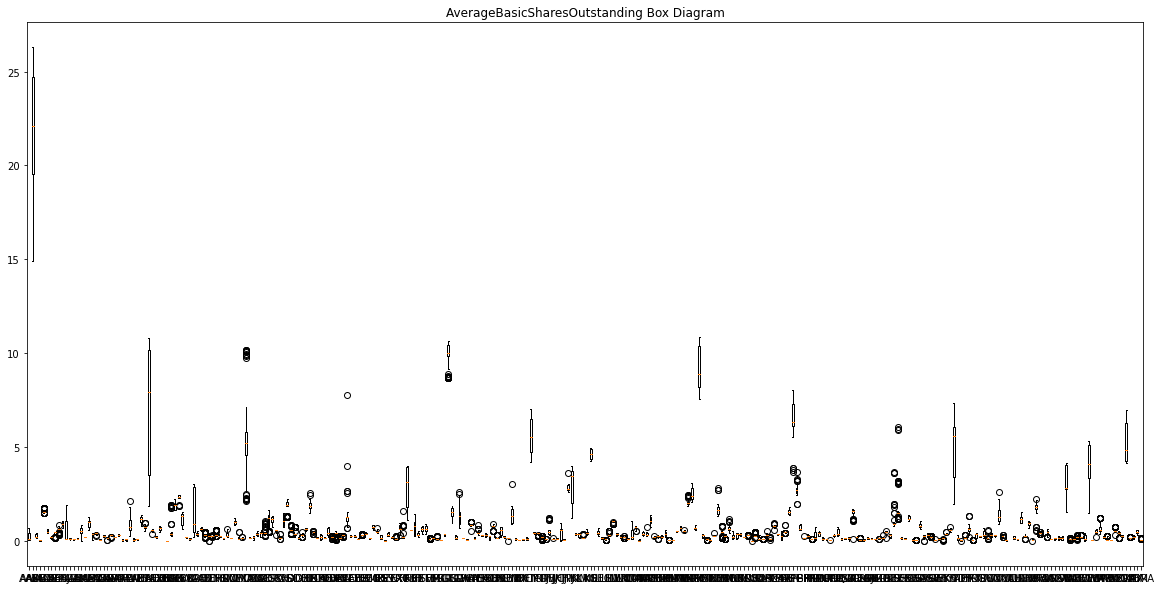

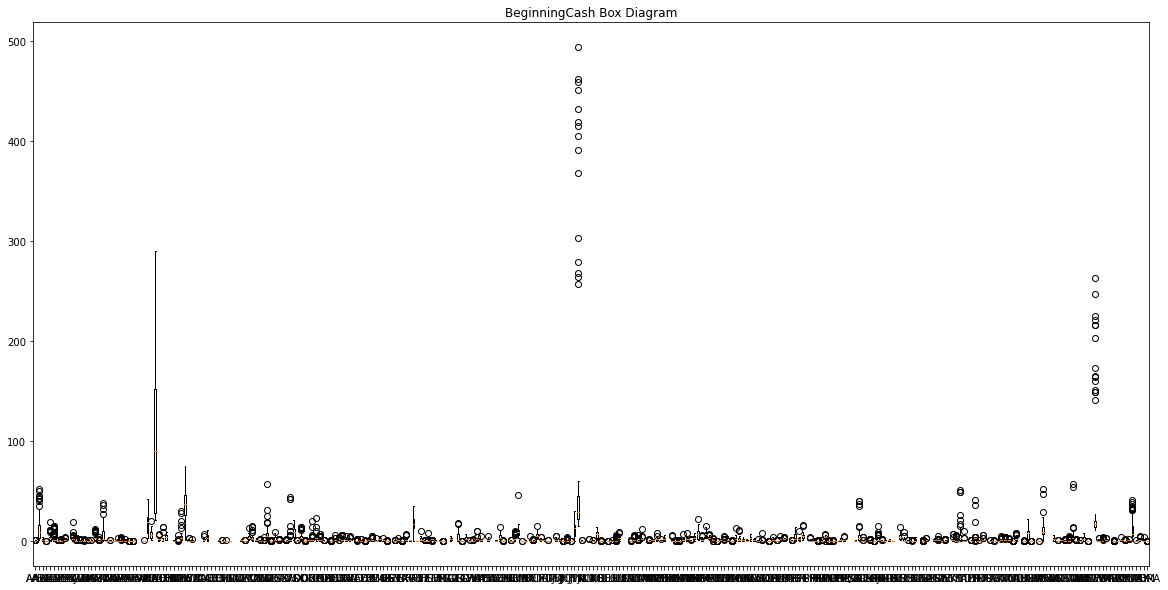

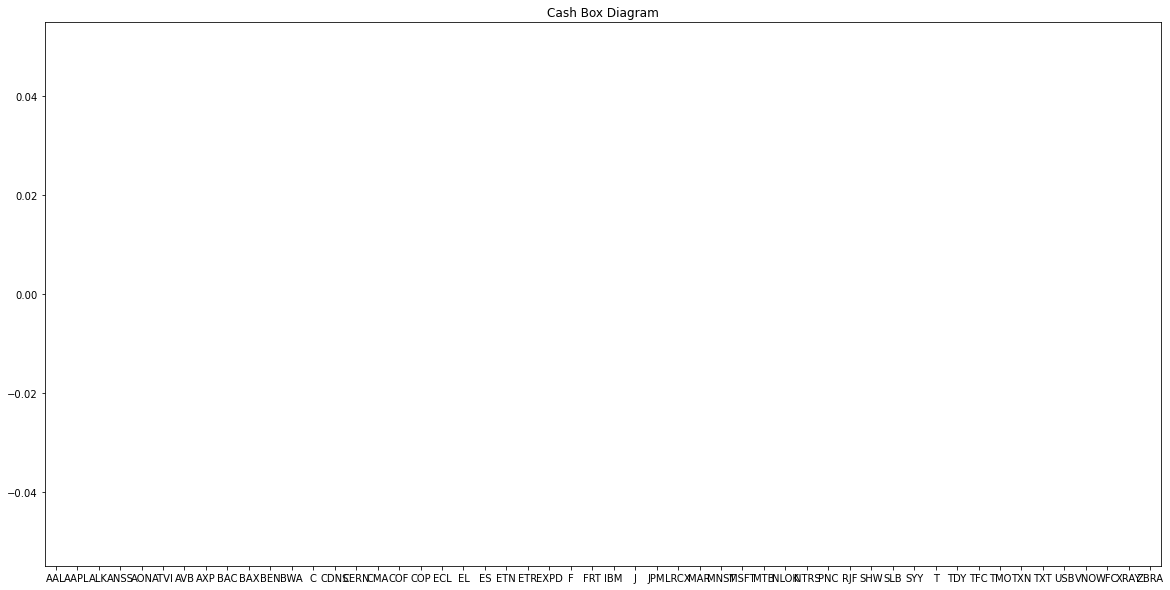

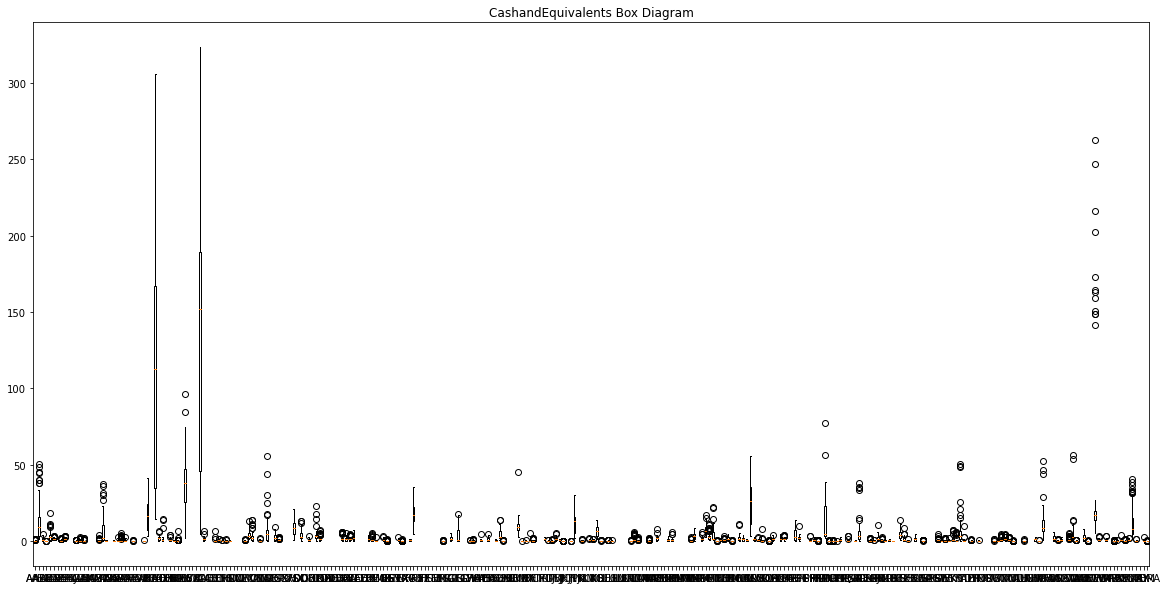

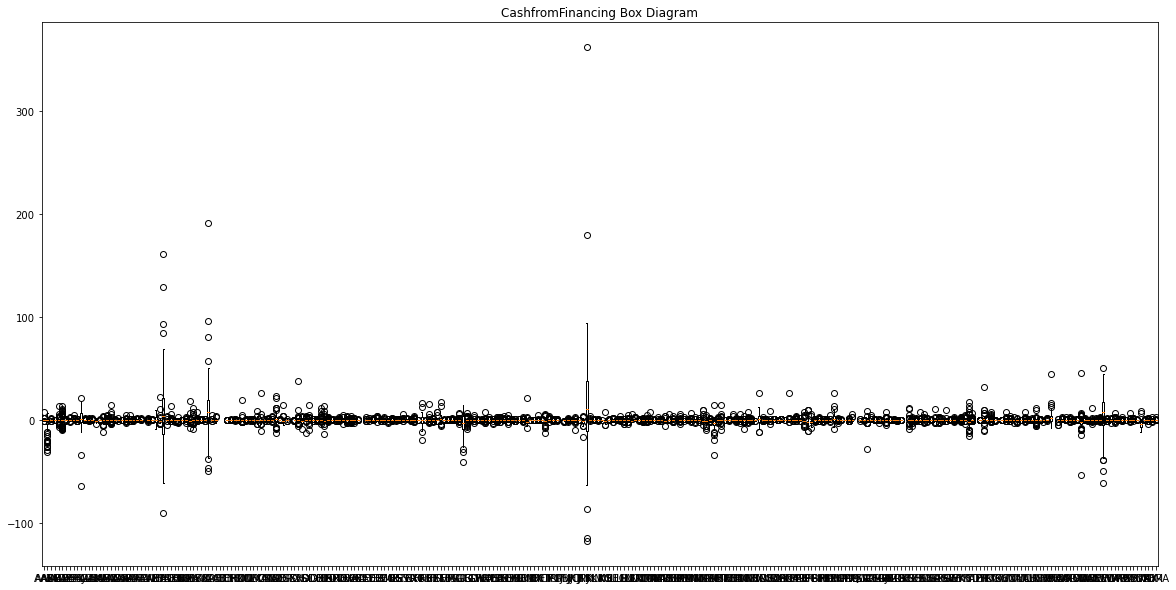

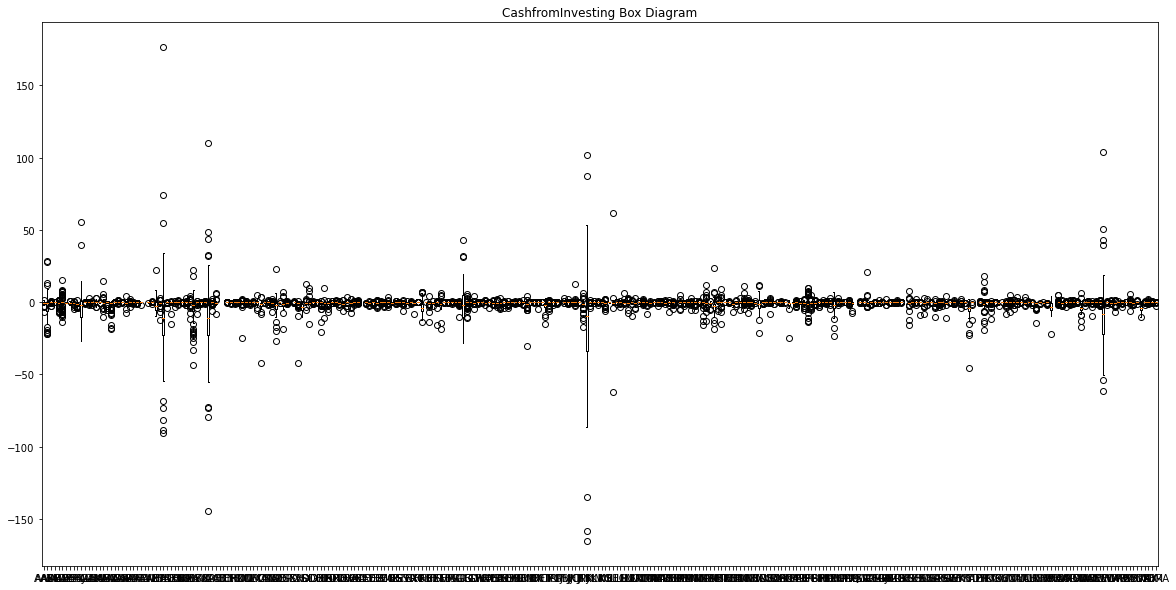

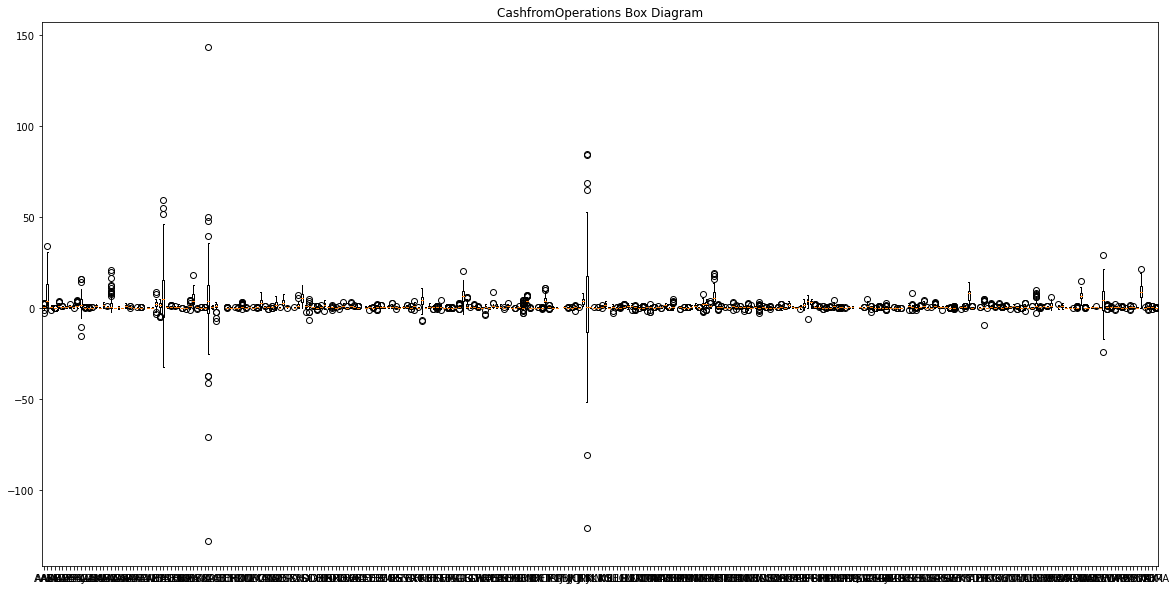

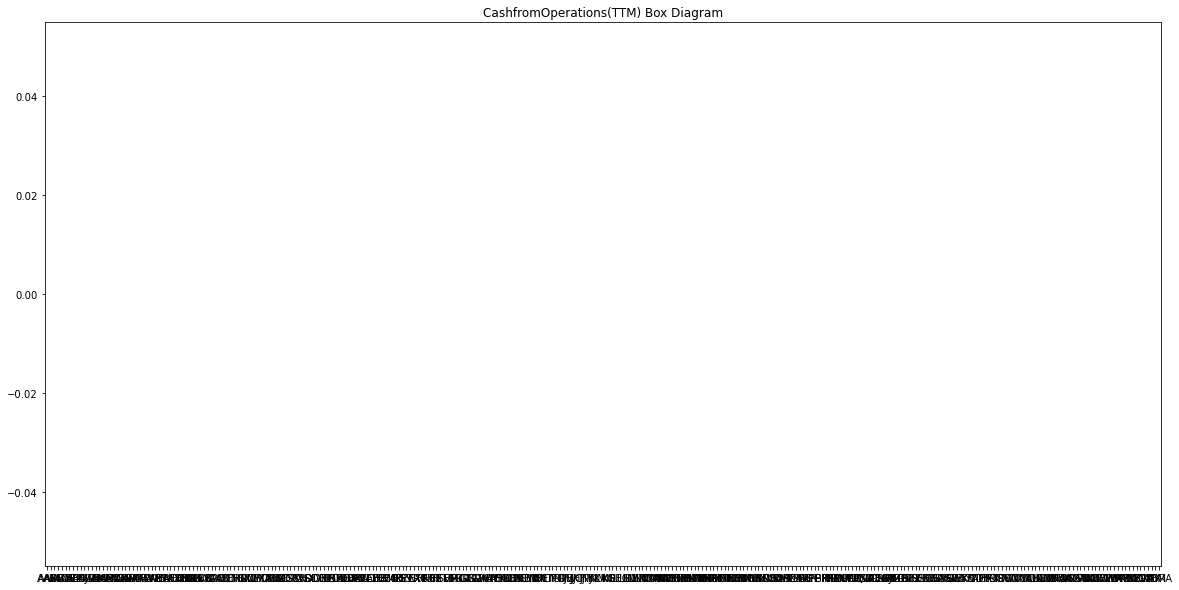

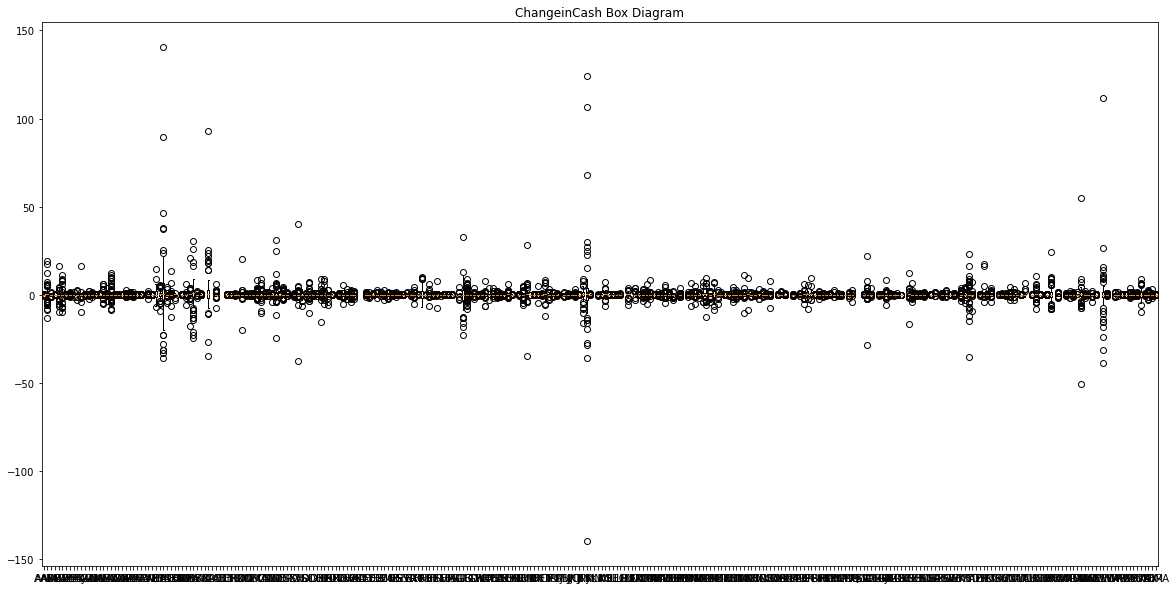

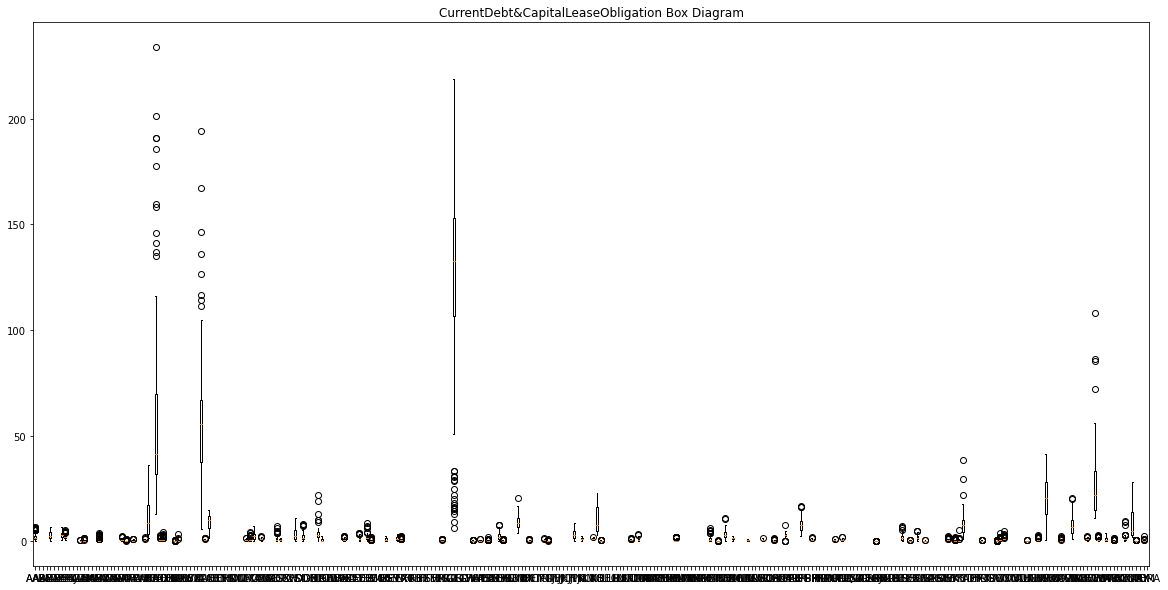

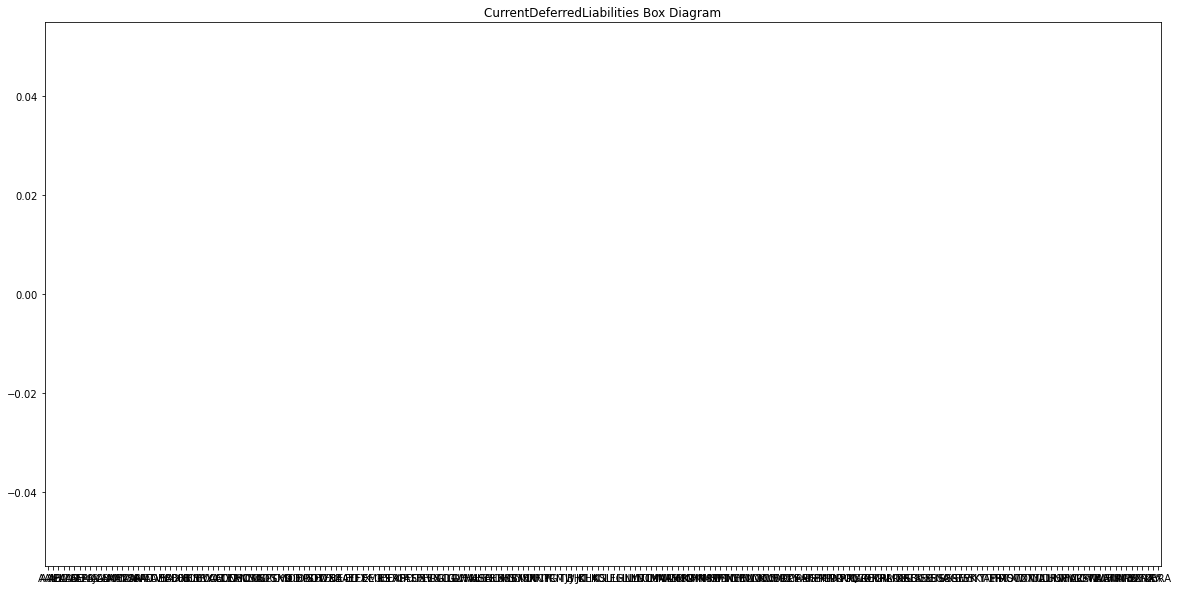

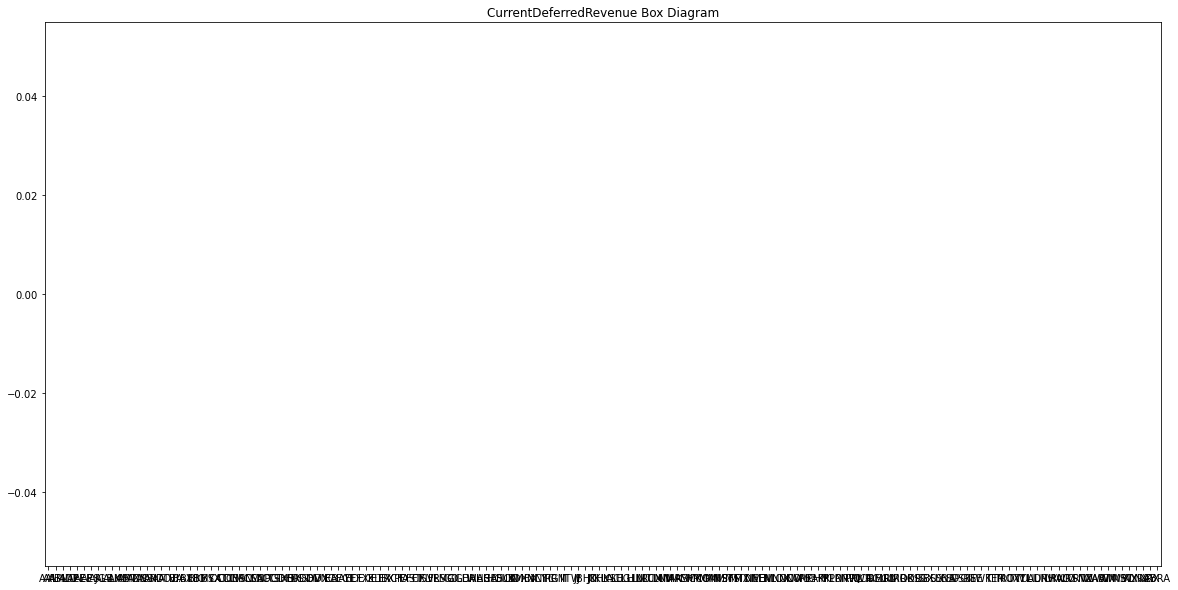

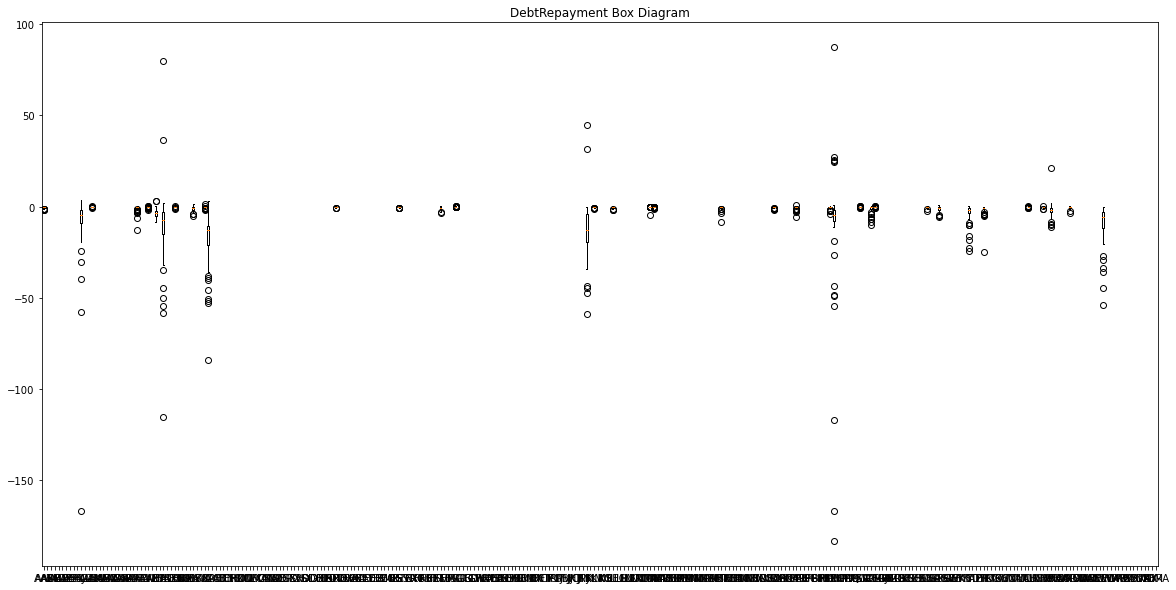

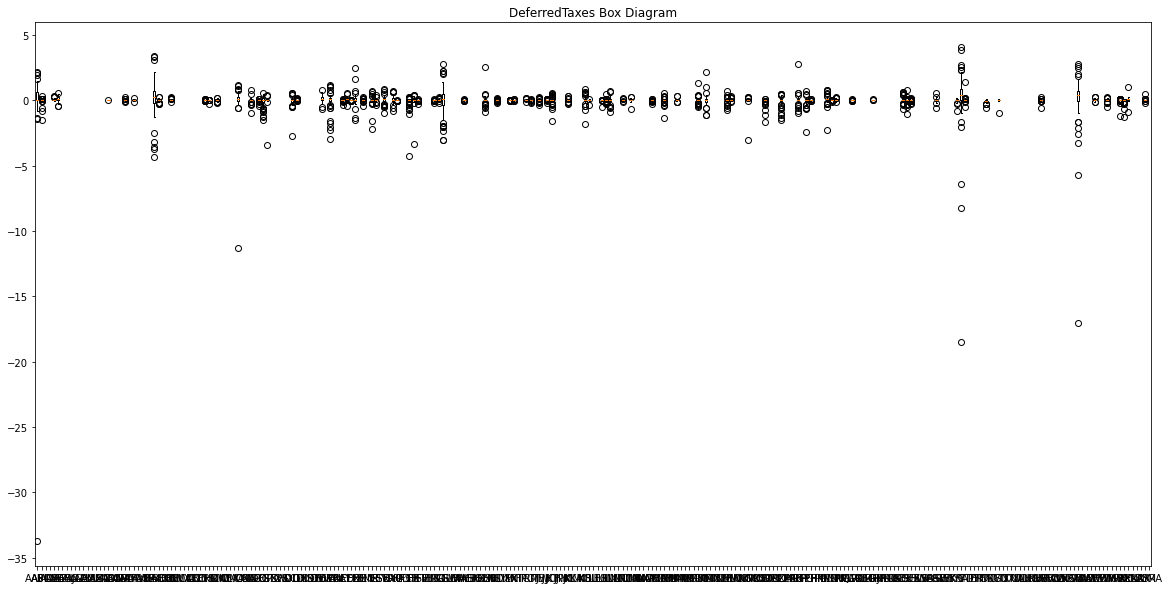

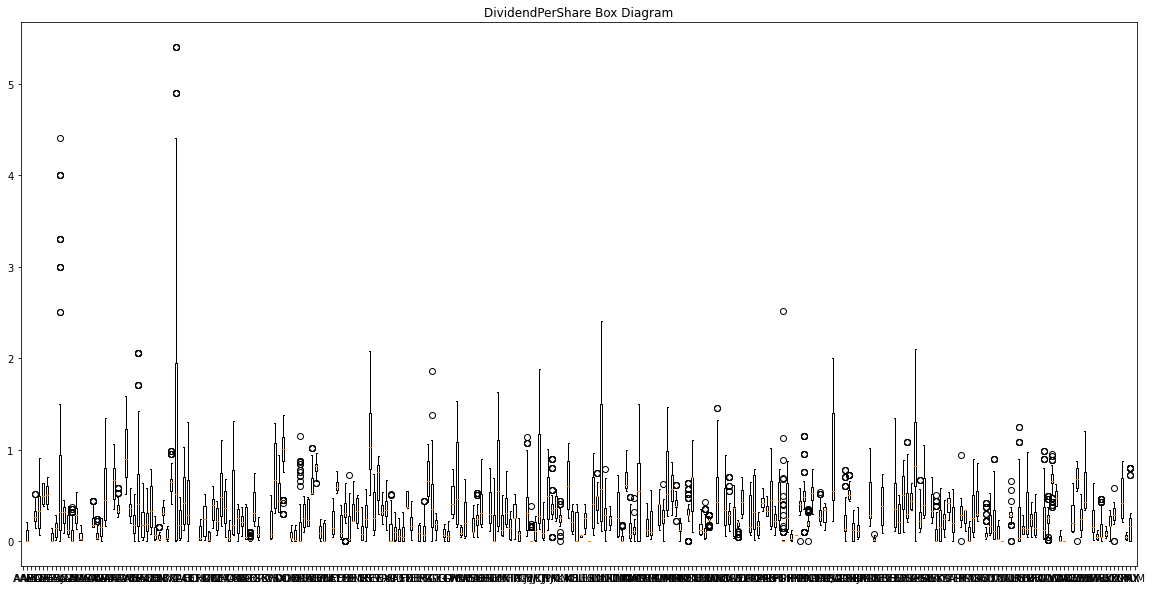

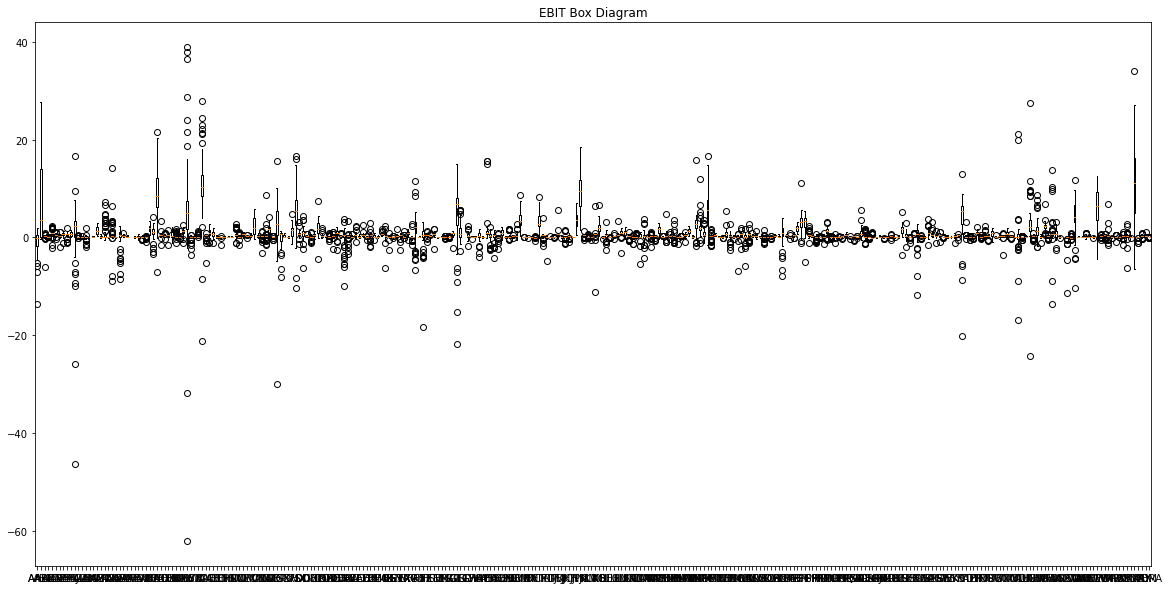

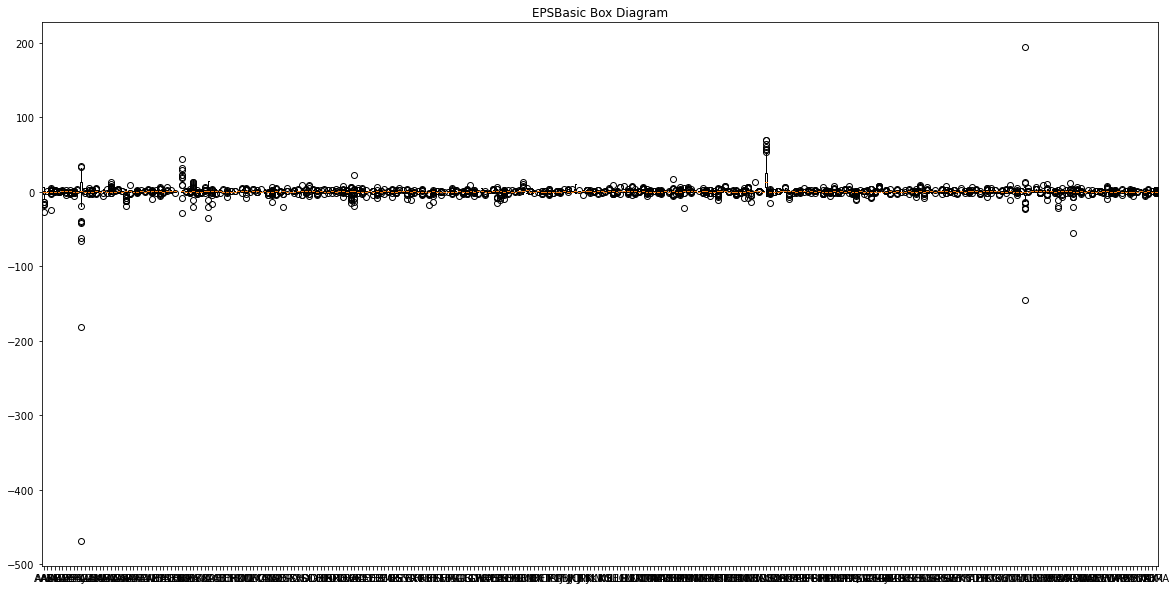

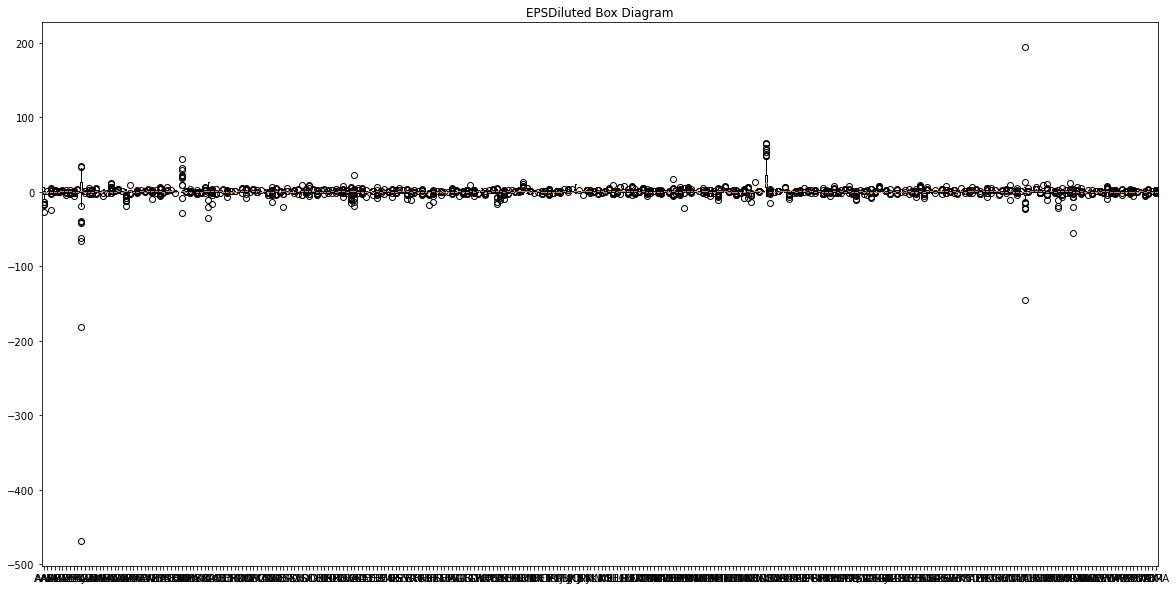

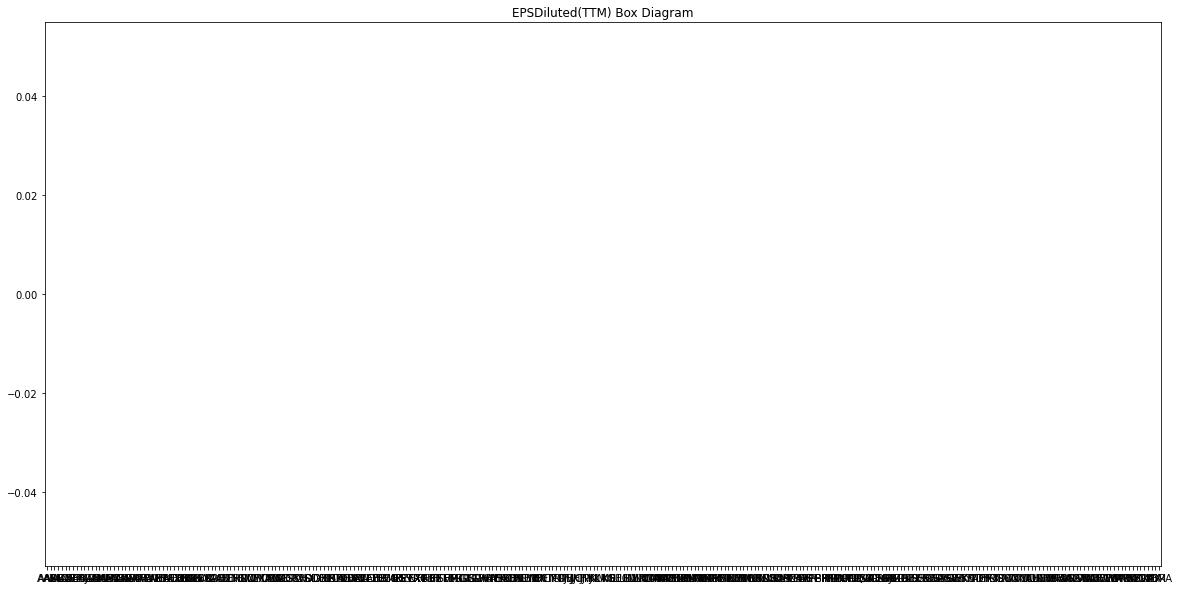

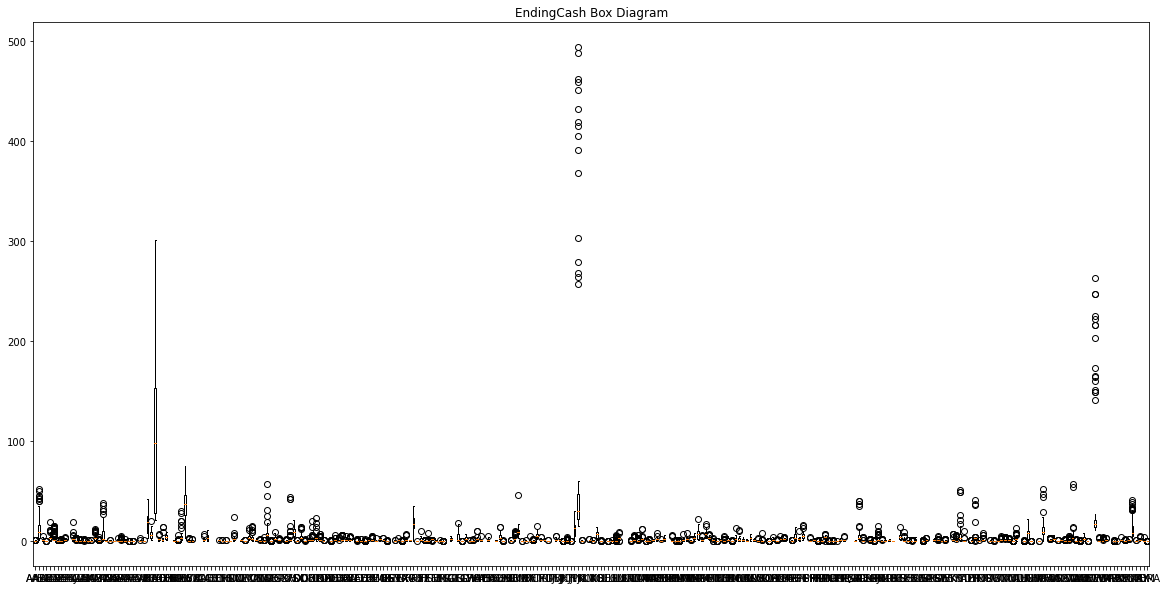

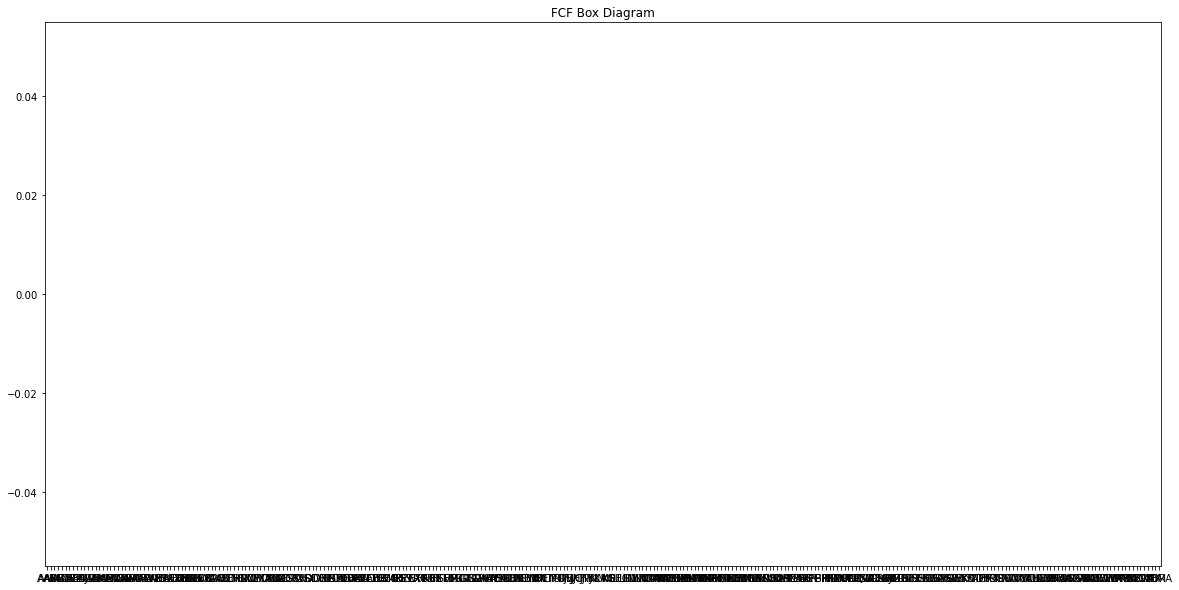

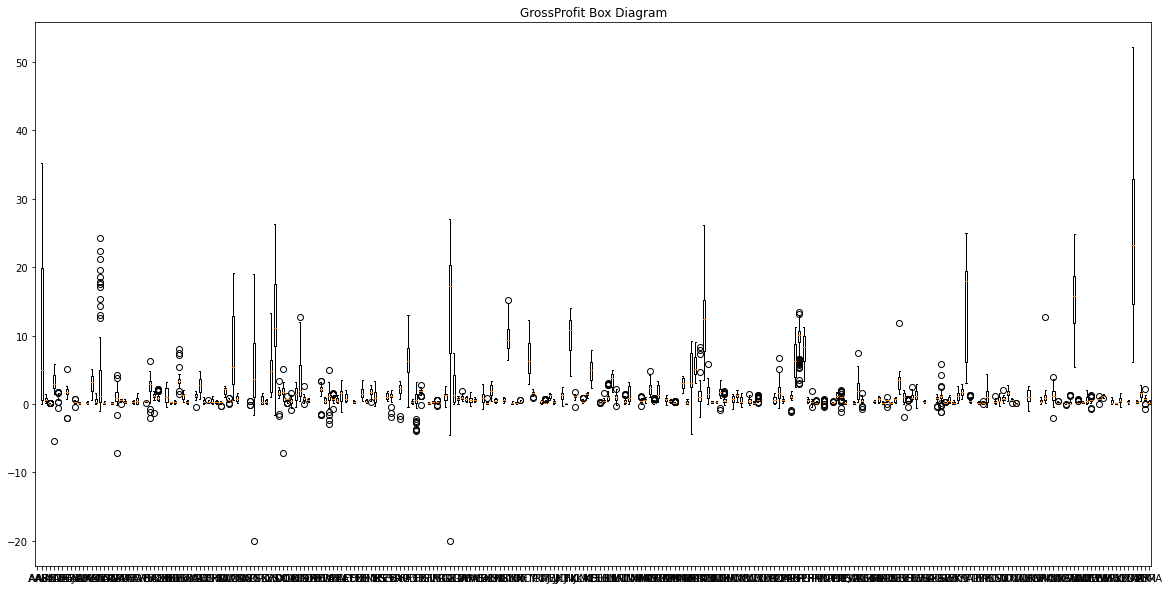

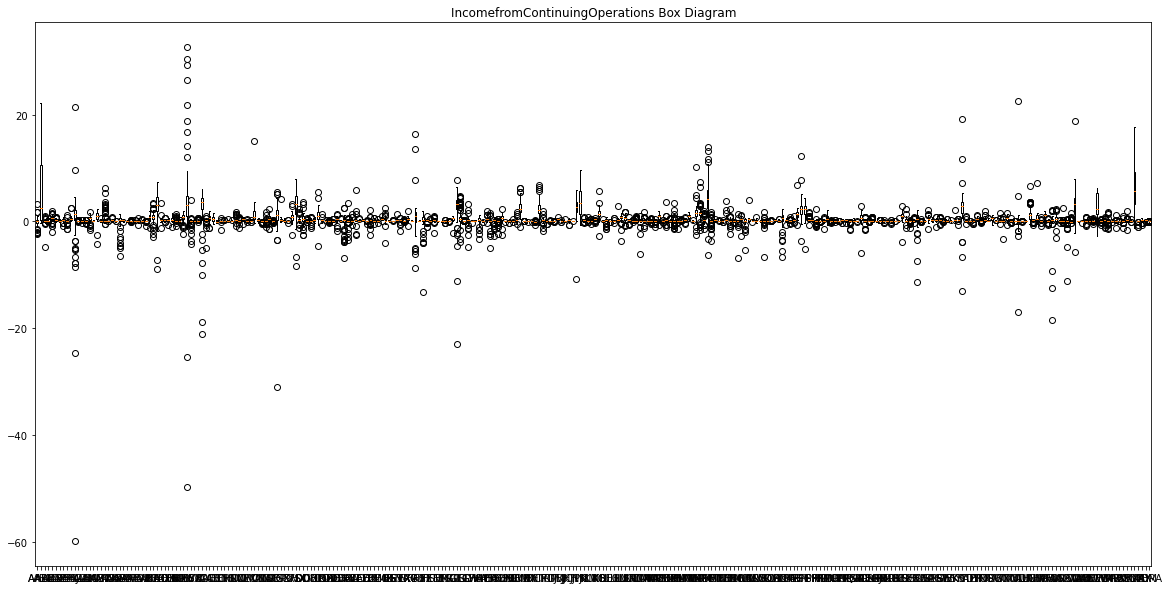

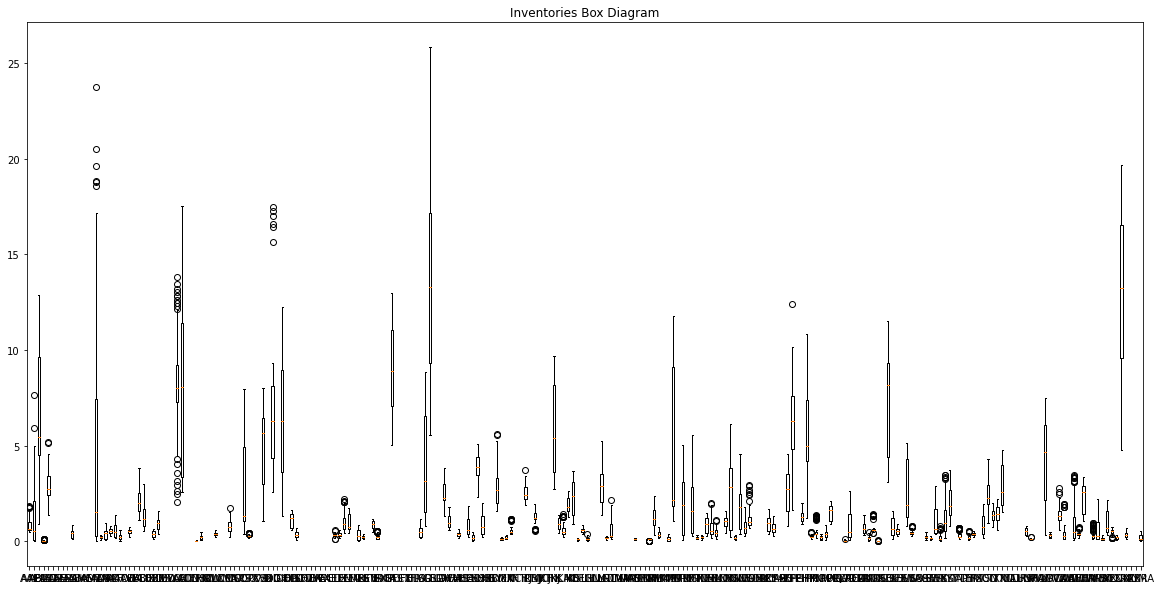

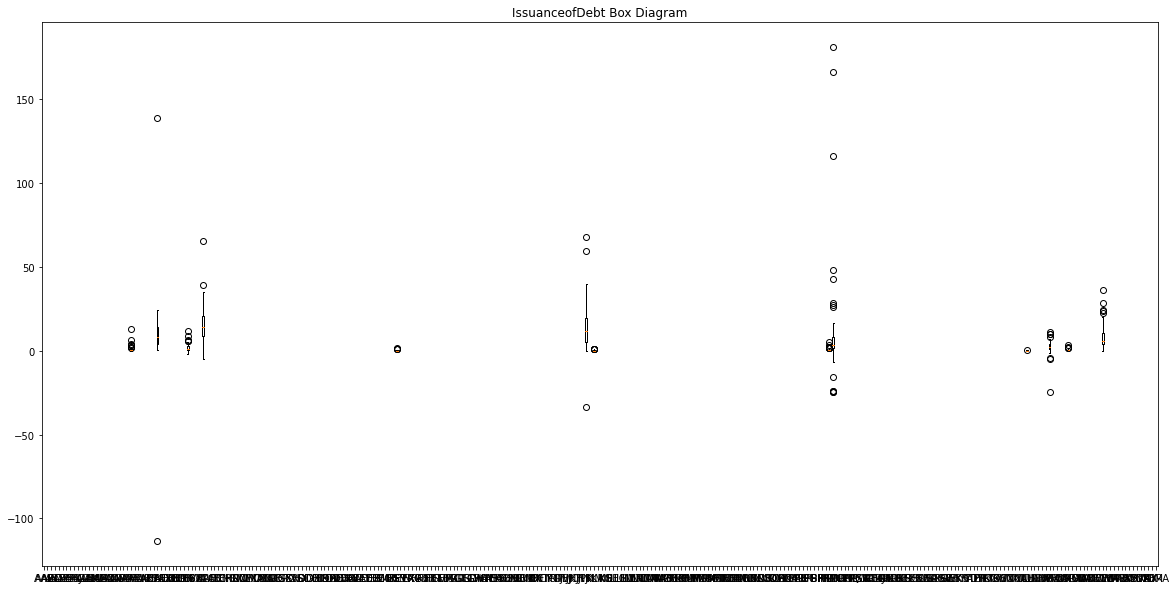

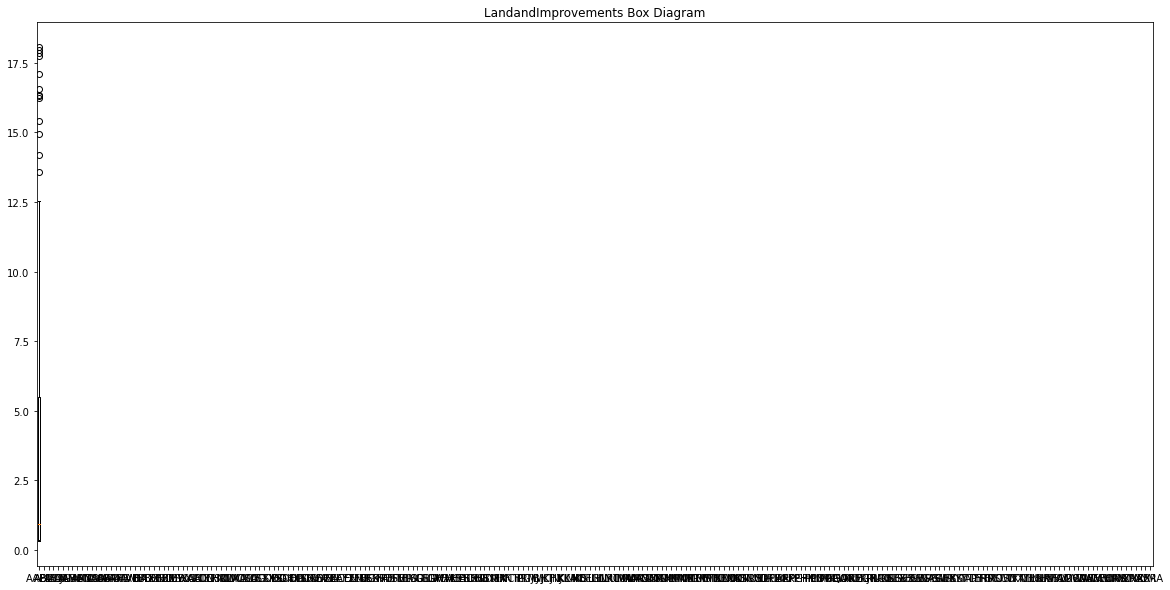

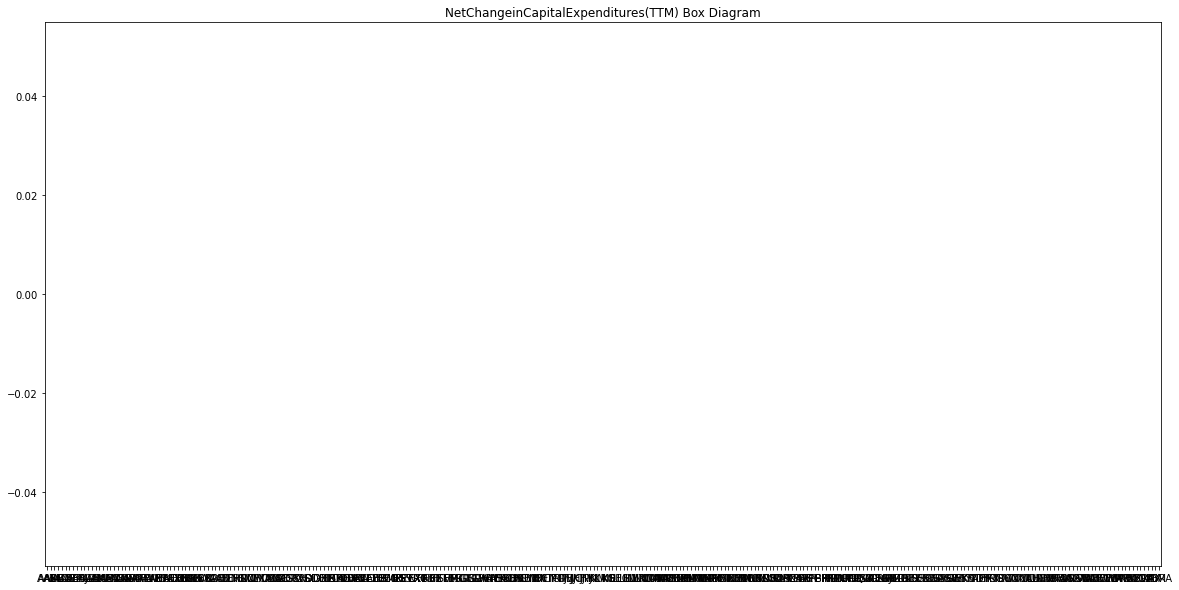

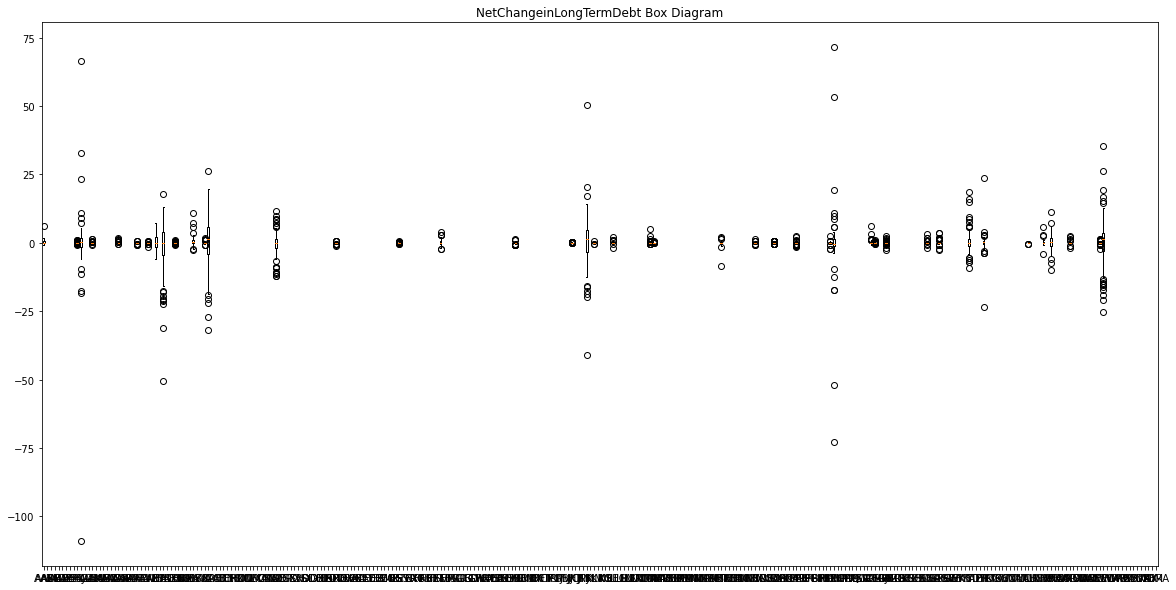

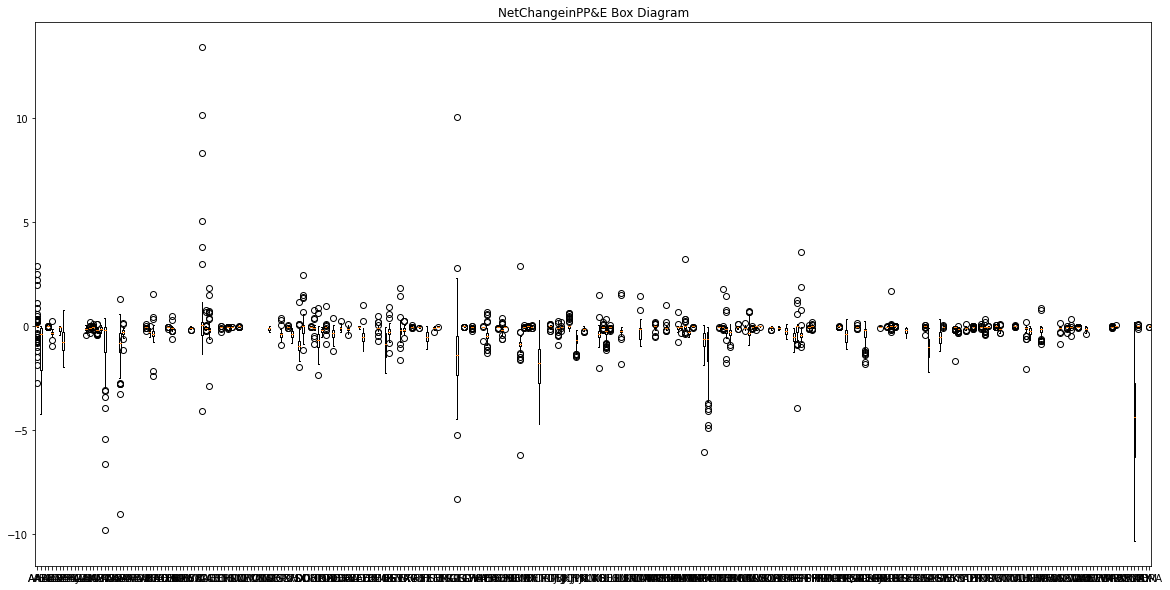

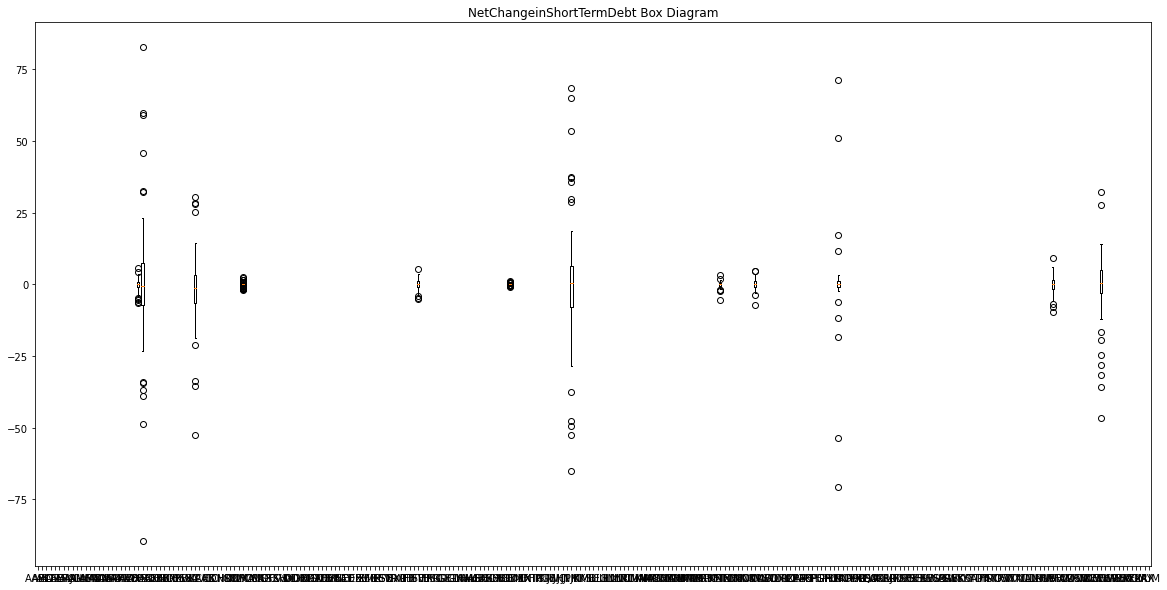

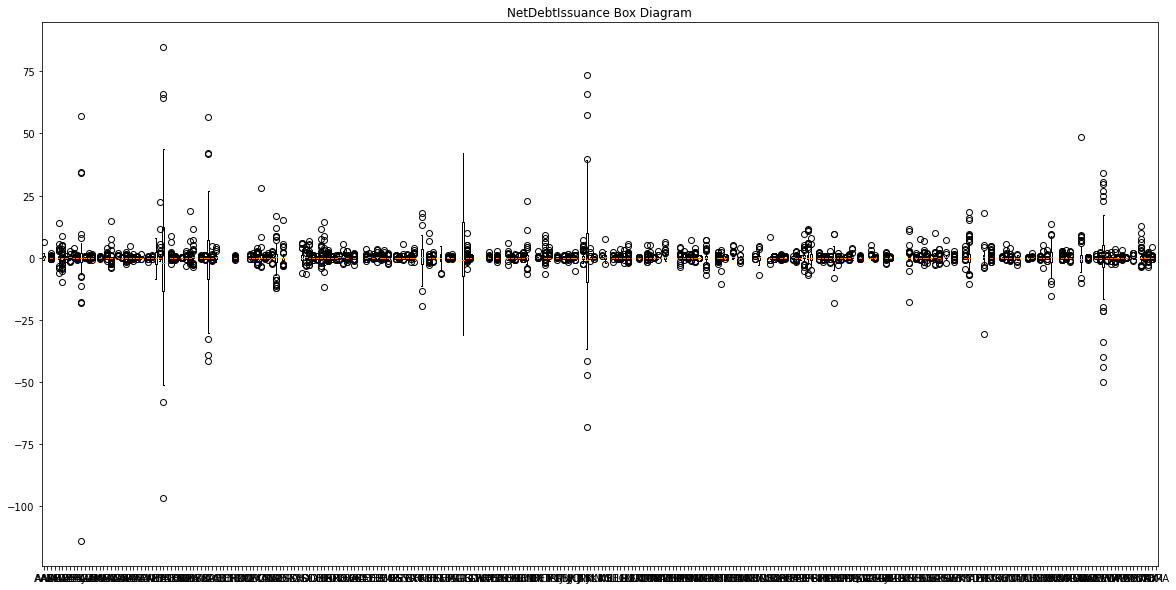

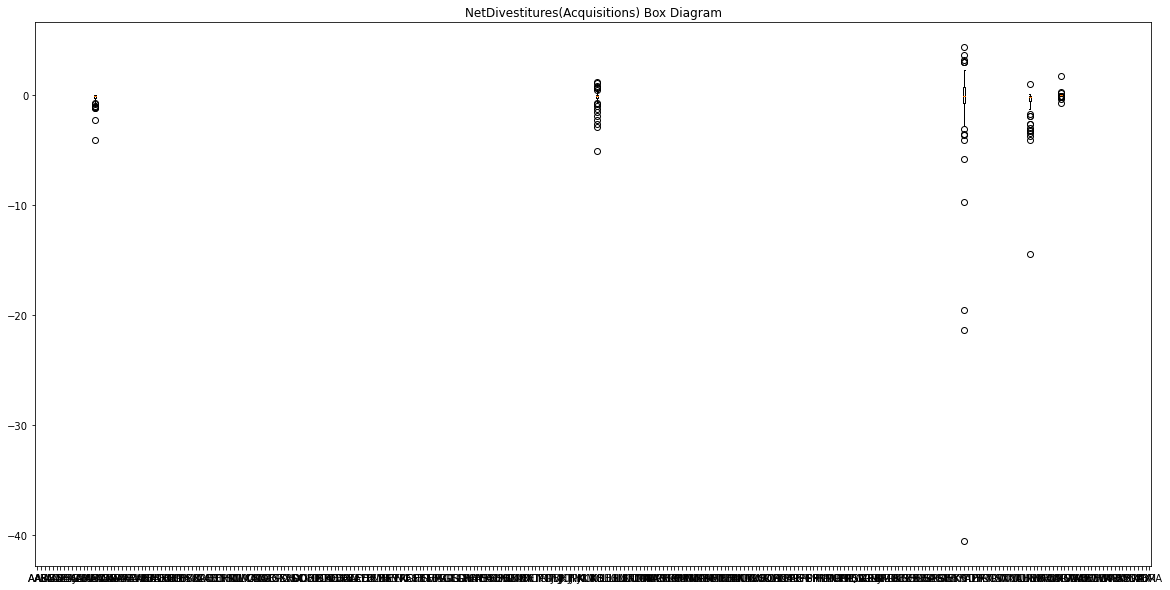

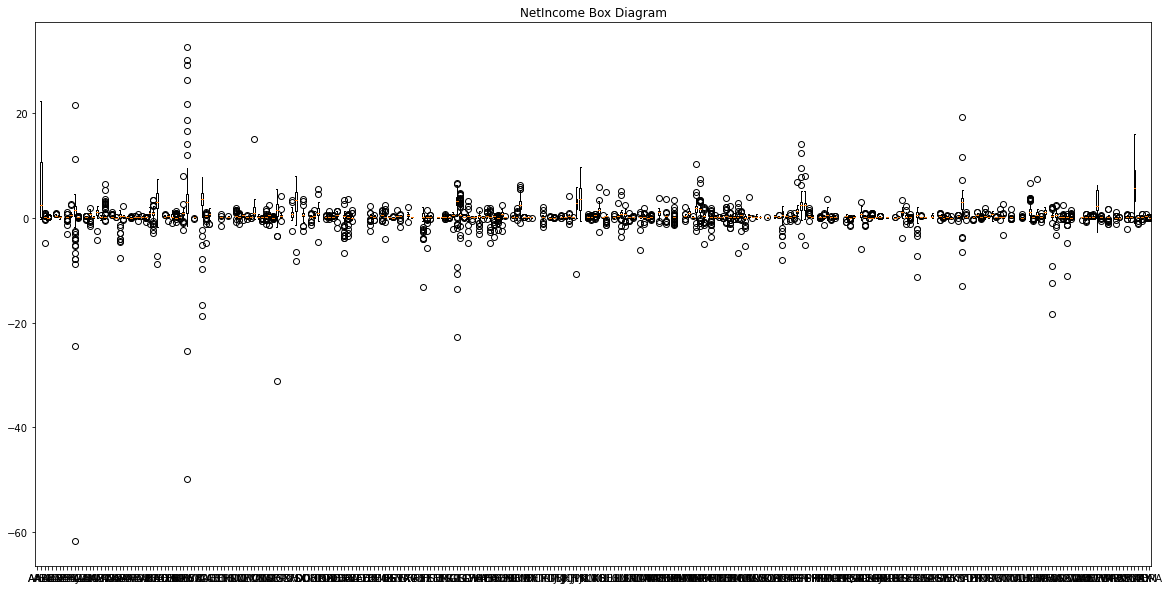

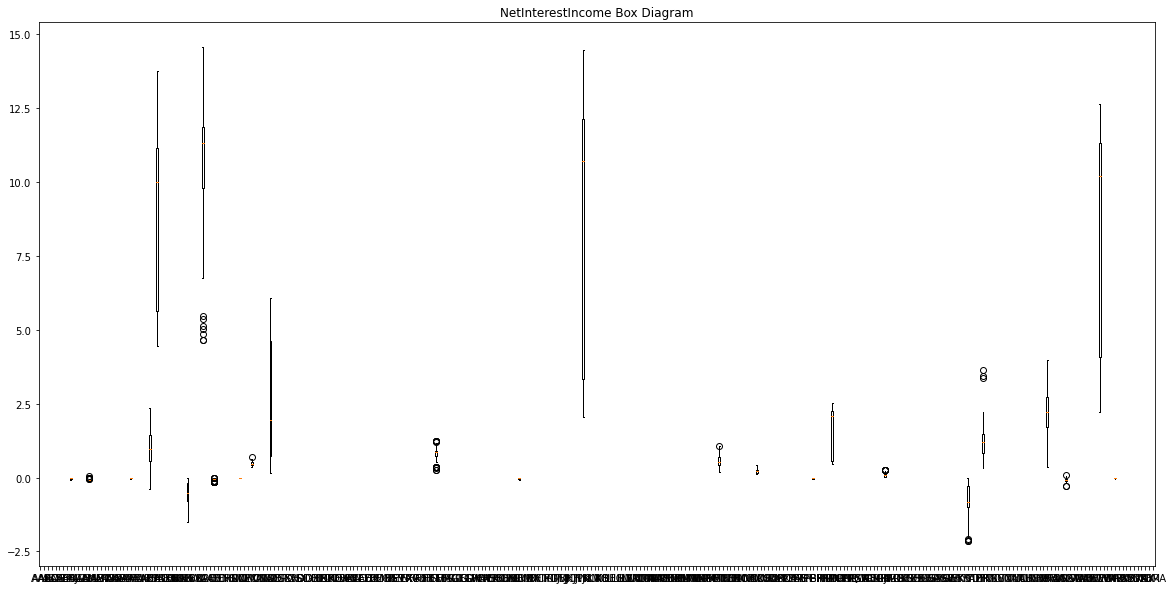

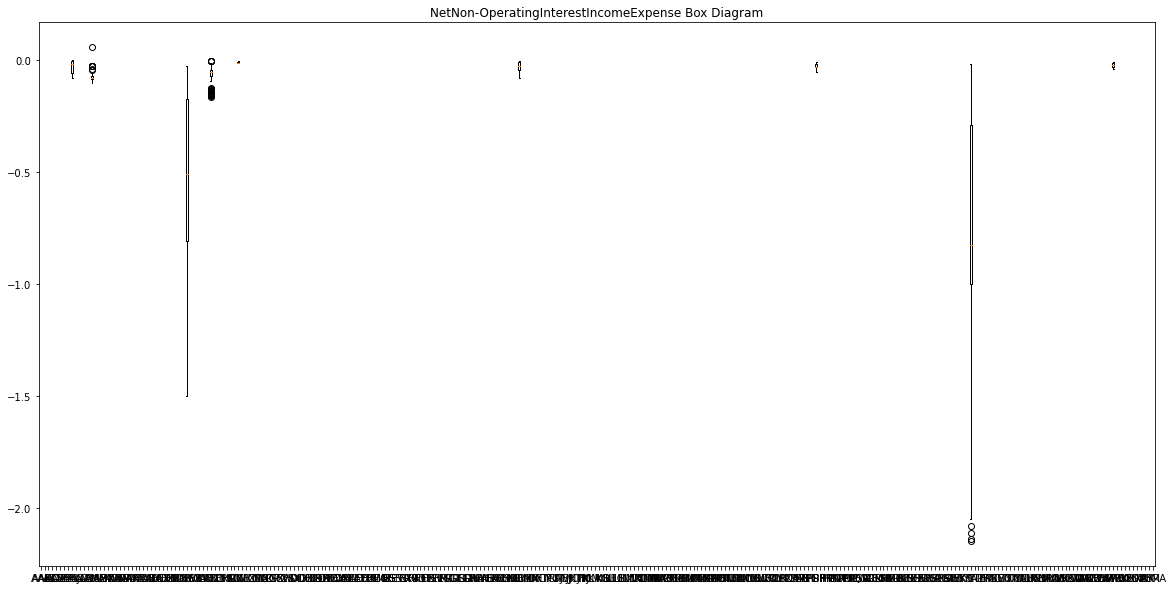

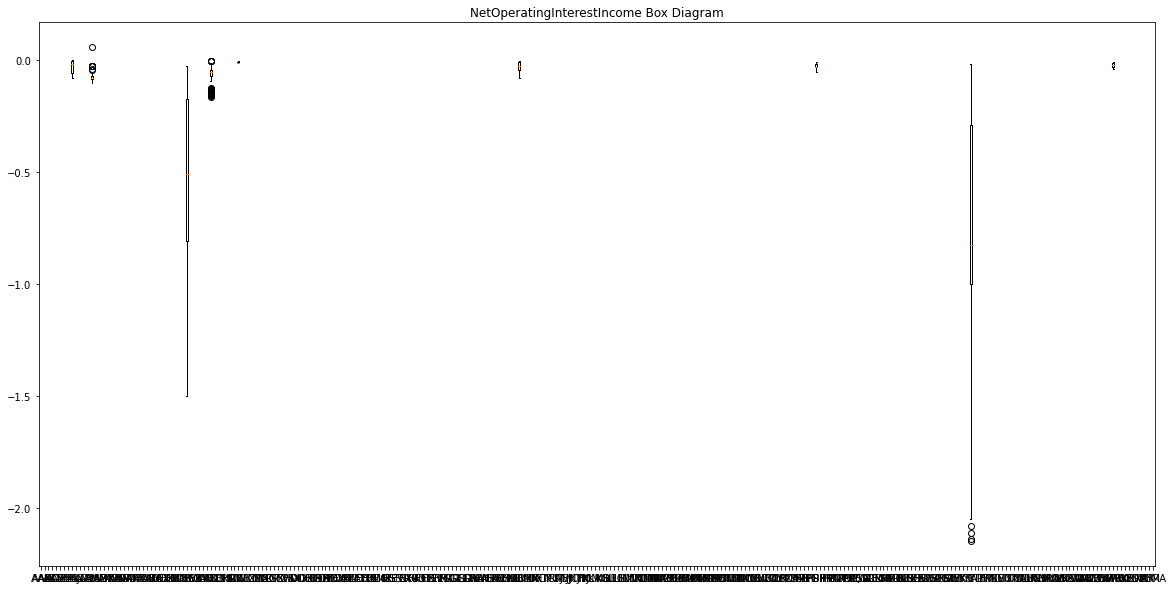

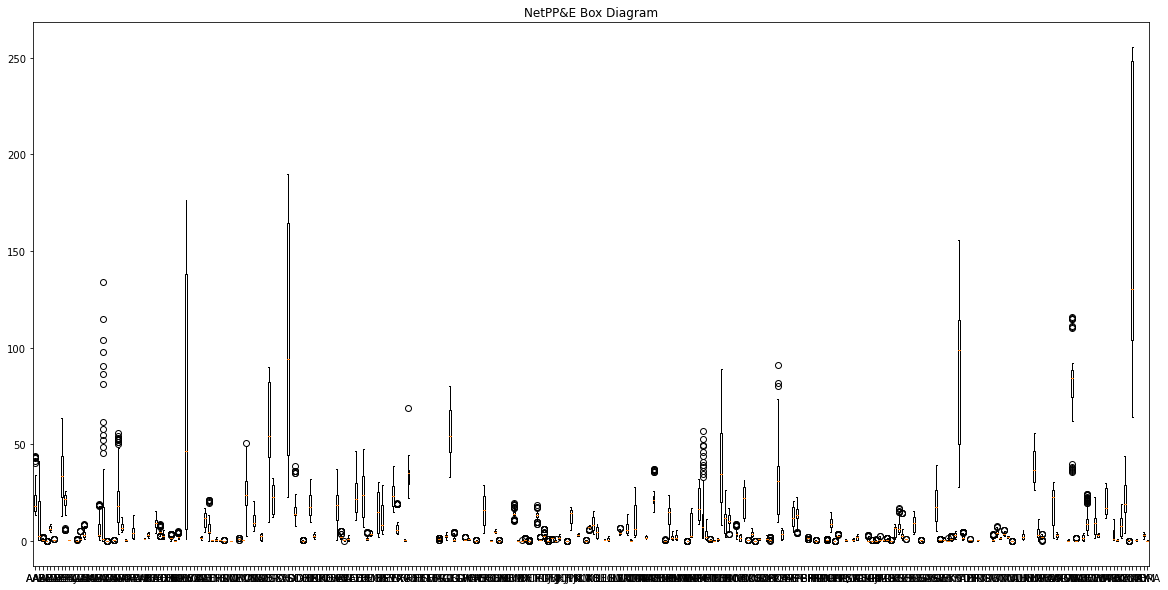

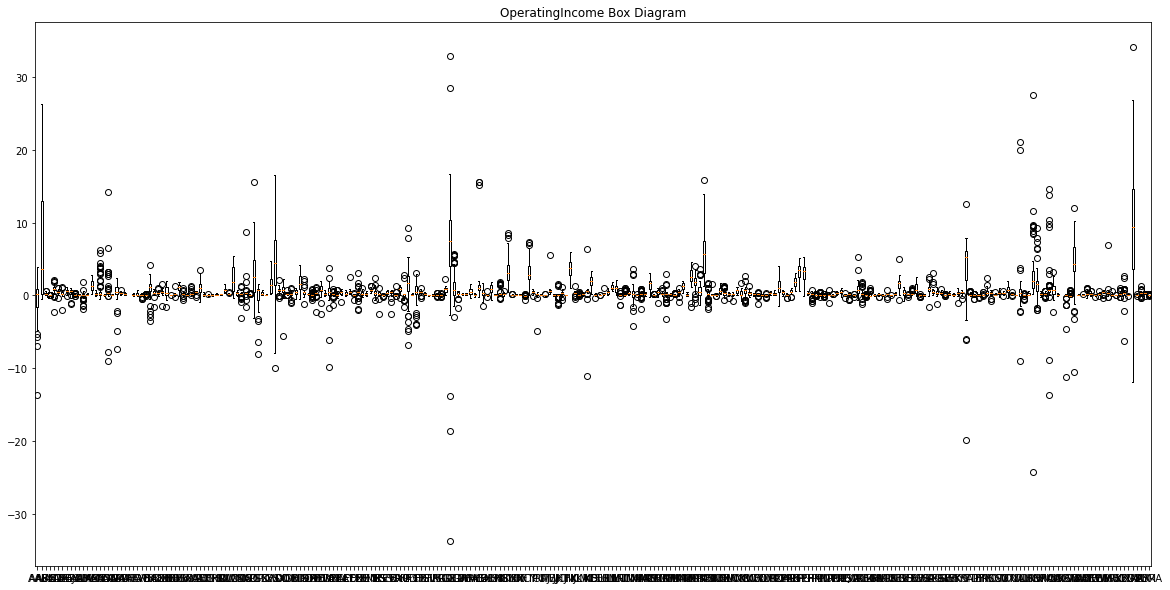

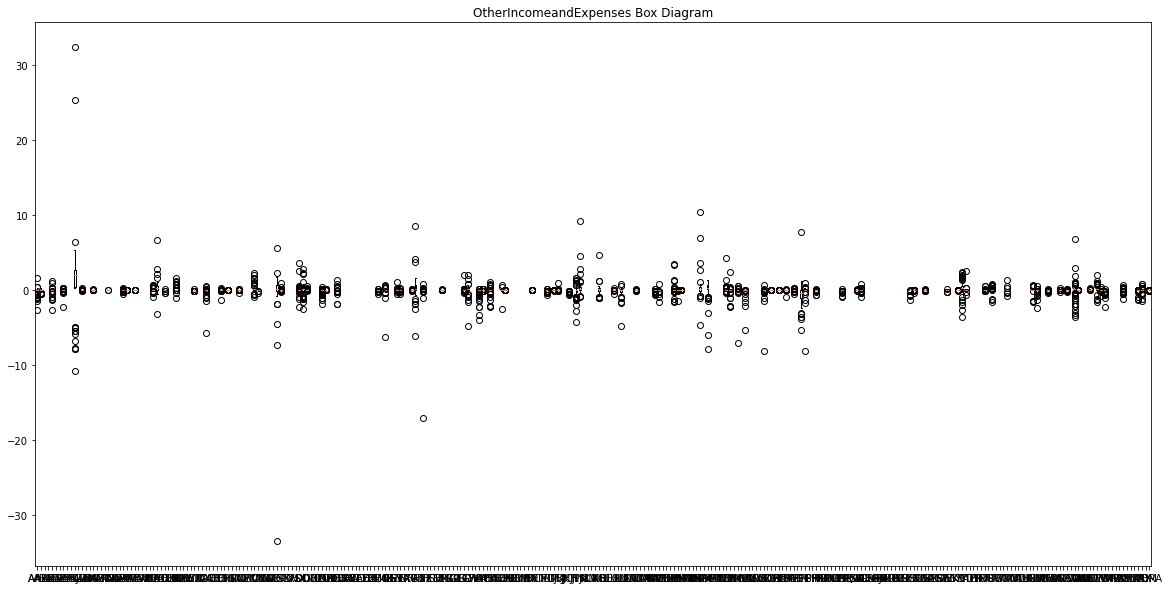

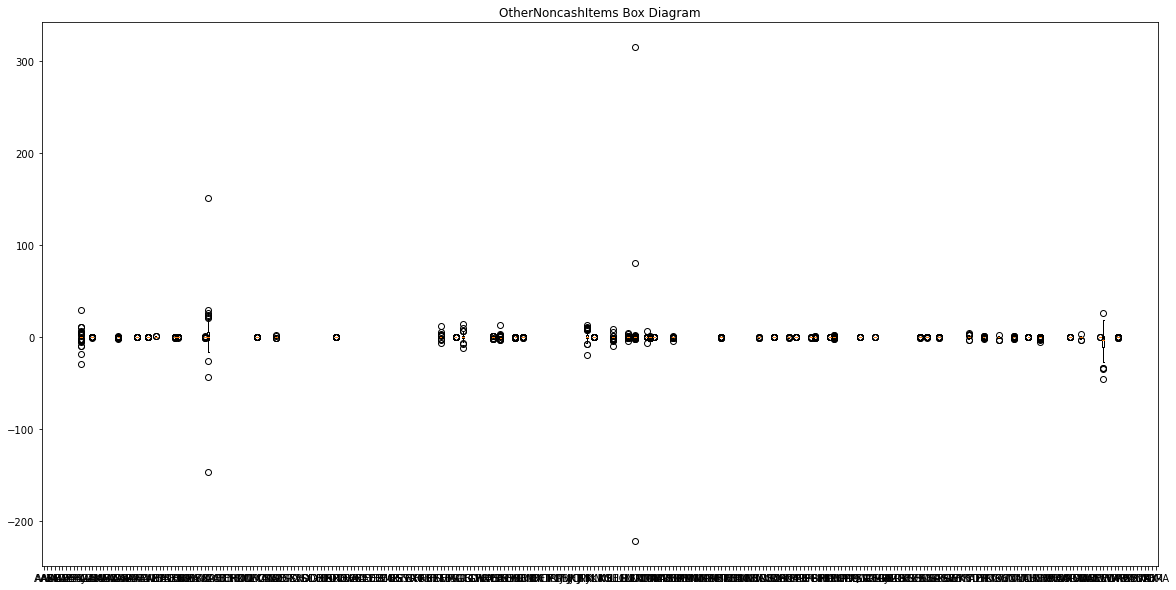

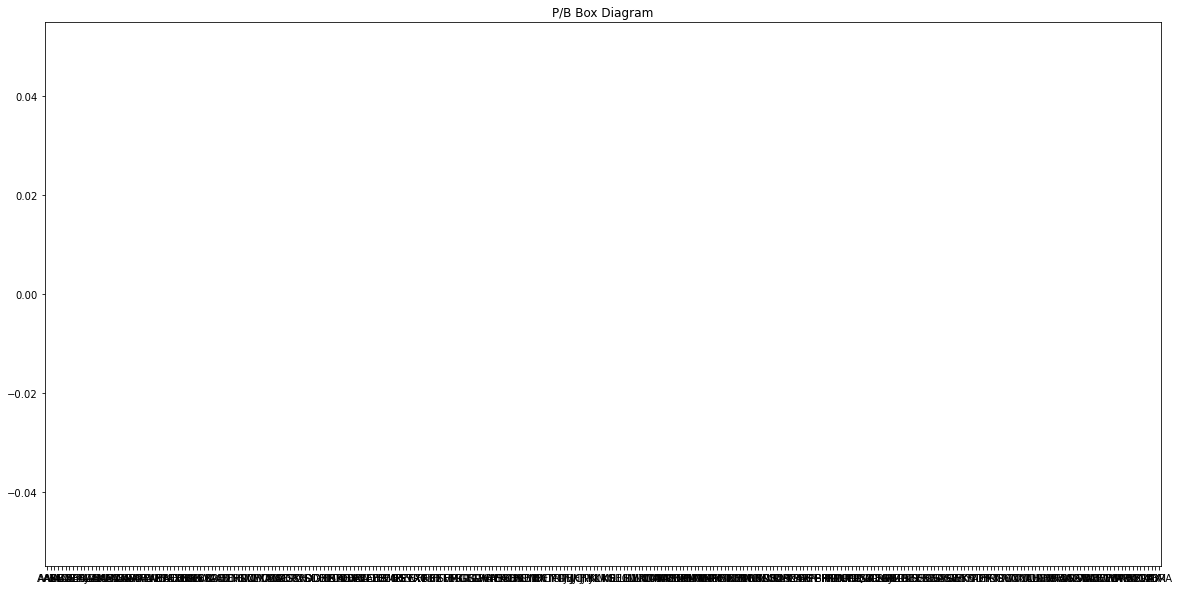

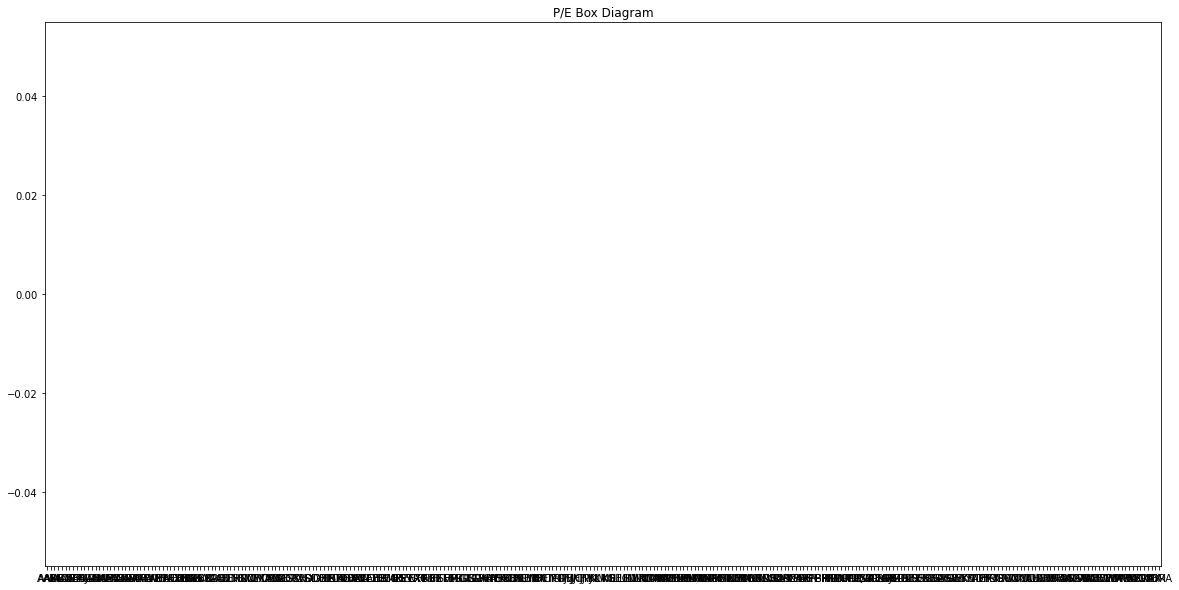

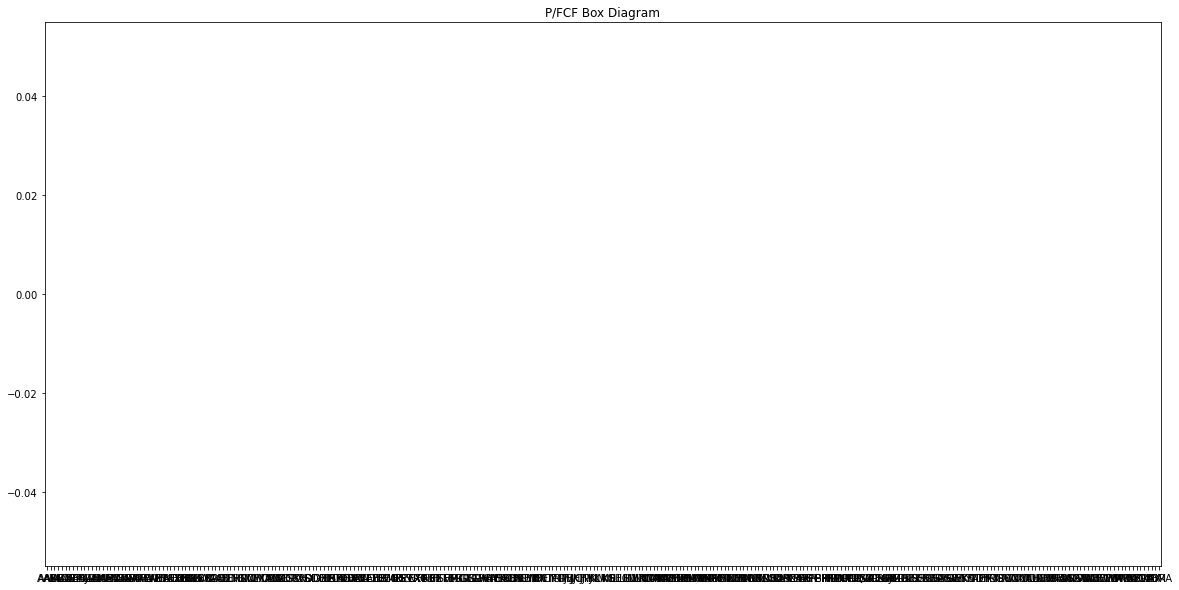

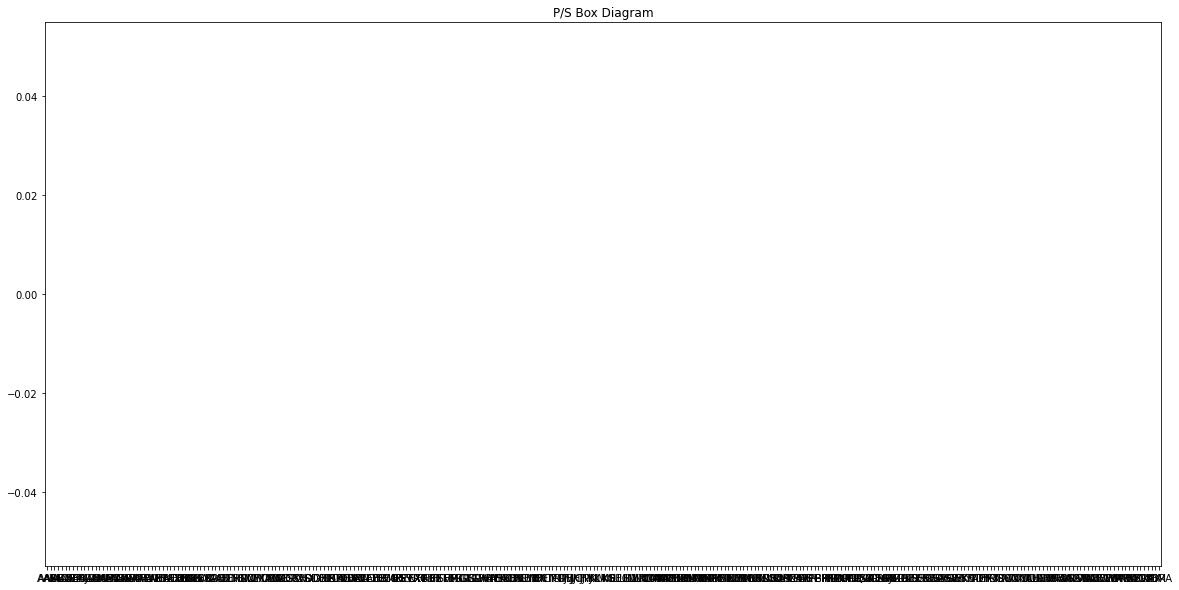

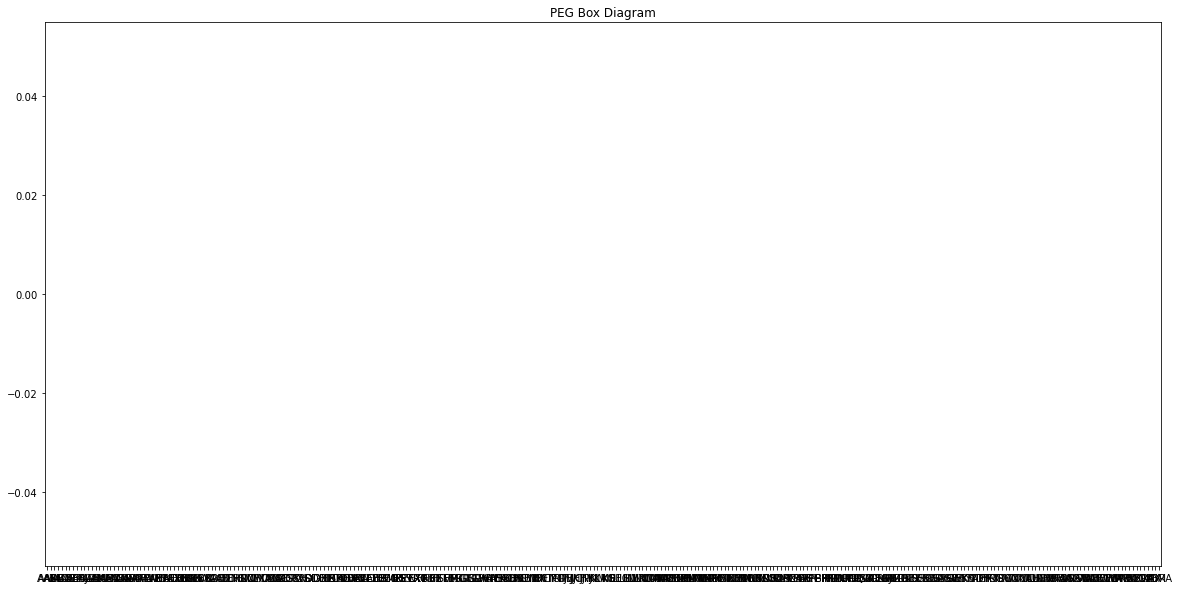

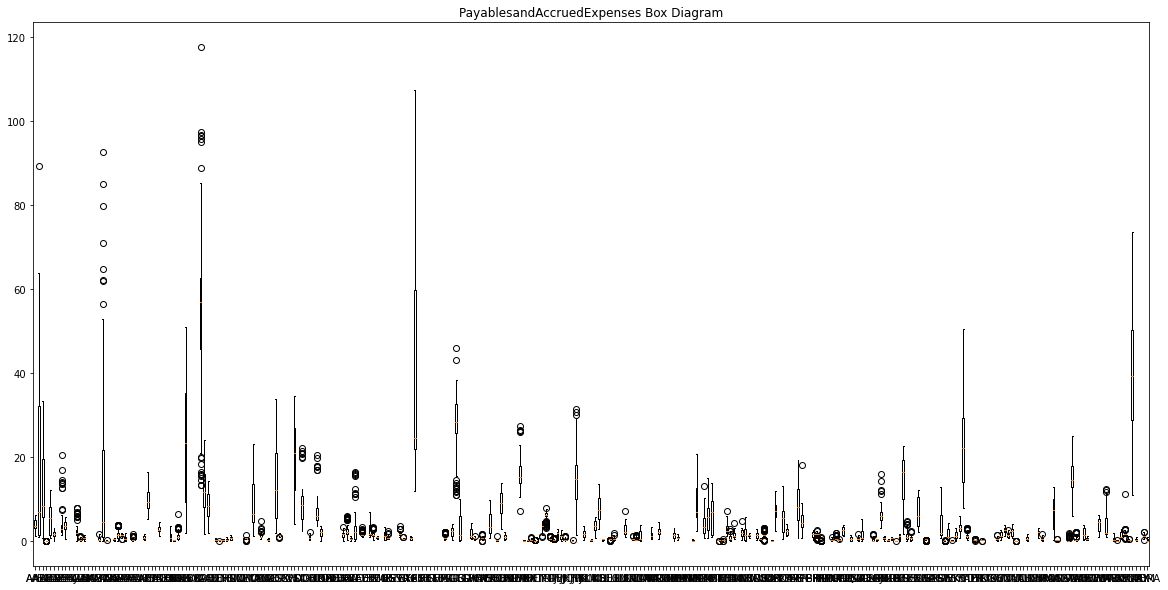

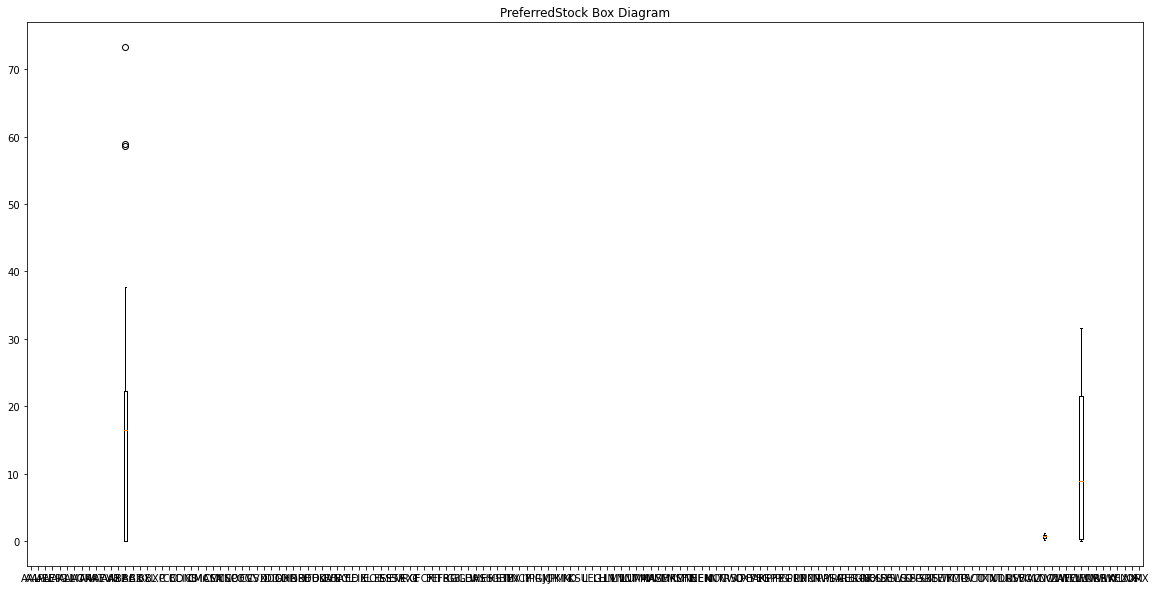

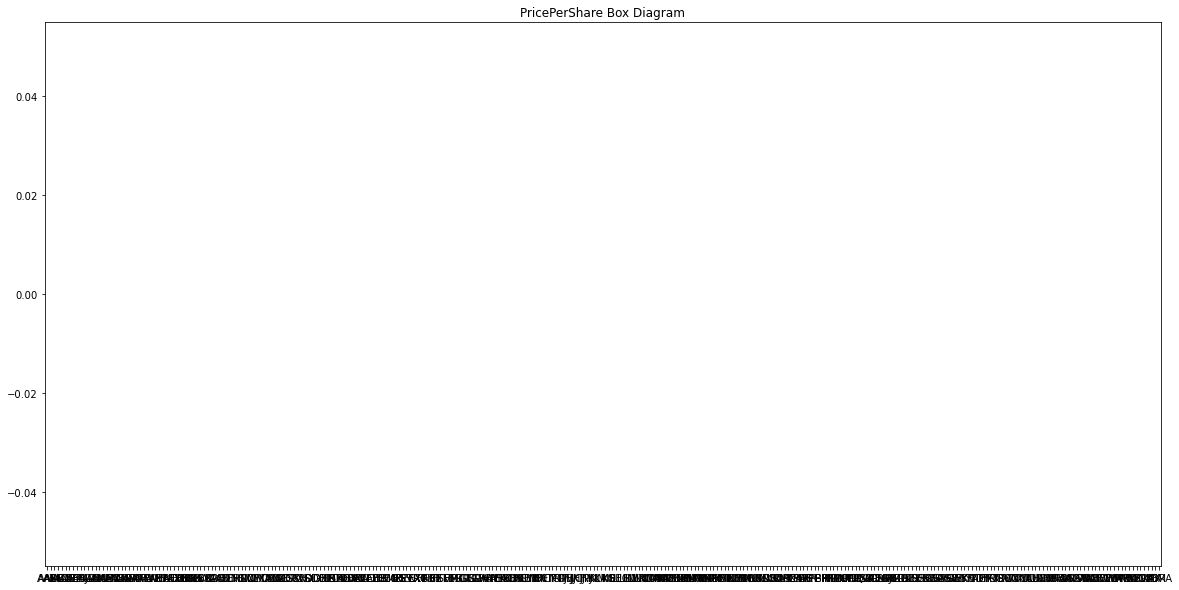

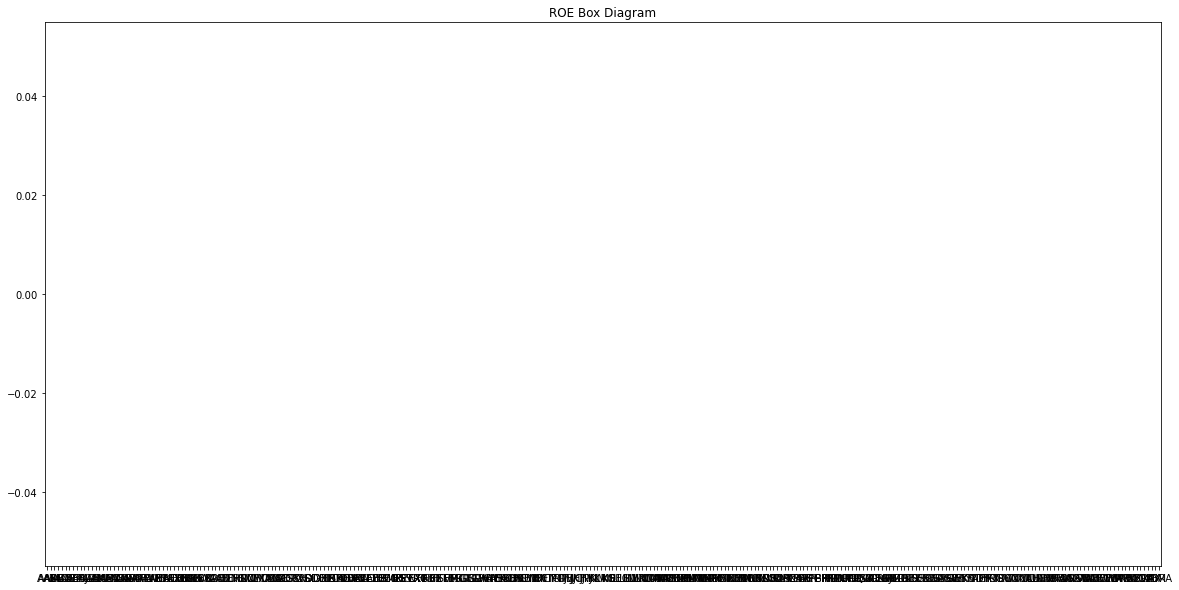

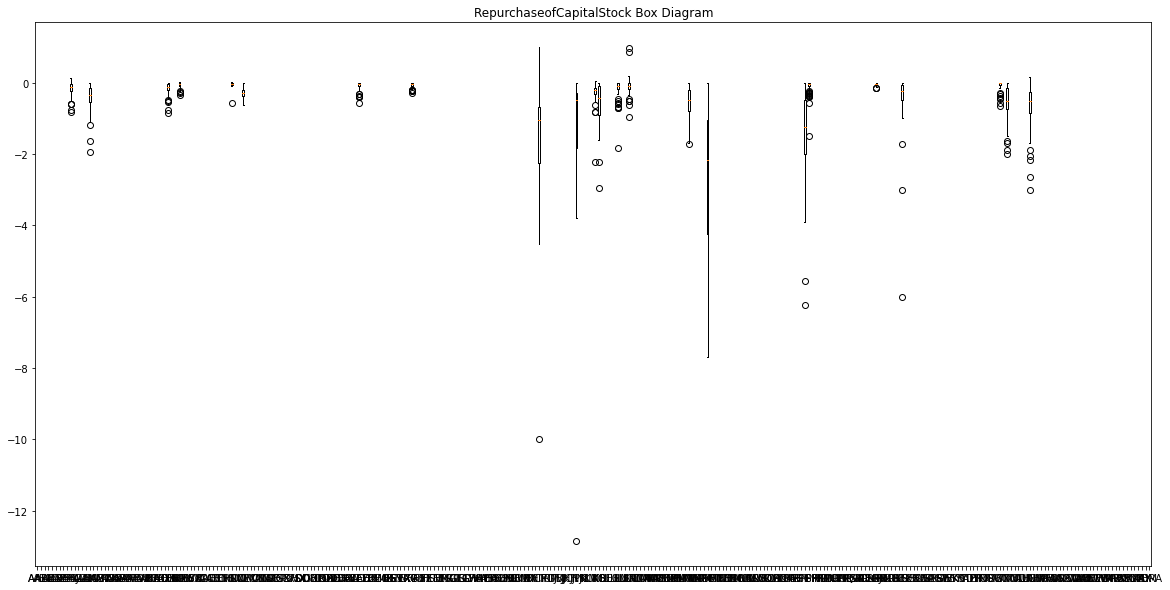

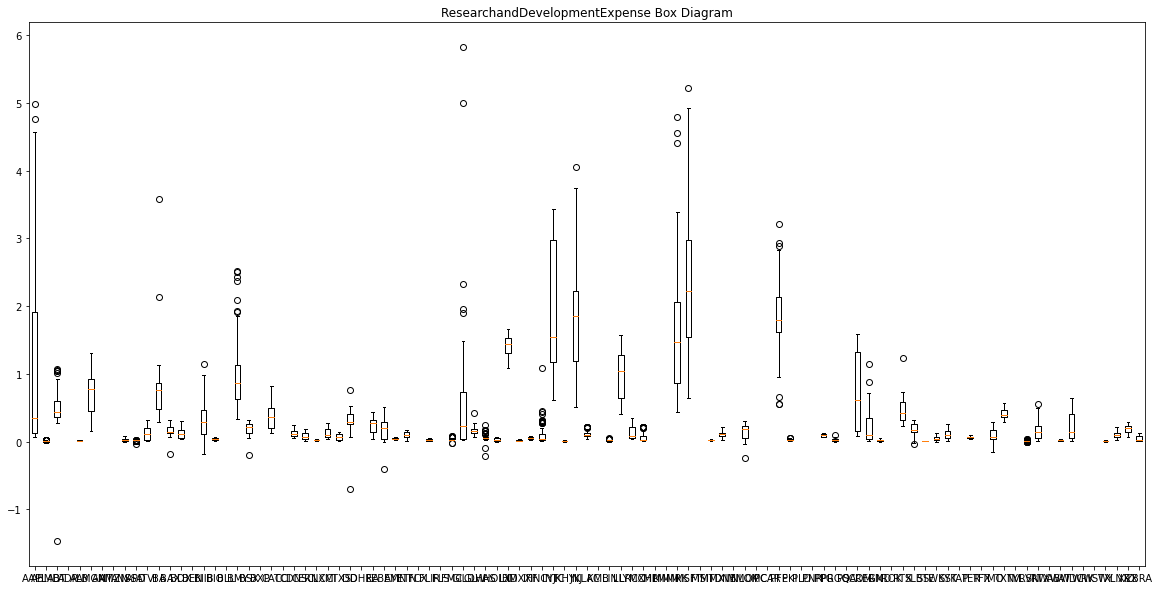

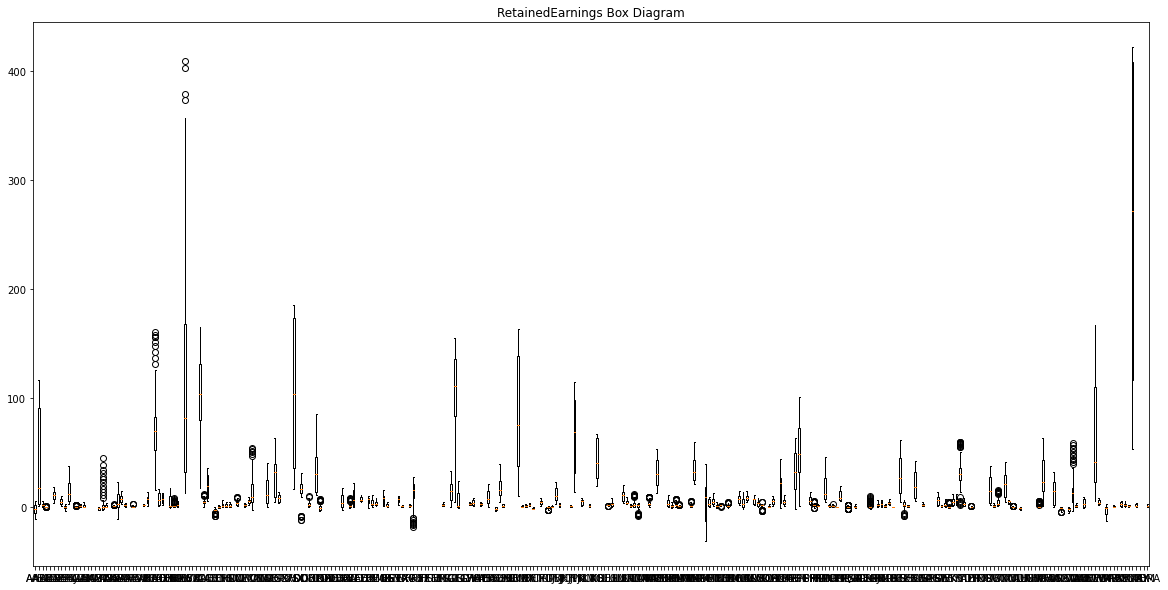

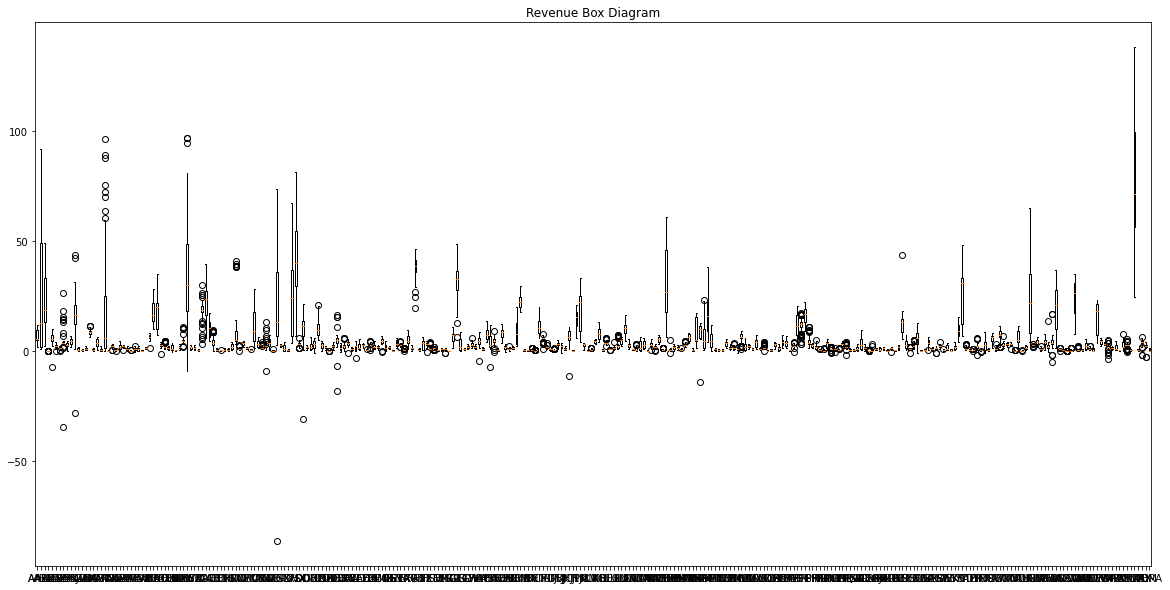

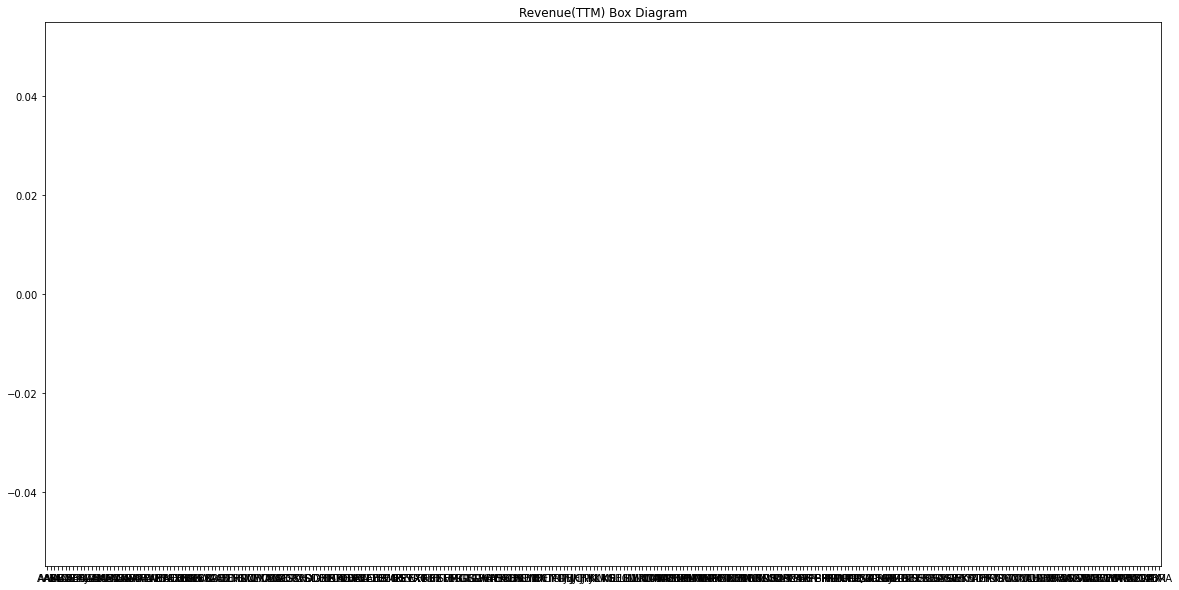

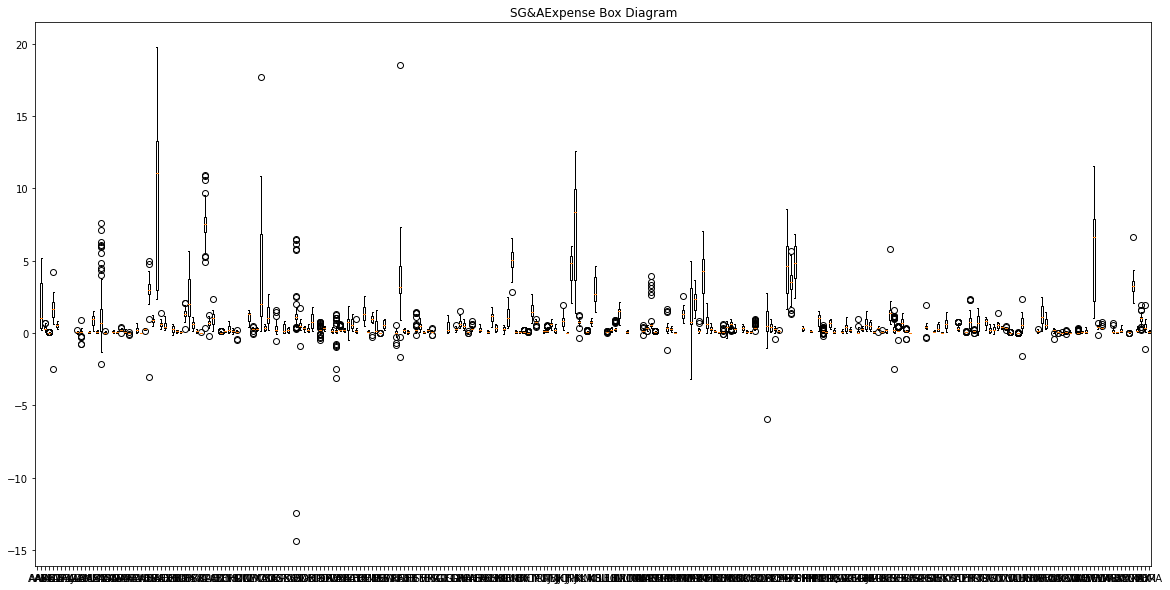

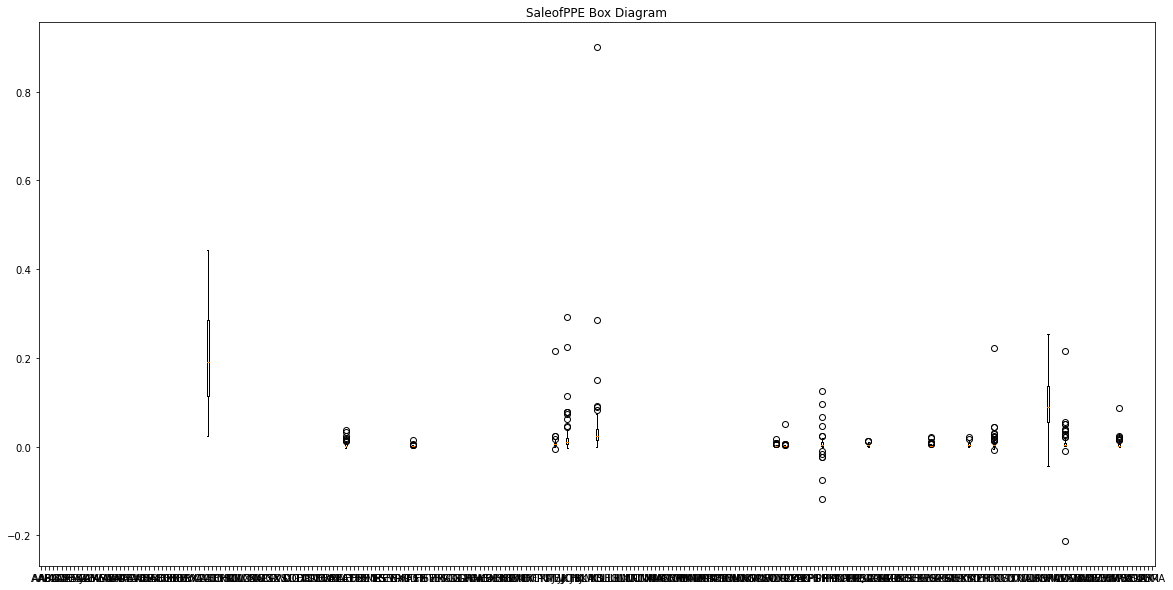

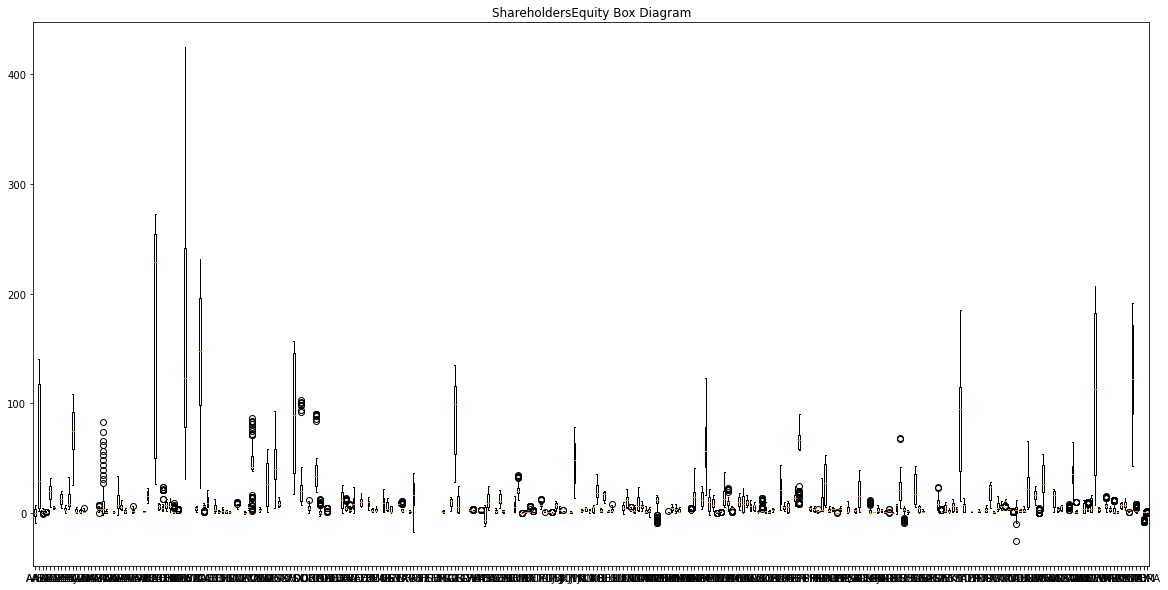

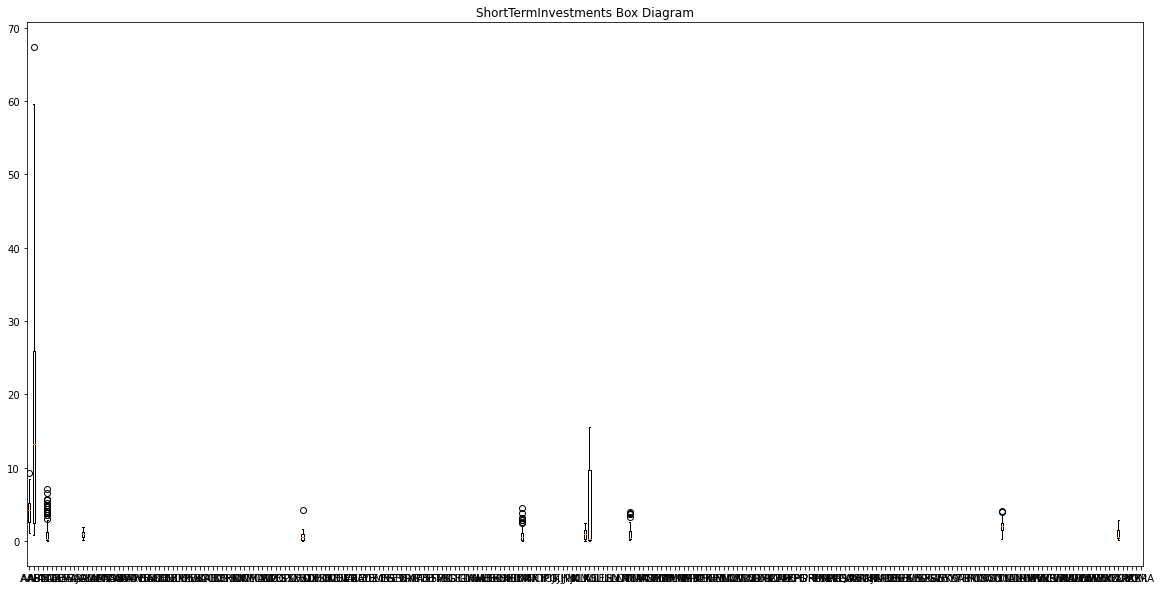

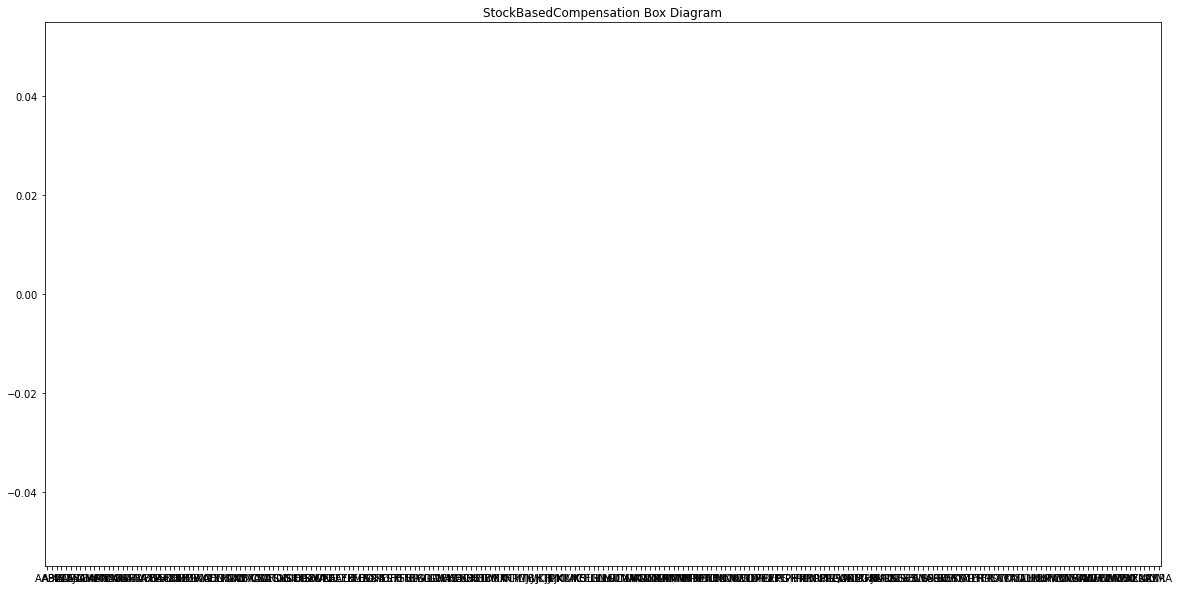

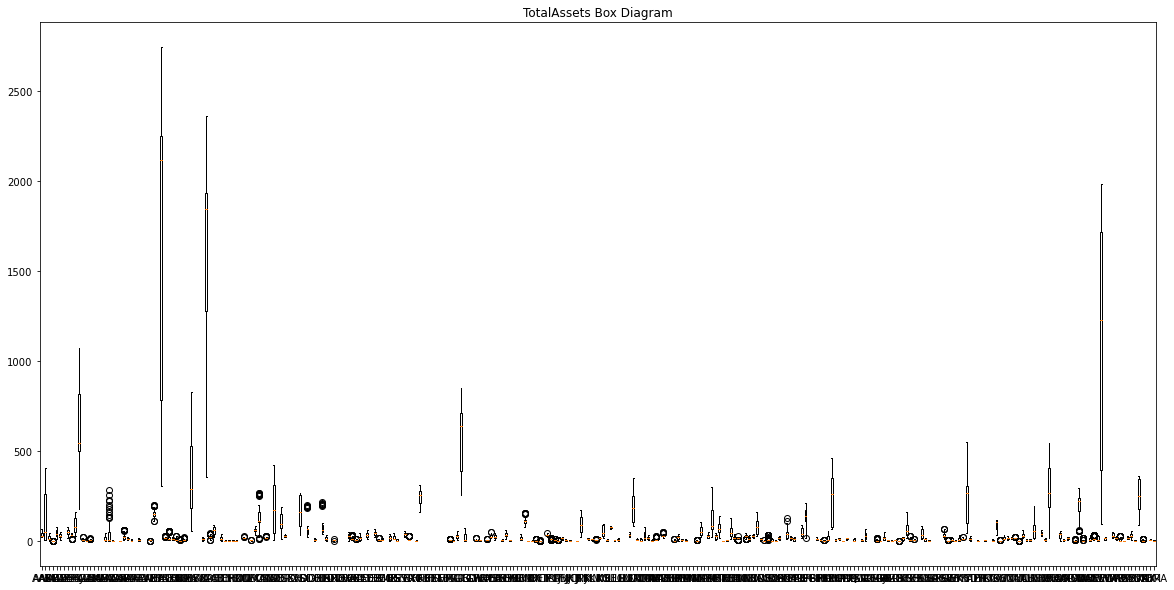

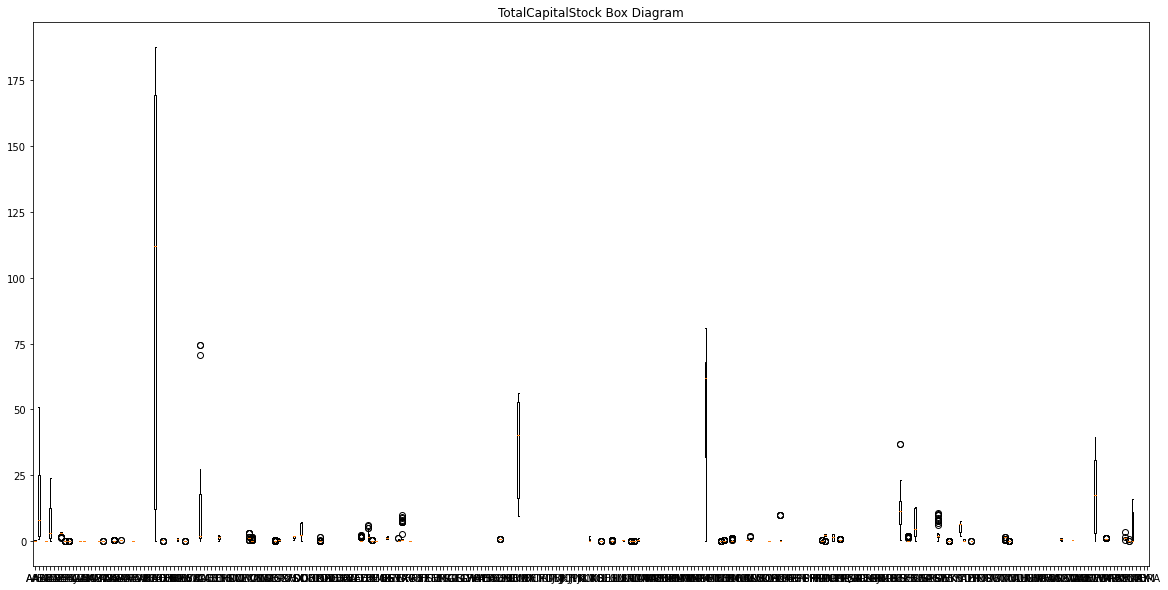

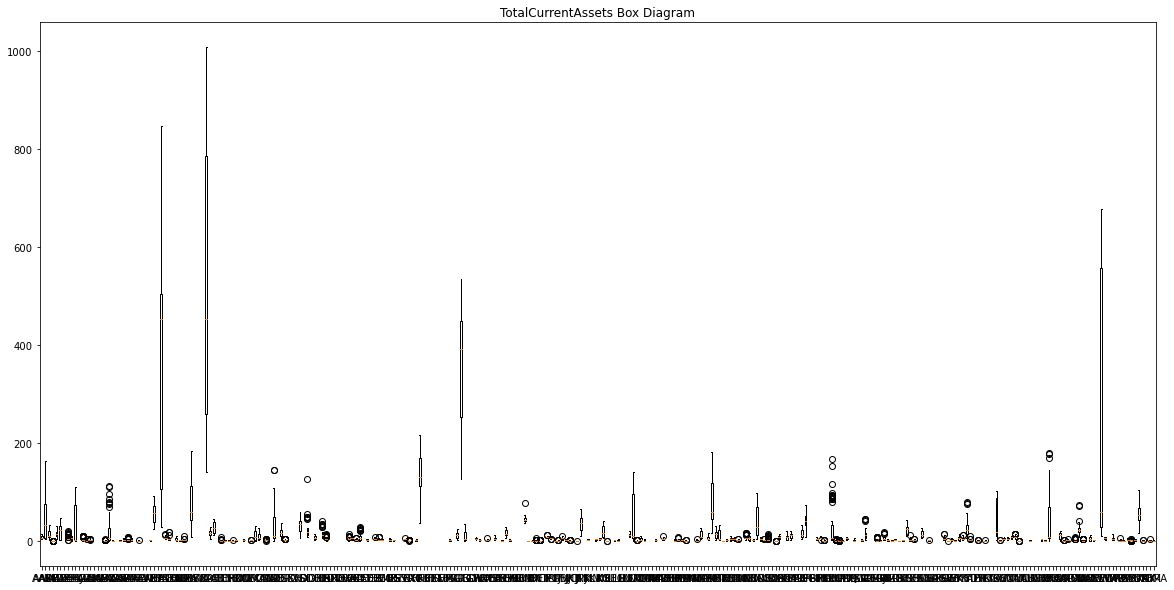

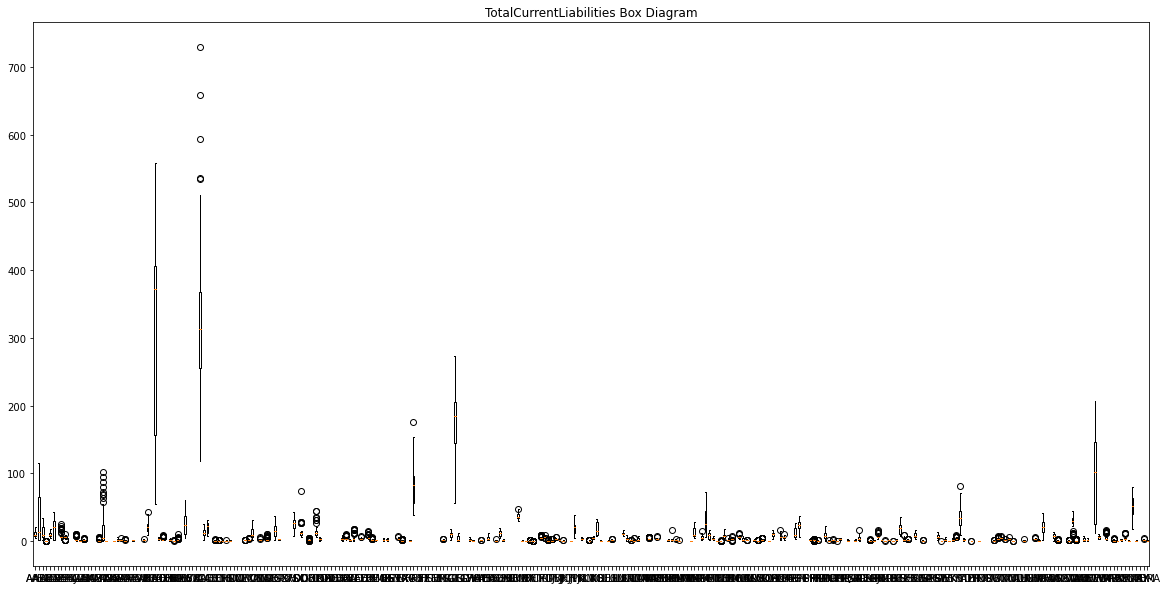

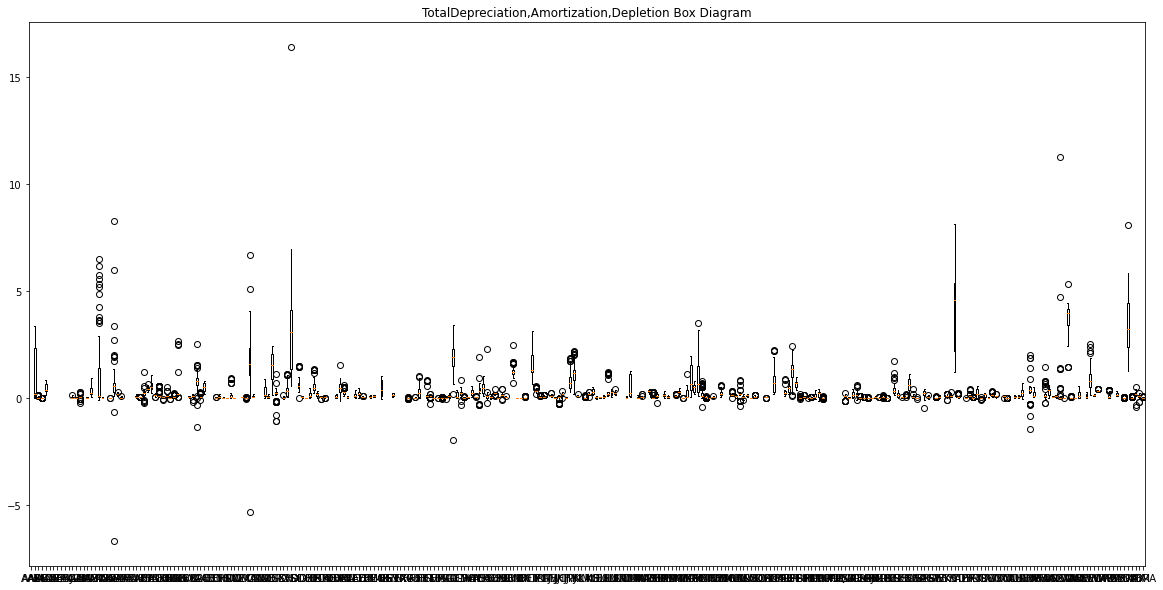

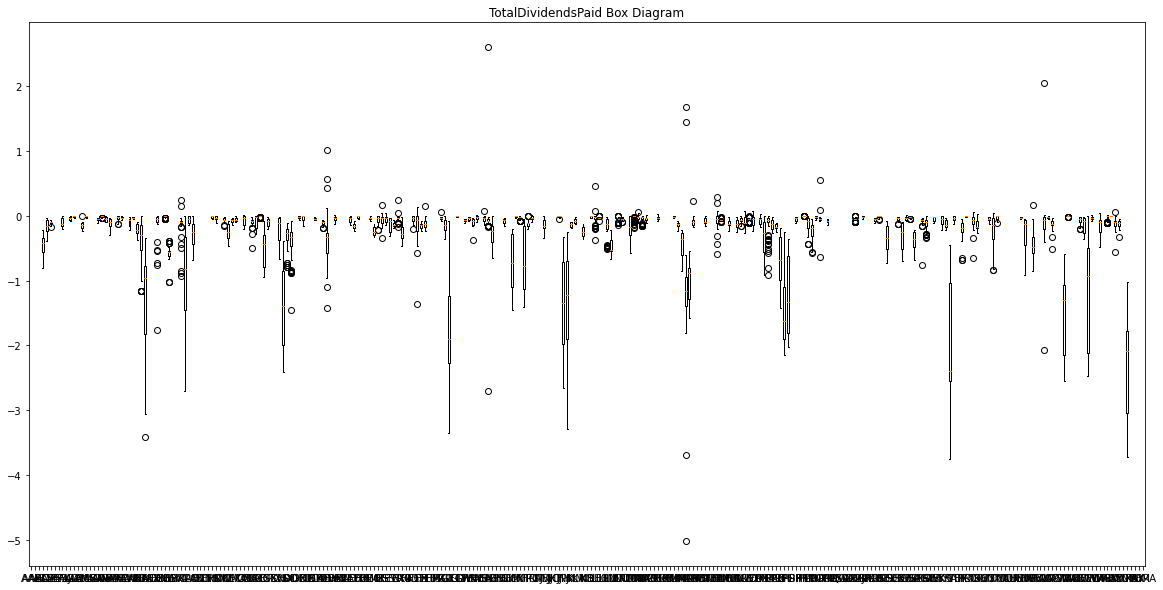

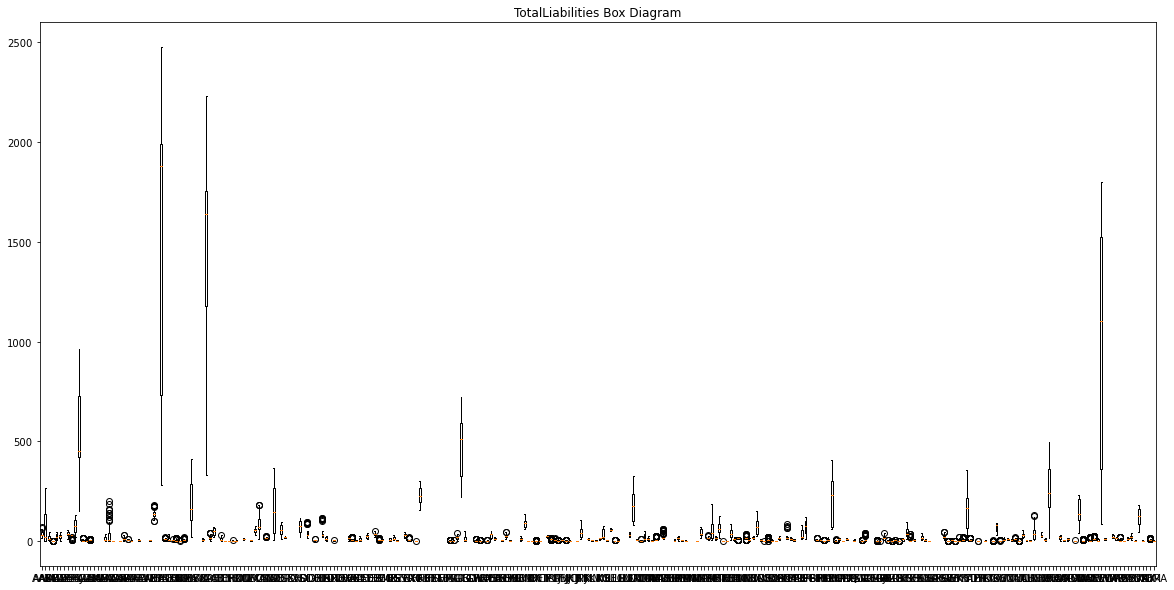

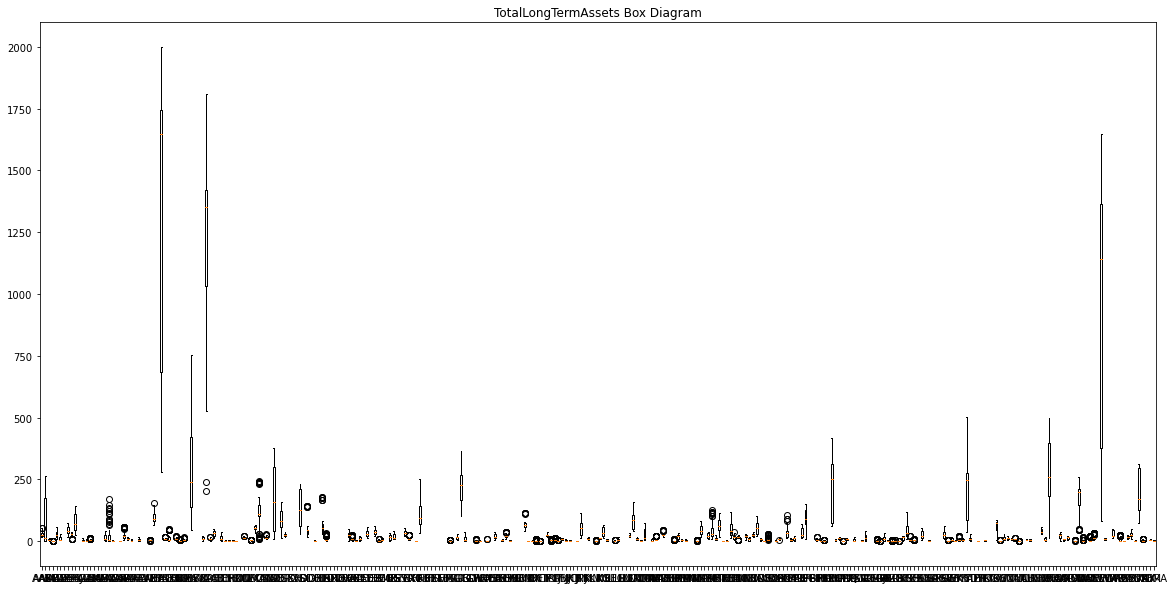

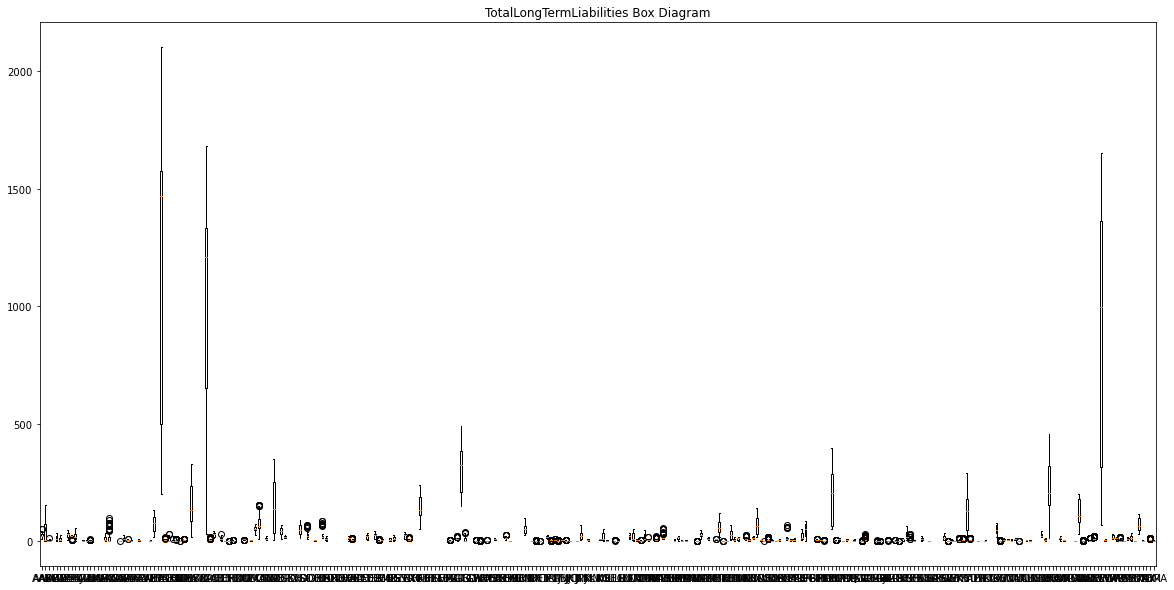

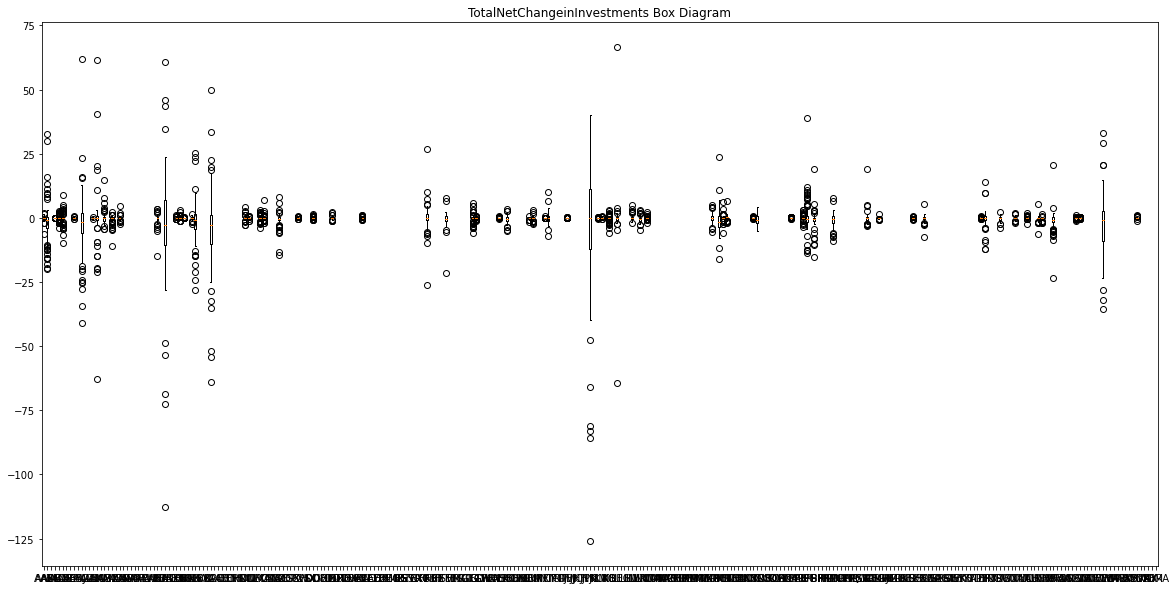

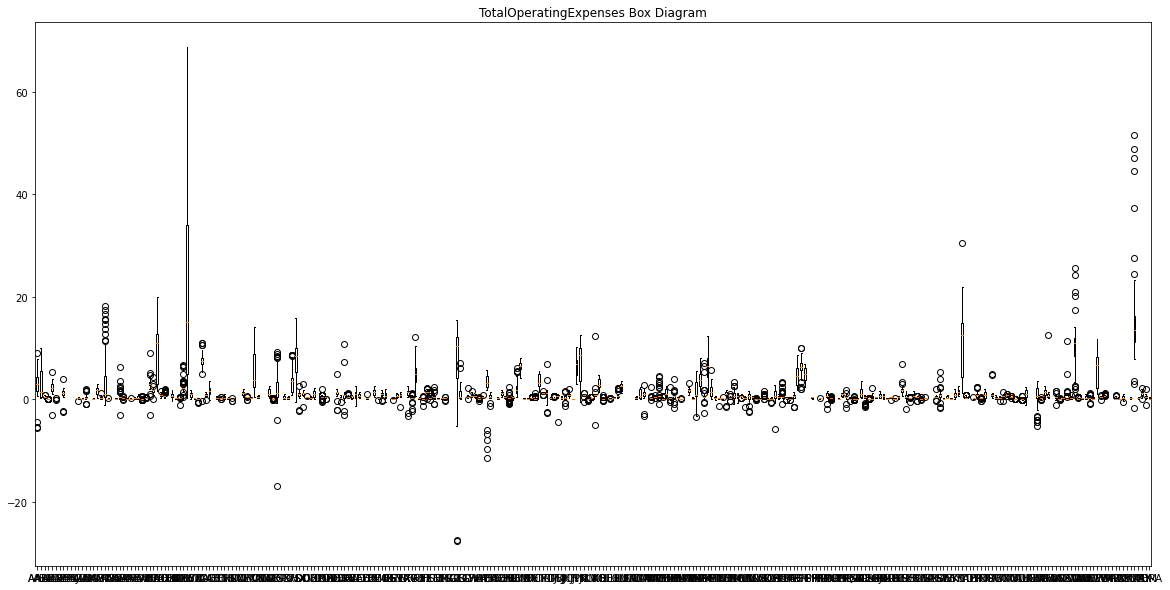

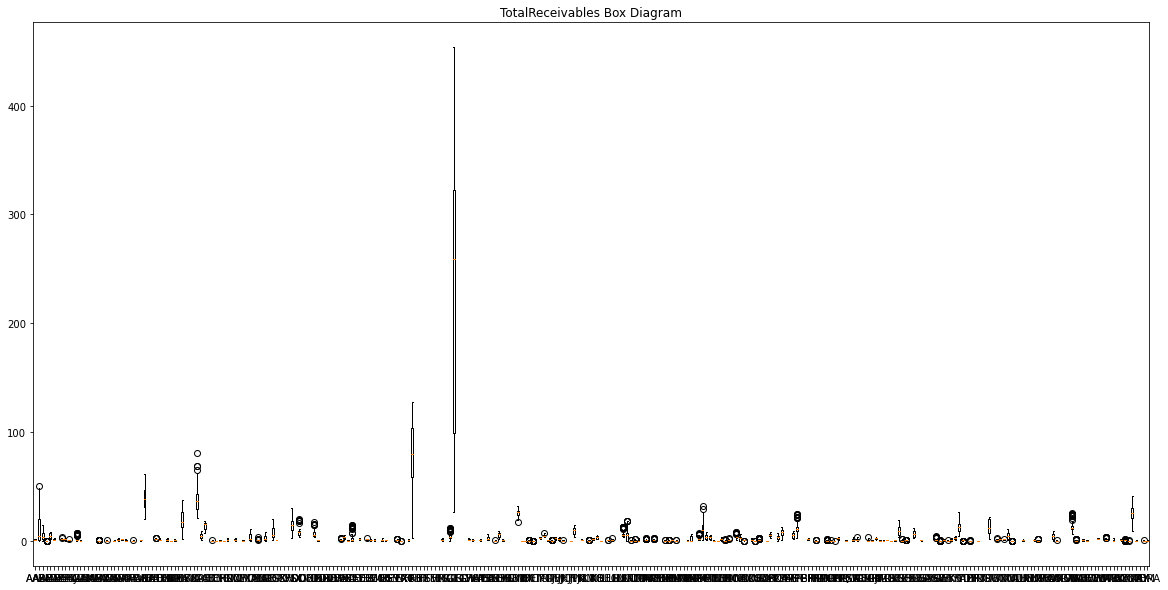

In [23]:
# Box Diagrams for numeric attributes
atts = list(data.xs('AAPL', level=1, axis=1).columns)
for att in atts:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(att+' Box Diagram')
    ax1.boxplot(data.xs(att, level=0, axis=1), labels=data.xs(att, level=0, axis=1).columns)
    plt.show()

In [6]:
# Co-relation between numeric attributes
corr = data.xs('AAPL', level=1, axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

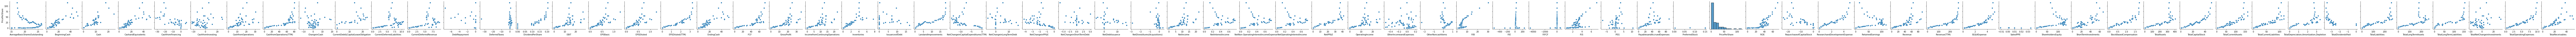

In [9]:
sbn.pairplot(data.xs('AAPL', level=1, axis=1), y_vars=['PricePerShare'], kind="scatter")
plt.show()

In [17]:
# Display visualization of correlations between features
rows= 2400
pd.set_option("display.max.rows", rows)
corr.unstack().sort_values(ascending=False).drop_duplicates()

Attributes                                Attributes                              
SaleofPPE                                 IssuanceofDebt                              1.000000
AverageBasicSharesOutstanding             AverageBasicSharesOutstanding               1.000000
SaleofPPE                                 PEG                                         1.000000
NetIncome                                 IncomefromContinuingOperations              1.000000
EPSDiluted                                EPSBasic                                    0.999993
EndingCash                                CashandEquivalents                          0.999526
OperatingIncome                           EBIT                                        0.999235
FCF                                       CashfromOperations(TTM)                     0.998748
Revenue                                   GrossProfit                                 0.998226
TotalCapitalStock                         TotalOperatingExpens

<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

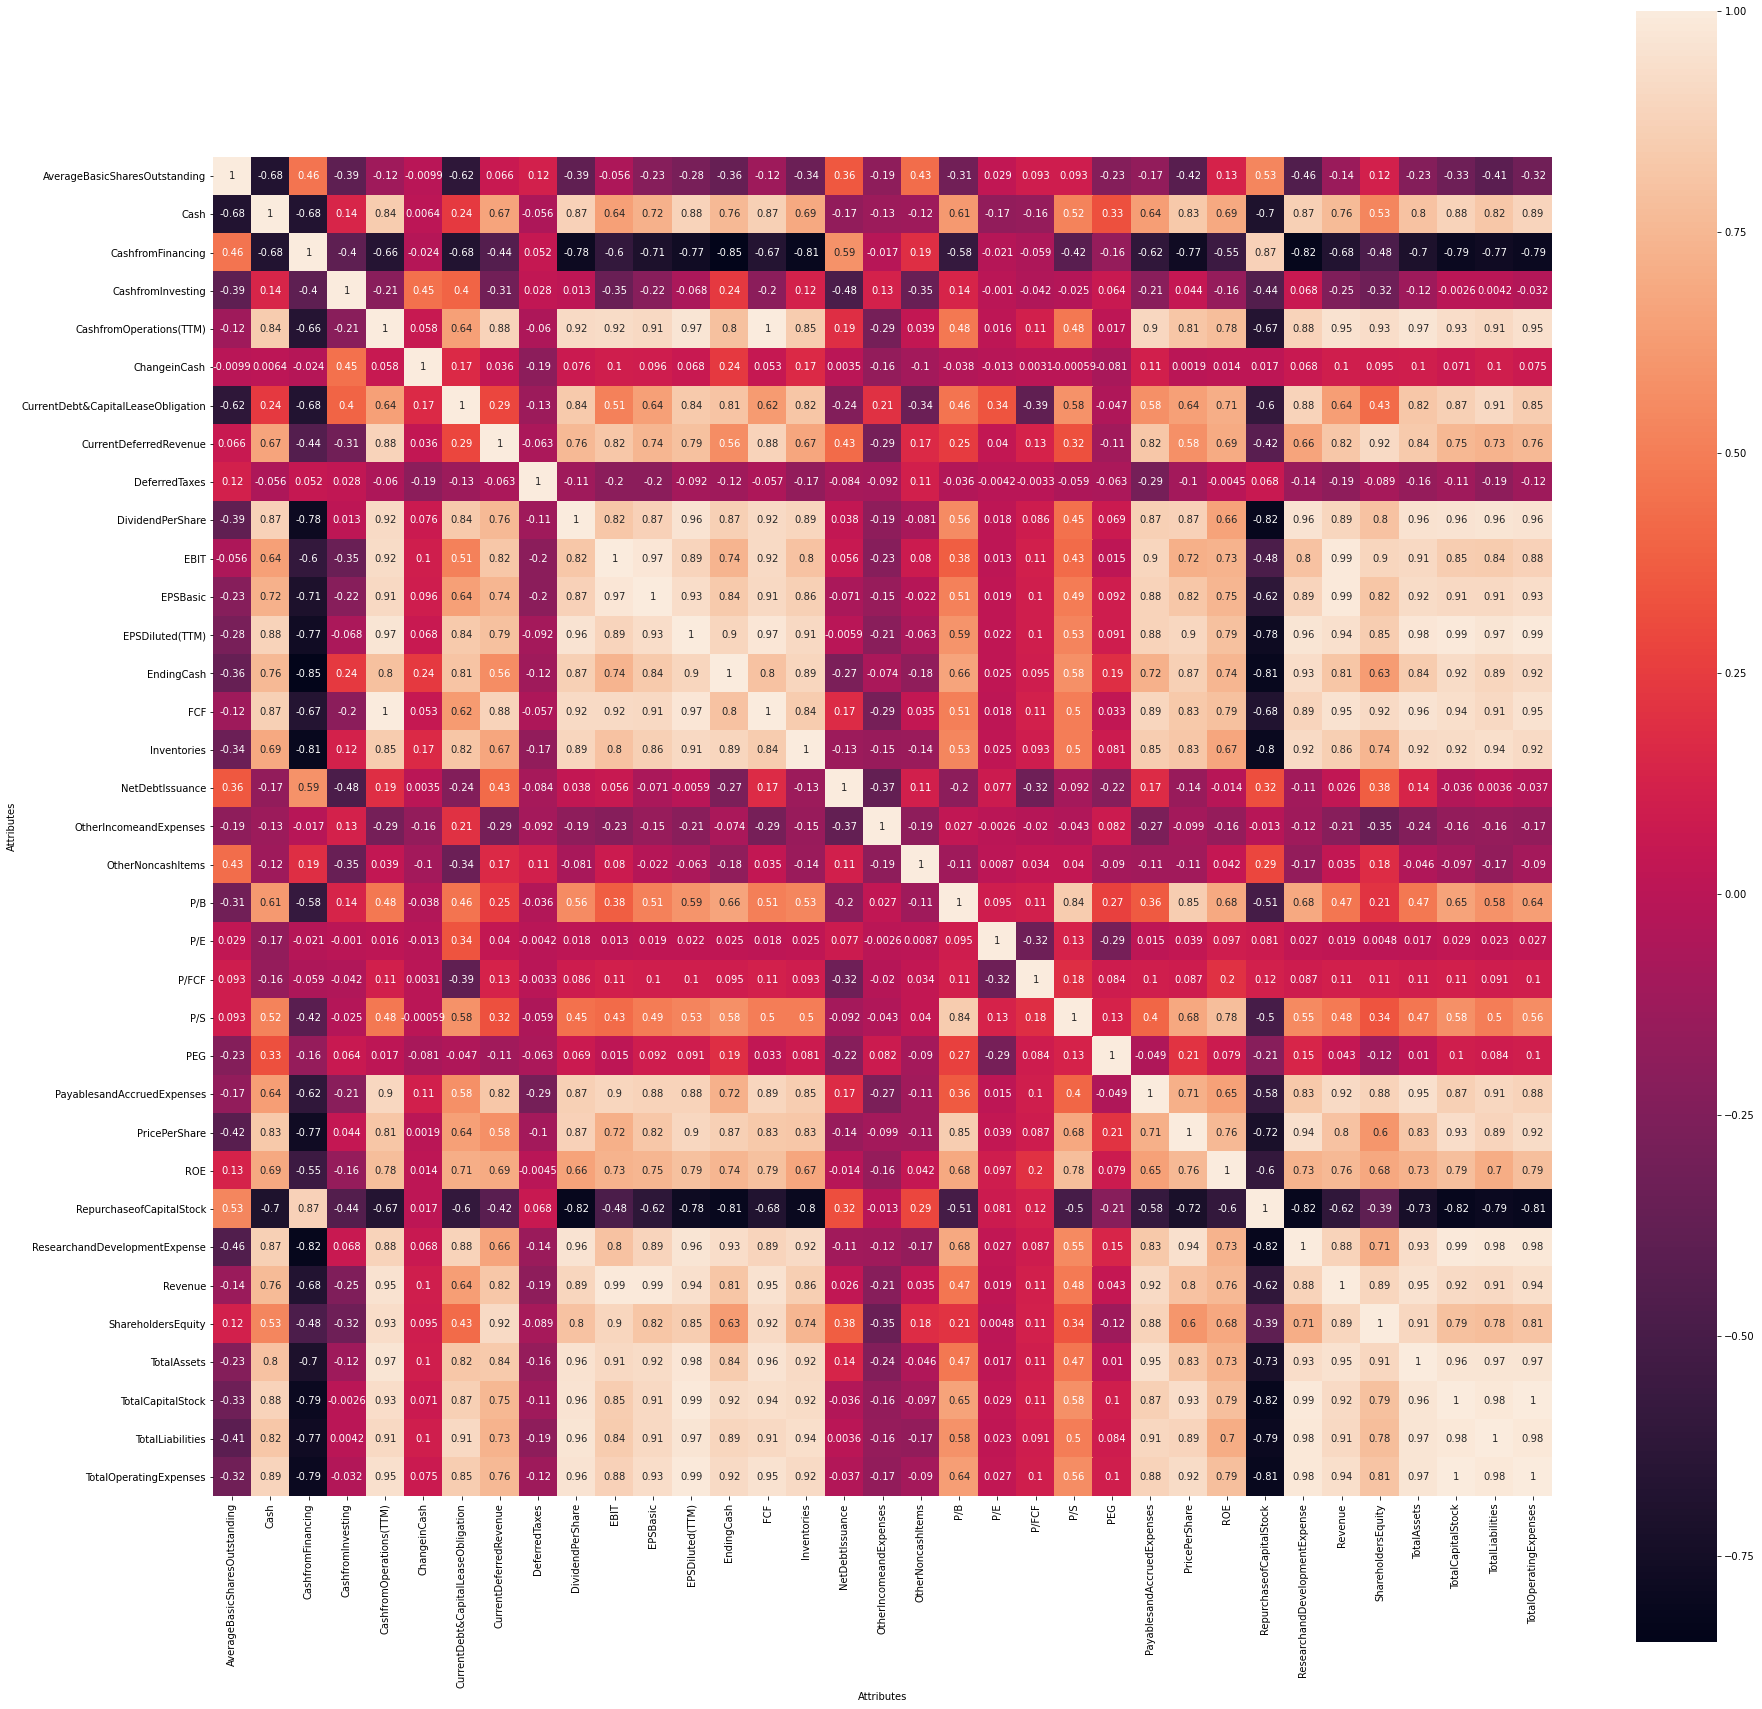

In [9]:
# Heat map of co-relation between numeric attributes
fig, ax = plt.subplots(figsize=(30,30))
sbn.heatmap(data.xs('AAPL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

In [18]:
# Max missing data on a single date
max(data.isnull().sum(axis=1))

7249

In [19]:
# Number of dates with 1 or more null data
sum(data.isnull().sum(axis=1) >= 1)

90

In [20]:
# Null values per Attribute in the whole dataset
atts = list(data.xs('AAPL', level=1, axis=1).columns)
att_miss = pd.Series(dtype='int64')
for att in atts:
    att_miss[att] = data.xs(att, level=0, axis=1).isnull().sum().sum()
att_miss.sort_values(ascending=False)

LandandImprovements                         13882
SaleofPPE                                   13564
NetChangeinShortTermDebt                    12868
ShortTermInvestments                        11984
IssuanceofDebt                              11737
CurrentDeferredLiabilities                  10806
DebtRepayment                               10466
NetOperatingInterestIncome                  10309
NetNon-OperatingInterestIncomeExpense       10309
NetInterestIncome                           10252
NetChangeinLongTermDebt                     10094
StockBasedCompensation                      10032
NetDivestitures(Acquisitions)                9314
PreferredStock                               9166
TotalNetChangeinInvestments                  8768
RepurchaseofCapitalStock                     8366
CurrentDeferredRevenue                       7328
DeferredTaxes                                5843
NetChangeinPP&E                              5562
CurrentDebt&CapitalLeaseObligation           4886


In [22]:
# Null values per Quarter in the whole dataset
quarters = list(data.index)
q_miss = pd.Series(dtype='int64')
for quarter in quarters:
    q_miss[quarter] = data.loc[quarter].isnull().sum().sum()
q_miss.sort_values(ascending=False)

1998-06    7249
1998-09    7189
1998-12    7006
1999-03    4910
1999-06    4712
1999-09    4374
1999-12    4266
2000-03    4234
2002-03    3919
2000-12    3910
2001-03    3880
2003-03    3865
2000-06    3828
2001-12    3817
2000-09    3805
2002-06    3798
2001-06    3787
2002-12    3781
2003-12    3779
2003-06    3768
2004-03    3757
2002-09    3745
2001-09    3743
2003-09    3721
2005-03    3699
2004-06    3622
2006-03    3582
2004-09    3558
2005-06    3469
2004-12    3467
2007-03    3432
2005-09    3417
2006-06    3370
2005-12    3337
2006-09    3328
2007-06    3215
2006-12    3209
2010-09    3135
2007-09    3111
2007-12    2915
2008-03    2315
2010-06    2056
2008-06    2033
2008-09    2026
2012-03    1911
2010-03    1898
2013-03    1869
2009-03    1856
2011-03    1842
2014-03    1832
2015-03    1827
2017-03    1818
2016-03    1813
2018-03    1789
2012-06    1760
2017-06    1752
2013-06    1736
2016-06    1714
2019-03    1712
2009-06    1711
2020-03    1709
2008-12    1707
2011-06 

## 1.2 Data Cleansing and Transformations

In [28]:
# Save dataset on csv format
data.to_csv('../resources/fundamental_data/complete_dataset.csv')

In [23]:
# Dropping features and dates not included by own judgement
# Own judgement means dropping some columns or rows because their high number of null values, correlations and estimated importance to the prediction
date_drops = ['1998-06','1998-09','1998-12','1999-03','1999-06','1999-09','1999-12']
incl_att = ["RepurchaseofCapitalStock","CurrentDeferredRevenue","DeferredTaxes","CurrentDebt&CapitalLeaseObligation","OtherNoncashItems","TotalDividendsPai","Cash","OtherIncomeandExpenses","PEG","P/FCF","FCF","ROE","Inventories","NetDebtIssuance","DividendPerShare","ResearchandDevelopmentExpense","TotalCapitalStock","PayablesandAccruedExpenses","P/E","EPSDiluted(TTM)","CashfromOperations(TTM)","P/S","TotalOperatingExpenses","P/B","ShareholdersEquity","TotalLiabilities","TotalAssets","ChangeinCash","EndingCash","EBIT","CashfromInvesting","CashfromFinancing","AverageBasicSharesOutstanding","EPSBasic","Revenue","PricePerShare","IncomeFromContinuingOperations"]
atts = set(att_miss.index) - set(incl_att)
data.drop(atts, axis=1, level='Attributes', inplace=True)
data.drop(date_drops, axis=0, errors='ignore', inplace=True)

In [24]:
# Shape of one stock after the drops
data.xs('AAPL', level='Symbol', axis=1).shape

(83, 35)

In [25]:
# Null values per Attribute in the whole dataset after the drops
atts = list(data.xs('AAPL', level=1, axis=1).columns)
att_miss = pd.Series(dtype='int64')
for att in atts:
    att_miss[att] = data.xs(att, level=0, axis=1).isnull().sum().sum()
att_miss.sort_values(ascending=False)

RepurchaseofCapitalStock              7408
CurrentDeferredRevenue                6330
DeferredTaxes                         5154
CurrentDebt&CapitalLeaseObligation    4532
OtherNoncashItems                     3860
Cash                                  3227
OtherIncomeandExpenses                2910
Inventories                           1502
P/FCF                                 1389
FCF                                   1389
NetDebtIssuance                       1371
DividendPerShare                      1207
ResearchandDevelopmentExpense         1156
PayablesandAccruedExpenses             795
ROE                                    654
TotalCapitalStock                      488
PEG                                    381
TotalOperatingExpenses                 201
ShareholdersEquity                      92
TotalLiabilities                        91
TotalAssets                             91
P/B                                     91
CashfromOperations(TTM)                 56
P/E        

In [26]:
# Fill None values with the previous valid value
# We could try interpolate function of the DataFrame as experimentation
data.fillna(method='ffill', axis=1, inplace=True)
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                              AAPL      ABC     ABMD    ABT      ADP   
2020-09                            17.06  0.20408  0.04510  1.774  0.42860   
2020-06                            17.25  0.20365  0.04501  1.773  0.42900   
2020-03                            17.44  0.20537  0.04504  1.769  0.43000   
2019-12                            17.66  0.20601  0.04514  1.768  0.43150   
2019-09                            17.96  0.21221  0.04532  1.772  0.43270   
2019-06                            18.28  0.20970  0.04522  1.769  0.43350   
2019-03                            18.70  0.21093  0.04509  1.763  0.43410   
2018-12                            18.94  0.21205  0.04505  1.761  0.43570   
2018-09                            19.21  0.21539  0.04496  1.760  0.43680   
2018-06                            19.53  0.21857  0.04455  1.758  0.43790   
2018-03                            20.10  0.21920  0.04433  1.753  0.44100   
2017-12                            20.45  0.21832  0.04425  1.748  0.44130   
2017-09                            20.60  0.21849  0.04414  1.744  0.44220   
2017-06                            20.78  0.21868  0.04390  1.741  0.44450   
2017-03                            20.90  0.21765  0.04358  1.727  0.44650   
2016-12                            21.19  0.21866  0.04343  1.479  0.44790   
2016-09                            21.47  0.21913  0.04313  1.476  0.45230   
2016-06                            21.77  0.21569  0.04281  1.475  0.45340   
2016-03                            22.06  0.20786  0.04246  1.477  0.45440   
2015-12                            22.24  0.20618  0.04243  1.487  0.45760   
2015-09                            22.59  0.21208  0.04223  1.495  0.46240   
2015-06                            22.92  0.21936  0.04170  1.494  0.46510   
2015-03                            23.18  0.22024  0.04116  1.505  0.47030   
2014-12                            23.37  0.21946  0.04086  1.510  0.47660   
2014-09                            23.74  0.22404  0.04045  1.509  0.47840   
2014-06                            24.05  0.22573  0.04006  1.507  0.47830   
2014-03                            24.49  0.22941  0.03980  1.533  0.47890   
2013-12                            25.09  0.23028  0.03959  1.551  0.47840   
2013-09                            25.32  0.23045  0.03926  1.552  0.48010   
2013-06                            25.72  0.23100  0.03868  1.561  0.48240   
2013-03                            26.31  0.23042  0.03846  1.569  0.48270   
2012-12                            26.29  0.23236  0.03942  1.577  0.48210   
2012-09                            26.27  0.24284  0.03943  1.577  0.48350   
2012-06                            26.22  0.25212  0.03914  1.572  0.48610   
2012-03                            26.14  0.25816  0.03883  1.574  0.48850   
2011-12                            26.07  0.25846  0.03850  1.562  0.48670   
2011-09                            25.99  0.26643  0.03826  1.559  0.48790   
2011-06                            25.93  0.27349  0.03827  1.557  0.49440   
2011-03                            25.85  0.27432  0.03723  1.552  0.49620   
2010-12                            25.74  0.27560  0.03720  1.547  0.49200   
2010-09                            25.61  0.27886  0.03716  1.545  0.49140   
2010-06                            25.54  0.28120  0.03709  1.544  0.49630   
2010-03                            25.41  0.28193  0.03701  1.548  0.50240   
2009-12                            25.30  0.28696  0.03701  1.548  0.50200   
2009-09                            25.14  0.29262  0.03692  1.546  0.50140   
2009-06                            25.02  0.29848  0.03655  1.546  0.50080   
2009-03                            24.95  0.30245  0.03612  1.546  0.50120   
2008-12                            24.90  0.30859  0.03605  1.551  0.50340   
2008-09                            24.84  0.31285  0.03448  1.546  0.50750   
2008-06               

In [27]:
# Null values per Quarter in the whole dataset
quarters = list(data.index)
q_miss = pd.Series(dtype='int64')
for quarter in quarters:
    q_miss[quarter] = data.loc[quarter].isnull().sum().sum()
q_miss.sort_values(ascending=False)

2020-09    0
2005-03    0
2005-09    0
2005-12    0
2006-03    0
2006-06    0
2006-09    0
2006-12    0
2007-03    0
2007-06    0
2007-09    0
2007-12    0
2008-03    0
2008-06    0
2008-09    0
2008-12    0
2009-03    0
2009-06    0
2009-09    0
2005-06    0
2004-12    0
2010-03    0
2004-09    0
2000-06    0
2000-09    0
2000-12    0
2001-03    0
2001-06    0
2001-09    0
2001-12    0
2002-03    0
2002-06    0
2002-09    0
2002-12    0
2003-03    0
2003-06    0
2003-09    0
2003-12    0
2004-03    0
2004-06    0
2009-12    0
2010-06    0
2020-06    0
2015-09    0
2016-03    0
2016-06    0
2016-09    0
2016-12    0
2017-03    0
2017-06    0
2017-09    0
2017-12    0
2018-03    0
2018-06    0
2018-09    0
2018-12    0
2019-03    0
2019-06    0
2019-09    0
2019-12    0
2020-03    0
2015-12    0
2015-06    0
2010-09    0
2015-03    0
2010-12    0
2011-03    0
2011-06    0
2011-09    0
2011-12    0
2012-03    0
2012-06    0
2012-09    0
2012-12    0
2013-03    0
2013-06    0
2013-09    0